# Predict RH from berry fungal communities

> using `ritme` (https://github.com/adamovanja/ritme)

note. use the **ritme_model** environment! 


In [1]:
from ritme.find_best_model_config import (
    _load_experiment_config,
    _load_phylogeny,
    _load_taxonomy,
    find_best_model_config,
    save_best_models,
)
from ritme.split_train_test import _load_data, split_train_test
from ritme.evaluate_tuned_models import evaluate_tuned_models

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import mlflow
import numpy as np
import os
import pickle

from sklearn.metrics import r2_score

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
workdir = '/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/climate-berries'
%cd $workdir

/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/climate-berries


In [3]:
# set experiment configuration path 
model_config_path = "/home/lfloerl/microterroir/Microbiome/Other_scripts/config/RITMEconfig_RH_WithParams.json"

# define path to feature table, metadata, and taxonomy (no phylogeny)
path_to_ft = "climate_filtered_table.qza"
path_to_md = "/home/lfloerl/microterroir/Microbiome/Metadata/ITS_Lavaux_Climate.tsv"
path_to_tax = "/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/taxonomy.qza"

# define train size
train_size = 0.8

# if you want to store the best models, define path where you want to store
path_to_store_best_models = "RH_best_models"

In [9]:
config = _load_experiment_config(model_config_path)

## Read & split data


In [10]:
md, ft = _load_data(path_to_md, path_to_ft)
print(md.shape, ft.shape)

(595, 36) (337, 6214)


In [11]:
train_val, test = split_train_test(
    md,
    ft,
    group_by_column=config["group_by_column"],
    train_size=train_size,
    seed=config["seed_data"],
)

Train: (269, 6250), Test: (68, 6250)


/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/split_train_test.py:139: UserWarning: Provided feature table contains absolute instead of relative abundances. Hence, converting it to relative abundances...
  warnings.warn(


## Find best model config

View the results with navigating to the folder in the terminal (e.g. `cd /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/climate-berries/ritme_all_models`) and launching  mlflow (`mlflow ui --port 8080`) and opening _http://localhost:8080_ 


**Try different configs** (`experiment_tag`)

* `all_models_noGroup` --> Train: (260, 6127), Test: (66, 6127)
    * "linreg", "xgb", "rf" 
    * no grouping, seed 14 (larger test set)
    * test_mode = true (use entire search space)
    * 500 trials

* `ritme_RH_NoGroup_restrictedSpace`
    * 900 trials 
    * restricted search space
    * "linreg", "xgb", "rf", "nn_reg" 
    * no grouping, seed 14 (larger test set)

In [13]:
tax = _load_taxonomy(path_to_tax)

best_model_dict, path_to_exp = find_best_model_config(
    config, train_val, tax, path_store_model_logs="ritme_RH_NoGroup_restrictedSpace")

(train_rf pid=2557262) Train: (208, 36), Test: (52, 36)


(train_rf pid=2557262) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2557262)   warnings.warn(
2025-03-10 06:02:21,562	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.545 s, which may be a performance bottleneck.
2025-03-10 06:02:21,563	WARNING util.py:201 -- The `process_trial_result` operation took 0.547 s, which may be a performance bottleneck.
2025-03-10 06:02:21,564	WARNING util.py:201 -- Processing trial results took 0.548 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:02:21,564	WARNING util.py:201 -- The `process_trial_result` operation took 0.548 s, which may be a performance bottleneck.
(train_rf pid=2557377) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2557377) Train: (208, 159), Test: (52, 159) [repeated 2x across cluster]
(train_rf pid=2557495) Train: (208, 48), Test: (52, 48) [repeated 2x across cluster]


(train_rf pid=2557495) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint']. [repeated 2x across cluster]
(train_rf pid=2557495)   warnings.warn( [repeated 2x across cluster]


(train_rf pid=2557554) Train: (208, 47), Test: (52, 47)


(train_rf pid=2557554) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2557554)   warnings.warn(


(train_rf pid=2557612) Train: (208, 53), Test: (52, 53)


2025-03-10 06:02:51,237	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.624 s, which may be a performance bottleneck.
2025-03-10 06:02:51,238	WARNING util.py:201 -- The `process_trial_result` operation took 0.626 s, which may be a performance bottleneck.
2025-03-10 06:02:51,240	WARNING util.py:201 -- Processing trial results took 0.627 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:02:51,240	WARNING util.py:201 -- The `process_trial_result` operation took 0.628 s, which may be a performance bottleneck.
(train_rf pid=2557671) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2557671)   warnings.warn(


(train_rf pid=2557671) Train: (208, 92), Test: (52, 92)
(train_rf pid=2557729) Train: (208, 37), Test: (52, 37)


(train_rf pid=2557729) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2557729)   warnings.warn(
2025-03-10 06:03:01,417	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.515 s, which may be a performance bottleneck.
2025-03-10 06:03:01,419	WARNING util.py:201 -- The `process_trial_result` operation took 0.517 s, which may be a performance bottleneck.
2025-03-10 06:03:01,419	WARNING util.py:201 -- Processing trial results took 0.517 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:03:01,420	WARNING util.py:201 -- The `process_trial_result` operation took 0.518 s, which may be a performance bottleneck.


(train_rf pid=2557790) Train: (208, 43), Test: (52, 43)


(train_rf pid=2557790) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2557790)   warnings.warn(


(train_rf pid=2557878) Train: (208, 48), Test: (52, 48)


(train_rf pid=2557878) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2557878)   warnings.warn(
(train_rf pid=2557938) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2557938)   warnings.warn(


(train_rf pid=2557938) Train: (208, 91), Test: (52, 91)
(train_rf pid=2558002) Train: (208, 91), Test: (52, 91)


(train_rf pid=2558002) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2558002)   warnings.warn(
(train_rf pid=2558061) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2558061)   warnings.warn(


(train_rf pid=2558061) Train: (208, 92), Test: (52, 92)
(train_rf pid=2558119) Train: (208, 620), Test: (52, 620)


(train_rf pid=2558119) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2558119)   warnings.warn(
(train_rf pid=2558237) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2558237)   warnings.warn(


(train_rf pid=2558237) Train: (208, 620), Test: (52, 620) [repeated 2x across cluster]


(train_rf pid=2558334) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2558334)   warnings.warn(


(train_rf pid=2558392) Train: (208, 620), Test: (52, 620) [repeated 2x across cluster]


(train_rf pid=2558392) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2558392)   warnings.warn(


(train_rf pid=2558451) Train: (208, 620), Test: (52, 620)


(train_rf pid=2558509) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint']. [repeated 2x across cluster]
(train_rf pid=2558509)   warnings.warn( [repeated 2x across cluster]


(train_rf pid=2558509) Train: (208, 620), Test: (52, 620)


(train_rf pid=2558658) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint']. [repeated 2x across cluster]
(train_rf pid=2558658)   warnings.warn( [repeated 2x across cluster]


(train_rf pid=2558658) Train: (208, 73), Test: (52, 73) [repeated 2x across cluster]


(train_rf pid=2558717) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2558717)   warnings.warn(


(train_rf pid=2558717) Train: (208, 620), Test: (52, 620)


2025-03-10 06:04:17,609	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.559 s, which may be a performance bottleneck.
2025-03-10 06:04:17,611	WARNING util.py:201 -- The `process_trial_result` operation took 0.561 s, which may be a performance bottleneck.
2025-03-10 06:04:17,612	WARNING util.py:201 -- Processing trial results took 0.562 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:04:17,612	WARNING util.py:201 -- The `process_trial_result` operation took 0.562 s, which may be a performance bottleneck.


(train_rf pid=2558782) Train: (208, 620), Test: (52, 620)


(train_rf pid=2558782) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2558782)   warnings.warn(
2025-03-10 06:04:27,678	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.770 s, which may be a performance bottleneck.
2025-03-10 06:04:27,679	WARNING util.py:201 -- The `process_trial_result` operation took 0.772 s, which may be a performance bottleneck.
2025-03-10 06:04:27,680	WARNING util.py:201 -- Processing trial results took 0.773 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:04:27,680	WARNING util.py:201 -- The `process_trial_result` operation took 0.773 s, which may be a performance bottleneck.
(train_rf pid=2558899) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2558899) Train: (208, 620), Test: (52, 620) [repeated 2x across cluster]
(train_rf pid=2558959) Train: (208, 620), Test: (52, 620)


(train_rf pid=2558959) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2558959)   warnings.warn(
2025-03-10 06:04:38,064	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.956 s, which may be a performance bottleneck.
2025-03-10 06:04:38,066	WARNING util.py:201 -- The `process_trial_result` operation took 0.958 s, which may be a performance bottleneck.
2025-03-10 06:04:38,066	WARNING util.py:201 -- Processing trial results took 0.958 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:04:38,066	WARNING util.py:201 -- The `process_trial_result` operation took 0.959 s, which may be a performance bottleneck.
(train_rf pid=2559018) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2559018) Train: (208, 44), Test: (52, 44)


2025-03-10 06:04:48,318	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.458 s, which may be a performance bottleneck.
2025-03-10 06:04:48,320	WARNING util.py:201 -- The `process_trial_result` operation took 1.460 s, which may be a performance bottleneck.
2025-03-10 06:04:48,320	WARNING util.py:201 -- Processing trial results took 1.461 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:04:48,321	WARNING util.py:201 -- The `process_trial_result` operation took 1.461 s, which may be a performance bottleneck.


(train_rf pid=2559135) Train: (208, 645), Test: (52, 645) [repeated 2x across cluster]


2025-03-10 06:04:54,983	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.530 s, which may be a performance bottleneck.
2025-03-10 06:04:54,985	WARNING util.py:201 -- The `process_trial_result` operation took 0.531 s, which may be a performance bottleneck.
2025-03-10 06:04:54,985	WARNING util.py:201 -- Processing trial results took 0.532 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:04:54,985	WARNING util.py:201 -- The `process_trial_result` operation took 0.532 s, which may be a performance bottleneck.
(train_rf pid=2559193) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2559193)   warnings.warn(


(train_rf pid=2559193) Train: (208, 39), Test: (52, 39)


2025-03-10 06:04:58,491	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.123 s, which may be a performance bottleneck.
2025-03-10 06:04:58,492	WARNING util.py:201 -- The `process_trial_result` operation took 1.124 s, which may be a performance bottleneck.
2025-03-10 06:04:58,493	WARNING util.py:201 -- Processing trial results took 1.125 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:04:58,494	WARNING util.py:201 -- The `process_trial_result` operation took 1.126 s, which may be a performance bottleneck.


(train_rf pid=2559253) Train: (208, 620), Test: (52, 620)


(train_rf pid=2559253) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2559253)   warnings.warn(
2025-03-10 06:05:03,299	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.568 s, which may be a performance bottleneck.
2025-03-10 06:05:03,301	WARNING util.py:201 -- The `process_trial_result` operation took 0.570 s, which may be a performance bottleneck.
2025-03-10 06:05:03,302	WARNING util.py:201 -- Processing trial results took 0.571 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:05:03,302	WARNING util.py:201 -- The `process_trial_result` operation took 0.572 s, which may be a performance bottleneck.


(train_rf pid=2559341) Train: (208, 620), Test: (52, 620)


(train_rf pid=2559341) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2559341)   warnings.warn(
2025-03-10 06:05:08,939	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.102 s, which may be a performance bottleneck.
2025-03-10 06:05:08,941	WARNING util.py:201 -- The `process_trial_result` operation took 1.105 s, which may be a performance bottleneck.
2025-03-10 06:05:08,942	WARNING util.py:201 -- Processing trial results took 1.105 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:05:08,942	WARNING util.py:201 -- The `process_trial_result` operation took 1.106 s, which may be a performance bottleneck.
(train_rf pid=2559401) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2559401) Train: (208, 620), Test: (52, 620)


(train_rf pid=2559466) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2559466)   warnings.warn(
2025-03-10 06:05:19,008	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.056 s, which may be a performance bottleneck.
2025-03-10 06:05:19,010	WARNING util.py:201 -- The `process_trial_result` operation took 1.058 s, which may be a performance bottleneck.
2025-03-10 06:05:19,010	WARNING util.py:201 -- Processing trial results took 1.058 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:05:19,011	WARNING util.py:201 -- The `process_trial_result` operation took 1.059 s, which may be a performance bottleneck.
(train_rf pid=2559525) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2559525) Train: (208, 582), Test: (52, 582) [repeated 2x across cluster]


2025-03-10 06:05:29,186	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.273 s, which may be a performance bottleneck.
2025-03-10 06:05:29,187	WARNING util.py:201 -- The `process_trial_result` operation took 1.275 s, which may be a performance bottleneck.
2025-03-10 06:05:29,188	WARNING util.py:201 -- Processing trial results took 1.275 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:05:29,189	WARNING util.py:201 -- The `process_trial_result` operation took 1.276 s, which may be a performance bottleneck.
(train_rf pid=2559642) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint']. [repeated 2x across cluster]
(train_rf pid=2559642)   warnings.warn( [repeated 2x across cluster]


(train_rf pid=2559642) Train: (208, 71), Test: (52, 71) [repeated 2x across cluster]


(train_rf pid=2559701) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2559701)   warnings.warn(
2025-03-10 06:05:39,425	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.283 s, which may be a performance bottleneck.
2025-03-10 06:05:39,427	WARNING util.py:201 -- The `process_trial_result` operation took 1.285 s, which may be a performance bottleneck.
2025-03-10 06:05:39,428	WARNING util.py:201 -- Processing trial results took 1.286 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:05:39,428	WARNING util.py:201 -- The `process_trial_result` operation took 1.286 s, which may be a performance bottleneck.
(train_rf pid=2559760) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2559760) Train: (208, 50), Test: (52, 50) [repeated 2x across cluster]


2025-03-10 06:05:43,756	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.506 s, which may be a performance bottleneck.
2025-03-10 06:05:43,758	WARNING util.py:201 -- The `process_trial_result` operation took 0.508 s, which may be a performance bottleneck.
2025-03-10 06:05:43,759	WARNING util.py:201 -- Processing trial results took 0.510 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:05:43,760	WARNING util.py:201 -- The `process_trial_result` operation took 0.510 s, which may be a performance bottleneck.


(train_rf pid=2559818) Train: (208, 38), Test: (52, 38)


(train_rf pid=2559818) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2559818)   warnings.warn(
2025-03-10 06:05:49,714	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.454 s, which may be a performance bottleneck.
2025-03-10 06:05:49,716	WARNING util.py:201 -- The `process_trial_result` operation took 1.456 s, which may be a performance bottleneck.
2025-03-10 06:05:49,716	WARNING util.py:201 -- Processing trial results took 1.457 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:05:49,717	WARNING util.py:201 -- The `process_trial_result` operation took 1.457 s, which may be a performance bottleneck.


(train_rf pid=2559877) Train: (208, 620), Test: (52, 620)


(train_rf pid=2559877) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2559877)   warnings.warn(


(train_rf pid=2559935) Train: (208, 46), Test: (52, 46)


(train_rf pid=2559935) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2559935)   warnings.warn(
2025-03-10 06:05:59,846	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.423 s, which may be a performance bottleneck.
2025-03-10 06:05:59,848	WARNING util.py:201 -- The `process_trial_result` operation took 1.424 s, which may be a performance bottleneck.
2025-03-10 06:05:59,848	WARNING util.py:201 -- Processing trial results took 1.425 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:05:59,849	WARNING util.py:201 -- The `process_trial_result` operation took 1.425 s, which may be a performance bottleneck.


(train_rf pid=2559995) Train: (208, 46), Test: (52, 46)


(train_rf pid=2559995) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2559995)   warnings.warn(
2025-03-10 06:06:04,168	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.517 s, which may be a performance bottleneck.
2025-03-10 06:06:04,169	WARNING util.py:201 -- The `process_trial_result` operation took 0.519 s, which may be a performance bottleneck.
2025-03-10 06:06:04,171	WARNING util.py:201 -- Processing trial results took 0.520 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:06:04,171	WARNING util.py:201 -- The `process_trial_result` operation took 0.521 s, which may be a performance bottleneck.
2025-03-10 06:06:10,255	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.545 s, which

(train_rf pid=2560144) Train: (208, 317), Test: (52, 317) [repeated 2x across cluster]


(train_rf pid=2560144) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint']. [repeated 2x across cluster]
(train_rf pid=2560144)   warnings.warn( [repeated 2x across cluster]
2025-03-10 06:06:15,762	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.500 s, which may be a performance bottleneck.
2025-03-10 06:06:15,763	WARNING util.py:201 -- The `process_trial_result` operation took 0.502 s, which may be a performance bottleneck.
2025-03-10 06:06:15,764	WARNING util.py:201 -- Processing trial results took 0.502 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:06:15,764	WARNING util.py:201 -- The `process_trial_result` operation took 0.503 s, which may be a performance bottleneck.


(train_rf pid=2560209) Train: (208, 145), Test: (52, 145)


(train_rf pid=2560209) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2560209)   warnings.warn(
2025-03-10 06:06:20,608	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.053 s, which may be a performance bottleneck.
2025-03-10 06:06:20,610	WARNING util.py:201 -- The `process_trial_result` operation took 1.055 s, which may be a performance bottleneck.
2025-03-10 06:06:20,610	WARNING util.py:201 -- Processing trial results took 1.056 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:06:20,611	WARNING util.py:201 -- The `process_trial_result` operation took 1.056 s, which may be a performance bottleneck.
(train_rf pid=2560268) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2560268) Train: (208, 146), Test: (52, 146)


2025-03-10 06:06:24,884	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.510 s, which may be a performance bottleneck.
2025-03-10 06:06:24,886	WARNING util.py:201 -- The `process_trial_result` operation took 0.512 s, which may be a performance bottleneck.
2025-03-10 06:06:24,887	WARNING util.py:201 -- Processing trial results took 0.512 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:06:24,887	WARNING util.py:201 -- The `process_trial_result` operation took 0.513 s, which may be a performance bottleneck.
(train_rf pid=2560326) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2560326)   warnings.warn(


(train_rf pid=2560326) Train: (208, 620), Test: (52, 620)


2025-03-10 06:06:30,955	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.144 s, which may be a performance bottleneck.
2025-03-10 06:06:30,957	WARNING util.py:201 -- The `process_trial_result` operation took 1.146 s, which may be a performance bottleneck.
2025-03-10 06:06:30,957	WARNING util.py:201 -- Processing trial results took 1.146 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:06:30,957	WARNING util.py:201 -- The `process_trial_result` operation took 1.147 s, which may be a performance bottleneck.


(train_rf pid=2560385) Train: (208, 46), Test: (52, 46)


(train_rf pid=2560385) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2560385)   warnings.warn(
2025-03-10 06:06:35,099	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.551 s, which may be a performance bottleneck.
2025-03-10 06:06:35,100	WARNING util.py:201 -- The `process_trial_result` operation took 0.553 s, which may be a performance bottleneck.
2025-03-10 06:06:35,102	WARNING util.py:201 -- Processing trial results took 0.554 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:06:35,102	WARNING util.py:201 -- The `process_trial_result` operation took 0.555 s, which may be a performance bottleneck.


(train_rf pid=2560503) Train: (208, 620), Test: (52, 620) [repeated 2x across cluster]


(train_rf pid=2560503) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2560503)   warnings.warn(
2025-03-10 06:06:45,554	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.532 s, which may be a performance bottleneck.
2025-03-10 06:06:45,558	WARNING util.py:201 -- The `process_trial_result` operation took 0.536 s, which may be a performance bottleneck.
2025-03-10 06:06:45,558	WARNING util.py:201 -- Processing trial results took 0.536 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:06:45,559	WARNING util.py:201 -- The `process_trial_result` operation took 0.537 s, which may be a performance bottleneck.
(train_rf pid=2560596) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2560596) Train: (208, 620), Test: (52, 620)


2025-03-10 06:06:51,834	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.567 s, which may be a performance bottleneck.
2025-03-10 06:06:51,835	WARNING util.py:201 -- The `process_trial_result` operation took 1.569 s, which may be a performance bottleneck.
2025-03-10 06:06:51,836	WARNING util.py:201 -- Processing trial results took 1.570 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:06:51,837	WARNING util.py:201 -- The `process_trial_result` operation took 1.570 s, which may be a performance bottleneck.
2025-03-10 06:06:52,655	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.809 s, which may be a performance bottleneck.
2025-03-10 06:06:52,657	WARNING util.py:201 -- The `process_trial_result` operation took 0.811 s, which may be a performance bottleneck.
2025-03-10 06:06:52,657	WARNING util.py:201 -- Processing trial results took 0.811 s, which may be a performance bott

(train_rf pid=2560655) Train: (208, 620), Test: (52, 620)


(train_rf pid=2560655) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2560655)   warnings.warn(


(train_rf pid=2560714) Train: (208, 620), Test: (52, 620)


(train_rf pid=2560714) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2560714)   warnings.warn(
2025-03-10 06:07:02,303	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.560 s, which may be a performance bottleneck.
2025-03-10 06:07:02,305	WARNING util.py:201 -- The `process_trial_result` operation took 1.562 s, which may be a performance bottleneck.
2025-03-10 06:07:02,305	WARNING util.py:201 -- Processing trial results took 1.562 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:07:02,306	WARNING util.py:201 -- The `process_trial_result` operation took 1.563 s, which may be a performance bottleneck.


(train_rf pid=2560775) Train: (208, 57), Test: (52, 57)


(train_rf pid=2560775) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2560775)   warnings.warn(
2025-03-10 06:07:06,284	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.507 s, which may be a performance bottleneck.
2025-03-10 06:07:06,287	WARNING util.py:201 -- The `process_trial_result` operation took 0.509 s, which may be a performance bottleneck.
2025-03-10 06:07:06,287	WARNING util.py:201 -- Processing trial results took 0.510 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:07:06,288	WARNING util.py:201 -- The `process_trial_result` operation took 0.511 s, which may be a performance bottleneck.
(train_rf pid=2560862) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2560862) Train: (208, 57), Test: (52, 57)


2025-03-10 06:07:12,584	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.764 s, which may be a performance bottleneck.
2025-03-10 06:07:12,585	WARNING util.py:201 -- The `process_trial_result` operation took 1.766 s, which may be a performance bottleneck.
2025-03-10 06:07:12,586	WARNING util.py:201 -- Processing trial results took 1.766 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:07:12,586	WARNING util.py:201 -- The `process_trial_result` operation took 1.767 s, which may be a performance bottleneck.
(train_rf pid=2560922) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2560922)   warnings.warn(


(train_rf pid=2560922) Train: (208, 212), Test: (52, 212)


(train_rf pid=2560986) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2560986)   warnings.warn(


(train_rf pid=2560986) Train: (208, 318), Test: (52, 318)


2025-03-10 06:07:22,719	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.591 s, which may be a performance bottleneck.
2025-03-10 06:07:22,721	WARNING util.py:201 -- The `process_trial_result` operation took 1.593 s, which may be a performance bottleneck.
2025-03-10 06:07:22,722	WARNING util.py:201 -- Processing trial results took 1.593 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:07:22,722	WARNING util.py:201 -- The `process_trial_result` operation took 1.594 s, which may be a performance bottleneck.


(train_rf pid=2561046) Train: (208, 121), Test: (52, 121)


(train_rf pid=2561046) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2561046)   warnings.warn(
2025-03-10 06:07:26,722	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.507 s, which may be a performance bottleneck.
2025-03-10 06:07:26,724	WARNING util.py:201 -- The `process_trial_result` operation took 0.509 s, which may be a performance bottleneck.
2025-03-10 06:07:26,724	WARNING util.py:201 -- Processing trial results took 0.510 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:07:26,725	WARNING util.py:201 -- The `process_trial_result` operation took 0.510 s, which may be a performance bottleneck.
(train_rf pid=2561104) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2561104) Train: (208, 47), Test: (52, 47)


2025-03-10 06:07:33,092	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.920 s, which may be a performance bottleneck.
2025-03-10 06:07:33,094	WARNING util.py:201 -- The `process_trial_result` operation took 1.922 s, which may be a performance bottleneck.
2025-03-10 06:07:33,095	WARNING util.py:201 -- Processing trial results took 1.923 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:07:33,096	WARNING util.py:201 -- The `process_trial_result` operation took 1.924 s, which may be a performance bottleneck.


(train_rf pid=2561164) Train: (208, 212), Test: (52, 212)


(train_rf pid=2561164) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2561164)   warnings.warn(
2025-03-10 06:07:37,024	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.526 s, which may be a performance bottleneck.
2025-03-10 06:07:37,026	WARNING util.py:201 -- The `process_trial_result` operation took 0.528 s, which may be a performance bottleneck.
2025-03-10 06:07:37,026	WARNING util.py:201 -- Processing trial results took 0.529 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:07:37,027	WARNING util.py:201 -- The `process_trial_result` operation took 0.529 s, which may be a performance bottleneck.
(train_rf pid=2561222) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2561222) Train: (208, 153), Test: (52, 153)


2025-03-10 06:07:43,323	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.784 s, which may be a performance bottleneck.
2025-03-10 06:07:43,325	WARNING util.py:201 -- The `process_trial_result` operation took 1.787 s, which may be a performance bottleneck.
2025-03-10 06:07:43,326	WARNING util.py:201 -- Processing trial results took 1.787 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:07:43,326	WARNING util.py:201 -- The `process_trial_result` operation took 1.788 s, which may be a performance bottleneck.
(train_rf pid=2561281) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2561281)   warnings.warn(


(train_rf pid=2561281) Train: (208, 212), Test: (52, 212)


2025-03-10 06:07:47,386	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.501 s, which may be a performance bottleneck.
2025-03-10 06:07:47,388	WARNING util.py:201 -- The `process_trial_result` operation took 0.504 s, which may be a performance bottleneck.
2025-03-10 06:07:47,389	WARNING util.py:201 -- Processing trial results took 0.504 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:07:47,389	WARNING util.py:201 -- The `process_trial_result` operation took 0.504 s, which may be a performance bottleneck.


(train_rf pid=2561339) Train: (208, 270), Test: (52, 270)


(train_rf pid=2561339) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2561339)   warnings.warn(
2025-03-10 06:07:53,642	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.700 s, which may be a performance bottleneck.
2025-03-10 06:07:53,644	WARNING util.py:201 -- The `process_trial_result` operation took 1.702 s, which may be a performance bottleneck.
2025-03-10 06:07:53,645	WARNING util.py:201 -- Processing trial results took 1.702 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:07:53,645	WARNING util.py:201 -- The `process_trial_result` operation took 1.703 s, which may be a performance bottleneck.


(train_rf pid=2561398) Train: (208, 212), Test: (52, 212)


(train_rf pid=2561398) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2561398)   warnings.warn(


(train_rf pid=2561457) Train: (208, 212), Test: (52, 212)


(train_rf pid=2561457) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2561457)   warnings.warn(
2025-03-10 06:08:04,459	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.381 s, which may be a performance bottleneck.
2025-03-10 06:08:04,461	WARNING util.py:201 -- The `process_trial_result` operation took 1.383 s, which may be a performance bottleneck.
2025-03-10 06:08:04,461	WARNING util.py:201 -- Processing trial results took 1.384 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:08:04,462	WARNING util.py:201 -- The `process_trial_result` operation took 1.384 s, which may be a performance bottleneck.
(train_rf pid=2561518) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2561518) Train: (208, 153), Test: (52, 153)


2025-03-10 06:08:08,729	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.504 s, which may be a performance bottleneck.
2025-03-10 06:08:08,731	WARNING util.py:201 -- The `process_trial_result` operation took 0.506 s, which may be a performance bottleneck.
2025-03-10 06:08:08,731	WARNING util.py:201 -- Processing trial results took 0.506 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:08:08,732	WARNING util.py:201 -- The `process_trial_result` operation took 0.507 s, which may be a performance bottleneck.
2025-03-10 06:08:14,747	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.768 s, which may be a performance bottleneck.
2025-03-10 06:08:14,749	WARNING util.py:201 -- The `process_trial_result` operation took 1.770 s, which may be a performance bottleneck.
2025-03-10 06:08:14,750	WARNING util.py:201 -- Processing trial results took 1.771 s, which may be a performance bott

(train_rf pid=2561671) Train: (208, 52), Test: (52, 52) [repeated 2x across cluster]


(train_rf pid=2561671) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2561671)   warnings.warn(
2025-03-10 06:08:18,441	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.512 s, which may be a performance bottleneck.
2025-03-10 06:08:18,443	WARNING util.py:201 -- The `process_trial_result` operation took 0.514 s, which may be a performance bottleneck.
2025-03-10 06:08:18,443	WARNING util.py:201 -- Processing trial results took 0.514 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:08:18,445	WARNING util.py:201 -- The `process_trial_result` operation took 0.516 s, which may be a performance bottleneck.
(train_rf pid=2561731) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2561731) Train: (208, 50), Test: (52, 50)


2025-03-10 06:08:25,033	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.065 s, which may be a performance bottleneck.
2025-03-10 06:08:25,035	WARNING util.py:201 -- The `process_trial_result` operation took 2.067 s, which may be a performance bottleneck.
2025-03-10 06:08:25,035	WARNING util.py:201 -- Processing trial results took 2.068 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:08:25,036	WARNING util.py:201 -- The `process_trial_result` operation took 2.068 s, which may be a performance bottleneck.
(train_rf pid=2561790) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2561790)   warnings.warn(


(train_rf pid=2561790) Train: (208, 270), Test: (52, 270)


2025-03-10 06:08:28,909	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.525 s, which may be a performance bottleneck.
2025-03-10 06:08:28,910	WARNING util.py:201 -- The `process_trial_result` operation took 0.527 s, which may be a performance bottleneck.
2025-03-10 06:08:28,911	WARNING util.py:201 -- Processing trial results took 0.527 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:08:28,911	WARNING util.py:201 -- The `process_trial_result` operation took 0.528 s, which may be a performance bottleneck.
(train_rf pid=2561848) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2561848)   warnings.warn(


(train_rf pid=2561848) Train: (208, 270), Test: (52, 270)


2025-03-10 06:08:35,567	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.066 s, which may be a performance bottleneck.
2025-03-10 06:08:35,568	WARNING util.py:201 -- The `process_trial_result` operation took 2.068 s, which may be a performance bottleneck.
2025-03-10 06:08:35,569	WARNING util.py:201 -- Processing trial results took 2.068 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:08:35,569	WARNING util.py:201 -- The `process_trial_result` operation took 2.069 s, which may be a performance bottleneck.


(train_rf pid=2561910) Train: (208, 39), Test: (52, 39)


(train_rf pid=2561910) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2561910)   warnings.warn(
2025-03-10 06:08:39,039	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.519 s, which may be a performance bottleneck.
2025-03-10 06:08:39,041	WARNING util.py:201 -- The `process_trial_result` operation took 0.521 s, which may be a performance bottleneck.
2025-03-10 06:08:39,042	WARNING util.py:201 -- Processing trial results took 0.523 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:08:39,043	WARNING util.py:201 -- The `process_trial_result` operation took 0.523 s, which may be a performance bottleneck.
(train_rf pid=2561968) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2561968) Train: (208, 212), Test: (52, 212)


2025-03-10 06:08:45,929	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.693 s, which may be a performance bottleneck.
2025-03-10 06:08:45,931	WARNING util.py:201 -- The `process_trial_result` operation took 1.695 s, which may be a performance bottleneck.
2025-03-10 06:08:45,932	WARNING util.py:201 -- Processing trial results took 1.696 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:08:45,932	WARNING util.py:201 -- The `process_trial_result` operation took 1.696 s, which may be a performance bottleneck.


(train_rf pid=2562027) Train: (208, 212), Test: (52, 212)


(train_rf pid=2562027) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2562027)   warnings.warn(
2025-03-10 06:08:49,733	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.511 s, which may be a performance bottleneck.
2025-03-10 06:08:49,734	WARNING util.py:201 -- The `process_trial_result` operation took 0.513 s, which may be a performance bottleneck.
2025-03-10 06:08:49,736	WARNING util.py:201 -- Processing trial results took 0.515 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:08:49,737	WARNING util.py:201 -- The `process_trial_result` operation took 0.516 s, which may be a performance bottleneck.
(train_rf pid=2562089) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2562089) Train: (208, 42), Test: (52, 42)


2025-03-10 06:08:56,505	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.333 s, which may be a performance bottleneck.
2025-03-10 06:08:56,506	WARNING util.py:201 -- The `process_trial_result` operation took 2.335 s, which may be a performance bottleneck.
2025-03-10 06:08:56,507	WARNING util.py:201 -- Processing trial results took 2.335 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:08:56,507	WARNING util.py:201 -- The `process_trial_result` operation took 2.336 s, which may be a performance bottleneck.
(train_rf pid=2562148) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2562148)   warnings.warn(


(train_rf pid=2562148) Train: (208, 152), Test: (52, 152)


2025-03-10 06:09:00,686	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.543 s, which may be a performance bottleneck.
2025-03-10 06:09:00,688	WARNING util.py:201 -- The `process_trial_result` operation took 0.545 s, which may be a performance bottleneck.
2025-03-10 06:09:00,689	WARNING util.py:201 -- Processing trial results took 0.547 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:09:00,690	WARNING util.py:201 -- The `process_trial_result` operation took 0.547 s, which may be a performance bottleneck.
(train_rf pid=2562208) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2562208)   warnings.warn(


(train_rf pid=2562208) Train: (208, 153), Test: (52, 153)


2025-03-10 06:09:06,910	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.109 s, which may be a performance bottleneck.
2025-03-10 06:09:06,912	WARNING util.py:201 -- The `process_trial_result` operation took 2.111 s, which may be a performance bottleneck.
2025-03-10 06:09:06,912	WARNING util.py:201 -- Processing trial results took 2.111 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:09:06,912	WARNING util.py:201 -- The `process_trial_result` operation took 2.111 s, which may be a performance bottleneck.


(train_rf pid=2562295) Train: (208, 51), Test: (52, 51)


(train_rf pid=2562295) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2562295)   warnings.warn(
2025-03-10 06:09:10,564	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.525 s, which may be a performance bottleneck.
2025-03-10 06:09:10,565	WARNING util.py:201 -- The `process_trial_result` operation took 0.527 s, which may be a performance bottleneck.
2025-03-10 06:09:10,566	WARNING util.py:201 -- Processing trial results took 0.528 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:09:10,567	WARNING util.py:201 -- The `process_trial_result` operation took 0.528 s, which may be a performance bottleneck.
(train_rf pid=2562354) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2562354) Train: (208, 59), Test: (52, 59)


2025-03-10 06:09:17,298	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.382 s, which may be a performance bottleneck.
2025-03-10 06:09:17,300	WARNING util.py:201 -- The `process_trial_result` operation took 2.384 s, which may be a performance bottleneck.
2025-03-10 06:09:17,300	WARNING util.py:201 -- Processing trial results took 2.384 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:09:17,301	WARNING util.py:201 -- The `process_trial_result` operation took 2.384 s, which may be a performance bottleneck.
(train_rf pid=2562420) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2562420)   warnings.warn(


(train_rf pid=2562420) Train: (208, 181), Test: (52, 181)


2025-03-10 06:09:20,956	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.607 s, which may be a performance bottleneck.
2025-03-10 06:09:20,958	WARNING util.py:201 -- The `process_trial_result` operation took 0.609 s, which may be a performance bottleneck.
2025-03-10 06:09:20,958	WARNING util.py:201 -- Processing trial results took 0.610 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:09:20,959	WARNING util.py:201 -- The `process_trial_result` operation took 0.611 s, which may be a performance bottleneck.
(train_rf pid=2562478) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2562478)   warnings.warn(


(train_rf pid=2562478) Train: (208, 620), Test: (52, 620)


2025-03-10 06:09:27,823	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.410 s, which may be a performance bottleneck.
2025-03-10 06:09:27,825	WARNING util.py:201 -- The `process_trial_result` operation took 2.412 s, which may be a performance bottleneck.
2025-03-10 06:09:27,825	WARNING util.py:201 -- Processing trial results took 2.413 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:09:27,826	WARNING util.py:201 -- The `process_trial_result` operation took 2.413 s, which may be a performance bottleneck.
(train_rf pid=2562537) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2562537)   warnings.warn(


(train_rf pid=2562537) Train: (208, 620), Test: (52, 620)


2025-03-10 06:09:31,268	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.567 s, which may be a performance bottleneck.
2025-03-10 06:09:31,270	WARNING util.py:201 -- The `process_trial_result` operation took 0.569 s, which may be a performance bottleneck.
2025-03-10 06:09:31,272	WARNING util.py:201 -- Processing trial results took 0.570 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:09:31,273	WARNING util.py:201 -- The `process_trial_result` operation took 0.571 s, which may be a performance bottleneck.
(train_rf pid=2562596) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2562596)   warnings.warn(


(train_rf pid=2562596) Train: (208, 620), Test: (52, 620)


2025-03-10 06:09:38,744	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.728 s, which may be a performance bottleneck.
2025-03-10 06:09:38,745	WARNING util.py:201 -- The `process_trial_result` operation took 0.730 s, which may be a performance bottleneck.
2025-03-10 06:09:38,746	WARNING util.py:201 -- Processing trial results took 0.731 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:09:38,746	WARNING util.py:201 -- The `process_trial_result` operation took 0.731 s, which may be a performance bottleneck.
(train_rf pid=2562655) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2562655)   warnings.warn(


(train_rf pid=2562655) Train: (208, 212), Test: (52, 212)


2025-03-10 06:09:42,651	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.552 s, which may be a performance bottleneck.
2025-03-10 06:09:42,653	WARNING util.py:201 -- The `process_trial_result` operation took 0.553 s, which may be a performance bottleneck.
2025-03-10 06:09:42,653	WARNING util.py:201 -- Processing trial results took 0.554 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:09:42,655	WARNING util.py:201 -- The `process_trial_result` operation took 0.556 s, which may be a performance bottleneck.
(train_rf pid=2562713) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2562713)   warnings.warn(


(train_rf pid=2562713) Train: (208, 579), Test: (52, 579)


2025-03-10 06:09:48,707	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.173 s, which may be a performance bottleneck.
2025-03-10 06:09:48,708	WARNING util.py:201 -- The `process_trial_result` operation took 2.174 s, which may be a performance bottleneck.
2025-03-10 06:09:48,709	WARNING util.py:201 -- Processing trial results took 2.175 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:09:48,710	WARNING util.py:201 -- The `process_trial_result` operation took 2.176 s, which may be a performance bottleneck.


(train_rf pid=2562807) Train: (208, 569), Test: (52, 569)


(train_rf pid=2562807) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2562807)   warnings.warn(
2025-03-10 06:09:52,205	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.673 s, which may be a performance bottleneck.
2025-03-10 06:09:52,207	WARNING util.py:201 -- The `process_trial_result` operation took 0.674 s, which may be a performance bottleneck.
2025-03-10 06:09:52,207	WARNING util.py:201 -- Processing trial results took 0.675 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:09:52,208	WARNING util.py:201 -- The `process_trial_result` operation took 0.676 s, which may be a performance bottleneck.
2025-03-10 06:09:59,148	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.331 s, which

(train_rf pid=2562924) Train: (208, 5295), Test: (52, 5295) [repeated 2x across cluster]


(train_rf pid=2563026) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2563026)   warnings.warn(
2025-03-10 06:10:10,076	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.828 s, which may be a performance bottleneck.
2025-03-10 06:10:10,077	WARNING util.py:201 -- The `process_trial_result` operation took 0.830 s, which may be a performance bottleneck.
2025-03-10 06:10:10,078	WARNING util.py:201 -- Processing trial results took 0.830 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:10:10,078	WARNING util.py:201 -- The `process_trial_result` operation took 0.831 s, which may be a performance bottleneck.
(train_rf pid=2563097) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2563097) Train: (208, 560), Test: (52, 560) [repeated 2x across cluster]


2025-03-10 06:10:15,046	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.547 s, which may be a performance bottleneck.
2025-03-10 06:10:15,048	WARNING util.py:201 -- The `process_trial_result` operation took 0.549 s, which may be a performance bottleneck.
2025-03-10 06:10:15,049	WARNING util.py:201 -- Processing trial results took 0.549 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:10:15,049	WARNING util.py:201 -- The `process_trial_result` operation took 0.550 s, which may be a performance bottleneck.
(train_rf pid=2563163) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2563163)   warnings.warn(


(train_rf pid=2563163) Train: (208, 571), Test: (52, 571)


2025-03-10 06:10:19,892	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.388 s, which may be a performance bottleneck.
2025-03-10 06:10:19,894	WARNING util.py:201 -- The `process_trial_result` operation took 2.390 s, which may be a performance bottleneck.
2025-03-10 06:10:19,895	WARNING util.py:201 -- Processing trial results took 2.391 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:10:19,895	WARNING util.py:201 -- The `process_trial_result` operation took 2.392 s, which may be a performance bottleneck.


(train_rf pid=2563227) Train: (208, 346), Test: (52, 346)


(train_rf pid=2563227) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2563227)   warnings.warn(
2025-03-10 06:10:23,477	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.696 s, which may be a performance bottleneck.
2025-03-10 06:10:23,479	WARNING util.py:201 -- The `process_trial_result` operation took 0.698 s, which may be a performance bottleneck.
2025-03-10 06:10:23,479	WARNING util.py:201 -- Processing trial results took 0.699 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:10:23,480	WARNING util.py:201 -- The `process_trial_result` operation took 0.699 s, which may be a performance bottleneck.


(train_rf pid=2563286) Train: (208, 580), Test: (52, 580)


(train_rf pid=2563286) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2563286)   warnings.warn(
2025-03-10 06:10:30,176	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.267 s, which may be a performance bottleneck.
2025-03-10 06:10:30,178	WARNING util.py:201 -- The `process_trial_result` operation took 2.269 s, which may be a performance bottleneck.
2025-03-10 06:10:30,178	WARNING util.py:201 -- Processing trial results took 2.269 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:10:30,178	WARNING util.py:201 -- The `process_trial_result` operation took 2.270 s, which may be a performance bottleneck.
2025-03-10 06:10:31,090	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.909 s, which

(train_rf pid=2563345) Train: (208, 344), Test: (52, 344)


2025-03-10 06:10:34,065	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.542 s, which may be a performance bottleneck.
2025-03-10 06:10:34,066	WARNING util.py:201 -- The `process_trial_result` operation took 0.544 s, which may be a performance bottleneck.
2025-03-10 06:10:34,067	WARNING util.py:201 -- Processing trial results took 0.544 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:10:34,067	WARNING util.py:201 -- The `process_trial_result` operation took 0.545 s, which may be a performance bottleneck.


(train_rf pid=2563411) Train: (208, 362), Test: (52, 362)


(train_rf pid=2563411) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2563411)   warnings.warn(
2025-03-10 06:10:41,250	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.685 s, which may be a performance bottleneck.
2025-03-10 06:10:41,252	WARNING util.py:201 -- The `process_trial_result` operation took 0.687 s, which may be a performance bottleneck.
2025-03-10 06:10:41,253	WARNING util.py:201 -- Processing trial results took 0.688 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:10:41,253	WARNING util.py:201 -- The `process_trial_result` operation took 0.688 s, which may be a performance bottleneck.


(train_rf pid=2563475) Train: (208, 398), Test: (52, 398)


(train_rf pid=2563475) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2563475)   warnings.warn(
2025-03-10 06:10:46,354	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.566 s, which may be a performance bottleneck.
2025-03-10 06:10:46,355	WARNING util.py:201 -- The `process_trial_result` operation took 0.568 s, which may be a performance bottleneck.
2025-03-10 06:10:46,357	WARNING util.py:201 -- Processing trial results took 0.569 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:10:46,357	WARNING util.py:201 -- The `process_trial_result` operation took 0.570 s, which may be a performance bottleneck.
(train_rf pid=2563532) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2563532) Train: (208, 349), Test: (52, 349)


2025-03-10 06:10:52,532	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.592 s, which may be a performance bottleneck.
2025-03-10 06:10:52,534	WARNING util.py:201 -- The `process_trial_result` operation took 0.594 s, which may be a performance bottleneck.
2025-03-10 06:10:52,534	WARNING util.py:201 -- Processing trial results took 0.595 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:10:52,535	WARNING util.py:201 -- The `process_trial_result` operation took 0.595 s, which may be a performance bottleneck.


(train_rf pid=2563592) Train: (208, 251), Test: (52, 251)


(train_rf pid=2563592) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2563592)   warnings.warn(
2025-03-10 06:10:59,525	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.237 s, which may be a performance bottleneck.
2025-03-10 06:10:59,527	WARNING util.py:201 -- The `process_trial_result` operation took 2.239 s, which may be a performance bottleneck.
2025-03-10 06:10:59,527	WARNING util.py:201 -- Processing trial results took 2.240 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:10:59,527	WARNING util.py:201 -- The `process_trial_result` operation took 2.240 s, which may be a performance bottleneck.
(train_rf pid=2563650) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2563650) Train: (208, 222), Test: (52, 222)


2025-03-10 06:11:03,115	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.590 s, which may be a performance bottleneck.
2025-03-10 06:11:03,117	WARNING util.py:201 -- The `process_trial_result` operation took 0.591 s, which may be a performance bottleneck.
2025-03-10 06:11:03,118	WARNING util.py:201 -- Processing trial results took 0.592 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:11:03,118	WARNING util.py:201 -- The `process_trial_result` operation took 0.593 s, which may be a performance bottleneck.


(train_rf pid=2563738) Train: (208, 268), Test: (52, 268)


(train_rf pid=2563738) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2563738)   warnings.warn(
2025-03-10 06:11:10,223	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.424 s, which may be a performance bottleneck.
2025-03-10 06:11:10,225	WARNING util.py:201 -- The `process_trial_result` operation took 2.426 s, which may be a performance bottleneck.
2025-03-10 06:11:10,225	WARNING util.py:201 -- Processing trial results took 2.427 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:11:10,226	WARNING util.py:201 -- The `process_trial_result` operation took 2.427 s, which may be a performance bottleneck.
(train_rf pid=2563797) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2563797) Train: (208, 530), Test: (52, 530)


2025-03-10 06:11:13,874	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.548 s, which may be a performance bottleneck.
2025-03-10 06:11:13,876	WARNING util.py:201 -- The `process_trial_result` operation took 0.550 s, which may be a performance bottleneck.
2025-03-10 06:11:13,876	WARNING util.py:201 -- Processing trial results took 0.550 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:11:13,876	WARNING util.py:201 -- The `process_trial_result` operation took 0.551 s, which may be a performance bottleneck.
(train_rf pid=2563861) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2563861)   warnings.warn(


(train_rf pid=2563861) Train: (208, 535), Test: (52, 535)


2025-03-10 06:11:20,838	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.367 s, which may be a performance bottleneck.
2025-03-10 06:11:20,839	WARNING util.py:201 -- The `process_trial_result` operation took 2.368 s, which may be a performance bottleneck.
2025-03-10 06:11:20,840	WARNING util.py:201 -- Processing trial results took 2.369 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:11:20,841	WARNING util.py:201 -- The `process_trial_result` operation took 2.370 s, which may be a performance bottleneck.


(train_rf pid=2563920) Train: (208, 49), Test: (52, 49)


(train_rf pid=2563920) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2563920)   warnings.warn(
2025-03-10 06:11:24,340	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.556 s, which may be a performance bottleneck.
2025-03-10 06:11:24,342	WARNING util.py:201 -- The `process_trial_result` operation took 0.558 s, which may be a performance bottleneck.
2025-03-10 06:11:24,343	WARNING util.py:201 -- Processing trial results took 0.558 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:11:24,343	WARNING util.py:201 -- The `process_trial_result` operation took 0.559 s, which may be a performance bottleneck.
(train_rf pid=2563978) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2563978) Train: (208, 257), Test: (52, 257)


2025-03-10 06:11:31,379	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.380 s, which may be a performance bottleneck.
2025-03-10 06:11:31,380	WARNING util.py:201 -- The `process_trial_result` operation took 2.382 s, which may be a performance bottleneck.
2025-03-10 06:11:31,381	WARNING util.py:201 -- Processing trial results took 2.382 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:11:31,382	WARNING util.py:201 -- The `process_trial_result` operation took 2.384 s, which may be a performance bottleneck.
(train_rf pid=2564037) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2564037)   warnings.warn(


(train_rf pid=2564037) Train: (208, 257), Test: (52, 257)


2025-03-10 06:11:34,951	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.567 s, which may be a performance bottleneck.
2025-03-10 06:11:34,953	WARNING util.py:201 -- The `process_trial_result` operation took 0.568 s, which may be a performance bottleneck.
2025-03-10 06:11:34,953	WARNING util.py:201 -- Processing trial results took 0.569 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:11:34,954	WARNING util.py:201 -- The `process_trial_result` operation took 0.569 s, which may be a performance bottleneck.


(train_rf pid=2564096) Train: (208, 549), Test: (52, 549)


(train_rf pid=2564096) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2564096)   warnings.warn(
2025-03-10 06:11:41,933	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.461 s, which may be a performance bottleneck.
2025-03-10 06:11:41,935	WARNING util.py:201 -- The `process_trial_result` operation took 2.463 s, which may be a performance bottleneck.
2025-03-10 06:11:41,935	WARNING util.py:201 -- Processing trial results took 2.463 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:11:41,936	WARNING util.py:201 -- The `process_trial_result` operation took 2.463 s, which may be a performance bottleneck.


(train_rf pid=2564155) Train: (208, 52), Test: (52, 52)


(train_rf pid=2564155) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2564155)   warnings.warn(
2025-03-10 06:11:45,198	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.558 s, which may be a performance bottleneck.
2025-03-10 06:11:45,199	WARNING util.py:201 -- The `process_trial_result` operation took 0.559 s, which may be a performance bottleneck.
2025-03-10 06:11:45,200	WARNING util.py:201 -- Processing trial results took 0.560 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:11:45,200	WARNING util.py:201 -- The `process_trial_result` operation took 0.560 s, which may be a performance bottleneck.


(train_rf pid=2564213) Train: (208, 52), Test: (52, 52)


(train_rf pid=2564213) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2564213)   warnings.warn(
2025-03-10 06:11:52,234	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.409 s, which may be a performance bottleneck.
2025-03-10 06:11:52,236	WARNING util.py:201 -- The `process_trial_result` operation took 2.410 s, which may be a performance bottleneck.
2025-03-10 06:11:52,236	WARNING util.py:201 -- Processing trial results took 2.411 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:11:52,237	WARNING util.py:201 -- The `process_trial_result` operation took 2.411 s, which may be a performance bottleneck.
(train_rf pid=2564272) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2564272) Train: (208, 212), Test: (52, 212)


2025-03-10 06:11:55,803	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.584 s, which may be a performance bottleneck.
2025-03-10 06:11:55,804	WARNING util.py:201 -- The `process_trial_result` operation took 0.586 s, which may be a performance bottleneck.
2025-03-10 06:11:55,805	WARNING util.py:201 -- Processing trial results took 0.587 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:11:55,806	WARNING util.py:201 -- The `process_trial_result` operation took 0.587 s, which may be a performance bottleneck.


(train_rf pid=2564330) Train: (208, 212), Test: (52, 212)


(train_rf pid=2564330) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2564330)   warnings.warn(
2025-03-10 06:12:02,904	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.488 s, which may be a performance bottleneck.
2025-03-10 06:12:02,906	WARNING util.py:201 -- The `process_trial_result` operation took 2.490 s, which may be a performance bottleneck.
2025-03-10 06:12:02,906	WARNING util.py:201 -- Processing trial results took 2.490 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:12:02,907	WARNING util.py:201 -- The `process_trial_result` operation took 2.491 s, which may be a performance bottleneck.
(train_rf pid=2564391) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2564391) Train: (208, 212), Test: (52, 212)


2025-03-10 06:12:07,075	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.588 s, which may be a performance bottleneck.
2025-03-10 06:12:07,077	WARNING util.py:201 -- The `process_trial_result` operation took 0.590 s, which may be a performance bottleneck.
2025-03-10 06:12:07,077	WARNING util.py:201 -- Processing trial results took 0.591 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:12:07,078	WARNING util.py:201 -- The `process_trial_result` operation took 0.591 s, which may be a performance bottleneck.


(train_rf pid=2564477) Train: (208, 212), Test: (52, 212)


(train_rf pid=2564477) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2564477)   warnings.warn(
2025-03-10 06:12:13,540	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.454 s, which may be a performance bottleneck.
2025-03-10 06:12:13,541	WARNING util.py:201 -- The `process_trial_result` operation took 2.455 s, which may be a performance bottleneck.
2025-03-10 06:12:13,542	WARNING util.py:201 -- Processing trial results took 2.456 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:12:13,543	WARNING util.py:201 -- The `process_trial_result` operation took 2.457 s, which may be a performance bottleneck.
(train_rf pid=2564537) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2564537) Train: (208, 212), Test: (52, 212)


2025-03-10 06:12:17,093	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.583 s, which may be a performance bottleneck.
2025-03-10 06:12:17,095	WARNING util.py:201 -- The `process_trial_result` operation took 0.585 s, which may be a performance bottleneck.
2025-03-10 06:12:17,095	WARNING util.py:201 -- Processing trial results took 0.585 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:12:17,096	WARNING util.py:201 -- The `process_trial_result` operation took 0.586 s, which may be a performance bottleneck.
(train_rf pid=2564606) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2564606)   warnings.warn(


(train_rf pid=2564606) Train: (208, 212), Test: (52, 212)


2025-03-10 06:12:24,131	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.481 s, which may be a performance bottleneck.
2025-03-10 06:12:24,132	WARNING util.py:201 -- The `process_trial_result` operation took 2.482 s, which may be a performance bottleneck.
2025-03-10 06:12:24,133	WARNING util.py:201 -- Processing trial results took 2.483 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:12:24,134	WARNING util.py:201 -- The `process_trial_result` operation took 2.484 s, which may be a performance bottleneck.
(train_rf pid=2564666) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2564666)   warnings.warn(


(train_rf pid=2564666) Train: (208, 212), Test: (52, 212)


2025-03-10 06:12:27,627	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.606 s, which may be a performance bottleneck.
2025-03-10 06:12:27,629	WARNING util.py:201 -- The `process_trial_result` operation took 0.608 s, which may be a performance bottleneck.
2025-03-10 06:12:27,630	WARNING util.py:201 -- Processing trial results took 0.609 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:12:27,630	WARNING util.py:201 -- The `process_trial_result` operation took 0.609 s, which may be a performance bottleneck.
(train_rf pid=2564724) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2564724)   warnings.warn(


(train_rf pid=2564724) Train: (208, 70), Test: (52, 70)


2025-03-10 06:12:34,828	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.540 s, which may be a performance bottleneck.
2025-03-10 06:12:34,830	WARNING util.py:201 -- The `process_trial_result` operation took 2.542 s, which may be a performance bottleneck.
2025-03-10 06:12:34,831	WARNING util.py:201 -- Processing trial results took 2.543 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:12:34,831	WARNING util.py:201 -- The `process_trial_result` operation took 2.543 s, which may be a performance bottleneck.


(train_rf pid=2564785) Train: (208, 212), Test: (52, 212)


(train_rf pid=2564785) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2564785)   warnings.warn(
2025-03-10 06:12:38,246	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.630 s, which may be a performance bottleneck.
2025-03-10 06:12:38,248	WARNING util.py:201 -- The `process_trial_result` operation took 0.632 s, which may be a performance bottleneck.
2025-03-10 06:12:38,249	WARNING util.py:201 -- Processing trial results took 0.632 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:12:38,249	WARNING util.py:201 -- The `process_trial_result` operation took 0.633 s, which may be a performance bottleneck.
(train_rf pid=2564843) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2564843) Train: (208, 211), Test: (52, 211)


2025-03-10 06:12:45,940	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.549 s, which may be a performance bottleneck.
2025-03-10 06:12:45,941	WARNING util.py:201 -- The `process_trial_result` operation took 2.551 s, which may be a performance bottleneck.
2025-03-10 06:12:45,942	WARNING util.py:201 -- Processing trial results took 2.552 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:12:45,942	WARNING util.py:201 -- The `process_trial_result` operation took 2.552 s, which may be a performance bottleneck.


(train_rf pid=2564940) Train: (208, 211), Test: (52, 211)


(train_rf pid=2564940) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2564940)   warnings.warn(
2025-03-10 06:12:49,398	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.640 s, which may be a performance bottleneck.
2025-03-10 06:12:49,399	WARNING util.py:201 -- The `process_trial_result` operation took 0.641 s, which may be a performance bottleneck.
2025-03-10 06:12:49,400	WARNING util.py:201 -- Processing trial results took 0.642 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:12:49,400	WARNING util.py:201 -- The `process_trial_result` operation took 0.643 s, which may be a performance bottleneck.
(train_rf pid=2564998) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2564998) Train: (208, 212), Test: (52, 212)


2025-03-10 06:12:55,898	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.454 s, which may be a performance bottleneck.
2025-03-10 06:12:55,900	WARNING util.py:201 -- The `process_trial_result` operation took 2.456 s, which may be a performance bottleneck.
2025-03-10 06:12:55,900	WARNING util.py:201 -- Processing trial results took 2.457 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:12:55,901	WARNING util.py:201 -- The `process_trial_result` operation took 2.457 s, which may be a performance bottleneck.


(train_rf pid=2565057) Train: (208, 212), Test: (52, 212)


(train_rf pid=2565057) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2565057)   warnings.warn(
2025-03-10 06:12:59,374	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.609 s, which may be a performance bottleneck.
2025-03-10 06:12:59,376	WARNING util.py:201 -- The `process_trial_result` operation took 0.610 s, which may be a performance bottleneck.
2025-03-10 06:12:59,376	WARNING util.py:201 -- Processing trial results took 0.611 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:12:59,377	WARNING util.py:201 -- The `process_trial_result` operation took 0.611 s, which may be a performance bottleneck.


(train_rf pid=2565116) Train: (208, 212), Test: (52, 212)


(train_rf pid=2565116) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2565116)   warnings.warn(
2025-03-10 06:13:06,636	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.504 s, which may be a performance bottleneck.
2025-03-10 06:13:06,637	WARNING util.py:201 -- The `process_trial_result` operation took 2.506 s, which may be a performance bottleneck.
2025-03-10 06:13:06,638	WARNING util.py:201 -- Processing trial results took 2.507 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:13:06,638	WARNING util.py:201 -- The `process_trial_result` operation took 2.507 s, which may be a performance bottleneck.
(train_rf pid=2565204) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2565204) Train: (208, 270), Test: (52, 270)


2025-03-10 06:13:10,221	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.641 s, which may be a performance bottleneck.
2025-03-10 06:13:10,222	WARNING util.py:201 -- The `process_trial_result` operation took 0.643 s, which may be a performance bottleneck.
2025-03-10 06:13:10,223	WARNING util.py:201 -- Processing trial results took 0.644 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:13:10,224	WARNING util.py:201 -- The `process_trial_result` operation took 0.644 s, which may be a performance bottleneck.


(train_rf pid=2565263) Train: (208, 270), Test: (52, 270)


(train_rf pid=2565263) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2565263)   warnings.warn(
2025-03-10 06:13:17,266	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.469 s, which may be a performance bottleneck.
2025-03-10 06:13:17,268	WARNING util.py:201 -- The `process_trial_result` operation took 2.471 s, which may be a performance bottleneck.
2025-03-10 06:13:17,268	WARNING util.py:201 -- Processing trial results took 2.471 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:13:17,269	WARNING util.py:201 -- The `process_trial_result` operation took 2.472 s, which may be a performance bottleneck.


(train_rf pid=2565327) Train: (208, 212), Test: (52, 212)


(train_rf pid=2565327) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2565327)   warnings.warn(
2025-03-10 06:13:21,017	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.627 s, which may be a performance bottleneck.
2025-03-10 06:13:21,019	WARNING util.py:201 -- The `process_trial_result` operation took 0.629 s, which may be a performance bottleneck.
2025-03-10 06:13:21,019	WARNING util.py:201 -- Processing trial results took 0.629 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:13:21,020	WARNING util.py:201 -- The `process_trial_result` operation took 0.630 s, which may be a performance bottleneck.


(train_rf pid=2565387) Train: (208, 270), Test: (52, 270)


(train_rf pid=2565387) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2565387)   warnings.warn(
2025-03-10 06:13:29,213	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.477 s, which may be a performance bottleneck.
2025-03-10 06:13:29,215	WARNING util.py:201 -- The `process_trial_result` operation took 1.478 s, which may be a performance bottleneck.
2025-03-10 06:13:29,215	WARNING util.py:201 -- Processing trial results took 1.479 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:13:29,216	WARNING util.py:201 -- The `process_trial_result` operation took 1.479 s, which may be a performance bottleneck.
(train_rf pid=2565450) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2565450) Train: (208, 51), Test: (52, 51)


2025-03-10 06:13:33,607	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.724 s, which may be a performance bottleneck.
2025-03-10 06:13:33,609	WARNING util.py:201 -- The `process_trial_result` operation took 0.726 s, which may be a performance bottleneck.
2025-03-10 06:13:33,609	WARNING util.py:201 -- Processing trial results took 0.726 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:13:33,610	WARNING util.py:201 -- The `process_trial_result` operation took 0.727 s, which may be a performance bottleneck.


(train_rf pid=2565508) Train: (208, 51), Test: (52, 51)


(train_rf pid=2565508) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2565508)   warnings.warn(
2025-03-10 06:13:40,274	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.678 s, which may be a performance bottleneck.
2025-03-10 06:13:40,275	WARNING util.py:201 -- The `process_trial_result` operation took 0.679 s, which may be a performance bottleneck.
2025-03-10 06:13:40,276	WARNING util.py:201 -- Processing trial results took 0.680 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:13:40,276	WARNING util.py:201 -- The `process_trial_result` operation took 0.680 s, which may be a performance bottleneck.
(train_rf pid=2565568) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2565568) Train: (208, 329), Test: (52, 329)


2025-03-10 06:13:47,549	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.608 s, which may be a performance bottleneck.
2025-03-10 06:13:47,551	WARNING util.py:201 -- The `process_trial_result` operation took 2.610 s, which may be a performance bottleneck.
2025-03-10 06:13:47,551	WARNING util.py:201 -- Processing trial results took 2.611 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:13:47,552	WARNING util.py:201 -- The `process_trial_result` operation took 2.611 s, which may be a performance bottleneck.


(train_rf pid=2565625) Train: (208, 329), Test: (52, 329)


(train_rf pid=2565625) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2565625)   warnings.warn(
2025-03-10 06:13:51,122	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.642 s, which may be a performance bottleneck.
2025-03-10 06:13:51,124	WARNING util.py:201 -- The `process_trial_result` operation took 0.644 s, which may be a performance bottleneck.
2025-03-10 06:13:51,125	WARNING util.py:201 -- Processing trial results took 0.645 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:13:51,125	WARNING util.py:201 -- The `process_trial_result` operation took 0.645 s, which may be a performance bottleneck.


(train_rf pid=2565685) Train: (208, 212), Test: (52, 212)


(train_rf pid=2565685) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2565685)   warnings.warn(
2025-03-10 06:13:58,221	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.575 s, which may be a performance bottleneck.
2025-03-10 06:13:58,222	WARNING util.py:201 -- The `process_trial_result` operation took 2.577 s, which may be a performance bottleneck.
2025-03-10 06:13:58,223	WARNING util.py:201 -- Processing trial results took 2.578 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:13:58,223	WARNING util.py:201 -- The `process_trial_result` operation took 2.578 s, which may be a performance bottleneck.
(train_rf pid=2565743) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2565743) Train: (208, 212), Test: (52, 212)


2025-03-10 06:14:01,749	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.636 s, which may be a performance bottleneck.
2025-03-10 06:14:01,750	WARNING util.py:201 -- The `process_trial_result` operation took 0.638 s, which may be a performance bottleneck.
2025-03-10 06:14:01,751	WARNING util.py:201 -- Processing trial results took 0.639 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:14:01,752	WARNING util.py:201 -- The `process_trial_result` operation took 0.640 s, which may be a performance bottleneck.


(train_rf pid=2565803) Train: (208, 212), Test: (52, 212)


(train_rf pid=2565803) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2565803)   warnings.warn(
2025-03-10 06:14:09,076	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.650 s, which may be a performance bottleneck.
2025-03-10 06:14:09,078	WARNING util.py:201 -- The `process_trial_result` operation took 2.652 s, which may be a performance bottleneck.
2025-03-10 06:14:09,079	WARNING util.py:201 -- Processing trial results took 2.652 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:14:09,079	WARNING util.py:201 -- The `process_trial_result` operation took 2.653 s, which may be a performance bottleneck.
(train_rf pid=2565891) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2565891) Train: (208, 153), Test: (52, 153)


2025-03-10 06:14:12,751	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.623 s, which may be a performance bottleneck.
2025-03-10 06:14:12,752	WARNING util.py:201 -- The `process_trial_result` operation took 0.625 s, which may be a performance bottleneck.
2025-03-10 06:14:12,753	WARNING util.py:201 -- Processing trial results took 0.625 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:14:12,753	WARNING util.py:201 -- The `process_trial_result` operation took 0.626 s, which may be a performance bottleneck.


(train_rf pid=2565952) Train: (208, 153), Test: (52, 153)


(train_rf pid=2565952) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2565952)   warnings.warn(
2025-03-10 06:14:21,126	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.126 s, which may be a performance bottleneck.
2025-03-10 06:14:21,127	WARNING util.py:201 -- The `process_trial_result` operation took 1.128 s, which may be a performance bottleneck.
2025-03-10 06:14:21,128	WARNING util.py:201 -- Processing trial results took 1.129 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:14:21,128	WARNING util.py:201 -- The `process_trial_result` operation took 1.129 s, which may be a performance bottleneck.
(train_rf pid=2566021) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2566021) Train: (208, 153), Test: (52, 153)


2025-03-10 06:14:25,715	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.675 s, which may be a performance bottleneck.
2025-03-10 06:14:25,717	WARNING util.py:201 -- The `process_trial_result` operation took 0.677 s, which may be a performance bottleneck.
2025-03-10 06:14:25,718	WARNING util.py:201 -- Processing trial results took 0.678 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:14:25,719	WARNING util.py:201 -- The `process_trial_result` operation took 0.679 s, which may be a performance bottleneck.
(train_rf pid=2566079) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2566079)   warnings.warn(


(train_rf pid=2566079) Train: (208, 153), Test: (52, 153)


2025-03-10 06:14:32,177	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.647 s, which may be a performance bottleneck.
2025-03-10 06:14:32,179	WARNING util.py:201 -- The `process_trial_result` operation took 0.649 s, which may be a performance bottleneck.
2025-03-10 06:14:32,179	WARNING util.py:201 -- Processing trial results took 0.649 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:14:32,180	WARNING util.py:201 -- The `process_trial_result` operation took 0.650 s, which may be a performance bottleneck.


(train_rf pid=2566140) Train: (208, 1255), Test: (52, 1255)


2025-03-10 06:14:39,560	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.687 s, which may be a performance bottleneck.
2025-03-10 06:14:39,561	WARNING util.py:201 -- The `process_trial_result` operation took 2.688 s, which may be a performance bottleneck.
2025-03-10 06:14:39,562	WARNING util.py:201 -- Processing trial results took 2.690 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:14:39,563	WARNING util.py:201 -- The `process_trial_result` operation took 2.690 s, which may be a performance bottleneck.


(train_rf pid=2566198) Train: (208, 646), Test: (52, 646)


2025-03-10 06:14:43,777	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.653 s, which may be a performance bottleneck.
2025-03-10 06:14:43,779	WARNING util.py:201 -- The `process_trial_result` operation took 0.654 s, which may be a performance bottleneck.
2025-03-10 06:14:43,779	WARNING util.py:201 -- Processing trial results took 0.655 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:14:43,780	WARNING util.py:201 -- The `process_trial_result` operation took 0.656 s, which may be a performance bottleneck.


(train_rf pid=2566258) Train: (208, 212), Test: (52, 212)


(train_rf pid=2566258) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2566258)   warnings.warn(
2025-03-10 06:14:51,930	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.191 s, which may be a performance bottleneck.
2025-03-10 06:14:51,931	WARNING util.py:201 -- The `process_trial_result` operation took 1.193 s, which may be a performance bottleneck.
2025-03-10 06:14:51,932	WARNING util.py:201 -- Processing trial results took 1.194 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:14:51,933	WARNING util.py:201 -- The `process_trial_result` operation took 1.194 s, which may be a performance bottleneck.


(train_rf pid=2566321) Train: (208, 212), Test: (52, 212)


(train_rf pid=2566321) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2566321)   warnings.warn(
2025-03-10 06:14:56,127	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.612 s, which may be a performance bottleneck.
2025-03-10 06:14:56,129	WARNING util.py:201 -- The `process_trial_result` operation took 0.614 s, which may be a performance bottleneck.
2025-03-10 06:14:56,129	WARNING util.py:201 -- Processing trial results took 0.615 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:14:56,130	WARNING util.py:201 -- The `process_trial_result` operation took 0.615 s, which may be a performance bottleneck.
(train_rf pid=2566378) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2566378) Train: (208, 212), Test: (52, 212)


2025-03-10 06:15:03,032	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.722 s, which may be a performance bottleneck.
2025-03-10 06:15:03,034	WARNING util.py:201 -- The `process_trial_result` operation took 0.724 s, which may be a performance bottleneck.
2025-03-10 06:15:03,035	WARNING util.py:201 -- Processing trial results took 0.724 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:15:03,035	WARNING util.py:201 -- The `process_trial_result` operation took 0.725 s, which may be a performance bottleneck.


(train_rf pid=2566469) Train: (208, 212), Test: (52, 212)


(train_rf pid=2566469) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2566469)   warnings.warn(
2025-03-10 06:15:10,472	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.007 s, which may be a performance bottleneck.
2025-03-10 06:15:10,474	WARNING util.py:201 -- The `process_trial_result` operation took 3.009 s, which may be a performance bottleneck.
2025-03-10 06:15:10,474	WARNING util.py:201 -- Processing trial results took 3.009 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:15:10,475	WARNING util.py:201 -- The `process_trial_result` operation took 3.010 s, which may be a performance bottleneck.
(train_rf pid=2566528) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2566528) Train: (208, 212), Test: (52, 212)


2025-03-10 06:15:14,245	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.613 s, which may be a performance bottleneck.
2025-03-10 06:15:14,247	WARNING util.py:201 -- The `process_trial_result` operation took 0.615 s, which may be a performance bottleneck.
2025-03-10 06:15:14,247	WARNING util.py:201 -- Processing trial results took 0.616 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:15:14,248	WARNING util.py:201 -- The `process_trial_result` operation took 0.616 s, which may be a performance bottleneck.


(train_rf pid=2566593) Train: (208, 212), Test: (52, 212)


(train_rf pid=2566593) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2566593)   warnings.warn(
2025-03-10 06:15:22,573	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.314 s, which may be a performance bottleneck.
2025-03-10 06:15:22,575	WARNING util.py:201 -- The `process_trial_result` operation took 1.316 s, which may be a performance bottleneck.
2025-03-10 06:15:22,575	WARNING util.py:201 -- Processing trial results took 1.317 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:15:22,575	WARNING util.py:201 -- The `process_trial_result` operation took 1.317 s, which may be a performance bottleneck.


(train_rf pid=2566658) Train: (208, 70), Test: (52, 70)


(train_rf pid=2566658) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2566658)   warnings.warn(
2025-03-10 06:15:27,124	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.675 s, which may be a performance bottleneck.
2025-03-10 06:15:27,126	WARNING util.py:201 -- The `process_trial_result` operation took 0.678 s, which may be a performance bottleneck.
2025-03-10 06:15:27,128	WARNING util.py:201 -- Processing trial results took 0.680 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:15:27,128	WARNING util.py:201 -- The `process_trial_result` operation took 0.680 s, which may be a performance bottleneck.


(train_rf pid=2566715) Train: (208, 70), Test: (52, 70)


(train_rf pid=2566715) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2566715)   warnings.warn(
2025-03-10 06:15:33,874	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.653 s, which may be a performance bottleneck.
2025-03-10 06:15:33,876	WARNING util.py:201 -- The `process_trial_result` operation took 0.655 s, which may be a performance bottleneck.
2025-03-10 06:15:33,876	WARNING util.py:201 -- Processing trial results took 0.655 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:15:33,877	WARNING util.py:201 -- The `process_trial_result` operation took 0.656 s, which may be a performance bottleneck.


(train_rf pid=2566776) Train: (208, 212), Test: (52, 212)


(train_rf pid=2566776) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2566776)   warnings.warn(
2025-03-10 06:15:42,844	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.236 s, which may be a performance bottleneck.
2025-03-10 06:15:42,846	WARNING util.py:201 -- The `process_trial_result` operation took 2.238 s, which may be a performance bottleneck.
2025-03-10 06:15:42,846	WARNING util.py:201 -- Processing trial results took 2.239 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:15:42,847	WARNING util.py:201 -- The `process_trial_result` operation took 2.240 s, which may be a performance bottleneck.


(train_rf pid=2566839) Train: (208, 212), Test: (52, 212)


(train_rf pid=2566839) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2566839)   warnings.warn(
2025-03-10 06:15:46,676	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.640 s, which may be a performance bottleneck.
2025-03-10 06:15:46,678	WARNING util.py:201 -- The `process_trial_result` operation took 0.642 s, which may be a performance bottleneck.
2025-03-10 06:15:46,678	WARNING util.py:201 -- Processing trial results took 0.642 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:15:46,679	WARNING util.py:201 -- The `process_trial_result` operation took 0.643 s, which may be a performance bottleneck.


(train_rf pid=2566932) Train: (208, 212), Test: (52, 212)


(train_rf pid=2566932) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2566932)   warnings.warn(
2025-03-10 06:15:53,811	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.626 s, which may be a performance bottleneck.
2025-03-10 06:15:53,813	WARNING util.py:201 -- The `process_trial_result` operation took 0.628 s, which may be a performance bottleneck.
2025-03-10 06:15:53,813	WARNING util.py:201 -- Processing trial results took 0.629 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:15:53,814	WARNING util.py:201 -- The `process_trial_result` operation took 0.629 s, which may be a performance bottleneck.


(train_rf pid=2566994) Train: (208, 212), Test: (52, 212)


(train_rf pid=2566994) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2566994)   warnings.warn(
2025-03-10 06:16:00,955	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.566 s, which may be a performance bottleneck.
2025-03-10 06:16:00,957	WARNING util.py:201 -- The `process_trial_result` operation took 2.567 s, which may be a performance bottleneck.
2025-03-10 06:16:00,957	WARNING util.py:201 -- Processing trial results took 2.568 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:16:00,957	WARNING util.py:201 -- The `process_trial_result` operation took 2.568 s, which may be a performance bottleneck.


(train_rf pid=2567053) Train: (208, 212), Test: (52, 212)


(train_rf pid=2567053) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2567053)   warnings.warn(
2025-03-10 06:16:05,869	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.661 s, which may be a performance bottleneck.
2025-03-10 06:16:05,870	WARNING util.py:201 -- The `process_trial_result` operation took 0.663 s, which may be a performance bottleneck.
2025-03-10 06:16:05,871	WARNING util.py:201 -- Processing trial results took 0.663 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:16:05,871	WARNING util.py:201 -- The `process_trial_result` operation took 0.664 s, which may be a performance bottleneck.


(train_rf pid=2567141) Train: (208, 212), Test: (52, 212)


(train_rf pid=2567141) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2567141)   warnings.warn(
2025-03-10 06:16:13,745	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.760 s, which may be a performance bottleneck.
2025-03-10 06:16:13,746	WARNING util.py:201 -- The `process_trial_result` operation took 1.762 s, which may be a performance bottleneck.
2025-03-10 06:16:13,747	WARNING util.py:201 -- Processing trial results took 1.762 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:16:13,747	WARNING util.py:201 -- The `process_trial_result` operation took 1.763 s, which may be a performance bottleneck.
(train_rf pid=2567205) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2567205) Train: (208, 212), Test: (52, 212)


2025-03-10 06:16:17,980	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.635 s, which may be a performance bottleneck.
2025-03-10 06:16:17,982	WARNING util.py:201 -- The `process_trial_result` operation took 0.637 s, which may be a performance bottleneck.
2025-03-10 06:16:17,982	WARNING util.py:201 -- Processing trial results took 0.638 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:16:17,984	WARNING util.py:201 -- The `process_trial_result` operation took 0.639 s, which may be a performance bottleneck.


(train_rf pid=2567270) Train: (208, 212), Test: (52, 212)


(train_rf pid=2567270) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2567270)   warnings.warn(
2025-03-10 06:16:24,998	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.634 s, which may be a performance bottleneck.
2025-03-10 06:16:24,999	WARNING util.py:201 -- The `process_trial_result` operation took 0.636 s, which may be a performance bottleneck.
2025-03-10 06:16:25,000	WARNING util.py:201 -- Processing trial results took 0.636 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:16:25,000	WARNING util.py:201 -- The `process_trial_result` operation took 0.637 s, which may be a performance bottleneck.


(train_rf pid=2567330) Train: (208, 212), Test: (52, 212)


(train_rf pid=2567330) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2567330)   warnings.warn(
2025-03-10 06:16:33,872	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.361 s, which may be a performance bottleneck.
2025-03-10 06:16:33,874	WARNING util.py:201 -- The `process_trial_result` operation took 2.363 s, which may be a performance bottleneck.
2025-03-10 06:16:33,874	WARNING util.py:201 -- Processing trial results took 2.364 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:16:33,874	WARNING util.py:201 -- The `process_trial_result` operation took 2.364 s, which may be a performance bottleneck.
(train_rf pid=2567395) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2567395) Train: (208, 212), Test: (52, 212)


2025-03-10 06:16:37,564	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.691 s, which may be a performance bottleneck.
2025-03-10 06:16:37,565	WARNING util.py:201 -- The `process_trial_result` operation took 0.693 s, which may be a performance bottleneck.
2025-03-10 06:16:37,566	WARNING util.py:201 -- Processing trial results took 0.694 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:16:37,566	WARNING util.py:201 -- The `process_trial_result` operation took 0.694 s, which may be a performance bottleneck.
(train_rf pid=2567452) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2567452)   warnings.warn(


(train_rf pid=2567452) Train: (208, 153), Test: (52, 153)


2025-03-10 06:16:45,027	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.809 s, which may be a performance bottleneck.
2025-03-10 06:16:45,029	WARNING util.py:201 -- The `process_trial_result` operation took 0.810 s, which may be a performance bottleneck.
2025-03-10 06:16:45,029	WARNING util.py:201 -- Processing trial results took 0.811 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:16:45,030	WARNING util.py:201 -- The `process_trial_result` operation took 0.811 s, which may be a performance bottleneck.


(train_rf pid=2567512) Train: (208, 56), Test: (52, 56)


(train_rf pid=2567512) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2567512)   warnings.warn(
2025-03-10 06:16:51,958	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.571 s, which may be a performance bottleneck.
2025-03-10 06:16:51,960	WARNING util.py:201 -- The `process_trial_result` operation took 2.572 s, which may be a performance bottleneck.
2025-03-10 06:16:51,960	WARNING util.py:201 -- Processing trial results took 2.573 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:16:51,960	WARNING util.py:201 -- The `process_trial_result` operation took 2.573 s, which may be a performance bottleneck.
(train_rf pid=2567570) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2567570) Train: (208, 153), Test: (52, 153)


2025-03-10 06:16:56,287	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.649 s, which may be a performance bottleneck.
2025-03-10 06:16:56,289	WARNING util.py:201 -- The `process_trial_result` operation took 0.651 s, which may be a performance bottleneck.
2025-03-10 06:16:56,290	WARNING util.py:201 -- Processing trial results took 0.652 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:16:56,290	WARNING util.py:201 -- The `process_trial_result` operation took 0.653 s, which may be a performance bottleneck.
(train_rf pid=2567633) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2567633)   warnings.warn(


(train_rf pid=2567633) Train: (208, 56), Test: (52, 56)


2025-03-10 06:17:04,862	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.942 s, which may be a performance bottleneck.
2025-03-10 06:17:04,864	WARNING util.py:201 -- The `process_trial_result` operation took 1.944 s, which may be a performance bottleneck.
2025-03-10 06:17:04,865	WARNING util.py:201 -- Processing trial results took 1.944 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:17:04,865	WARNING util.py:201 -- The `process_trial_result` operation took 1.944 s, which may be a performance bottleneck.


(train_rf pid=2567724) Train: (208, 56), Test: (52, 56)


(train_rf pid=2567724) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2567724)   warnings.warn(
2025-03-10 06:17:08,899	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.692 s, which may be a performance bottleneck.
2025-03-10 06:17:08,901	WARNING util.py:201 -- The `process_trial_result` operation took 0.694 s, which may be a performance bottleneck.
2025-03-10 06:17:08,902	WARNING util.py:201 -- Processing trial results took 0.695 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:17:08,903	WARNING util.py:201 -- The `process_trial_result` operation took 0.696 s, which may be a performance bottleneck.


(train_rf pid=2567782) Train: (208, 56), Test: (52, 56)


(train_rf pid=2567782) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2567782)   warnings.warn(
2025-03-10 06:17:16,228	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.933 s, which may be a performance bottleneck.
2025-03-10 06:17:16,229	WARNING util.py:201 -- The `process_trial_result` operation took 0.935 s, which may be a performance bottleneck.
2025-03-10 06:17:16,230	WARNING util.py:201 -- Processing trial results took 0.935 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:17:16,231	WARNING util.py:201 -- The `process_trial_result` operation took 0.936 s, which may be a performance bottleneck.


(train_rf pid=2567847) Train: (208, 56), Test: (52, 56)


(train_rf pid=2567847) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2567847)   warnings.warn(
2025-03-10 06:17:25,003	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.239 s, which may be a performance bottleneck.
2025-03-10 06:17:25,005	WARNING util.py:201 -- The `process_trial_result` operation took 2.241 s, which may be a performance bottleneck.
2025-03-10 06:17:25,005	WARNING util.py:201 -- Processing trial results took 2.242 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:17:25,006	WARNING util.py:201 -- The `process_trial_result` operation took 2.242 s, which may be a performance bottleneck.
(train_rf pid=2567910) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2567910) Train: (208, 56), Test: (52, 56)


2025-03-10 06:17:28,701	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.682 s, which may be a performance bottleneck.
2025-03-10 06:17:28,702	WARNING util.py:201 -- The `process_trial_result` operation took 0.683 s, which may be a performance bottleneck.
2025-03-10 06:17:28,703	WARNING util.py:201 -- Processing trial results took 0.684 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:17:28,704	WARNING util.py:201 -- The `process_trial_result` operation took 0.685 s, which may be a performance bottleneck.


(train_rf pid=2567967) Train: (208, 56), Test: (52, 56)


(train_rf pid=2567967) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2567967)   warnings.warn(
2025-03-10 06:17:36,124	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.791 s, which may be a performance bottleneck.
2025-03-10 06:17:36,126	WARNING util.py:201 -- The `process_trial_result` operation took 0.792 s, which may be a performance bottleneck.
2025-03-10 06:17:36,126	WARNING util.py:201 -- Processing trial results took 0.793 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:17:36,127	WARNING util.py:201 -- The `process_trial_result` operation took 0.794 s, which may be a performance bottleneck.
(train_rf pid=2568028) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2568028) Train: (208, 55), Test: (52, 55)


2025-03-10 06:17:45,283	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.070 s, which may be a performance bottleneck.
2025-03-10 06:17:45,285	WARNING util.py:201 -- The `process_trial_result` operation took 2.072 s, which may be a performance bottleneck.
2025-03-10 06:17:45,286	WARNING util.py:201 -- Processing trial results took 2.073 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:17:45,286	WARNING util.py:201 -- The `process_trial_result` operation took 2.073 s, which may be a performance bottleneck.


(train_rf pid=2568091) Train: (208, 55), Test: (52, 55)


(train_rf pid=2568091) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2568091)   warnings.warn(
2025-03-10 06:17:49,032	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.701 s, which may be a performance bottleneck.
2025-03-10 06:17:49,033	WARNING util.py:201 -- The `process_trial_result` operation took 0.702 s, which may be a performance bottleneck.
2025-03-10 06:17:49,034	WARNING util.py:201 -- Processing trial results took 0.703 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:17:49,035	WARNING util.py:201 -- The `process_trial_result` operation took 0.705 s, which may be a performance bottleneck.


(train_rf pid=2568148) Train: (208, 56), Test: (52, 56)


(train_rf pid=2568148) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2568148)   warnings.warn(
2025-03-10 06:17:56,312	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.812 s, which may be a performance bottleneck.
2025-03-10 06:17:56,314	WARNING util.py:201 -- The `process_trial_result` operation took 0.814 s, which may be a performance bottleneck.
2025-03-10 06:17:56,314	WARNING util.py:201 -- Processing trial results took 0.814 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:17:56,315	WARNING util.py:201 -- The `process_trial_result` operation took 0.815 s, which may be a performance bottleneck.


(train_rf pid=2568208) Train: (208, 56), Test: (52, 56)


(train_rf pid=2568208) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2568208)   warnings.warn(
2025-03-10 06:18:05,343	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.518 s, which may be a performance bottleneck.
2025-03-10 06:18:05,345	WARNING util.py:201 -- The `process_trial_result` operation took 2.520 s, which may be a performance bottleneck.
2025-03-10 06:18:05,346	WARNING util.py:201 -- Processing trial results took 2.520 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:18:05,346	WARNING util.py:201 -- The `process_trial_result` operation took 2.521 s, which may be a performance bottleneck.
(train_rf pid=2568302) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2568302) Train: (208, 56), Test: (52, 56)


2025-03-10 06:18:08,940	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.700 s, which may be a performance bottleneck.
2025-03-10 06:18:08,942	WARNING util.py:201 -- The `process_trial_result` operation took 0.702 s, which may be a performance bottleneck.
2025-03-10 06:18:08,942	WARNING util.py:201 -- Processing trial results took 0.703 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:18:08,942	WARNING util.py:201 -- The `process_trial_result` operation took 0.703 s, which may be a performance bottleneck.
(train_rf pid=2568360) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2568360)   warnings.warn(


(train_rf pid=2568360) Train: (208, 56), Test: (52, 56)


2025-03-10 06:18:16,367	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.757 s, which may be a performance bottleneck.
2025-03-10 06:18:16,369	WARNING util.py:201 -- The `process_trial_result` operation took 0.759 s, which may be a performance bottleneck.
2025-03-10 06:18:16,369	WARNING util.py:201 -- Processing trial results took 0.759 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:18:16,370	WARNING util.py:201 -- The `process_trial_result` operation took 0.760 s, which may be a performance bottleneck.
(train_rf pid=2568425) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2568425)   warnings.warn(


(train_rf pid=2568425) Train: (208, 56), Test: (52, 56)


2025-03-10 06:18:25,392	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.503 s, which may be a performance bottleneck.
2025-03-10 06:18:25,393	WARNING util.py:201 -- The `process_trial_result` operation took 2.504 s, which may be a performance bottleneck.
2025-03-10 06:18:25,394	WARNING util.py:201 -- Processing trial results took 2.505 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:18:25,395	WARNING util.py:201 -- The `process_trial_result` operation took 2.506 s, which may be a performance bottleneck.
(train_rf pid=2568488) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2568488)   warnings.warn(


(train_rf pid=2568488) Train: (208, 56), Test: (52, 56)


2025-03-10 06:18:28,904	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.702 s, which may be a performance bottleneck.
2025-03-10 06:18:28,905	WARNING util.py:201 -- The `process_trial_result` operation took 0.704 s, which may be a performance bottleneck.
2025-03-10 06:18:28,907	WARNING util.py:201 -- Processing trial results took 0.705 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:18:28,907	WARNING util.py:201 -- The `process_trial_result` operation took 0.705 s, which may be a performance bottleneck.
(train_rf pid=2568545) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2568545)   warnings.warn(


(train_rf pid=2568545) Train: (208, 56), Test: (52, 56)


2025-03-10 06:18:36,404	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.820 s, which may be a performance bottleneck.
2025-03-10 06:18:36,406	WARNING util.py:201 -- The `process_trial_result` operation took 0.822 s, which may be a performance bottleneck.
2025-03-10 06:18:36,406	WARNING util.py:201 -- Processing trial results took 0.822 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:18:36,406	WARNING util.py:201 -- The `process_trial_result` operation took 0.822 s, which may be a performance bottleneck.
(train_rf pid=2568606) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2568606)   warnings.warn(


(train_rf pid=2568606) Train: (208, 55), Test: (52, 55)


2025-03-10 06:18:43,560	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.763 s, which may be a performance bottleneck.
2025-03-10 06:18:43,562	WARNING util.py:201 -- The `process_trial_result` operation took 2.766 s, which may be a performance bottleneck.
2025-03-10 06:18:43,563	WARNING util.py:201 -- Processing trial results took 2.766 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:18:43,563	WARNING util.py:201 -- The `process_trial_result` operation took 2.767 s, which may be a performance bottleneck.
(train_rf pid=2568664) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2568664)   warnings.warn(


(train_rf pid=2568664) Train: (208, 56), Test: (52, 56)


2025-03-10 06:18:48,217	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.725 s, which may be a performance bottleneck.
2025-03-10 06:18:48,218	WARNING util.py:201 -- The `process_trial_result` operation took 0.727 s, which may be a performance bottleneck.
2025-03-10 06:18:48,219	WARNING util.py:201 -- Processing trial results took 0.728 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:18:48,220	WARNING util.py:201 -- The `process_trial_result` operation took 0.728 s, which may be a performance bottleneck.


(train_rf pid=2568764) Train: (208, 57), Test: (52, 57)


(train_rf pid=2568764) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2568764)   warnings.warn(
2025-03-10 06:18:56,939	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.035 s, which may be a performance bottleneck.
2025-03-10 06:18:56,940	WARNING util.py:201 -- The `process_trial_result` operation took 2.037 s, which may be a performance bottleneck.
2025-03-10 06:18:56,941	WARNING util.py:201 -- Processing trial results took 2.037 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:18:56,941	WARNING util.py:201 -- The `process_trial_result` operation took 2.038 s, which may be a performance bottleneck.
(train_rf pid=2568823) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2568823) Train: (208, 57), Test: (52, 57)


2025-03-10 06:19:00,992	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.724 s, which may be a performance bottleneck.
2025-03-10 06:19:00,994	WARNING util.py:201 -- The `process_trial_result` operation took 0.726 s, which may be a performance bottleneck.
2025-03-10 06:19:00,995	WARNING util.py:201 -- Processing trial results took 0.726 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:19:00,995	WARNING util.py:201 -- The `process_trial_result` operation took 0.726 s, which may be a performance bottleneck.
(train_rf pid=2568882) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2568882)   warnings.warn(


(train_rf pid=2568882) Train: (208, 56), Test: (52, 56)


2025-03-10 06:19:08,598	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.774 s, which may be a performance bottleneck.
2025-03-10 06:19:08,599	WARNING util.py:201 -- The `process_trial_result` operation took 0.776 s, which may be a performance bottleneck.
2025-03-10 06:19:08,600	WARNING util.py:201 -- Processing trial results took 0.776 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:19:08,600	WARNING util.py:201 -- The `process_trial_result` operation took 0.777 s, which may be a performance bottleneck.
(train_rf pid=2568972) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2568972)   warnings.warn(


(train_rf pid=2568972) Train: (208, 56), Test: (52, 56)


2025-03-10 06:19:17,684	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.374 s, which may be a performance bottleneck.
2025-03-10 06:19:17,686	WARNING util.py:201 -- The `process_trial_result` operation took 2.376 s, which may be a performance bottleneck.
2025-03-10 06:19:17,687	WARNING util.py:201 -- Processing trial results took 2.377 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:19:17,687	WARNING util.py:201 -- The `process_trial_result` operation took 2.378 s, which may be a performance bottleneck.


(train_rf pid=2569042) Train: (208, 57), Test: (52, 57)


(train_rf pid=2569042) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2569042)   warnings.warn(
2025-03-10 06:19:21,374	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.706 s, which may be a performance bottleneck.
2025-03-10 06:19:21,376	WARNING util.py:201 -- The `process_trial_result` operation took 0.708 s, which may be a performance bottleneck.
2025-03-10 06:19:21,378	WARNING util.py:201 -- Processing trial results took 0.710 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:19:21,378	WARNING util.py:201 -- The `process_trial_result` operation took 0.710 s, which may be a performance bottleneck.
(train_rf pid=2569100) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2569100) Train: (208, 57), Test: (52, 57)


2025-03-10 06:19:28,842	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.736 s, which may be a performance bottleneck.
2025-03-10 06:19:28,844	WARNING util.py:201 -- The `process_trial_result` operation took 0.738 s, which may be a performance bottleneck.
2025-03-10 06:19:28,844	WARNING util.py:201 -- Processing trial results took 0.739 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:19:28,845	WARNING util.py:201 -- The `process_trial_result` operation took 0.739 s, which may be a performance bottleneck.
(train_rf pid=2569160) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2569160)   warnings.warn(


(train_rf pid=2569160) Train: (208, 52), Test: (52, 52)


2025-03-10 06:19:38,172	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.198 s, which may be a performance bottleneck.
2025-03-10 06:19:38,174	WARNING util.py:201 -- The `process_trial_result` operation took 2.200 s, which may be a performance bottleneck.
2025-03-10 06:19:38,174	WARNING util.py:201 -- Processing trial results took 2.200 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:19:38,175	WARNING util.py:201 -- The `process_trial_result` operation took 2.201 s, which may be a performance bottleneck.
(train_rf pid=2569224) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2569224)   warnings.warn(


(train_rf pid=2569224) Train: (208, 52), Test: (52, 52)


2025-03-10 06:19:41,732	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.736 s, which may be a performance bottleneck.
2025-03-10 06:19:41,734	WARNING util.py:201 -- The `process_trial_result` operation took 0.738 s, which may be a performance bottleneck.
2025-03-10 06:19:41,734	WARNING util.py:201 -- Processing trial results took 0.739 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:19:41,735	WARNING util.py:201 -- The `process_trial_result` operation took 0.739 s, which may be a performance bottleneck.
(train_rf pid=2569281) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2569281)   warnings.warn(


(train_rf pid=2569281) Train: (208, 56), Test: (52, 56)


2025-03-10 06:19:49,291	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.954 s, which may be a performance bottleneck.
2025-03-10 06:19:49,293	WARNING util.py:201 -- The `process_trial_result` operation took 0.956 s, which may be a performance bottleneck.
2025-03-10 06:19:49,294	WARNING util.py:201 -- Processing trial results took 0.957 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:19:49,294	WARNING util.py:201 -- The `process_trial_result` operation took 0.958 s, which may be a performance bottleneck.
(train_rf pid=2569341) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2569341)   warnings.warn(


(train_rf pid=2569341) Train: (208, 56), Test: (52, 56)


2025-03-10 06:19:58,432	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.452 s, which may be a performance bottleneck.
2025-03-10 06:19:58,433	WARNING util.py:201 -- The `process_trial_result` operation took 2.454 s, which may be a performance bottleneck.
2025-03-10 06:19:58,434	WARNING util.py:201 -- Processing trial results took 2.455 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:19:58,434	WARNING util.py:201 -- The `process_trial_result` operation took 2.455 s, which may be a performance bottleneck.
(train_rf pid=2569404) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2569404)   warnings.warn(


(train_rf pid=2569404) Train: (208, 56), Test: (52, 56)


2025-03-10 06:20:02,051	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.731 s, which may be a performance bottleneck.
2025-03-10 06:20:02,052	WARNING util.py:201 -- The `process_trial_result` operation took 0.733 s, which may be a performance bottleneck.
2025-03-10 06:20:02,054	WARNING util.py:201 -- Processing trial results took 0.735 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:20:02,055	WARNING util.py:201 -- The `process_trial_result` operation took 0.735 s, which may be a performance bottleneck.
(train_rf pid=2569463) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2569463)   warnings.warn(


(train_rf pid=2569463) Train: (208, 58), Test: (52, 58)


2025-03-10 06:20:09,777	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.792 s, which may be a performance bottleneck.
2025-03-10 06:20:09,778	WARNING util.py:201 -- The `process_trial_result` operation took 0.793 s, which may be a performance bottleneck.
2025-03-10 06:20:09,779	WARNING util.py:201 -- Processing trial results took 0.794 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:20:09,779	WARNING util.py:201 -- The `process_trial_result` operation took 0.795 s, which may be a performance bottleneck.
(train_rf pid=2569580) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2569580)   warnings.warn(


(train_rf pid=2569580) Train: (208, 58), Test: (52, 58)


2025-03-10 06:20:18,947	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.486 s, which may be a performance bottleneck.
2025-03-10 06:20:18,948	WARNING util.py:201 -- The `process_trial_result` operation took 2.488 s, which may be a performance bottleneck.
2025-03-10 06:20:18,949	WARNING util.py:201 -- Processing trial results took 2.488 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:20:18,949	WARNING util.py:201 -- The `process_trial_result` operation took 2.489 s, which may be a performance bottleneck.
(train_rf pid=2569652) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2569652)   warnings.warn(


(train_rf pid=2569652) Train: (208, 55), Test: (52, 55)


2025-03-10 06:20:22,512	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.722 s, which may be a performance bottleneck.
2025-03-10 06:20:22,514	WARNING util.py:201 -- The `process_trial_result` operation took 0.724 s, which may be a performance bottleneck.
2025-03-10 06:20:22,515	WARNING util.py:201 -- Processing trial results took 0.725 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:20:22,515	WARNING util.py:201 -- The `process_trial_result` operation took 0.725 s, which may be a performance bottleneck.


(train_rf pid=2569710) Train: (208, 56), Test: (52, 56)


(train_rf pid=2569710) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2569710)   warnings.warn(
2025-03-10 06:20:30,311	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.049 s, which may be a performance bottleneck.
2025-03-10 06:20:30,313	WARNING util.py:201 -- The `process_trial_result` operation took 1.051 s, which may be a performance bottleneck.
2025-03-10 06:20:30,314	WARNING util.py:201 -- Processing trial results took 1.052 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:20:30,315	WARNING util.py:201 -- The `process_trial_result` operation took 1.052 s, which may be a performance bottleneck.
(train_rf pid=2569773) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2569773) Train: (208, 55), Test: (52, 55)


2025-03-10 06:20:39,245	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.430 s, which may be a performance bottleneck.
2025-03-10 06:20:39,247	WARNING util.py:201 -- The `process_trial_result` operation took 2.433 s, which may be a performance bottleneck.
2025-03-10 06:20:39,248	WARNING util.py:201 -- Processing trial results took 2.434 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:20:39,249	WARNING util.py:201 -- The `process_trial_result` operation took 2.434 s, which may be a performance bottleneck.


(train_rf pid=2569843) Train: (208, 53), Test: (52, 53)


(train_rf pid=2569843) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2569843)   warnings.warn(
2025-03-10 06:20:42,824	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.695 s, which may be a performance bottleneck.
2025-03-10 06:20:42,826	WARNING util.py:201 -- The `process_trial_result` operation took 0.696 s, which may be a performance bottleneck.
2025-03-10 06:20:42,828	WARNING util.py:201 -- Processing trial results took 0.699 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:20:42,828	WARNING util.py:201 -- The `process_trial_result` operation took 0.699 s, which may be a performance bottleneck.
(train_rf pid=2569900) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2569900) Train: (208, 52), Test: (52, 52)


2025-03-10 06:20:50,332	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.009 s, which may be a performance bottleneck.
2025-03-10 06:20:50,334	WARNING util.py:201 -- The `process_trial_result` operation took 1.011 s, which may be a performance bottleneck.
2025-03-10 06:20:50,334	WARNING util.py:201 -- Processing trial results took 1.011 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:20:50,334	WARNING util.py:201 -- The `process_trial_result` operation took 1.012 s, which may be a performance bottleneck.


(train_rf pid=2569960) Train: (208, 57), Test: (52, 57)


(train_rf pid=2569960) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2569960)   warnings.warn(
2025-03-10 06:20:59,423	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.652 s, which may be a performance bottleneck.
2025-03-10 06:20:59,425	WARNING util.py:201 -- The `process_trial_result` operation took 2.654 s, which may be a performance bottleneck.
2025-03-10 06:20:59,426	WARNING util.py:201 -- Processing trial results took 2.655 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:20:59,426	WARNING util.py:201 -- The `process_trial_result` operation took 2.655 s, which may be a performance bottleneck.


(train_rf pid=2570023) Train: (208, 57), Test: (52, 57)


(train_rf pid=2570023) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2570023)   warnings.warn(
2025-03-10 06:21:03,126	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.769 s, which may be a performance bottleneck.
2025-03-10 06:21:03,128	WARNING util.py:201 -- The `process_trial_result` operation took 0.771 s, which may be a performance bottleneck.
2025-03-10 06:21:03,129	WARNING util.py:201 -- Processing trial results took 0.772 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:21:03,130	WARNING util.py:201 -- The `process_trial_result` operation took 0.773 s, which may be a performance bottleneck.


(train_rf pid=2570112) Train: (208, 56), Test: (52, 56)


(train_rf pid=2570112) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2570112)   warnings.warn(
2025-03-10 06:21:10,799	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.195 s, which may be a performance bottleneck.
2025-03-10 06:21:10,800	WARNING util.py:201 -- The `process_trial_result` operation took 1.197 s, which may be a performance bottleneck.
2025-03-10 06:21:10,803	WARNING util.py:201 -- Processing trial results took 1.199 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:21:10,803	WARNING util.py:201 -- The `process_trial_result` operation took 1.199 s, which may be a performance bottleneck.


(train_rf pid=2570173) Train: (208, 56), Test: (52, 56)


(train_rf pid=2570173) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2570173)   warnings.warn(
2025-03-10 06:21:19,760	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.525 s, which may be a performance bottleneck.
2025-03-10 06:21:19,762	WARNING util.py:201 -- The `process_trial_result` operation took 2.527 s, which may be a performance bottleneck.
2025-03-10 06:21:19,763	WARNING util.py:201 -- Processing trial results took 2.528 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:21:19,763	WARNING util.py:201 -- The `process_trial_result` operation took 2.528 s, which may be a performance bottleneck.
(train_rf pid=2570241) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2570241) Train: (208, 56), Test: (52, 56)


2025-03-10 06:21:23,559	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.744 s, which may be a performance bottleneck.
2025-03-10 06:21:23,561	WARNING util.py:201 -- The `process_trial_result` operation took 0.746 s, which may be a performance bottleneck.
2025-03-10 06:21:23,562	WARNING util.py:201 -- Processing trial results took 0.747 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:21:23,563	WARNING util.py:201 -- The `process_trial_result` operation took 0.748 s, which may be a performance bottleneck.


(train_rf pid=2570299) Train: (208, 55), Test: (52, 55)


(train_rf pid=2570299) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2570299)   warnings.warn(
2025-03-10 06:21:31,463	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.174 s, which may be a performance bottleneck.
2025-03-10 06:21:31,465	WARNING util.py:201 -- The `process_trial_result` operation took 1.176 s, which may be a performance bottleneck.
2025-03-10 06:21:31,466	WARNING util.py:201 -- Processing trial results took 1.177 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:21:31,466	WARNING util.py:201 -- The `process_trial_result` operation took 1.178 s, which may be a performance bottleneck.
(train_rf pid=2570362) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2570362) Train: (208, 55), Test: (52, 55)


2025-03-10 06:21:40,312	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.479 s, which may be a performance bottleneck.
2025-03-10 06:21:40,313	WARNING util.py:201 -- The `process_trial_result` operation took 2.481 s, which may be a performance bottleneck.
2025-03-10 06:21:40,314	WARNING util.py:201 -- Processing trial results took 2.482 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:21:40,315	WARNING util.py:201 -- The `process_trial_result` operation took 2.483 s, which may be a performance bottleneck.


(train_rf pid=2570422) Train: (208, 43), Test: (52, 43)


(train_rf pid=2570422) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2570422)   warnings.warn(
2025-03-10 06:21:44,182	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.749 s, which may be a performance bottleneck.
2025-03-10 06:21:44,183	WARNING util.py:201 -- The `process_trial_result` operation took 0.751 s, which may be a performance bottleneck.
2025-03-10 06:21:44,184	WARNING util.py:201 -- Processing trial results took 0.752 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:21:44,185	WARNING util.py:201 -- The `process_trial_result` operation took 0.753 s, which may be a performance bottleneck.


(train_rf pid=2570495) Train: (208, 40), Test: (52, 40)


(train_rf pid=2570495) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2570495)   warnings.warn(
2025-03-10 06:21:52,192	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.128 s, which may be a performance bottleneck.
2025-03-10 06:21:52,193	WARNING util.py:201 -- The `process_trial_result` operation took 1.130 s, which may be a performance bottleneck.
2025-03-10 06:21:52,194	WARNING util.py:201 -- Processing trial results took 1.131 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:21:52,196	WARNING util.py:201 -- The `process_trial_result` operation took 1.132 s, which may be a performance bottleneck.


(train_rf pid=2570577) Train: (208, 39), Test: (52, 39)


(train_rf pid=2570577) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2570577)   warnings.warn(
2025-03-10 06:22:01,308	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.693 s, which may be a performance bottleneck.
2025-03-10 06:22:01,309	WARNING util.py:201 -- The `process_trial_result` operation took 2.694 s, which may be a performance bottleneck.
2025-03-10 06:22:01,310	WARNING util.py:201 -- Processing trial results took 2.695 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:22:01,311	WARNING util.py:201 -- The `process_trial_result` operation took 2.696 s, which may be a performance bottleneck.
(train_rf pid=2570637) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2570637) Train: (208, 57), Test: (52, 57)


2025-03-10 06:22:06,634	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.239 s, which may be a performance bottleneck.
2025-03-10 06:22:06,636	WARNING util.py:201 -- The `process_trial_result` operation took 2.241 s, which may be a performance bottleneck.
2025-03-10 06:22:06,636	WARNING util.py:201 -- Processing trial results took 2.242 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:22:06,637	WARNING util.py:201 -- The `process_trial_result` operation took 2.242 s, which may be a performance bottleneck.


(train_rf pid=2570724) Train: (208, 57), Test: (52, 57)


(train_rf pid=2570724) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2570724)   warnings.warn(
2025-03-10 06:22:12,756	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.004 s, which may be a performance bottleneck.
2025-03-10 06:22:12,757	WARNING util.py:201 -- The `process_trial_result` operation took 1.006 s, which may be a performance bottleneck.
2025-03-10 06:22:12,758	WARNING util.py:201 -- Processing trial results took 1.006 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:22:12,758	WARNING util.py:201 -- The `process_trial_result` operation took 1.007 s, which may be a performance bottleneck.


(train_rf pid=2570785) Train: (208, 56), Test: (52, 56)


(train_rf pid=2570785) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2570785)   warnings.warn(
2025-03-10 06:22:21,732	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.654 s, which may be a performance bottleneck.
2025-03-10 06:22:21,734	WARNING util.py:201 -- The `process_trial_result` operation took 2.657 s, which may be a performance bottleneck.
2025-03-10 06:22:21,735	WARNING util.py:201 -- Processing trial results took 2.658 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:22:21,735	WARNING util.py:201 -- The `process_trial_result` operation took 2.658 s, which may be a performance bottleneck.


(train_rf pid=2570853) Train: (208, 56), Test: (52, 56)


(train_rf pid=2570853) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2570853)   warnings.warn(
2025-03-10 06:22:25,227	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.775 s, which may be a performance bottleneck.
2025-03-10 06:22:25,229	WARNING util.py:201 -- The `process_trial_result` operation took 0.777 s, which may be a performance bottleneck.
2025-03-10 06:22:25,229	WARNING util.py:201 -- Processing trial results took 0.777 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:22:25,229	WARNING util.py:201 -- The `process_trial_result` operation took 0.777 s, which may be a performance bottleneck.


(train_rf pid=2570910) Train: (208, 56), Test: (52, 56)


(train_rf pid=2570910) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2570910)   warnings.warn(
2025-03-10 06:22:33,238	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.278 s, which may be a performance bottleneck.
2025-03-10 06:22:33,240	WARNING util.py:201 -- The `process_trial_result` operation took 1.280 s, which may be a performance bottleneck.
2025-03-10 06:22:33,241	WARNING util.py:201 -- Processing trial results took 1.281 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:22:33,241	WARNING util.py:201 -- The `process_trial_result` operation took 1.282 s, which may be a performance bottleneck.


(train_rf pid=2570973) Train: (208, 56), Test: (52, 56)


(train_rf pid=2570973) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2570973)   warnings.warn(
2025-03-10 06:22:42,002	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.516 s, which may be a performance bottleneck.
2025-03-10 06:22:42,003	WARNING util.py:201 -- The `process_trial_result` operation took 2.518 s, which may be a performance bottleneck.
2025-03-10 06:22:42,004	WARNING util.py:201 -- Processing trial results took 2.519 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:22:42,004	WARNING util.py:201 -- The `process_trial_result` operation took 2.519 s, which may be a performance bottleneck.


(train_rf pid=2571036) Train: (208, 56), Test: (52, 56)


(train_rf pid=2571036) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2571036)   warnings.warn(
2025-03-10 06:22:45,633	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.757 s, which may be a performance bottleneck.
2025-03-10 06:22:45,634	WARNING util.py:201 -- The `process_trial_result` operation took 0.759 s, which may be a performance bottleneck.
2025-03-10 06:22:45,636	WARNING util.py:201 -- Processing trial results took 0.760 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:22:45,636	WARNING util.py:201 -- The `process_trial_result` operation took 0.761 s, which may be a performance bottleneck.
(train_rf pid=2571094) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2571094) Train: (208, 56), Test: (52, 56)


2025-03-10 06:22:53,779	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.435 s, which may be a performance bottleneck.
2025-03-10 06:22:53,781	WARNING util.py:201 -- The `process_trial_result` operation took 1.437 s, which may be a performance bottleneck.
2025-03-10 06:22:53,782	WARNING util.py:201 -- Processing trial results took 1.437 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:22:53,782	WARNING util.py:201 -- The `process_trial_result` operation took 1.438 s, which may be a performance bottleneck.


(train_rf pid=2571154) Train: (208, 52), Test: (52, 52)


(train_rf pid=2571154) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2571154)   warnings.warn(
2025-03-10 06:23:02,346	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.537 s, which may be a performance bottleneck.
2025-03-10 06:23:02,347	WARNING util.py:201 -- The `process_trial_result` operation took 2.538 s, which may be a performance bottleneck.
2025-03-10 06:23:02,348	WARNING util.py:201 -- Processing trial results took 2.539 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:23:02,349	WARNING util.py:201 -- The `process_trial_result` operation took 2.540 s, which may be a performance bottleneck.


(train_rf pid=2571219) Train: (208, 51), Test: (52, 51)


(train_rf pid=2571219) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2571219)   warnings.warn(
2025-03-10 06:23:06,372	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.775 s, which may be a performance bottleneck.
2025-03-10 06:23:06,374	WARNING util.py:201 -- The `process_trial_result` operation took 0.777 s, which may be a performance bottleneck.
2025-03-10 06:23:06,374	WARNING util.py:201 -- Processing trial results took 0.777 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:23:06,375	WARNING util.py:201 -- The `process_trial_result` operation took 0.778 s, which may be a performance bottleneck.


(train_rf pid=2571305) Train: (208, 79), Test: (52, 79)


(train_rf pid=2571305) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2571305)   warnings.warn(
2025-03-10 06:23:14,635	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.639 s, which may be a performance bottleneck.
2025-03-10 06:23:14,637	WARNING util.py:201 -- The `process_trial_result` operation took 1.640 s, which may be a performance bottleneck.
2025-03-10 06:23:14,638	WARNING util.py:201 -- Processing trial results took 1.642 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:23:14,639	WARNING util.py:201 -- The `process_trial_result` operation took 1.642 s, which may be a performance bottleneck.
(train_rf pid=2571374) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2571374) Train: (208, 105), Test: (52, 105)


2025-03-10 06:23:23,091	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.497 s, which may be a performance bottleneck.
2025-03-10 06:23:23,093	WARNING util.py:201 -- The `process_trial_result` operation took 2.499 s, which may be a performance bottleneck.
2025-03-10 06:23:23,093	WARNING util.py:201 -- Processing trial results took 2.499 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:23:23,093	WARNING util.py:201 -- The `process_trial_result` operation took 2.499 s, which may be a performance bottleneck.
(train_rf pid=2571434) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2571434)   warnings.warn(


(train_rf pid=2571434) Train: (208, 42), Test: (52, 42)


2025-03-10 06:23:26,638	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.764 s, which may be a performance bottleneck.
2025-03-10 06:23:26,640	WARNING util.py:201 -- The `process_trial_result` operation took 0.766 s, which may be a performance bottleneck.
2025-03-10 06:23:26,642	WARNING util.py:201 -- Processing trial results took 0.768 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:23:26,642	WARNING util.py:201 -- The `process_trial_result` operation took 0.769 s, which may be a performance bottleneck.


(train_rf pid=2571491) Train: (208, 56), Test: (52, 56)


(train_rf pid=2571491) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2571491)   warnings.warn(
2025-03-10 06:23:34,956	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.580 s, which may be a performance bottleneck.
2025-03-10 06:23:34,958	WARNING util.py:201 -- The `process_trial_result` operation took 1.582 s, which may be a performance bottleneck.
2025-03-10 06:23:34,958	WARNING util.py:201 -- Processing trial results took 1.583 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:23:34,959	WARNING util.py:201 -- The `process_trial_result` operation took 1.583 s, which may be a performance bottleneck.
(train_rf pid=2571553) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2571553) Train: (208, 46), Test: (52, 46)


2025-03-10 06:23:43,398	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.563 s, which may be a performance bottleneck.
2025-03-10 06:23:43,399	WARNING util.py:201 -- The `process_trial_result` operation took 2.565 s, which may be a performance bottleneck.
2025-03-10 06:23:43,400	WARNING util.py:201 -- Processing trial results took 2.565 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:23:43,400	WARNING util.py:201 -- The `process_trial_result` operation took 2.566 s, which may be a performance bottleneck.


(train_rf pid=2571616) Train: (208, 57), Test: (52, 57)


(train_rf pid=2571616) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2571616)   warnings.warn(
2025-03-10 06:23:47,201	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.778 s, which may be a performance bottleneck.
2025-03-10 06:23:47,203	WARNING util.py:201 -- The `process_trial_result` operation took 0.780 s, which may be a performance bottleneck.
2025-03-10 06:23:47,203	WARNING util.py:201 -- Processing trial results took 0.780 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:23:47,204	WARNING util.py:201 -- The `process_trial_result` operation took 0.781 s, which may be a performance bottleneck.


(train_rf pid=2571674) Train: (208, 57), Test: (52, 57)


(train_rf pid=2571674) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2571674)   warnings.warn(
2025-03-10 06:23:55,545	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.745 s, which may be a performance bottleneck.
2025-03-10 06:23:55,547	WARNING util.py:201 -- The `process_trial_result` operation took 1.747 s, which may be a performance bottleneck.
2025-03-10 06:23:55,549	WARNING util.py:201 -- Processing trial results took 1.749 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:23:55,549	WARNING util.py:201 -- The `process_trial_result` operation took 1.750 s, which may be a performance bottleneck.
(train_rf pid=2571733) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2571733) Train: (208, 53), Test: (52, 53)


2025-03-10 06:24:03,966	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.581 s, which may be a performance bottleneck.
2025-03-10 06:24:03,968	WARNING util.py:201 -- The `process_trial_result` operation took 2.583 s, which may be a performance bottleneck.
2025-03-10 06:24:03,968	WARNING util.py:201 -- Processing trial results took 2.584 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:24:03,969	WARNING util.py:201 -- The `process_trial_result` operation took 2.584 s, which may be a performance bottleneck.


(train_rf pid=2571798) Train: (208, 51), Test: (52, 51)


(train_rf pid=2571798) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2571798)   warnings.warn(
2025-03-10 06:24:07,763	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.760 s, which may be a performance bottleneck.
2025-03-10 06:24:07,764	WARNING util.py:201 -- The `process_trial_result` operation took 0.762 s, which may be a performance bottleneck.
2025-03-10 06:24:07,766	WARNING util.py:201 -- Processing trial results took 0.763 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:24:07,766	WARNING util.py:201 -- The `process_trial_result` operation took 0.764 s, which may be a performance bottleneck.


(train_rf pid=2571884) Train: (208, 56), Test: (52, 56)


(train_rf pid=2571884) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2571884)   warnings.warn(
2025-03-10 06:24:16,068	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.688 s, which may be a performance bottleneck.
2025-03-10 06:24:16,070	WARNING util.py:201 -- The `process_trial_result` operation took 1.690 s, which may be a performance bottleneck.
2025-03-10 06:24:16,071	WARNING util.py:201 -- Processing trial results took 1.690 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:24:16,071	WARNING util.py:201 -- The `process_trial_result` operation took 1.691 s, which may be a performance bottleneck.
(train_rf pid=2571949) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2571949) Train: (208, 56), Test: (52, 56)


2025-03-10 06:24:25,312	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.732 s, which may be a performance bottleneck.
2025-03-10 06:24:25,314	WARNING util.py:201 -- The `process_trial_result` operation took 2.734 s, which may be a performance bottleneck.
2025-03-10 06:24:25,315	WARNING util.py:201 -- Processing trial results took 2.734 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:24:25,315	WARNING util.py:201 -- The `process_trial_result` operation took 2.735 s, which may be a performance bottleneck.


(train_rf pid=2572012) Train: (208, 56), Test: (52, 56)


(train_rf pid=2572012) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2572012)   warnings.warn(
2025-03-10 06:24:30,533	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.473 s, which may be a performance bottleneck.
2025-03-10 06:24:30,534	WARNING util.py:201 -- The `process_trial_result` operation took 2.475 s, which may be a performance bottleneck.
2025-03-10 06:24:30,535	WARNING util.py:201 -- Processing trial results took 2.476 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:24:30,536	WARNING util.py:201 -- The `process_trial_result` operation took 2.476 s, which may be a performance bottleneck.


(train_rf pid=2572069) Train: (208, 50), Test: (52, 50)


(train_rf pid=2572069) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2572069)   warnings.warn(
2025-03-10 06:24:36,912	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.366 s, which may be a performance bottleneck.
2025-03-10 06:24:36,913	WARNING util.py:201 -- The `process_trial_result` operation took 1.368 s, which may be a performance bottleneck.
2025-03-10 06:24:36,914	WARNING util.py:201 -- Processing trial results took 1.369 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:24:36,914	WARNING util.py:201 -- The `process_trial_result` operation took 1.369 s, which may be a performance bottleneck.


(train_rf pid=2572131) Train: (208, 55), Test: (52, 55)


(train_rf pid=2572131) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2572131)   warnings.warn(
2025-03-10 06:24:45,755	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.626 s, which may be a performance bottleneck.
2025-03-10 06:24:45,757	WARNING util.py:201 -- The `process_trial_result` operation took 2.628 s, which may be a performance bottleneck.
2025-03-10 06:24:45,758	WARNING util.py:201 -- Processing trial results took 2.629 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:24:45,758	WARNING util.py:201 -- The `process_trial_result` operation took 2.629 s, which may be a performance bottleneck.


(train_rf pid=2572195) Train: (208, 56), Test: (52, 56)


(train_rf pid=2572195) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2572195)   warnings.warn(
2025-03-10 06:24:51,412	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.741 s, which may be a performance bottleneck.
2025-03-10 06:24:51,414	WARNING util.py:201 -- The `process_trial_result` operation took 2.743 s, which may be a performance bottleneck.
2025-03-10 06:24:51,414	WARNING util.py:201 -- Processing trial results took 2.744 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:24:51,414	WARNING util.py:201 -- The `process_trial_result` operation took 2.744 s, which may be a performance bottleneck.


(train_rf pid=2572291) Train: (208, 56), Test: (52, 56)


(train_rf pid=2572291) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2572291)   warnings.warn(
2025-03-10 06:24:57,192	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.977 s, which may be a performance bottleneck.
2025-03-10 06:24:57,194	WARNING util.py:201 -- The `process_trial_result` operation took 0.979 s, which may be a performance bottleneck.
2025-03-10 06:24:57,195	WARNING util.py:201 -- Processing trial results took 0.980 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:24:57,196	WARNING util.py:201 -- The `process_trial_result` operation took 0.981 s, which may be a performance bottleneck.
(train_rf pid=2572353) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2572353) Train: (208, 53), Test: (52, 53)


2025-03-10 06:25:06,319	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.628 s, which may be a performance bottleneck.
2025-03-10 06:25:06,322	WARNING util.py:201 -- The `process_trial_result` operation took 2.630 s, which may be a performance bottleneck.
2025-03-10 06:25:06,322	WARNING util.py:201 -- Processing trial results took 2.631 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:25:06,322	WARNING util.py:201 -- The `process_trial_result` operation took 2.631 s, which may be a performance bottleneck.
(train_rf pid=2572442) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2572442)   warnings.warn(


(train_rf pid=2572442) Train: (208, 38), Test: (52, 38)


2025-03-10 06:25:12,360	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.695 s, which may be a performance bottleneck.
2025-03-10 06:25:12,361	WARNING util.py:201 -- The `process_trial_result` operation took 2.697 s, which may be a performance bottleneck.
2025-03-10 06:25:12,362	WARNING util.py:201 -- Processing trial results took 2.698 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:25:12,363	WARNING util.py:201 -- The `process_trial_result` operation took 2.699 s, which may be a performance bottleneck.


(train_rf pid=2572502) Train: (208, 306), Test: (52, 306)


(train_rf pid=2572502) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2572502)   warnings.warn(
2025-03-10 06:25:18,256	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.884 s, which may be a performance bottleneck.
2025-03-10 06:25:18,258	WARNING util.py:201 -- The `process_trial_result` operation took 0.886 s, which may be a performance bottleneck.
2025-03-10 06:25:18,258	WARNING util.py:201 -- Processing trial results took 0.886 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:25:18,259	WARNING util.py:201 -- The `process_trial_result` operation took 0.887 s, which may be a performance bottleneck.


(train_rf pid=2572571) Train: (208, 306), Test: (52, 306)


(train_rf pid=2572571) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2572571)   warnings.warn(
2025-03-10 06:25:27,272	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.483 s, which may be a performance bottleneck.
2025-03-10 06:25:27,274	WARNING util.py:201 -- The `process_trial_result` operation took 2.484 s, which may be a performance bottleneck.
2025-03-10 06:25:27,275	WARNING util.py:201 -- Processing trial results took 2.485 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:25:27,275	WARNING util.py:201 -- The `process_trial_result` operation took 2.486 s, which may be a performance bottleneck.


(train_rf pid=2572632) Train: (208, 56), Test: (52, 56)


(train_rf pid=2572632) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2572632)   warnings.warn(
2025-03-10 06:25:32,934	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.783 s, which may be a performance bottleneck.
2025-03-10 06:25:32,936	WARNING util.py:201 -- The `process_trial_result` operation took 2.786 s, which may be a performance bottleneck.
2025-03-10 06:25:32,937	WARNING util.py:201 -- Processing trial results took 2.786 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:25:32,938	WARNING util.py:201 -- The `process_trial_result` operation took 2.787 s, which may be a performance bottleneck.
(train_rf pid=2572690) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2572690) Train: (208, 56), Test: (52, 56)


2025-03-10 06:25:38,875	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.018 s, which may be a performance bottleneck.
2025-03-10 06:25:38,876	WARNING util.py:201 -- The `process_trial_result` operation took 1.020 s, which may be a performance bottleneck.
2025-03-10 06:25:38,878	WARNING util.py:201 -- Processing trial results took 1.022 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:25:38,878	WARNING util.py:201 -- The `process_trial_result` operation took 1.022 s, which may be a performance bottleneck.
(train_rf pid=2572754) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2572754)   warnings.warn(


(train_rf pid=2572754) Train: (208, 55), Test: (52, 55)


2025-03-10 06:25:47,845	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.429 s, which may be a performance bottleneck.
2025-03-10 06:25:47,847	WARNING util.py:201 -- The `process_trial_result` operation took 2.431 s, which may be a performance bottleneck.
2025-03-10 06:25:47,848	WARNING util.py:201 -- Processing trial results took 2.431 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:25:47,848	WARNING util.py:201 -- The `process_trial_result` operation took 2.432 s, which may be a performance bottleneck.


(train_rf pid=2572813) Train: (208, 55), Test: (52, 55)


(train_rf pid=2572813) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2572813)   warnings.warn(
2025-03-10 06:25:53,798	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.890 s, which may be a performance bottleneck.
2025-03-10 06:25:53,800	WARNING util.py:201 -- The `process_trial_result` operation took 2.892 s, which may be a performance bottleneck.
2025-03-10 06:25:53,800	WARNING util.py:201 -- Processing trial results took 2.892 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:25:53,801	WARNING util.py:201 -- The `process_trial_result` operation took 2.893 s, which may be a performance bottleneck.
(train_rf pid=2572871) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2572871) Train: (208, 56), Test: (52, 56)


2025-03-10 06:25:59,832	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.362 s, which may be a performance bottleneck.
2025-03-10 06:25:59,834	WARNING util.py:201 -- The `process_trial_result` operation took 1.364 s, which may be a performance bottleneck.
2025-03-10 06:25:59,835	WARNING util.py:201 -- Processing trial results took 1.364 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:25:59,835	WARNING util.py:201 -- The `process_trial_result` operation took 1.365 s, which may be a performance bottleneck.
(train_rf pid=2572935) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2572935)   warnings.warn(


(train_rf pid=2572935) Train: (208, 56), Test: (52, 56)


2025-03-10 06:26:08,752	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.612 s, which may be a performance bottleneck.
2025-03-10 06:26:08,754	WARNING util.py:201 -- The `process_trial_result` operation took 2.614 s, which may be a performance bottleneck.
2025-03-10 06:26:08,754	WARNING util.py:201 -- Processing trial results took 2.615 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:26:08,755	WARNING util.py:201 -- The `process_trial_result` operation took 2.615 s, which may be a performance bottleneck.


(train_rf pid=2573025) Train: (208, 56), Test: (52, 56)


(train_rf pid=2573025) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2573025)   warnings.warn(
2025-03-10 06:26:14,562	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.852 s, which may be a performance bottleneck.
2025-03-10 06:26:14,564	WARNING util.py:201 -- The `process_trial_result` operation took 2.854 s, which may be a performance bottleneck.
2025-03-10 06:26:14,565	WARNING util.py:201 -- Processing trial results took 2.854 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:26:14,565	WARNING util.py:201 -- The `process_trial_result` operation took 2.855 s, which may be a performance bottleneck.
(train_rf pid=2573085) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2573085) Train: (208, 56), Test: (52, 56)


2025-03-10 06:26:20,558	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.373 s, which may be a performance bottleneck.
2025-03-10 06:26:20,560	WARNING util.py:201 -- The `process_trial_result` operation took 1.375 s, which may be a performance bottleneck.
2025-03-10 06:26:20,561	WARNING util.py:201 -- Processing trial results took 1.377 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:26:20,562	WARNING util.py:201 -- The `process_trial_result` operation took 1.377 s, which may be a performance bottleneck.
(train_rf pid=2573155) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2573155)   warnings.warn(


(train_rf pid=2573155) Train: (208, 56), Test: (52, 56)


2025-03-10 06:26:29,256	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.584 s, which may be a performance bottleneck.
2025-03-10 06:26:29,257	WARNING util.py:201 -- The `process_trial_result` operation took 2.586 s, which may be a performance bottleneck.
2025-03-10 06:26:29,258	WARNING util.py:201 -- Processing trial results took 2.586 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:26:29,258	WARNING util.py:201 -- The `process_trial_result` operation took 2.587 s, which may be a performance bottleneck.
(train_rf pid=2573214) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2573214)   warnings.warn(


(train_rf pid=2573214) Train: (208, 56), Test: (52, 56)


2025-03-10 06:26:34,906	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.817 s, which may be a performance bottleneck.
2025-03-10 06:26:34,908	WARNING util.py:201 -- The `process_trial_result` operation took 2.818 s, which may be a performance bottleneck.
2025-03-10 06:26:34,908	WARNING util.py:201 -- Processing trial results took 2.819 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:26:34,909	WARNING util.py:201 -- The `process_trial_result` operation took 2.819 s, which may be a performance bottleneck.
(train_rf pid=2573273) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2573273)   warnings.warn(


(train_rf pid=2573273) Train: (208, 46), Test: (52, 46)


2025-03-10 06:26:41,184	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.241 s, which may be a performance bottleneck.
2025-03-10 06:26:41,186	WARNING util.py:201 -- The `process_trial_result` operation took 1.242 s, which may be a performance bottleneck.
2025-03-10 06:26:41,186	WARNING util.py:201 -- Processing trial results took 1.243 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:26:41,187	WARNING util.py:201 -- The `process_trial_result` operation took 1.244 s, which may be a performance bottleneck.
(train_rf pid=2573336) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2573336)   warnings.warn(


(train_rf pid=2573336) Train: (208, 44), Test: (52, 44)


2025-03-10 06:26:50,118	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.334 s, which may be a performance bottleneck.
2025-03-10 06:26:50,119	WARNING util.py:201 -- The `process_trial_result` operation took 2.336 s, which may be a performance bottleneck.
2025-03-10 06:26:50,120	WARNING util.py:201 -- Processing trial results took 2.337 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:26:50,120	WARNING util.py:201 -- The `process_trial_result` operation took 2.337 s, which may be a performance bottleneck.
(train_rf pid=2573396) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2573396)   warnings.warn(


(train_rf pid=2573396) Train: (208, 53), Test: (52, 53)


2025-03-10 06:26:57,746	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.661 s, which may be a performance bottleneck.
2025-03-10 06:26:57,749	WARNING util.py:201 -- The `process_trial_result` operation took 2.663 s, which may be a performance bottleneck.
2025-03-10 06:26:57,749	WARNING util.py:201 -- Processing trial results took 2.664 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:26:57,750	WARNING util.py:201 -- The `process_trial_result` operation took 2.664 s, which may be a performance bottleneck.


(train_rf pid=2573455) Train: (208, 304), Test: (52, 304)


(train_rf pid=2573455) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2573455)   warnings.warn(
2025-03-10 06:27:04,011	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.286 s, which may be a performance bottleneck.
2025-03-10 06:27:04,012	WARNING util.py:201 -- The `process_trial_result` operation took 2.288 s, which may be a performance bottleneck.
2025-03-10 06:27:04,013	WARNING util.py:201 -- Processing trial results took 2.288 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:27:04,014	WARNING util.py:201 -- The `process_trial_result` operation took 2.289 s, which may be a performance bottleneck.
(train_rf pid=2573537) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2573537) Train: (208, 211), Test: (52, 211)


2025-03-10 06:27:10,910	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.842 s, which may be a performance bottleneck.
2025-03-10 06:27:10,911	WARNING util.py:201 -- The `process_trial_result` operation took 1.843 s, which may be a performance bottleneck.
2025-03-10 06:27:10,911	WARNING util.py:201 -- Processing trial results took 1.844 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:27:10,912	WARNING util.py:201 -- The `process_trial_result` operation took 1.845 s, which may be a performance bottleneck.
(train_rf pid=2573608) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2573608)   warnings.warn(


(train_rf pid=2573608) Train: (208, 44), Test: (52, 44)


2025-03-10 06:27:19,428	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.721 s, which may be a performance bottleneck.
2025-03-10 06:27:19,430	WARNING util.py:201 -- The `process_trial_result` operation took 2.723 s, which may be a performance bottleneck.
2025-03-10 06:27:19,430	WARNING util.py:201 -- Processing trial results took 2.724 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:27:19,431	WARNING util.py:201 -- The `process_trial_result` operation took 2.725 s, which may be a performance bottleneck.


(train_rf pid=2573678) Train: (208, 128), Test: (52, 128)


2025-03-10 06:27:24,753	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.658 s, which may be a performance bottleneck.
2025-03-10 06:27:24,755	WARNING util.py:201 -- The `process_trial_result` operation took 2.660 s, which may be a performance bottleneck.
2025-03-10 06:27:24,756	WARNING util.py:201 -- Processing trial results took 2.661 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:27:24,757	WARNING util.py:201 -- The `process_trial_result` operation took 2.662 s, which may be a performance bottleneck.


(train_rf pid=2573736) Train: (208, 100), Test: (52, 100)


2025-03-10 06:27:31,376	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.821 s, which may be a performance bottleneck.
2025-03-10 06:27:31,378	WARNING util.py:201 -- The `process_trial_result` operation took 1.823 s, which may be a performance bottleneck.
2025-03-10 06:27:31,379	WARNING util.py:201 -- Processing trial results took 1.824 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:27:31,379	WARNING util.py:201 -- The `process_trial_result` operation took 1.824 s, which may be a performance bottleneck.
(train_rf pid=2573795) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2573795)   warnings.warn(


(train_rf pid=2573795) Train: (208, 57), Test: (52, 57)


2025-03-10 06:27:40,138	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.627 s, which may be a performance bottleneck.
2025-03-10 06:27:40,139	WARNING util.py:201 -- The `process_trial_result` operation took 2.629 s, which may be a performance bottleneck.
2025-03-10 06:27:40,140	WARNING util.py:201 -- Processing trial results took 2.629 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:27:40,140	WARNING util.py:201 -- The `process_trial_result` operation took 2.630 s, which may be a performance bottleneck.


(train_rf pid=2573859) Train: (208, 56), Test: (52, 56)


(train_rf pid=2573859) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2573859)   warnings.warn(
2025-03-10 06:27:45,908	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.819 s, which may be a performance bottleneck.
2025-03-10 06:27:45,909	WARNING util.py:201 -- The `process_trial_result` operation took 2.821 s, which may be a performance bottleneck.
2025-03-10 06:27:45,910	WARNING util.py:201 -- Processing trial results took 2.822 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:27:45,911	WARNING util.py:201 -- The `process_trial_result` operation took 2.823 s, which may be a performance bottleneck.
(train_rf pid=2573918) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2573918) Train: (208, 56), Test: (52, 56)


2025-03-10 06:27:52,636	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.421 s, which may be a performance bottleneck.
2025-03-10 06:27:52,637	WARNING util.py:201 -- The `process_trial_result` operation took 1.423 s, which may be a performance bottleneck.
2025-03-10 06:27:52,638	WARNING util.py:201 -- Processing trial results took 1.424 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:27:52,638	WARNING util.py:201 -- The `process_trial_result` operation took 1.424 s, which may be a performance bottleneck.


(train_rf pid=2574014) Train: (208, 57), Test: (52, 57)


(train_rf pid=2574014) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2574014)   warnings.warn(
2025-03-10 06:28:01,336	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.548 s, which may be a performance bottleneck.
2025-03-10 06:28:01,338	WARNING util.py:201 -- The `process_trial_result` operation took 2.550 s, which may be a performance bottleneck.
2025-03-10 06:28:01,338	WARNING util.py:201 -- Processing trial results took 2.551 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:28:01,339	WARNING util.py:201 -- The `process_trial_result` operation took 2.551 s, which may be a performance bottleneck.


(train_rf pid=2574078) Train: (208, 54), Test: (52, 54)


(train_rf pid=2574078) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2574078)   warnings.warn(
2025-03-10 06:28:09,117	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.707 s, which may be a performance bottleneck.
2025-03-10 06:28:09,119	WARNING util.py:201 -- The `process_trial_result` operation took 2.709 s, which may be a performance bottleneck.
2025-03-10 06:28:09,119	WARNING util.py:201 -- Processing trial results took 2.709 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:28:09,120	WARNING util.py:201 -- The `process_trial_result` operation took 2.710 s, which may be a performance bottleneck.


(train_rf pid=2574168) Train: (208, 71), Test: (52, 71)


(train_rf pid=2574168) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2574168)   warnings.warn(
2025-03-10 06:28:16,070	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.823 s, which may be a performance bottleneck.
2025-03-10 06:28:16,071	WARNING util.py:201 -- The `process_trial_result` operation took 2.824 s, which may be a performance bottleneck.
2025-03-10 06:28:16,072	WARNING util.py:201 -- Processing trial results took 2.825 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:28:16,072	WARNING util.py:201 -- The `process_trial_result` operation took 2.825 s, which may be a performance bottleneck.


(train_rf pid=2574238) Train: (208, 45), Test: (52, 45)


(train_rf pid=2574238) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2574238)   warnings.warn(
2025-03-10 06:28:22,666	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.937 s, which may be a performance bottleneck.
2025-03-10 06:28:22,668	WARNING util.py:201 -- The `process_trial_result` operation took 1.939 s, which may be a performance bottleneck.
2025-03-10 06:28:22,669	WARNING util.py:201 -- Processing trial results took 1.940 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:28:22,671	WARNING util.py:201 -- The `process_trial_result` operation took 1.942 s, which may be a performance bottleneck.


(train_rf pid=2574298) Train: (208, 40), Test: (52, 40)


(train_rf pid=2574298) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2574298)   warnings.warn(
2025-03-10 06:28:30,862	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.603 s, which may be a performance bottleneck.
2025-03-10 06:28:30,864	WARNING util.py:201 -- The `process_trial_result` operation took 2.605 s, which may be a performance bottleneck.
2025-03-10 06:28:30,865	WARNING util.py:201 -- Processing trial results took 2.606 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:28:30,865	WARNING util.py:201 -- The `process_trial_result` operation took 2.606 s, which may be a performance bottleneck.
(train_rf pid=2574361) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2574361) Train: (208, 56), Test: (52, 56)


2025-03-10 06:28:36,717	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.826 s, which may be a performance bottleneck.
2025-03-10 06:28:36,718	WARNING util.py:201 -- The `process_trial_result` operation took 2.828 s, which may be a performance bottleneck.
2025-03-10 06:28:36,719	WARNING util.py:201 -- Processing trial results took 2.829 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:28:36,719	WARNING util.py:201 -- The `process_trial_result` operation took 2.829 s, which may be a performance bottleneck.


(train_rf pid=2574421) Train: (208, 306), Test: (52, 306)


(train_rf pid=2574421) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2574421)   warnings.warn(
2025-03-10 06:28:43,180	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.669 s, which may be a performance bottleneck.
2025-03-10 06:28:43,181	WARNING util.py:201 -- The `process_trial_result` operation took 1.671 s, which may be a performance bottleneck.
2025-03-10 06:28:43,182	WARNING util.py:201 -- Processing trial results took 1.672 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:28:43,182	WARNING util.py:201 -- The `process_trial_result` operation took 1.672 s, which may be a performance bottleneck.


(train_rf pid=2574479) Train: (208, 305), Test: (52, 305)


(train_rf pid=2574479) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2574479)   warnings.warn(
2025-03-10 06:28:52,014	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.008 s, which may be a performance bottleneck.
2025-03-10 06:28:52,016	WARNING util.py:201 -- The `process_trial_result` operation took 3.010 s, which may be a performance bottleneck.
2025-03-10 06:28:52,016	WARNING util.py:201 -- Processing trial results took 3.010 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:28:52,017	WARNING util.py:201 -- The `process_trial_result` operation took 3.011 s, which may be a performance bottleneck.
(train_rf pid=2574543) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2574543) Train: (208, 56), Test: (52, 56)


2025-03-10 06:28:57,409	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.875 s, which may be a performance bottleneck.
2025-03-10 06:28:57,411	WARNING util.py:201 -- The `process_trial_result` operation took 2.877 s, which may be a performance bottleneck.
2025-03-10 06:28:57,411	WARNING util.py:201 -- Processing trial results took 2.878 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:28:57,412	WARNING util.py:201 -- The `process_trial_result` operation took 2.878 s, which may be a performance bottleneck.


(train_rf pid=2574602) Train: (208, 56), Test: (52, 56)


(train_rf pid=2574602) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2574602)   warnings.warn(
2025-03-10 06:29:03,819	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.774 s, which may be a performance bottleneck.
2025-03-10 06:29:03,821	WARNING util.py:201 -- The `process_trial_result` operation took 1.776 s, which may be a performance bottleneck.
2025-03-10 06:29:03,822	WARNING util.py:201 -- Processing trial results took 1.778 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:29:03,823	WARNING util.py:201 -- The `process_trial_result` operation took 1.778 s, which may be a performance bottleneck.
(train_rf pid=2574690) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2574690) Train: (208, 56), Test: (52, 56)


2025-03-10 06:29:12,224	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.669 s, which may be a performance bottleneck.
2025-03-10 06:29:12,226	WARNING util.py:201 -- The `process_trial_result` operation took 2.671 s, which may be a performance bottleneck.
2025-03-10 06:29:12,226	WARNING util.py:201 -- Processing trial results took 2.671 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:29:12,227	WARNING util.py:201 -- The `process_trial_result` operation took 2.672 s, which may be a performance bottleneck.


(train_rf pid=2574754) Train: (208, 48), Test: (52, 48)


(train_rf pid=2574754) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2574754)   warnings.warn(
2025-03-10 06:29:18,163	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.949 s, which may be a performance bottleneck.
2025-03-10 06:29:18,165	WARNING util.py:201 -- The `process_trial_result` operation took 2.951 s, which may be a performance bottleneck.
2025-03-10 06:29:18,166	WARNING util.py:201 -- Processing trial results took 2.952 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:29:18,166	WARNING util.py:201 -- The `process_trial_result` operation took 2.952 s, which may be a performance bottleneck.


(train_rf pid=2574821) Train: (208, 47), Test: (52, 47)


(train_rf pid=2574821) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2574821)   warnings.warn(
2025-03-10 06:29:24,614	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.811 s, which may be a performance bottleneck.
2025-03-10 06:29:24,615	WARNING util.py:201 -- The `process_trial_result` operation took 1.813 s, which may be a performance bottleneck.
2025-03-10 06:29:24,616	WARNING util.py:201 -- Processing trial results took 1.813 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:29:24,617	WARNING util.py:201 -- The `process_trial_result` operation took 1.814 s, which may be a performance bottleneck.


(train_rf pid=2574883) Train: (208, 51), Test: (52, 51)


(train_rf pid=2574883) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2574883)   warnings.warn(
2025-03-10 06:29:33,119	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.564 s, which may be a performance bottleneck.
2025-03-10 06:29:33,121	WARNING util.py:201 -- The `process_trial_result` operation took 2.566 s, which may be a performance bottleneck.
2025-03-10 06:29:33,121	WARNING util.py:201 -- Processing trial results took 2.566 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:29:33,121	WARNING util.py:201 -- The `process_trial_result` operation took 2.567 s, which may be a performance bottleneck.


(train_rf pid=2574942) Train: (208, 57), Test: (52, 57)


(train_rf pid=2574942) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2574942)   warnings.warn(
2025-03-10 06:29:38,817	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.829 s, which may be a performance bottleneck.
2025-03-10 06:29:38,818	WARNING util.py:201 -- The `process_trial_result` operation took 2.831 s, which may be a performance bottleneck.
2025-03-10 06:29:38,819	WARNING util.py:201 -- Processing trial results took 2.831 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:29:38,819	WARNING util.py:201 -- The `process_trial_result` operation took 2.832 s, which may be a performance bottleneck.


(train_rf pid=2575001) Train: (208, 38), Test: (52, 38)


(train_rf pid=2575001) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2575001)   warnings.warn(
2025-03-10 06:29:45,281	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.857 s, which may be a performance bottleneck.
2025-03-10 06:29:45,282	WARNING util.py:201 -- The `process_trial_result` operation took 1.859 s, which may be a performance bottleneck.
2025-03-10 06:29:45,285	WARNING util.py:201 -- Processing trial results took 1.861 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:29:45,285	WARNING util.py:201 -- The `process_trial_result` operation took 1.861 s, which may be a performance bottleneck.
(train_rf pid=2575060) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2575060) Train: (208, 38), Test: (52, 38)


2025-03-10 06:29:53,652	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.679 s, which may be a performance bottleneck.
2025-03-10 06:29:53,653	WARNING util.py:201 -- The `process_trial_result` operation took 2.681 s, which may be a performance bottleneck.
2025-03-10 06:29:53,654	WARNING util.py:201 -- Processing trial results took 2.682 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:29:53,655	WARNING util.py:201 -- The `process_trial_result` operation took 2.683 s, which may be a performance bottleneck.


(train_rf pid=2575123) Train: (208, 54), Test: (52, 54)


(train_rf pid=2575123) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2575123)   warnings.warn(
2025-03-10 06:30:00,036	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.924 s, which may be a performance bottleneck.
2025-03-10 06:30:00,038	WARNING util.py:201 -- The `process_trial_result` operation took 2.926 s, which may be a performance bottleneck.
2025-03-10 06:30:00,039	WARNING util.py:201 -- Processing trial results took 2.927 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:30:00,039	WARNING util.py:201 -- The `process_trial_result` operation took 2.927 s, which may be a performance bottleneck.


(train_rf pid=2575182) Train: (208, 49), Test: (52, 49)


(train_rf pid=2575182) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2575182)   warnings.warn(
2025-03-10 06:30:07,163	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.063 s, which may be a performance bottleneck.
2025-03-10 06:30:07,164	WARNING util.py:201 -- The `process_trial_result` operation took 2.064 s, which may be a performance bottleneck.
2025-03-10 06:30:07,165	WARNING util.py:201 -- Processing trial results took 2.065 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:30:07,165	WARNING util.py:201 -- The `process_trial_result` operation took 2.066 s, which may be a performance bottleneck.


(train_rf pid=2575300) Train: (208, 52), Test: (52, 52)


(train_rf pid=2575300) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2575300)   warnings.warn(
2025-03-10 06:30:15,579	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.743 s, which may be a performance bottleneck.
2025-03-10 06:30:15,580	WARNING util.py:201 -- The `process_trial_result` operation took 2.745 s, which may be a performance bottleneck.
2025-03-10 06:30:15,582	WARNING util.py:201 -- Processing trial results took 2.747 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:30:15,583	WARNING util.py:201 -- The `process_trial_result` operation took 2.748 s, which may be a performance bottleneck.
(train_rf pid=2575366) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2575366) Train: (208, 306), Test: (52, 306)


2025-03-10 06:30:21,715	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.909 s, which may be a performance bottleneck.
2025-03-10 06:30:21,717	WARNING util.py:201 -- The `process_trial_result` operation took 2.911 s, which may be a performance bottleneck.
2025-03-10 06:30:21,717	WARNING util.py:201 -- Processing trial results took 2.911 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:30:21,718	WARNING util.py:201 -- The `process_trial_result` operation took 2.912 s, which may be a performance bottleneck.
(train_rf pid=2575428) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2575428)   warnings.warn(


(train_rf pid=2575428) Train: (208, 56), Test: (52, 56)


2025-03-10 06:30:28,646	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.318 s, which may be a performance bottleneck.
2025-03-10 06:30:28,648	WARNING util.py:201 -- The `process_trial_result` operation took 2.320 s, which may be a performance bottleneck.
2025-03-10 06:30:28,649	WARNING util.py:201 -- Processing trial results took 2.322 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:30:28,650	WARNING util.py:201 -- The `process_trial_result` operation took 2.322 s, which may be a performance bottleneck.
(train_rf pid=2575491) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2575491)   warnings.warn(


(train_rf pid=2575491) Train: (208, 56), Test: (52, 56)


2025-03-10 06:30:36,565	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.625 s, which may be a performance bottleneck.
2025-03-10 06:30:36,566	WARNING util.py:201 -- The `process_trial_result` operation took 2.627 s, which may be a performance bottleneck.
2025-03-10 06:30:36,567	WARNING util.py:201 -- Processing trial results took 2.628 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:30:36,567	WARNING util.py:201 -- The `process_trial_result` operation took 2.628 s, which may be a performance bottleneck.


(train_rf pid=2575557) Train: (208, 55), Test: (52, 55)


(train_rf pid=2575557) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2575557)   warnings.warn(
2025-03-10 06:30:42,862	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.813 s, which may be a performance bottleneck.
2025-03-10 06:30:42,864	WARNING util.py:201 -- The `process_trial_result` operation took 2.815 s, which may be a performance bottleneck.
2025-03-10 06:30:42,864	WARNING util.py:201 -- Processing trial results took 2.816 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:30:42,865	WARNING util.py:201 -- The `process_trial_result` operation took 2.816 s, which may be a performance bottleneck.
(train_rf pid=2575620) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2575620) Train: (208, 50), Test: (52, 50)


2025-03-10 06:30:49,546	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.938 s, which may be a performance bottleneck.
2025-03-10 06:30:49,548	WARNING util.py:201 -- The `process_trial_result` operation took 1.940 s, which may be a performance bottleneck.
2025-03-10 06:30:49,548	WARNING util.py:201 -- Processing trial results took 1.941 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:30:49,549	WARNING util.py:201 -- The `process_trial_result` operation took 1.942 s, which may be a performance bottleneck.
(train_rf pid=2575716) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2575716)   warnings.warn(


(train_rf pid=2575716) Train: (208, 52), Test: (52, 52)


2025-03-10 06:30:57,903	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.711 s, which may be a performance bottleneck.
2025-03-10 06:30:57,904	WARNING util.py:201 -- The `process_trial_result` operation took 2.712 s, which may be a performance bottleneck.
2025-03-10 06:30:57,906	WARNING util.py:201 -- Processing trial results took 2.714 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:30:57,907	WARNING util.py:201 -- The `process_trial_result` operation took 2.715 s, which may be a performance bottleneck.
(train_rf pid=2575779) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2575779)   warnings.warn(


(train_rf pid=2575779) Train: (208, 299), Test: (52, 299)


2025-03-10 06:31:04,988	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.741 s, which may be a performance bottleneck.
2025-03-10 06:31:04,990	WARNING util.py:201 -- The `process_trial_result` operation took 2.743 s, which may be a performance bottleneck.
2025-03-10 06:31:04,991	WARNING util.py:201 -- Processing trial results took 2.744 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:31:04,991	WARNING util.py:201 -- The `process_trial_result` operation took 2.744 s, which may be a performance bottleneck.


(train_rf pid=2575840) Train: (208, 300), Test: (52, 300)


(train_rf pid=2575840) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2575840)   warnings.warn(
2025-03-10 06:31:10,454	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.772 s, which may be a performance bottleneck.
2025-03-10 06:31:10,456	WARNING util.py:201 -- The `process_trial_result` operation took 1.774 s, which may be a performance bottleneck.
2025-03-10 06:31:10,457	WARNING util.py:201 -- Processing trial results took 1.774 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:31:10,457	WARNING util.py:201 -- The `process_trial_result` operation took 1.775 s, which may be a performance bottleneck.
(train_rf pid=2575929) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2575929) Train: (208, 49), Test: (52, 49)


2025-03-10 06:31:19,399	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.588 s, which may be a performance bottleneck.
2025-03-10 06:31:19,401	WARNING util.py:201 -- The `process_trial_result` operation took 2.590 s, which may be a performance bottleneck.
2025-03-10 06:31:19,402	WARNING util.py:201 -- Processing trial results took 2.591 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:31:19,403	WARNING util.py:201 -- The `process_trial_result` operation took 2.592 s, which may be a performance bottleneck.


(train_rf pid=2575999) Train: (208, 48), Test: (52, 48)


(train_rf pid=2575999) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2575999)   warnings.warn(
2025-03-10 06:31:27,351	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.504 s, which may be a performance bottleneck.
2025-03-10 06:31:27,353	WARNING util.py:201 -- The `process_trial_result` operation took 2.506 s, which may be a performance bottleneck.
2025-03-10 06:31:27,353	WARNING util.py:201 -- Processing trial results took 2.507 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:31:27,354	WARNING util.py:201 -- The `process_trial_result` operation took 2.507 s, which may be a performance bottleneck.


(train_rf pid=2576058) Train: (208, 45), Test: (52, 45)


(train_rf pid=2576058) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2576058)   warnings.warn(
2025-03-10 06:31:34,188	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.855 s, which may be a performance bottleneck.
2025-03-10 06:31:34,189	WARNING util.py:201 -- The `process_trial_result` operation took 2.857 s, which may be a performance bottleneck.
2025-03-10 06:31:34,190	WARNING util.py:201 -- Processing trial results took 2.858 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:31:34,190	WARNING util.py:201 -- The `process_trial_result` operation took 2.858 s, which may be a performance bottleneck.


(train_rf pid=2576121) Train: (208, 42), Test: (52, 42)


(train_rf pid=2576121) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2576121)   warnings.warn(
2025-03-10 06:31:41,498	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.138 s, which may be a performance bottleneck.
2025-03-10 06:31:41,500	WARNING util.py:201 -- The `process_trial_result` operation took 2.140 s, which may be a performance bottleneck.
2025-03-10 06:31:41,501	WARNING util.py:201 -- Processing trial results took 2.142 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:31:41,502	WARNING util.py:201 -- The `process_trial_result` operation took 2.142 s, which may be a performance bottleneck.


(train_rf pid=2576180) Train: (208, 57), Test: (52, 57)


(train_rf pid=2576180) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2576180)   warnings.warn(
2025-03-10 06:31:49,986	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.672 s, which may be a performance bottleneck.
2025-03-10 06:31:49,988	WARNING util.py:201 -- The `process_trial_result` operation took 2.674 s, which may be a performance bottleneck.
2025-03-10 06:31:49,988	WARNING util.py:201 -- Processing trial results took 2.675 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:31:49,989	WARNING util.py:201 -- The `process_trial_result` operation took 2.676 s, which may be a performance bottleneck.
(train_rf pid=2576244) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2576244) Train: (208, 69), Test: (52, 69)


2025-03-10 06:31:55,979	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.818 s, which may be a performance bottleneck.
2025-03-10 06:31:55,981	WARNING util.py:201 -- The `process_trial_result` operation took 2.820 s, which may be a performance bottleneck.
2025-03-10 06:31:55,982	WARNING util.py:201 -- Processing trial results took 2.821 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:31:55,983	WARNING util.py:201 -- The `process_trial_result` operation took 2.822 s, which may be a performance bottleneck.
(train_rf pid=2576303) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2576303)   warnings.warn(


(train_rf pid=2576303) Train: (208, 43), Test: (52, 43)


2025-03-10 06:32:03,213	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.486 s, which may be a performance bottleneck.
2025-03-10 06:32:03,215	WARNING util.py:201 -- The `process_trial_result` operation took 2.488 s, which may be a performance bottleneck.
2025-03-10 06:32:03,216	WARNING util.py:201 -- Processing trial results took 2.489 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:32:03,216	WARNING util.py:201 -- The `process_trial_result` operation took 2.489 s, which may be a performance bottleneck.


(train_rf pid=2576367) Train: (208, 86), Test: (52, 86)


2025-03-10 06:32:10,611	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.638 s, which may be a performance bottleneck.
2025-03-10 06:32:10,612	WARNING util.py:201 -- The `process_trial_result` operation took 2.640 s, which may be a performance bottleneck.
2025-03-10 06:32:10,613	WARNING util.py:201 -- Processing trial results took 2.641 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:32:10,613	WARNING util.py:201 -- The `process_trial_result` operation took 2.641 s, which may be a performance bottleneck.


(train_rf pid=2576456) Train: (208, 86), Test: (52, 86)


2025-03-10 06:32:17,458	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.733 s, which may be a performance bottleneck.
2025-03-10 06:32:17,460	WARNING util.py:201 -- The `process_trial_result` operation took 2.734 s, which may be a performance bottleneck.
2025-03-10 06:32:17,460	WARNING util.py:201 -- Processing trial results took 2.735 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:32:17,461	WARNING util.py:201 -- The `process_trial_result` operation took 2.735 s, which may be a performance bottleneck.
(train_rf pid=2576521) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2576521)   warnings.warn(


(train_rf pid=2576521) Train: (208, 57), Test: (52, 57)


2025-03-10 06:32:24,729	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.315 s, which may be a performance bottleneck.
2025-03-10 06:32:24,731	WARNING util.py:201 -- The `process_trial_result` operation took 2.316 s, which may be a performance bottleneck.
2025-03-10 06:32:24,732	WARNING util.py:201 -- Processing trial results took 2.317 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:32:24,732	WARNING util.py:201 -- The `process_trial_result` operation took 2.317 s, which may be a performance bottleneck.


(train_rf pid=2576583) Train: (208, 57), Test: (52, 57)


(train_rf pid=2576583) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2576583)   warnings.warn(
2025-03-10 06:32:32,755	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.640 s, which may be a performance bottleneck.
2025-03-10 06:32:32,756	WARNING util.py:201 -- The `process_trial_result` operation took 2.641 s, which may be a performance bottleneck.
2025-03-10 06:32:32,758	WARNING util.py:201 -- Processing trial results took 2.643 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:32:32,759	WARNING util.py:201 -- The `process_trial_result` operation took 2.644 s, which may be a performance bottleneck.


(train_rf pid=2576642) Train: (208, 57), Test: (52, 57)


(train_rf pid=2576642) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2576642)   warnings.warn(
2025-03-10 06:32:39,655	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.964 s, which may be a performance bottleneck.
2025-03-10 06:32:39,657	WARNING util.py:201 -- The `process_trial_result` operation took 2.966 s, which may be a performance bottleneck.
2025-03-10 06:32:39,658	WARNING util.py:201 -- Processing trial results took 2.967 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:32:39,658	WARNING util.py:201 -- The `process_trial_result` operation took 2.967 s, which may be a performance bottleneck.


(train_rf pid=2576706) Train: (208, 42), Test: (52, 42)


(train_rf pid=2576706) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2576706)   warnings.warn(
2025-03-10 06:32:46,747	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.485 s, which may be a performance bottleneck.
2025-03-10 06:32:46,749	WARNING util.py:201 -- The `process_trial_result` operation took 2.487 s, which may be a performance bottleneck.
2025-03-10 06:32:46,750	WARNING util.py:201 -- Processing trial results took 2.488 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:32:46,750	WARNING util.py:201 -- The `process_trial_result` operation took 2.488 s, which may be a performance bottleneck.


(train_rf pid=2576764) Train: (208, 55), Test: (52, 55)


(train_rf pid=2576764) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2576764)   warnings.warn(
2025-03-10 06:32:54,665	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.700 s, which may be a performance bottleneck.
2025-03-10 06:32:54,667	WARNING util.py:201 -- The `process_trial_result` operation took 2.702 s, which may be a performance bottleneck.
2025-03-10 06:32:54,668	WARNING util.py:201 -- Processing trial results took 2.704 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:32:54,669	WARNING util.py:201 -- The `process_trial_result` operation took 2.704 s, which may be a performance bottleneck.
(train_rf pid=2576828) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2576828) Train: (208, 306), Test: (52, 306)


2025-03-10 06:33:01,553	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.843 s, which may be a performance bottleneck.
2025-03-10 06:33:01,554	WARNING util.py:201 -- The `process_trial_result` operation took 2.845 s, which may be a performance bottleneck.
2025-03-10 06:33:01,555	WARNING util.py:201 -- Processing trial results took 2.846 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:33:01,556	WARNING util.py:201 -- The `process_trial_result` operation took 2.846 s, which may be a performance bottleneck.


(train_rf pid=2576888) Train: (208, 116), Test: (52, 116)


(train_rf pid=2576888) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2576888)   warnings.warn(
2025-03-10 06:33:08,758	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.527 s, which may be a performance bottleneck.
2025-03-10 06:33:08,760	WARNING util.py:201 -- The `process_trial_result` operation took 2.529 s, which may be a performance bottleneck.
2025-03-10 06:33:08,761	WARNING util.py:201 -- Processing trial results took 2.530 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:33:08,761	WARNING util.py:201 -- The `process_trial_result` operation took 2.530 s, which may be a performance bottleneck.


(train_rf pid=2576980) Train: (208, 108), Test: (52, 108)


(train_rf pid=2576980) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2576980)   warnings.warn(
2025-03-10 06:33:16,726	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.667 s, which may be a performance bottleneck.
2025-03-10 06:33:16,727	WARNING util.py:201 -- The `process_trial_result` operation took 2.669 s, which may be a performance bottleneck.
2025-03-10 06:33:16,728	WARNING util.py:201 -- Processing trial results took 2.670 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:33:16,728	WARNING util.py:201 -- The `process_trial_result` operation took 2.670 s, which may be a performance bottleneck.


(train_rf pid=2577047) Train: (208, 53), Test: (52, 53)


(train_rf pid=2577047) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2577047)   warnings.warn(
2025-03-10 06:33:23,219	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.824 s, which may be a performance bottleneck.
2025-03-10 06:33:23,220	WARNING util.py:201 -- The `process_trial_result` operation took 2.825 s, which may be a performance bottleneck.
2025-03-10 06:33:23,221	WARNING util.py:201 -- Processing trial results took 2.826 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:33:23,221	WARNING util.py:201 -- The `process_trial_result` operation took 2.827 s, which may be a performance bottleneck.


(train_rf pid=2577106) Train: (208, 53), Test: (52, 53)


(train_rf pid=2577106) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2577106)   warnings.warn(
2025-03-10 06:33:30,544	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.542 s, which may be a performance bottleneck.
2025-03-10 06:33:30,545	WARNING util.py:201 -- The `process_trial_result` operation took 2.544 s, which may be a performance bottleneck.
2025-03-10 06:33:30,546	WARNING util.py:201 -- Processing trial results took 2.544 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:33:30,546	WARNING util.py:201 -- The `process_trial_result` operation took 2.545 s, which may be a performance bottleneck.
(train_rf pid=2577168) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2577168) Train: (208, 56), Test: (52, 56)


2025-03-10 06:33:38,250	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.741 s, which may be a performance bottleneck.
2025-03-10 06:33:38,251	WARNING util.py:201 -- The `process_trial_result` operation took 2.743 s, which may be a performance bottleneck.
2025-03-10 06:33:38,253	WARNING util.py:201 -- Processing trial results took 2.745 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:33:38,254	WARNING util.py:201 -- The `process_trial_result` operation took 2.746 s, which may be a performance bottleneck.


(train_rf pid=2577228) Train: (208, 50), Test: (52, 50)


(train_rf pid=2577228) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2577228)   warnings.warn(
2025-03-10 06:33:45,479	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.901 s, which may be a performance bottleneck.
2025-03-10 06:33:45,481	WARNING util.py:201 -- The `process_trial_result` operation took 2.903 s, which may be a performance bottleneck.
2025-03-10 06:33:45,482	WARNING util.py:201 -- Processing trial results took 2.904 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:33:45,482	WARNING util.py:201 -- The `process_trial_result` operation took 2.905 s, which may be a performance bottleneck.


(train_rf pid=2577291) Train: (208, 57), Test: (52, 57)


(train_rf pid=2577291) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2577291)   warnings.warn(
2025-03-10 06:33:53,024	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.602 s, which may be a performance bottleneck.
2025-03-10 06:33:53,025	WARNING util.py:201 -- The `process_trial_result` operation took 2.604 s, which may be a performance bottleneck.
2025-03-10 06:33:53,027	WARNING util.py:201 -- Processing trial results took 2.605 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:33:53,027	WARNING util.py:201 -- The `process_trial_result` operation took 2.605 s, which may be a performance bottleneck.


(train_rf pid=2577384) Train: (208, 303), Test: (52, 303)


(train_rf pid=2577384) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2577384)   warnings.warn(
2025-03-10 06:33:56,874	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.849 s, which may be a performance bottleneck.
2025-03-10 06:33:56,876	WARNING util.py:201 -- The `process_trial_result` operation took 0.852 s, which may be a performance bottleneck.
2025-03-10 06:33:56,876	WARNING util.py:201 -- Processing trial results took 0.852 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:33:56,876	WARNING util.py:201 -- The `process_trial_result` operation took 0.852 s, which may be a performance bottleneck.
(train_rf pid=2577441) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2577441) Train: (208, 294), Test: (52, 294)


2025-03-10 06:34:02,357	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.883 s, which may be a performance bottleneck.
2025-03-10 06:34:02,359	WARNING util.py:201 -- The `process_trial_result` operation took 0.885 s, which may be a performance bottleneck.
2025-03-10 06:34:02,361	WARNING util.py:201 -- Processing trial results took 0.887 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:34:02,361	WARNING util.py:201 -- The `process_trial_result` operation took 0.887 s, which may be a performance bottleneck.


(train_rf pid=2577502) Train: (208, 47), Test: (52, 47)


(train_rf pid=2577502) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2577502)   warnings.warn(
2025-03-10 06:34:11,764	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.855 s, which may be a performance bottleneck.
2025-03-10 06:34:11,765	WARNING util.py:201 -- The `process_trial_result` operation took 2.857 s, which may be a performance bottleneck.
2025-03-10 06:34:11,766	WARNING util.py:201 -- Processing trial results took 2.858 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:34:11,767	WARNING util.py:201 -- The `process_trial_result` operation took 2.859 s, which may be a performance bottleneck.
(train_rf pid=2577595) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2577595) Train: (208, 50), Test: (52, 50)


2025-03-10 06:34:18,160	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.893 s, which may be a performance bottleneck.
2025-03-10 06:34:18,162	WARNING util.py:201 -- The `process_trial_result` operation took 2.896 s, which may be a performance bottleneck.
2025-03-10 06:34:18,162	WARNING util.py:201 -- Processing trial results took 2.896 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:34:18,163	WARNING util.py:201 -- The `process_trial_result` operation took 2.897 s, which may be a performance bottleneck.
(train_rf pid=2577661) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2577661)   warnings.warn(


(train_rf pid=2577661) Train: (208, 56), Test: (52, 56)


2025-03-10 06:34:25,646	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.624 s, which may be a performance bottleneck.
2025-03-10 06:34:25,648	WARNING util.py:201 -- The `process_trial_result` operation took 2.626 s, which may be a performance bottleneck.
2025-03-10 06:34:25,649	WARNING util.py:201 -- Processing trial results took 2.626 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:34:25,649	WARNING util.py:201 -- The `process_trial_result` operation took 2.627 s, which may be a performance bottleneck.
(train_rf pid=2577724) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2577724)   warnings.warn(


(train_rf pid=2577724) Train: (208, 49), Test: (52, 49)


2025-03-10 06:34:29,524	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.911 s, which may be a performance bottleneck.
2025-03-10 06:34:29,526	WARNING util.py:201 -- The `process_trial_result` operation took 0.913 s, which may be a performance bottleneck.
2025-03-10 06:34:29,527	WARNING util.py:201 -- Processing trial results took 0.915 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:34:29,528	WARNING util.py:201 -- The `process_trial_result` operation took 0.915 s, which may be a performance bottleneck.


(train_rf pid=2577782) Train: (208, 49), Test: (52, 49)


(train_rf pid=2577782) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2577782)   warnings.warn(
2025-03-10 06:34:35,018	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.892 s, which may be a performance bottleneck.
2025-03-10 06:34:35,020	WARNING util.py:201 -- The `process_trial_result` operation took 0.894 s, which may be a performance bottleneck.
2025-03-10 06:34:35,020	WARNING util.py:201 -- Processing trial results took 0.894 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:34:35,020	WARNING util.py:201 -- The `process_trial_result` operation took 0.895 s, which may be a performance bottleneck.
(train_rf pid=2577840) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2577840) Train: (208, 50), Test: (52, 50)


2025-03-10 06:34:44,471	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.602 s, which may be a performance bottleneck.
2025-03-10 06:34:44,473	WARNING util.py:201 -- The `process_trial_result` operation took 2.603 s, which may be a performance bottleneck.
2025-03-10 06:34:44,474	WARNING util.py:201 -- Processing trial results took 2.604 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:34:44,474	WARNING util.py:201 -- The `process_trial_result` operation took 2.604 s, which may be a performance bottleneck.
(train_rf pid=2577900) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2577900)   warnings.warn(


(train_rf pid=2577900) Train: (208, 48), Test: (52, 48)


2025-03-10 06:34:48,737	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.904 s, which may be a performance bottleneck.
2025-03-10 06:34:48,738	WARNING util.py:201 -- The `process_trial_result` operation took 0.906 s, which may be a performance bottleneck.
2025-03-10 06:34:48,739	WARNING util.py:201 -- Processing trial results took 0.907 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:34:48,739	WARNING util.py:201 -- The `process_trial_result` operation took 0.907 s, which may be a performance bottleneck.


(train_rf pid=2577962) Train: (208, 48), Test: (52, 48)


(train_rf pid=2577962) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2577962)   warnings.warn(
2025-03-10 06:34:54,270	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.848 s, which may be a performance bottleneck.
2025-03-10 06:34:54,271	WARNING util.py:201 -- The `process_trial_result` operation took 0.850 s, which may be a performance bottleneck.
2025-03-10 06:34:54,273	WARNING util.py:201 -- Processing trial results took 0.851 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:34:54,273	WARNING util.py:201 -- The `process_trial_result` operation took 0.851 s, which may be a performance bottleneck.


(train_rf pid=2578021) Train: (208, 53), Test: (52, 53)


(train_rf pid=2578021) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2578021)   warnings.warn(
2025-03-10 06:35:03,888	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.722 s, which may be a performance bottleneck.
2025-03-10 06:35:03,890	WARNING util.py:201 -- The `process_trial_result` operation took 2.724 s, which may be a performance bottleneck.
2025-03-10 06:35:03,890	WARNING util.py:201 -- Processing trial results took 2.725 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:35:03,890	WARNING util.py:201 -- The `process_trial_result` operation took 2.725 s, which may be a performance bottleneck.
(train_rf pid=2578083) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2578083) Train: (208, 58), Test: (52, 58)


2025-03-10 06:35:11,239	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.096 s, which may be a performance bottleneck.
2025-03-10 06:35:11,241	WARNING util.py:201 -- The `process_trial_result` operation took 3.098 s, which may be a performance bottleneck.
2025-03-10 06:35:11,242	WARNING util.py:201 -- Processing trial results took 3.099 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:35:11,242	WARNING util.py:201 -- The `process_trial_result` operation took 3.099 s, which may be a performance bottleneck.


(train_rf pid=2578170) Train: (208, 301), Test: (52, 301)


(train_rf pid=2578170) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2578170)   warnings.warn(
2025-03-10 06:35:18,695	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.608 s, which may be a performance bottleneck.
2025-03-10 06:35:18,697	WARNING util.py:201 -- The `process_trial_result` operation took 2.610 s, which may be a performance bottleneck.
2025-03-10 06:35:18,698	WARNING util.py:201 -- Processing trial results took 2.611 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:35:18,698	WARNING util.py:201 -- The `process_trial_result` operation took 2.611 s, which may be a performance bottleneck.


(train_rf pid=2578240) Train: (208, 303), Test: (52, 303)


(train_rf pid=2578240) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2578240)   warnings.warn(
2025-03-10 06:35:22,518	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.895 s, which may be a performance bottleneck.
2025-03-10 06:35:22,520	WARNING util.py:201 -- The `process_trial_result` operation took 0.897 s, which may be a performance bottleneck.
2025-03-10 06:35:22,522	WARNING util.py:201 -- Processing trial results took 0.899 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:35:22,522	WARNING util.py:201 -- The `process_trial_result` operation took 0.899 s, which may be a performance bottleneck.


(train_rf pid=2578298) Train: (208, 47), Test: (52, 47)


(train_rf pid=2578298) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2578298)   warnings.warn(
2025-03-10 06:35:27,939	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.902 s, which may be a performance bottleneck.
2025-03-10 06:35:27,941	WARNING util.py:201 -- The `process_trial_result` operation took 0.904 s, which may be a performance bottleneck.
2025-03-10 06:35:27,941	WARNING util.py:201 -- Processing trial results took 0.905 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:35:27,942	WARNING util.py:201 -- The `process_trial_result` operation took 0.905 s, which may be a performance bottleneck.


(train_rf pid=2578356) Train: (208, 50), Test: (52, 50)


(train_rf pid=2578356) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2578356)   warnings.warn(
2025-03-10 06:35:37,211	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.619 s, which may be a performance bottleneck.
2025-03-10 06:35:37,212	WARNING util.py:201 -- The `process_trial_result` operation took 2.621 s, which may be a performance bottleneck.
2025-03-10 06:35:37,214	WARNING util.py:201 -- Processing trial results took 2.622 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:35:37,214	WARNING util.py:201 -- The `process_trial_result` operation took 2.622 s, which may be a performance bottleneck.


(train_rf pid=2578420) Train: (208, 50), Test: (52, 50)


(train_rf pid=2578420) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2578420)   warnings.warn(
2025-03-10 06:35:43,818	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.690 s, which may be a performance bottleneck.
2025-03-10 06:35:43,820	WARNING util.py:201 -- The `process_trial_result` operation took 2.692 s, which may be a performance bottleneck.
2025-03-10 06:35:43,820	WARNING util.py:201 -- Processing trial results took 2.692 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:35:43,821	WARNING util.py:201 -- The `process_trial_result` operation took 2.693 s, which may be a performance bottleneck.
(train_rf pid=2578479) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2578479) Train: (208, 46), Test: (52, 46)


2025-03-10 06:35:51,239	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.676 s, which may be a performance bottleneck.
2025-03-10 06:35:51,240	WARNING util.py:201 -- The `process_trial_result` operation took 2.678 s, which may be a performance bottleneck.
2025-03-10 06:35:51,242	WARNING util.py:201 -- Processing trial results took 2.679 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:35:51,242	WARNING util.py:201 -- The `process_trial_result` operation took 2.679 s, which may be a performance bottleneck.


(train_rf pid=2578537) Train: (208, 47), Test: (52, 47)


(train_rf pid=2578537) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2578537)   warnings.warn(
2025-03-10 06:35:55,084	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.911 s, which may be a performance bottleneck.
2025-03-10 06:35:55,085	WARNING util.py:201 -- The `process_trial_result` operation took 0.913 s, which may be a performance bottleneck.
2025-03-10 06:35:55,086	WARNING util.py:201 -- Processing trial results took 0.913 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:35:55,086	WARNING util.py:201 -- The `process_trial_result` operation took 0.914 s, which may be a performance bottleneck.


(train_rf pid=2578595) Train: (208, 51), Test: (52, 51)


(train_rf pid=2578595) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2578595)   warnings.warn(
2025-03-10 06:36:00,578	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.904 s, which may be a performance bottleneck.
2025-03-10 06:36:00,580	WARNING util.py:201 -- The `process_trial_result` operation took 0.905 s, which may be a performance bottleneck.
2025-03-10 06:36:00,581	WARNING util.py:201 -- Processing trial results took 0.907 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:36:00,582	WARNING util.py:201 -- The `process_trial_result` operation took 0.907 s, which may be a performance bottleneck.


(train_rf pid=2578657) Train: (208, 50), Test: (52, 50)


(train_rf pid=2578657) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2578657)   warnings.warn(
2025-03-10 06:36:09,869	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.549 s, which may be a performance bottleneck.
2025-03-10 06:36:09,871	WARNING util.py:201 -- The `process_trial_result` operation took 2.551 s, which may be a performance bottleneck.
2025-03-10 06:36:09,871	WARNING util.py:201 -- Processing trial results took 2.552 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:36:09,872	WARNING util.py:201 -- The `process_trial_result` operation took 2.552 s, which may be a performance bottleneck.
(train_rf pid=2578746) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2578746) Train: (208, 65), Test: (52, 65)


2025-03-10 06:36:14,661	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.935 s, which may be a performance bottleneck.
2025-03-10 06:36:14,663	WARNING util.py:201 -- The `process_trial_result` operation took 0.937 s, which may be a performance bottleneck.
2025-03-10 06:36:14,663	WARNING util.py:201 -- Processing trial results took 0.937 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:36:14,663	WARNING util.py:201 -- The `process_trial_result` operation took 0.938 s, which may be a performance bottleneck.


(train_rf pid=2578812) Train: (208, 65), Test: (52, 65)


(train_rf pid=2578812) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2578812)   warnings.warn(
2025-03-10 06:36:20,112	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.916 s, which may be a performance bottleneck.
2025-03-10 06:36:20,114	WARNING util.py:201 -- The `process_trial_result` operation took 0.918 s, which may be a performance bottleneck.
2025-03-10 06:36:20,114	WARNING util.py:201 -- Processing trial results took 0.918 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:36:20,114	WARNING util.py:201 -- The `process_trial_result` operation took 0.919 s, which may be a performance bottleneck.


(train_rf pid=2578869) Train: (208, 48), Test: (52, 48)


(train_rf pid=2578869) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2578869)   warnings.warn(
2025-03-10 06:36:29,510	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.776 s, which may be a performance bottleneck.
2025-03-10 06:36:29,512	WARNING util.py:201 -- The `process_trial_result` operation took 2.778 s, which may be a performance bottleneck.
2025-03-10 06:36:29,512	WARNING util.py:201 -- Processing trial results took 2.778 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:36:29,513	WARNING util.py:201 -- The `process_trial_result` operation took 2.779 s, which may be a performance bottleneck.
(train_rf pid=2578933) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2578933) Train: (208, 45), Test: (52, 45)


2025-03-10 06:36:36,677	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.925 s, which may be a performance bottleneck.
2025-03-10 06:36:36,679	WARNING util.py:201 -- The `process_trial_result` operation took 2.927 s, which may be a performance bottleneck.
2025-03-10 06:36:36,679	WARNING util.py:201 -- Processing trial results took 2.927 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:36:36,680	WARNING util.py:201 -- The `process_trial_result` operation took 2.928 s, which may be a performance bottleneck.


(train_rf pid=2578993) Train: (208, 45), Test: (52, 45)


(train_rf pid=2578993) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2578993)   warnings.warn(
2025-03-10 06:36:44,461	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.529 s, which may be a performance bottleneck.
2025-03-10 06:36:44,462	WARNING util.py:201 -- The `process_trial_result` operation took 2.531 s, which may be a performance bottleneck.
2025-03-10 06:36:44,463	WARNING util.py:201 -- Processing trial results took 2.531 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:36:44,465	WARNING util.py:201 -- The `process_trial_result` operation took 2.533 s, which may be a performance bottleneck.


(train_rf pid=2579055) Train: (208, 42), Test: (52, 42)


(train_rf pid=2579055) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2579055)   warnings.warn(
2025-03-10 06:36:48,516	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.888 s, which may be a performance bottleneck.
2025-03-10 06:36:48,518	WARNING util.py:201 -- The `process_trial_result` operation took 0.890 s, which may be a performance bottleneck.
2025-03-10 06:36:48,519	WARNING util.py:201 -- Processing trial results took 0.890 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:36:48,519	WARNING util.py:201 -- The `process_trial_result` operation took 0.891 s, which may be a performance bottleneck.


(train_rf pid=2579148) Train: (208, 50), Test: (52, 50)


(train_rf pid=2579148) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2579148)   warnings.warn(
2025-03-10 06:36:54,167	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.928 s, which may be a performance bottleneck.
2025-03-10 06:36:54,169	WARNING util.py:201 -- The `process_trial_result` operation took 0.929 s, which may be a performance bottleneck.
2025-03-10 06:36:54,170	WARNING util.py:201 -- Processing trial results took 0.931 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:36:54,171	WARNING util.py:201 -- The `process_trial_result` operation took 0.931 s, which may be a performance bottleneck.
(train_rf pid=2579206) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2579206) Train: (208, 302), Test: (52, 302)


2025-03-10 06:37:03,654	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.664 s, which may be a performance bottleneck.
2025-03-10 06:37:03,655	WARNING util.py:201 -- The `process_trial_result` operation took 2.666 s, which may be a performance bottleneck.
2025-03-10 06:37:03,655	WARNING util.py:201 -- Processing trial results took 2.666 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:37:03,656	WARNING util.py:201 -- The `process_trial_result` operation took 2.667 s, which may be a performance bottleneck.
(train_rf pid=2579272) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2579272)   warnings.warn(


(train_rf pid=2579272) Train: (208, 572), Test: (52, 572)


2025-03-10 06:37:08,459	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.921 s, which may be a performance bottleneck.
2025-03-10 06:37:08,461	WARNING util.py:201 -- The `process_trial_result` operation took 0.924 s, which may be a performance bottleneck.
2025-03-10 06:37:08,461	WARNING util.py:201 -- Processing trial results took 0.924 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:37:08,462	WARNING util.py:201 -- The `process_trial_result` operation took 0.925 s, which may be a performance bottleneck.
(train_rf pid=2579359) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2579359)   warnings.warn(


(train_rf pid=2579359) Train: (208, 52), Test: (52, 52)


2025-03-10 06:37:13,902	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.922 s, which may be a performance bottleneck.
2025-03-10 06:37:13,904	WARNING util.py:201 -- The `process_trial_result` operation took 0.924 s, which may be a performance bottleneck.
2025-03-10 06:37:13,905	WARNING util.py:201 -- Processing trial results took 0.925 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:37:13,905	WARNING util.py:201 -- The `process_trial_result` operation took 0.925 s, which may be a performance bottleneck.


(train_rf pid=2579422) Train: (208, 55), Test: (52, 55)


2025-03-10 06:37:23,128	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.670 s, which may be a performance bottleneck.
2025-03-10 06:37:23,130	WARNING util.py:201 -- The `process_trial_result` operation took 2.672 s, which may be a performance bottleneck.
2025-03-10 06:37:23,130	WARNING util.py:201 -- Processing trial results took 2.673 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:37:23,130	WARNING util.py:201 -- The `process_trial_result` operation took 2.673 s, which may be a performance bottleneck.


(train_rf pid=2579483) Train: (208, 44), Test: (52, 44)


2025-03-10 06:37:30,007	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.832 s, which may be a performance bottleneck.
2025-03-10 06:37:30,008	WARNING util.py:201 -- The `process_trial_result` operation took 2.833 s, which may be a performance bottleneck.
2025-03-10 06:37:30,009	WARNING util.py:201 -- Processing trial results took 2.834 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:37:30,009	WARNING util.py:201 -- The `process_trial_result` operation took 2.835 s, which may be a performance bottleneck.
(train_rf pid=2579546) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2579546)   warnings.warn(


(train_rf pid=2579546) Train: (208, 40), Test: (52, 40)


2025-03-10 06:37:38,327	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.825 s, which may be a performance bottleneck.
2025-03-10 06:37:38,330	WARNING util.py:201 -- The `process_trial_result` operation took 2.827 s, which may be a performance bottleneck.
2025-03-10 06:37:38,331	WARNING util.py:201 -- Processing trial results took 2.829 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:37:38,331	WARNING util.py:201 -- The `process_trial_result` operation took 2.829 s, which may be a performance bottleneck.
(train_rf pid=2579605) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2579605)   warnings.warn(


(train_rf pid=2579605) Train: (208, 318), Test: (52, 318)


2025-03-10 06:37:42,224	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.919 s, which may be a performance bottleneck.
2025-03-10 06:37:42,226	WARNING util.py:201 -- The `process_trial_result` operation took 0.921 s, which may be a performance bottleneck.
2025-03-10 06:37:42,226	WARNING util.py:201 -- Processing trial results took 0.922 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:37:42,227	WARNING util.py:201 -- The `process_trial_result` operation took 0.922 s, which may be a performance bottleneck.


(train_rf pid=2579667) Train: (208, 65), Test: (52, 65)


(train_rf pid=2579667) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2579667)   warnings.warn(
2025-03-10 06:37:47,767	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.924 s, which may be a performance bottleneck.
2025-03-10 06:37:47,769	WARNING util.py:201 -- The `process_trial_result` operation took 0.925 s, which may be a performance bottleneck.
2025-03-10 06:37:47,771	WARNING util.py:201 -- Processing trial results took 0.928 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:37:47,771	WARNING util.py:201 -- The `process_trial_result` operation took 0.928 s, which may be a performance bottleneck.
(train_rf pid=2579725) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2579725) Train: (208, 65), Test: (52, 65)


2025-03-10 06:37:57,325	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.748 s, which may be a performance bottleneck.
2025-03-10 06:37:57,327	WARNING util.py:201 -- The `process_trial_result` operation took 2.750 s, which may be a performance bottleneck.
2025-03-10 06:37:57,328	WARNING util.py:201 -- Processing trial results took 2.751 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:37:57,328	WARNING util.py:201 -- The `process_trial_result` operation took 2.752 s, which may be a performance bottleneck.
(train_rf pid=2579784) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2579784)   warnings.warn(


(train_rf pid=2579784) Train: (208, 53), Test: (52, 53)


2025-03-10 06:38:02,505	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.987 s, which may be a performance bottleneck.
2025-03-10 06:38:02,507	WARNING util.py:201 -- The `process_trial_result` operation took 0.989 s, which may be a performance bottleneck.
2025-03-10 06:38:02,507	WARNING util.py:201 -- Processing trial results took 0.989 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:38:02,508	WARNING util.py:201 -- The `process_trial_result` operation took 0.990 s, which may be a performance bottleneck.


(train_rf pid=2579848) Train: (208, 38), Test: (52, 38)


(train_rf pid=2579848) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2579848)   warnings.warn(
2025-03-10 06:38:07,980	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.939 s, which may be a performance bottleneck.
2025-03-10 06:38:07,982	WARNING util.py:201 -- The `process_trial_result` operation took 0.940 s, which may be a performance bottleneck.
2025-03-10 06:38:07,982	WARNING util.py:201 -- Processing trial results took 0.941 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:38:07,983	WARNING util.py:201 -- The `process_trial_result` operation took 0.941 s, which may be a performance bottleneck.


(train_rf pid=2579935) Train: (208, 56), Test: (52, 56)


(train_rf pid=2579935) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2579935)   warnings.warn(
2025-03-10 06:38:17,473	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.674 s, which may be a performance bottleneck.
2025-03-10 06:38:17,475	WARNING util.py:201 -- The `process_trial_result` operation took 2.675 s, which may be a performance bottleneck.
2025-03-10 06:38:17,476	WARNING util.py:201 -- Processing trial results took 2.676 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:38:17,476	WARNING util.py:201 -- The `process_trial_result` operation took 2.677 s, which may be a performance bottleneck.


(train_rf pid=2580003) Train: (208, 56), Test: (52, 56)


(train_rf pid=2580003) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2580003)   warnings.warn(
2025-03-10 06:38:22,700	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.934 s, which may be a performance bottleneck.
2025-03-10 06:38:22,702	WARNING util.py:201 -- The `process_trial_result` operation took 0.936 s, which may be a performance bottleneck.
2025-03-10 06:38:22,702	WARNING util.py:201 -- Processing trial results took 0.936 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:38:22,703	WARNING util.py:201 -- The `process_trial_result` operation took 0.937 s, which may be a performance bottleneck.
(train_rf pid=2580061) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2580061) Train: (208, 56), Test: (52, 56)


2025-03-10 06:38:28,143	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.876 s, which may be a performance bottleneck.
2025-03-10 06:38:28,144	WARNING util.py:201 -- The `process_trial_result` operation took 0.878 s, which may be a performance bottleneck.
2025-03-10 06:38:28,145	WARNING util.py:201 -- Processing trial results took 0.880 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:38:28,147	WARNING util.py:201 -- The `process_trial_result` operation took 0.881 s, which may be a performance bottleneck.


(train_rf pid=2580119) Train: (208, 40), Test: (52, 40)


(train_rf pid=2580119) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2580119)   warnings.warn(
2025-03-10 06:38:37,480	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.634 s, which may be a performance bottleneck.
2025-03-10 06:38:37,482	WARNING util.py:201 -- The `process_trial_result` operation took 2.636 s, which may be a performance bottleneck.
2025-03-10 06:38:37,483	WARNING util.py:201 -- Processing trial results took 2.636 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:38:37,483	WARNING util.py:201 -- The `process_trial_result` operation took 2.637 s, which may be a performance bottleneck.


(train_rf pid=2580183) Train: (208, 56), Test: (52, 56)


(train_rf pid=2580183) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2580183)   warnings.warn(
2025-03-10 06:38:42,884	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.947 s, which may be a performance bottleneck.
2025-03-10 06:38:42,886	WARNING util.py:201 -- The `process_trial_result` operation took 0.949 s, which may be a performance bottleneck.
2025-03-10 06:38:42,886	WARNING util.py:201 -- Processing trial results took 0.950 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:38:42,887	WARNING util.py:201 -- The `process_trial_result` operation took 0.950 s, which may be a performance bottleneck.


(train_rf pid=2580241) Train: (208, 44), Test: (52, 44)


(train_rf pid=2580241) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2580241)   warnings.warn(
2025-03-10 06:38:48,373	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.937 s, which may be a performance bottleneck.
2025-03-10 06:38:48,375	WARNING util.py:201 -- The `process_trial_result` operation took 0.939 s, which may be a performance bottleneck.
2025-03-10 06:38:48,376	WARNING util.py:201 -- Processing trial results took 0.939 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:38:48,376	WARNING util.py:201 -- The `process_trial_result` operation took 0.939 s, which may be a performance bottleneck.


(train_rf pid=2580299) Train: (208, 582), Test: (52, 582)


(train_rf pid=2580299) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2580299)   warnings.warn(
2025-03-10 06:38:58,313	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.662 s, which may be a performance bottleneck.
2025-03-10 06:38:58,315	WARNING util.py:201 -- The `process_trial_result` operation took 2.665 s, which may be a performance bottleneck.
2025-03-10 06:38:58,316	WARNING util.py:201 -- Processing trial results took 2.665 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:38:58,316	WARNING util.py:201 -- The `process_trial_result` operation took 2.666 s, which may be a performance bottleneck.


(train_rf pid=2580362) Train: (208, 164), Test: (52, 164)


(train_rf pid=2580362) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2580362)   warnings.warn(
2025-03-10 06:39:03,686	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.934 s, which may be a performance bottleneck.
2025-03-10 06:39:03,688	WARNING util.py:201 -- The `process_trial_result` operation took 0.936 s, which may be a performance bottleneck.
2025-03-10 06:39:03,689	WARNING util.py:201 -- Processing trial results took 0.937 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:39:03,689	WARNING util.py:201 -- The `process_trial_result` operation took 0.937 s, which may be a performance bottleneck.
(train_rf pid=2580450) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2580450) Train: (208, 124), Test: (52, 124)


2025-03-10 06:39:09,200	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.928 s, which may be a performance bottleneck.
2025-03-10 06:39:09,201	WARNING util.py:201 -- The `process_trial_result` operation took 0.930 s, which may be a performance bottleneck.
2025-03-10 06:39:09,203	WARNING util.py:201 -- Processing trial results took 0.932 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:39:09,203	WARNING util.py:201 -- The `process_trial_result` operation took 0.932 s, which may be a performance bottleneck.
(train_rf pid=2580508) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2580508)   warnings.warn(


(train_rf pid=2580508) Train: (208, 56), Test: (52, 56)


2025-03-10 06:39:18,580	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.758 s, which may be a performance bottleneck.
2025-03-10 06:39:18,582	WARNING util.py:201 -- The `process_trial_result` operation took 2.759 s, which may be a performance bottleneck.
2025-03-10 06:39:18,583	WARNING util.py:201 -- Processing trial results took 2.760 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:39:18,583	WARNING util.py:201 -- The `process_trial_result` operation took 2.760 s, which may be a performance bottleneck.


(train_rf pid=2580577) Train: (208, 56), Test: (52, 56)


(train_rf pid=2580577) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2580577)   warnings.warn(
2025-03-10 06:39:23,905	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.969 s, which may be a performance bottleneck.
2025-03-10 06:39:23,907	WARNING util.py:201 -- The `process_trial_result` operation took 0.971 s, which may be a performance bottleneck.
2025-03-10 06:39:23,907	WARNING util.py:201 -- Processing trial results took 0.971 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:39:23,907	WARNING util.py:201 -- The `process_trial_result` operation took 0.972 s, which may be a performance bottleneck.


(train_rf pid=2580635) Train: (208, 55), Test: (52, 55)


(train_rf pid=2580635) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2580635)   warnings.warn(
2025-03-10 06:39:29,393	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.946 s, which may be a performance bottleneck.
2025-03-10 06:39:29,395	WARNING util.py:201 -- The `process_trial_result` operation took 0.948 s, which may be a performance bottleneck.
2025-03-10 06:39:29,395	WARNING util.py:201 -- Processing trial results took 0.948 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:39:29,396	WARNING util.py:201 -- The `process_trial_result` operation took 0.949 s, which may be a performance bottleneck.
(train_rf pid=2580692) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2580692) Train: (208, 50), Test: (52, 50)


2025-03-10 06:39:38,814	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.719 s, which may be a performance bottleneck.
2025-03-10 06:39:38,816	WARNING util.py:201 -- The `process_trial_result` operation took 2.721 s, which may be a performance bottleneck.
2025-03-10 06:39:38,816	WARNING util.py:201 -- Processing trial results took 2.722 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:39:38,817	WARNING util.py:201 -- The `process_trial_result` operation took 2.722 s, which may be a performance bottleneck.


(train_rf pid=2580758) Train: (208, 51), Test: (52, 51)


(train_rf pid=2580758) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2580758)   warnings.warn(
2025-03-10 06:39:44,071	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.925 s, which may be a performance bottleneck.
2025-03-10 06:39:44,072	WARNING util.py:201 -- The `process_trial_result` operation took 0.927 s, which may be a performance bottleneck.
2025-03-10 06:39:44,073	WARNING util.py:201 -- Processing trial results took 0.928 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:39:44,073	WARNING util.py:201 -- The `process_trial_result` operation took 0.928 s, which may be a performance bottleneck.
(train_rf pid=2580816) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2580816) Train: (208, 52), Test: (52, 52)


2025-03-10 06:39:49,546	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.981 s, which may be a performance bottleneck.
2025-03-10 06:39:49,548	WARNING util.py:201 -- The `process_trial_result` operation took 0.983 s, which may be a performance bottleneck.
2025-03-10 06:39:49,550	WARNING util.py:201 -- Processing trial results took 0.985 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:39:49,550	WARNING util.py:201 -- The `process_trial_result` operation took 0.985 s, which may be a performance bottleneck.
(train_rf pid=2580910) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2580910)   warnings.warn(


(train_rf pid=2580910) Train: (208, 152), Test: (52, 152)


2025-03-10 06:40:01,351	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.118 s, which may be a performance bottleneck.
2025-03-10 06:40:01,353	WARNING util.py:201 -- The `process_trial_result` operation took 3.120 s, which may be a performance bottleneck.
2025-03-10 06:40:01,353	WARNING util.py:201 -- Processing trial results took 3.121 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:40:01,354	WARNING util.py:201 -- The `process_trial_result` operation took 3.121 s, which may be a performance bottleneck.


(train_rf pid=2580973) Train: (208, 93), Test: (52, 93)


(train_rf pid=2580973) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2580973)   warnings.warn(
2025-03-10 06:40:04,735	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.996 s, which may be a performance bottleneck.
2025-03-10 06:40:04,737	WARNING util.py:201 -- The `process_trial_result` operation took 0.998 s, which may be a performance bottleneck.
2025-03-10 06:40:04,737	WARNING util.py:201 -- Processing trial results took 0.998 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:40:04,737	WARNING util.py:201 -- The `process_trial_result` operation took 0.999 s, which may be a performance bottleneck.
(train_rf pid=2581086) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2581086) Train: (208, 280), Test: (52, 280)


2025-03-10 06:40:10,341	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.992 s, which may be a performance bottleneck.
2025-03-10 06:40:10,343	WARNING util.py:201 -- The `process_trial_result` operation took 0.994 s, which may be a performance bottleneck.
2025-03-10 06:40:10,343	WARNING util.py:201 -- Processing trial results took 0.995 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:40:10,344	WARNING util.py:201 -- The `process_trial_result` operation took 0.995 s, which may be a performance bottleneck.


(train_rf pid=2581145) Train: (208, 306), Test: (52, 306)


(train_rf pid=2581145) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2581145)   warnings.warn(
2025-03-10 06:40:20,060	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.834 s, which may be a performance bottleneck.
2025-03-10 06:40:20,062	WARNING util.py:201 -- The `process_trial_result` operation took 2.836 s, which may be a performance bottleneck.
2025-03-10 06:40:20,062	WARNING util.py:201 -- Processing trial results took 2.837 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:40:20,063	WARNING util.py:201 -- The `process_trial_result` operation took 2.837 s, which may be a performance bottleneck.
(train_rf pid=2581218) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2581218) Train: (208, 57), Test: (52, 57)


2025-03-10 06:40:26,028	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.113 s, which may be a performance bottleneck.
2025-03-10 06:40:26,030	WARNING util.py:201 -- The `process_trial_result` operation took 1.114 s, which may be a performance bottleneck.
2025-03-10 06:40:26,031	WARNING util.py:201 -- Processing trial results took 1.115 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:40:26,031	WARNING util.py:201 -- The `process_trial_result` operation took 1.115 s, which may be a performance bottleneck.
(train_rf pid=2581278) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2581278)   warnings.warn(


(train_rf pid=2581278) Train: (208, 48), Test: (52, 48)


2025-03-10 06:40:31,746	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.947 s, which may be a performance bottleneck.
2025-03-10 06:40:31,748	WARNING util.py:201 -- The `process_trial_result` operation took 0.948 s, which may be a performance bottleneck.
2025-03-10 06:40:31,749	WARNING util.py:201 -- Processing trial results took 0.950 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:40:31,749	WARNING util.py:201 -- The `process_trial_result` operation took 0.950 s, which may be a performance bottleneck.
(train_rf pid=2581341) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2581341)   warnings.warn(


(train_rf pid=2581341) Train: (208, 56), Test: (52, 56)


2025-03-10 06:40:41,464	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.727 s, which may be a performance bottleneck.
2025-03-10 06:40:41,465	WARNING util.py:201 -- The `process_trial_result` operation took 2.729 s, which may be a performance bottleneck.
2025-03-10 06:40:41,466	WARNING util.py:201 -- Processing trial results took 2.730 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:40:41,467	WARNING util.py:201 -- The `process_trial_result` operation took 2.730 s, which may be a performance bottleneck.
(train_rf pid=2581408) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2581408)   warnings.warn(


(train_rf pid=2581408) Train: (208, 49), Test: (52, 49)


2025-03-10 06:40:48,329	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.827 s, which may be a performance bottleneck.
2025-03-10 06:40:48,331	WARNING util.py:201 -- The `process_trial_result` operation took 1.828 s, which may be a performance bottleneck.
2025-03-10 06:40:48,331	WARNING util.py:201 -- Processing trial results took 1.829 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:40:48,332	WARNING util.py:201 -- The `process_trial_result` operation took 1.829 s, which may be a performance bottleneck.


(train_rf pid=2581466) Train: (208, 146), Test: (52, 146)


(train_rf pid=2581466) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2581466)   warnings.warn(
2025-03-10 06:40:53,070	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.925 s, which may be a performance bottleneck.
2025-03-10 06:40:53,072	WARNING util.py:201 -- The `process_trial_result` operation took 0.927 s, which may be a performance bottleneck.
2025-03-10 06:40:53,072	WARNING util.py:201 -- Processing trial results took 0.927 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:40:53,072	WARNING util.py:201 -- The `process_trial_result` operation took 0.928 s, which may be a performance bottleneck.
(train_rf pid=2581528) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2581528) Train: (208, 56), Test: (52, 56)


2025-03-10 06:41:02,312	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.143 s, which may be a performance bottleneck.
2025-03-10 06:41:02,314	WARNING util.py:201 -- The `process_trial_result` operation took 3.145 s, which may be a performance bottleneck.
2025-03-10 06:41:02,315	WARNING util.py:201 -- Processing trial results took 3.146 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:41:02,315	WARNING util.py:201 -- The `process_trial_result` operation took 3.146 s, which may be a performance bottleneck.
(train_rf pid=2581588) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2581588)   warnings.warn(


(train_rf pid=2581588) Train: (208, 46), Test: (52, 46)


2025-03-10 06:41:09,704	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.920 s, which may be a performance bottleneck.
2025-03-10 06:41:09,705	WARNING util.py:201 -- The `process_trial_result` operation took 2.922 s, which may be a performance bottleneck.
2025-03-10 06:41:09,706	WARNING util.py:201 -- Processing trial results took 2.923 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:41:09,707	WARNING util.py:201 -- The `process_trial_result` operation took 2.923 s, which may be a performance bottleneck.


(train_rf pid=2581676) Train: (208, 41), Test: (52, 41)


(train_rf pid=2581676) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2581676)   warnings.warn(
2025-03-10 06:41:13,423	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.014 s, which may be a performance bottleneck.
2025-03-10 06:41:13,425	WARNING util.py:201 -- The `process_trial_result` operation took 1.016 s, which may be a performance bottleneck.
2025-03-10 06:41:13,426	WARNING util.py:201 -- Processing trial results took 1.017 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:41:13,427	WARNING util.py:201 -- The `process_trial_result` operation took 1.018 s, which may be a performance bottleneck.


(train_rf pid=2581747) Train: (208, 56), Test: (52, 56)


(train_rf pid=2581747) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2581747)   warnings.warn(
2025-03-10 06:41:22,467	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.733 s, which may be a performance bottleneck.
2025-03-10 06:41:22,469	WARNING util.py:201 -- The `process_trial_result` operation took 2.735 s, which may be a performance bottleneck.
2025-03-10 06:41:22,470	WARNING util.py:201 -- Processing trial results took 2.735 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:41:22,470	WARNING util.py:201 -- The `process_trial_result` operation took 2.736 s, which may be a performance bottleneck.
(train_rf pid=2581808) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2581808) Train: (208, 58), Test: (52, 58)


2025-03-10 06:41:30,187	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.709 s, which may be a performance bottleneck.
2025-03-10 06:41:30,189	WARNING util.py:201 -- The `process_trial_result` operation took 2.711 s, which may be a performance bottleneck.
2025-03-10 06:41:30,190	WARNING util.py:201 -- Processing trial results took 2.712 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:41:30,190	WARNING util.py:201 -- The `process_trial_result` operation took 2.712 s, which may be a performance bottleneck.
(train_rf pid=2581866) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2581866)   warnings.warn(


(train_rf pid=2581866) Train: (208, 55), Test: (52, 55)


2025-03-10 06:41:34,412	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.012 s, which may be a performance bottleneck.
2025-03-10 06:41:34,414	WARNING util.py:201 -- The `process_trial_result` operation took 1.014 s, which may be a performance bottleneck.
2025-03-10 06:41:34,415	WARNING util.py:201 -- Processing trial results took 1.015 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:41:34,415	WARNING util.py:201 -- The `process_trial_result` operation took 1.015 s, which may be a performance bottleneck.
(train_rf pid=2581929) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2581929)   warnings.warn(


(train_rf pid=2581929) Train: (208, 55), Test: (52, 55)


2025-03-10 06:41:44,179	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.884 s, which may be a performance bottleneck.
2025-03-10 06:41:44,181	WARNING util.py:201 -- The `process_trial_result` operation took 2.885 s, which may be a performance bottleneck.
2025-03-10 06:41:44,182	WARNING util.py:201 -- Processing trial results took 2.887 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:41:44,183	WARNING util.py:201 -- The `process_trial_result` operation took 2.887 s, which may be a performance bottleneck.


(train_rf pid=2581988) Train: (208, 55), Test: (52, 55)


(train_rf pid=2581988) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2581988)   warnings.warn(
2025-03-10 06:41:51,031	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.077 s, which may be a performance bottleneck.
2025-03-10 06:41:51,033	WARNING util.py:201 -- The `process_trial_result` operation took 2.079 s, which may be a performance bottleneck.
2025-03-10 06:41:51,034	WARNING util.py:201 -- Processing trial results took 2.080 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:41:51,034	WARNING util.py:201 -- The `process_trial_result` operation took 2.080 s, which may be a performance bottleneck.
(train_rf pid=2582046) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2582046) Train: (208, 93), Test: (52, 93)


2025-03-10 06:41:56,150	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.067 s, which may be a performance bottleneck.
2025-03-10 06:41:56,152	WARNING util.py:201 -- The `process_trial_result` operation took 1.069 s, which may be a performance bottleneck.
2025-03-10 06:41:56,153	WARNING util.py:201 -- Processing trial results took 1.070 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:41:56,155	WARNING util.py:201 -- The `process_trial_result` operation took 1.072 s, which may be a performance bottleneck.
(train_rf pid=2582108) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2582108)   warnings.warn(


(train_rf pid=2582108) Train: (208, 93), Test: (52, 93)


2025-03-10 06:42:06,076	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.089 s, which may be a performance bottleneck.
2025-03-10 06:42:06,077	WARNING util.py:201 -- The `process_trial_result` operation took 3.091 s, which may be a performance bottleneck.
2025-03-10 06:42:06,078	WARNING util.py:201 -- Processing trial results took 3.092 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:42:06,078	WARNING util.py:201 -- The `process_trial_result` operation took 3.092 s, which may be a performance bottleneck.
(train_rf pid=2582197) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2582197)   warnings.warn(
(train_rf pid=2582197) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2582197) Train: (208, 71), Test: (52, 71)


2025-03-10 06:42:12,984	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.299 s, which may be a performance bottleneck.
2025-03-10 06:42:12,987	WARNING util.py:201 -- The `process_trial_result` operation took 2.301 s, which may be a performance bottleneck.
2025-03-10 06:42:12,987	WARNING util.py:201 -- Processing trial results took 2.302 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:42:12,987	WARNING util.py:201 -- The `process_trial_result` operation took 2.302 s, which may be a performance bottleneck.
(train_rf pid=2582258) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2582258)   warnings.warn( [repeated 2x across cluster]
(train_rf pid=2582258) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/s

(train_rf pid=2582258) Train: (208, 71), Test: (52, 71)


2025-03-10 06:42:17,359	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.946 s, which may be a performance bottleneck.
2025-03-10 06:42:17,360	WARNING util.py:201 -- The `process_trial_result` operation took 0.947 s, which may be a performance bottleneck.
2025-03-10 06:42:17,361	WARNING util.py:201 -- Processing trial results took 0.948 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:42:17,361	WARNING util.py:201 -- The `process_trial_result` operation took 0.948 s, which may be a performance bottleneck.
(train_rf pid=2582326) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2582326)   warnings.warn(


(train_rf pid=2582326) Train: (208, 52), Test: (52, 52)


2025-03-10 06:42:26,612	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.699 s, which may be a performance bottleneck.
2025-03-10 06:42:26,614	WARNING util.py:201 -- The `process_trial_result` operation took 2.701 s, which may be a performance bottleneck.
2025-03-10 06:42:26,614	WARNING util.py:201 -- Processing trial results took 2.702 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:42:26,615	WARNING util.py:201 -- The `process_trial_result` operation took 2.702 s, which may be a performance bottleneck.
(train_rf pid=2582385)   warnings.warn(
(train_rf pid=2582385) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2582385) Train: (208, 59), Test: (52, 59)


2025-03-10 06:42:34,429	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.279 s, which may be a performance bottleneck.
2025-03-10 06:42:34,430	WARNING util.py:201 -- The `process_trial_result` operation took 2.281 s, which may be a performance bottleneck.
2025-03-10 06:42:34,431	WARNING util.py:201 -- Processing trial results took 2.282 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:42:34,432	WARNING util.py:201 -- The `process_trial_result` operation took 2.283 s, which may be a performance bottleneck.
(train_rf pid=2582447) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2582447)   warnings.warn(


(train_rf pid=2582447) Train: (208, 43), Test: (52, 43)


2025-03-10 06:42:39,069	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.979 s, which may be a performance bottleneck.
2025-03-10 06:42:39,070	WARNING util.py:201 -- The `process_trial_result` operation took 0.980 s, which may be a performance bottleneck.
2025-03-10 06:42:39,072	WARNING util.py:201 -- Processing trial results took 0.982 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:42:39,072	WARNING util.py:201 -- The `process_trial_result` operation took 0.982 s, which may be a performance bottleneck.


(train_rf pid=2582506) Train: (208, 50), Test: (52, 50)


(train_rf pid=2582506)   warnings.warn(
(train_rf pid=2582506) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 06:42:48,846	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.896 s, which may be a performance bottleneck.
2025-03-10 06:42:48,847	WARNING util.py:201 -- The `process_trial_result` operation took 2.898 s, which may be a performance bottleneck.
2025-03-10 06:42:48,848	WARNING util.py:201 -- Processing trial results took 2.898 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:42:48,848	WARNING util.py:201 -- The `process_trial_result` operation took 2.899 s, which may be a performance bottleneck.
(train_rf pid=2582565) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2582565) Train: (208, 50), Test: (52, 50)


2025-03-10 06:42:56,183	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.056 s, which may be a performance bottleneck.
2025-03-10 06:42:56,184	WARNING util.py:201 -- The `process_trial_result` operation took 2.058 s, which may be a performance bottleneck.
2025-03-10 06:42:56,185	WARNING util.py:201 -- Processing trial results took 2.058 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:42:56,185	WARNING util.py:201 -- The `process_trial_result` operation took 2.058 s, which may be a performance bottleneck.


(train_rf pid=2582664) Train: (208, 50), Test: (52, 50)


(train_rf pid=2582664)   warnings.warn(
(train_rf pid=2582664) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 06:43:00,773	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.017 s, which may be a performance bottleneck.
2025-03-10 06:43:00,774	WARNING util.py:201 -- The `process_trial_result` operation took 1.019 s, which may be a performance bottleneck.
2025-03-10 06:43:00,775	WARNING util.py:201 -- Processing trial results took 1.020 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:43:00,775	WARNING util.py:201 -- The `process_trial_result` operation took 1.020 s, which may be a performance bottleneck.


(train_rf pid=2582723) Train: (208, 50), Test: (52, 50)


(train_rf pid=2582723) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2582723)   warnings.warn(
2025-03-10 06:43:10,114	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.169 s, which may be a performance bottleneck.
2025-03-10 06:43:10,116	WARNING util.py:201 -- The `process_trial_result` operation took 3.171 s, which may be a performance bottleneck.
2025-03-10 06:43:10,116	WARNING util.py:201 -- Processing trial results took 3.171 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:43:10,117	WARNING util.py:201 -- The `process_trial_result` operation took 3.172 s, which may be a performance bottleneck.
(train_rf pid=2582811)   warnings.warn(
(train_rf pid=2582811) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2582811) Train: (208, 50), Test: (52, 50)


2025-03-10 06:43:17,680	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.921 s, which may be a performance bottleneck.
2025-03-10 06:43:17,682	WARNING util.py:201 -- The `process_trial_result` operation took 2.923 s, which may be a performance bottleneck.
2025-03-10 06:43:17,682	WARNING util.py:201 -- Processing trial results took 2.924 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:43:17,682	WARNING util.py:201 -- The `process_trial_result` operation took 2.924 s, which may be a performance bottleneck.


(train_rf pid=2582881) Train: (208, 55), Test: (52, 55)


2025-03-10 06:43:21,160	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.007 s, which may be a performance bottleneck.
2025-03-10 06:43:21,162	WARNING util.py:201 -- The `process_trial_result` operation took 1.009 s, which may be a performance bottleneck.
2025-03-10 06:43:21,162	WARNING util.py:201 -- Processing trial results took 1.009 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:43:21,163	WARNING util.py:201 -- The `process_trial_result` operation took 1.010 s, which may be a performance bottleneck.


(train_rf pid=2582940) Train: (208, 55), Test: (52, 55)


2025-03-10 06:43:30,521	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.931 s, which may be a performance bottleneck.
2025-03-10 06:43:30,523	WARNING util.py:201 -- The `process_trial_result` operation took 2.934 s, which may be a performance bottleneck.
2025-03-10 06:43:30,524	WARNING util.py:201 -- Processing trial results took 2.934 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:43:30,524	WARNING util.py:201 -- The `process_trial_result` operation took 2.935 s, which may be a performance bottleneck.
(train_rf pid=2583003) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2583003)   warnings.warn(


(train_rf pid=2583003) Train: (208, 43), Test: (52, 43)


2025-03-10 06:43:38,791	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.963 s, which may be a performance bottleneck.
2025-03-10 06:43:38,792	WARNING util.py:201 -- The `process_trial_result` operation took 2.964 s, which may be a performance bottleneck.
2025-03-10 06:43:38,793	WARNING util.py:201 -- Processing trial results took 2.965 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:43:38,793	WARNING util.py:201 -- The `process_trial_result` operation took 2.966 s, which may be a performance bottleneck.


(train_rf pid=2583062) Train: (208, 55), Test: (52, 55)


(train_rf pid=2583062)   warnings.warn(
(train_rf pid=2583062) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 06:43:42,669	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.007 s, which may be a performance bottleneck.
2025-03-10 06:43:42,671	WARNING util.py:201 -- The `process_trial_result` operation took 1.009 s, which may be a performance bottleneck.
2025-03-10 06:43:42,671	WARNING util.py:201 -- Processing trial results took 1.009 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:43:42,671	WARNING util.py:201 -- The `process_trial_result` operation took 1.010 s, which may be a performance bottleneck.
(train_rf pid=2583120) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2583120) Train: (208, 65), Test: (52, 65)


2025-03-10 06:43:52,412	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.043 s, which may be a performance bottleneck.
2025-03-10 06:43:52,414	WARNING util.py:201 -- The `process_trial_result` operation took 3.045 s, which may be a performance bottleneck.
2025-03-10 06:43:52,414	WARNING util.py:201 -- Processing trial results took 3.046 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:43:52,415	WARNING util.py:201 -- The `process_trial_result` operation took 3.046 s, which may be a performance bottleneck.


(train_rf pid=2583183) Train: (208, 65), Test: (52, 65)


(train_rf pid=2583183)   warnings.warn(
(train_rf pid=2583183) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 06:43:59,877	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.853 s, which may be a performance bottleneck.
2025-03-10 06:43:59,879	WARNING util.py:201 -- The `process_trial_result` operation took 2.856 s, which may be a performance bottleneck.
2025-03-10 06:43:59,879	WARNING util.py:201 -- Processing trial results took 2.856 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:43:59,880	WARNING util.py:201 -- The `process_trial_result` operation took 2.857 s, which may be a performance bottleneck.
(train_rf pid=2583241) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2583241) Train: (208, 49), Test: (52, 49)


2025-03-10 06:44:03,857	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.036 s, which may be a performance bottleneck.
2025-03-10 06:44:03,858	WARNING util.py:201 -- The `process_trial_result` operation took 1.038 s, which may be a performance bottleneck.
2025-03-10 06:44:03,860	WARNING util.py:201 -- Processing trial results took 1.040 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:44:03,860	WARNING util.py:201 -- The `process_trial_result` operation took 1.040 s, which may be a performance bottleneck.


(train_rf pid=2583334) Train: (208, 48), Test: (52, 48)


(train_rf pid=2583334)   warnings.warn(
(train_rf pid=2583334) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 06:44:13,546	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.994 s, which may be a performance bottleneck.
2025-03-10 06:44:13,548	WARNING util.py:201 -- The `process_trial_result` operation took 2.997 s, which may be a performance bottleneck.
2025-03-10 06:44:13,548	WARNING util.py:201 -- Processing trial results took 2.997 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:44:13,549	WARNING util.py:201 -- The `process_trial_result` operation took 2.998 s, which may be a performance bottleneck.
(train_rf pid=2583394) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2583394) Train: (208, 300), Test: (52, 300)


2025-03-10 06:44:21,255	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.853 s, which may be a performance bottleneck.
2025-03-10 06:44:21,257	WARNING util.py:201 -- The `process_trial_result` operation took 2.855 s, which may be a performance bottleneck.
2025-03-10 06:44:21,257	WARNING util.py:201 -- Processing trial results took 2.856 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:44:21,258	WARNING util.py:201 -- The `process_trial_result` operation took 2.856 s, which may be a performance bottleneck.
(train_rf pid=2583457)   warnings.warn(
(train_rf pid=2583457) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2583457) Train: (208, 299), Test: (52, 299)


2025-03-10 06:44:25,147	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.037 s, which may be a performance bottleneck.
2025-03-10 06:44:25,148	WARNING util.py:201 -- The `process_trial_result` operation took 1.039 s, which may be a performance bottleneck.
2025-03-10 06:44:25,149	WARNING util.py:201 -- Processing trial results took 1.040 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:44:25,149	WARNING util.py:201 -- The `process_trial_result` operation took 1.040 s, which may be a performance bottleneck.
(train_rf pid=2583519) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2583519)   warnings.warn(


(train_rf pid=2583519) Train: (208, 49), Test: (52, 49)


2025-03-10 06:44:34,376	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.945 s, which may be a performance bottleneck.
2025-03-10 06:44:34,377	WARNING util.py:201 -- The `process_trial_result` operation took 2.947 s, which may be a performance bottleneck.
2025-03-10 06:44:34,378	WARNING util.py:201 -- Processing trial results took 2.949 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:44:34,379	WARNING util.py:201 -- The `process_trial_result` operation took 2.949 s, which may be a performance bottleneck.


(train_rf pid=2583578) Train: (208, 49), Test: (52, 49)


(train_rf pid=2583578)   warnings.warn(
(train_rf pid=2583578) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 06:44:42,158	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.971 s, which may be a performance bottleneck.
2025-03-10 06:44:42,160	WARNING util.py:201 -- The `process_trial_result` operation took 2.973 s, which may be a performance bottleneck.
2025-03-10 06:44:42,161	WARNING util.py:201 -- Processing trial results took 2.973 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:44:42,161	WARNING util.py:201 -- The `process_trial_result` operation took 2.974 s, which may be a performance bottleneck.


(train_rf pid=2583637) Train: (208, 50), Test: (52, 50)


(train_rf pid=2583637) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2583637)   warnings.warn(
2025-03-10 06:44:45,960	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.039 s, which may be a performance bottleneck.
2025-03-10 06:44:45,961	WARNING util.py:201 -- The `process_trial_result` operation took 1.041 s, which may be a performance bottleneck.
2025-03-10 06:44:45,962	WARNING util.py:201 -- Processing trial results took 1.042 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:44:45,963	WARNING util.py:201 -- The `process_trial_result` operation took 1.043 s, which may be a performance bottleneck.
(train_rf pid=2583699)   warnings.warn(
(train_rf pid=2583699) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2583699) Train: (208, 50), Test: (52, 50)


2025-03-10 06:44:55,507	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.909 s, which may be a performance bottleneck.
2025-03-10 06:44:55,509	WARNING util.py:201 -- The `process_trial_result` operation took 2.911 s, which may be a performance bottleneck.
2025-03-10 06:44:55,509	WARNING util.py:201 -- Processing trial results took 2.911 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:44:55,510	WARNING util.py:201 -- The `process_trial_result` operation took 2.912 s, which may be a performance bottleneck.
(train_rf pid=2583758) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2583758)   warnings.warn(


(train_rf pid=2583758) Train: (208, 318), Test: (52, 318)


2025-03-10 06:45:03,165	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.880 s, which may be a performance bottleneck.
2025-03-10 06:45:03,167	WARNING util.py:201 -- The `process_trial_result` operation took 2.882 s, which may be a performance bottleneck.
2025-03-10 06:45:03,167	WARNING util.py:201 -- Processing trial results took 2.882 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:45:03,168	WARNING util.py:201 -- The `process_trial_result` operation took 2.883 s, which may be a performance bottleneck.
(train_rf pid=2583817)   warnings.warn(
(train_rf pid=2583817) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2583817) Train: (208, 318), Test: (52, 318)


2025-03-10 06:45:06,970	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.013 s, which may be a performance bottleneck.
2025-03-10 06:45:06,972	WARNING util.py:201 -- The `process_trial_result` operation took 1.015 s, which may be a performance bottleneck.
2025-03-10 06:45:06,973	WARNING util.py:201 -- Processing trial results took 1.016 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:45:06,973	WARNING util.py:201 -- The `process_trial_result` operation took 1.016 s, which may be a performance bottleneck.


(train_rf pid=2583909) Train: (208, 50), Test: (52, 50)


(train_rf pid=2583909) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2583909)   warnings.warn(
2025-03-10 06:45:16,576	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.365 s, which may be a performance bottleneck.
2025-03-10 06:45:16,577	WARNING util.py:201 -- The `process_trial_result` operation took 3.366 s, which may be a performance bottleneck.
2025-03-10 06:45:16,578	WARNING util.py:201 -- Processing trial results took 3.367 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:45:16,578	WARNING util.py:201 -- The `process_trial_result` operation took 3.368 s, which may be a performance bottleneck.
(train_rf pid=2583975)   warnings.warn(
(train_rf pid=2583975) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2583975) Train: (208, 50), Test: (52, 50)


2025-03-10 06:45:24,385	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.108 s, which may be a performance bottleneck.
2025-03-10 06:45:24,387	WARNING util.py:201 -- The `process_trial_result` operation took 3.110 s, which may be a performance bottleneck.
2025-03-10 06:45:24,387	WARNING util.py:201 -- Processing trial results took 3.111 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:45:24,388	WARNING util.py:201 -- The `process_trial_result` operation took 3.111 s, which may be a performance bottleneck.
(train_rf pid=2584037) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2584037)   warnings.warn(


(train_rf pid=2584037) Train: (208, 69), Test: (52, 69)


2025-03-10 06:45:28,292	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.011 s, which may be a performance bottleneck.
2025-03-10 06:45:28,294	WARNING util.py:201 -- The `process_trial_result` operation took 1.013 s, which may be a performance bottleneck.
2025-03-10 06:45:28,295	WARNING util.py:201 -- Processing trial results took 1.014 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:45:28,295	WARNING util.py:201 -- The `process_trial_result` operation took 1.014 s, which may be a performance bottleneck.


(train_rf pid=2584095) Train: (208, 50), Test: (52, 50)


(train_rf pid=2584095)   warnings.warn(
(train_rf pid=2584095) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 06:45:38,329	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.969 s, which may be a performance bottleneck.
2025-03-10 06:45:38,331	WARNING util.py:201 -- The `process_trial_result` operation took 2.970 s, which may be a performance bottleneck.
2025-03-10 06:45:38,331	WARNING util.py:201 -- Processing trial results took 2.971 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:45:38,332	WARNING util.py:201 -- The `process_trial_result` operation took 2.971 s, which may be a performance bottleneck.


(train_rf pid=2584155) Train: (208, 49), Test: (52, 49)


(train_rf pid=2584155) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2584155)   warnings.warn(
2025-03-10 06:45:46,207	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.159 s, which may be a performance bottleneck.
2025-03-10 06:45:46,209	WARNING util.py:201 -- The `process_trial_result` operation took 3.161 s, which may be a performance bottleneck.
2025-03-10 06:45:46,210	WARNING util.py:201 -- Processing trial results took 3.162 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:45:46,211	WARNING util.py:201 -- The `process_trial_result` operation took 3.162 s, which may be a performance bottleneck.


(train_rf pid=2584213) Train: (208, 50), Test: (52, 50)


(train_rf pid=2584213)   warnings.warn(
(train_rf pid=2584213) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 06:45:49,892	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.064 s, which may be a performance bottleneck.
2025-03-10 06:45:49,894	WARNING util.py:201 -- The `process_trial_result` operation took 1.066 s, which may be a performance bottleneck.
2025-03-10 06:45:49,895	WARNING util.py:201 -- Processing trial results took 1.066 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:45:49,895	WARNING util.py:201 -- The `process_trial_result` operation took 1.066 s, which may be a performance bottleneck.
(train_rf pid=2584312) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2584312) Train: (208, 50), Test: (52, 50)


2025-03-10 06:45:59,197	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.075 s, which may be a performance bottleneck.
2025-03-10 06:45:59,199	WARNING util.py:201 -- The `process_trial_result` operation took 3.077 s, which may be a performance bottleneck.
2025-03-10 06:45:59,200	WARNING util.py:201 -- Processing trial results took 3.078 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:45:59,200	WARNING util.py:201 -- The `process_trial_result` operation took 3.078 s, which may be a performance bottleneck.
(train_rf pid=2584371)   warnings.warn(
(train_rf pid=2584371) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2584371) Train: (208, 93), Test: (52, 93)


2025-03-10 06:46:06,839	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.915 s, which may be a performance bottleneck.
2025-03-10 06:46:06,840	WARNING util.py:201 -- The `process_trial_result` operation took 2.916 s, which may be a performance bottleneck.
2025-03-10 06:46:06,841	WARNING util.py:201 -- Processing trial results took 2.917 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:46:06,842	WARNING util.py:201 -- The `process_trial_result` operation took 2.918 s, which may be a performance bottleneck.


(train_rf pid=2584461) Train: (208, 93), Test: (52, 93)


(train_rf pid=2584461) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2584461)   warnings.warn(
2025-03-10 06:46:10,858	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.055 s, which may be a performance bottleneck.
2025-03-10 06:46:10,861	WARNING util.py:201 -- The `process_trial_result` operation took 1.057 s, which may be a performance bottleneck.
2025-03-10 06:46:10,862	WARNING util.py:201 -- Processing trial results took 1.059 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:46:10,863	WARNING util.py:201 -- The `process_trial_result` operation took 1.059 s, which may be a performance bottleneck.


(train_rf pid=2584525) Train: (208, 50), Test: (52, 50)


(train_rf pid=2584525)   warnings.warn(
(train_rf pid=2584525) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 06:46:20,528	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.939 s, which may be a performance bottleneck.
2025-03-10 06:46:20,530	WARNING util.py:201 -- The `process_trial_result` operation took 2.941 s, which may be a performance bottleneck.
2025-03-10 06:46:20,530	WARNING util.py:201 -- Processing trial results took 2.941 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:46:20,531	WARNING util.py:201 -- The `process_trial_result` operation took 2.942 s, which may be a performance bottleneck.


(train_rf pid=2584590) Train: (208, 50), Test: (52, 50)


(train_rf pid=2584590) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2584590)   warnings.warn(
2025-03-10 06:46:28,264	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.895 s, which may be a performance bottleneck.
2025-03-10 06:46:28,266	WARNING util.py:201 -- The `process_trial_result` operation took 2.897 s, which may be a performance bottleneck.
2025-03-10 06:46:28,266	WARNING util.py:201 -- Processing trial results took 2.898 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:46:28,267	WARNING util.py:201 -- The `process_trial_result` operation took 2.898 s, which may be a performance bottleneck.
(train_rf pid=2584648)   warnings.warn(
(train_rf pid=2584648) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2584648) Train: (208, 50), Test: (52, 50)


2025-03-10 06:46:32,469	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.059 s, which may be a performance bottleneck.
2025-03-10 06:46:32,471	WARNING util.py:201 -- The `process_trial_result` operation took 1.061 s, which may be a performance bottleneck.
2025-03-10 06:46:32,471	WARNING util.py:201 -- Processing trial results took 1.062 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:46:32,473	WARNING util.py:201 -- The `process_trial_result` operation took 1.063 s, which may be a performance bottleneck.


(train_rf pid=2584710) Train: (208, 541), Test: (52, 541)


(train_rf pid=2584710) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2584710)   warnings.warn(
2025-03-10 06:46:43,484	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.048 s, which may be a performance bottleneck.
2025-03-10 06:46:43,486	WARNING util.py:201 -- The `process_trial_result` operation took 3.050 s, which may be a performance bottleneck.
2025-03-10 06:46:43,487	WARNING util.py:201 -- Processing trial results took 3.050 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:46:43,487	WARNING util.py:201 -- The `process_trial_result` operation took 3.051 s, which may be a performance bottleneck.
(train_rf pid=2584771)   warnings.warn(
(train_rf pid=2584771) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2584771) Train: (208, 512), Test: (52, 512)


2025-03-10 06:46:50,633	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.031 s, which may be a performance bottleneck.
2025-03-10 06:46:50,634	WARNING util.py:201 -- The `process_trial_result` operation took 3.033 s, which may be a performance bottleneck.
2025-03-10 06:46:50,635	WARNING util.py:201 -- Processing trial results took 3.033 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:46:50,635	WARNING util.py:201 -- The `process_trial_result` operation took 3.034 s, which may be a performance bottleneck.
(train_rf pid=2584833) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2584833)   warnings.warn(


(train_rf pid=2584833) Train: (208, 515), Test: (52, 515)


2025-03-10 06:46:56,774	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.079 s, which may be a performance bottleneck.
2025-03-10 06:46:56,776	WARNING util.py:201 -- The `process_trial_result` operation took 1.081 s, which may be a performance bottleneck.
2025-03-10 06:46:56,776	WARNING util.py:201 -- Processing trial results took 1.082 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:46:56,777	WARNING util.py:201 -- The `process_trial_result` operation took 1.082 s, which may be a performance bottleneck.


(train_rf pid=2584891) Train: (208, 51), Test: (52, 51)


(train_rf pid=2584891)   warnings.warn(
(train_rf pid=2584891) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 06:47:04,768	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.944 s, which may be a performance bottleneck.
2025-03-10 06:47:04,770	WARNING util.py:201 -- The `process_trial_result` operation took 2.946 s, which may be a performance bottleneck.
2025-03-10 06:47:04,771	WARNING util.py:201 -- Processing trial results took 2.947 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:47:04,771	WARNING util.py:201 -- The `process_trial_result` operation took 2.947 s, which may be a performance bottleneck.


(train_rf pid=2584956) Train: (208, 51), Test: (52, 51)


(train_rf pid=2584956) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2584956)   warnings.warn(
2025-03-10 06:47:12,496	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.869 s, which may be a performance bottleneck.
2025-03-10 06:47:12,498	WARNING util.py:201 -- The `process_trial_result` operation took 2.871 s, which may be a performance bottleneck.
2025-03-10 06:47:12,498	WARNING util.py:201 -- Processing trial results took 2.872 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:47:12,499	WARNING util.py:201 -- The `process_trial_result` operation took 2.872 s, which may be a performance bottleneck.


(train_rf pid=2585044) Train: (208, 116), Test: (52, 116)


(train_rf pid=2585044)   warnings.warn(
(train_rf pid=2585044) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 06:47:16,546	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.067 s, which may be a performance bottleneck.
2025-03-10 06:47:16,547	WARNING util.py:201 -- The `process_trial_result` operation took 1.069 s, which may be a performance bottleneck.
2025-03-10 06:47:16,548	WARNING util.py:201 -- Processing trial results took 1.069 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:47:16,548	WARNING util.py:201 -- The `process_trial_result` operation took 1.070 s, which may be a performance bottleneck.


(train_rf pid=2585108) Train: (208, 65), Test: (52, 65)


(train_rf pid=2585108) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2585108)   warnings.warn(
2025-03-10 06:47:26,395	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.993 s, which may be a performance bottleneck.
2025-03-10 06:47:26,397	WARNING util.py:201 -- The `process_trial_result` operation took 2.995 s, which may be a performance bottleneck.
2025-03-10 06:47:26,397	WARNING util.py:201 -- Processing trial results took 2.995 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:47:26,397	WARNING util.py:201 -- The `process_trial_result` operation took 2.996 s, which may be a performance bottleneck.


(train_rf pid=2585171) Train: (208, 48), Test: (52, 48)


(train_rf pid=2585171)   warnings.warn(
(train_rf pid=2585171) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 06:47:33,964	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.912 s, which may be a performance bottleneck.
2025-03-10 06:47:33,966	WARNING util.py:201 -- The `process_trial_result` operation took 2.914 s, which may be a performance bottleneck.
2025-03-10 06:47:33,967	WARNING util.py:201 -- Processing trial results took 2.915 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:47:33,967	WARNING util.py:201 -- The `process_trial_result` operation took 2.915 s, which may be a performance bottleneck.
(train_rf pid=2585229) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2585229) Train: (208, 48), Test: (52, 48)


2025-03-10 06:47:38,127	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.037 s, which may be a performance bottleneck.
2025-03-10 06:47:38,129	WARNING util.py:201 -- The `process_trial_result` operation took 1.039 s, which may be a performance bottleneck.
2025-03-10 06:47:38,130	WARNING util.py:201 -- Processing trial results took 1.039 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:47:38,130	WARNING util.py:201 -- The `process_trial_result` operation took 1.040 s, which may be a performance bottleneck.
(train_rf pid=2585289)   warnings.warn(
(train_rf pid=2585289) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2585289) Train: (208, 50), Test: (52, 50)


2025-03-10 06:47:47,933	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.921 s, which may be a performance bottleneck.
2025-03-10 06:47:47,935	WARNING util.py:201 -- The `process_trial_result` operation took 2.923 s, which may be a performance bottleneck.
2025-03-10 06:47:47,935	WARNING util.py:201 -- Processing trial results took 2.924 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:47:47,936	WARNING util.py:201 -- The `process_trial_result` operation took 2.924 s, which may be a performance bottleneck.
(train_rf pid=2585352) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2585352)   warnings.warn(


(train_rf pid=2585352) Train: (208, 48), Test: (52, 48)


2025-03-10 06:47:55,922	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.210 s, which may be a performance bottleneck.
2025-03-10 06:47:55,924	WARNING util.py:201 -- The `process_trial_result` operation took 3.211 s, which may be a performance bottleneck.
2025-03-10 06:47:55,925	WARNING util.py:201 -- Processing trial results took 3.212 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:47:55,925	WARNING util.py:201 -- The `process_trial_result` operation took 3.213 s, which may be a performance bottleneck.


(train_rf pid=2585411) Train: (208, 48), Test: (52, 48)


(train_rf pid=2585411)   warnings.warn(
(train_rf pid=2585411) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 06:47:59,784	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.061 s, which may be a performance bottleneck.
2025-03-10 06:47:59,786	WARNING util.py:201 -- The `process_trial_result` operation took 1.063 s, which may be a performance bottleneck.
2025-03-10 06:47:59,786	WARNING util.py:201 -- Processing trial results took 1.063 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:47:59,787	WARNING util.py:201 -- The `process_trial_result` operation took 1.064 s, which may be a performance bottleneck.
(train_rf pid=2585473) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2585473) Train: (208, 65), Test: (52, 65)


2025-03-10 06:48:10,059	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.904 s, which may be a performance bottleneck.
2025-03-10 06:48:10,060	WARNING util.py:201 -- The `process_trial_result` operation took 2.906 s, which may be a performance bottleneck.
2025-03-10 06:48:10,061	WARNING util.py:201 -- Processing trial results took 2.906 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:48:10,061	WARNING util.py:201 -- The `process_trial_result` operation took 2.907 s, which may be a performance bottleneck.


(train_rf pid=2585563) Train: (208, 65), Test: (52, 65)


(train_rf pid=2585563)   warnings.warn(
(train_rf pid=2585563) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 06:48:17,848	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.976 s, which may be a performance bottleneck.
2025-03-10 06:48:17,850	WARNING util.py:201 -- The `process_trial_result` operation took 2.978 s, which may be a performance bottleneck.
2025-03-10 06:48:17,850	WARNING util.py:201 -- Processing trial results took 2.978 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:48:17,850	WARNING util.py:201 -- The `process_trial_result` operation took 2.978 s, which may be a performance bottleneck.
(train_rf pid=2585628) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2585628) Train: (208, 50), Test: (52, 50)


2025-03-10 06:48:21,476	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.082 s, which may be a performance bottleneck.
2025-03-10 06:48:21,478	WARNING util.py:201 -- The `process_trial_result` operation took 1.085 s, which may be a performance bottleneck.
2025-03-10 06:48:21,479	WARNING util.py:201 -- Processing trial results took 1.086 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:48:21,480	WARNING util.py:201 -- The `process_trial_result` operation took 1.086 s, which may be a performance bottleneck.


(train_rf pid=2585690) Train: (208, 50), Test: (52, 50)


(train_rf pid=2585690)   warnings.warn(
(train_rf pid=2585690) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 06:48:31,181	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.944 s, which may be a performance bottleneck.
2025-03-10 06:48:31,182	WARNING util.py:201 -- The `process_trial_result` operation took 2.946 s, which may be a performance bottleneck.
2025-03-10 06:48:31,183	WARNING util.py:201 -- Processing trial results took 2.946 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:48:31,183	WARNING util.py:201 -- The `process_trial_result` operation took 2.946 s, which may be a performance bottleneck.
(train_rf pid=2585749) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2585749) Train: (208, 50), Test: (52, 50)


2025-03-10 06:48:38,941	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.897 s, which may be a performance bottleneck.
2025-03-10 06:48:38,943	WARNING util.py:201 -- The `process_trial_result` operation took 2.899 s, which may be a performance bottleneck.
2025-03-10 06:48:38,943	WARNING util.py:201 -- Processing trial results took 2.899 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:48:38,943	WARNING util.py:201 -- The `process_trial_result` operation took 2.900 s, which may be a performance bottleneck.
(train_rf pid=2585810)   warnings.warn(
(train_rf pid=2585810) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2585810) Train: (208, 51), Test: (52, 51)


2025-03-10 06:48:43,215	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.075 s, which may be a performance bottleneck.
2025-03-10 06:48:43,217	WARNING util.py:201 -- The `process_trial_result` operation took 1.078 s, which may be a performance bottleneck.
2025-03-10 06:48:43,218	WARNING util.py:201 -- Processing trial results took 1.078 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:48:43,218	WARNING util.py:201 -- The `process_trial_result` operation took 1.078 s, which may be a performance bottleneck.
(train_rf pid=2585872) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2585872)   warnings.warn(


(train_rf pid=2585872) Train: (208, 50), Test: (52, 50)


2025-03-10 06:48:53,205	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.959 s, which may be a performance bottleneck.
2025-03-10 06:48:53,206	WARNING util.py:201 -- The `process_trial_result` operation took 2.961 s, which may be a performance bottleneck.
2025-03-10 06:48:53,207	WARNING util.py:201 -- Processing trial results took 2.961 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:48:53,207	WARNING util.py:201 -- The `process_trial_result` operation took 2.962 s, which may be a performance bottleneck.
(train_rf pid=2585968)   warnings.warn(
(train_rf pid=2585968) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2585968) Train: (208, 50), Test: (52, 50)


2025-03-10 06:49:01,269	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.985 s, which may be a performance bottleneck.
2025-03-10 06:49:01,272	WARNING util.py:201 -- The `process_trial_result` operation took 2.988 s, which may be a performance bottleneck.
2025-03-10 06:49:01,272	WARNING util.py:201 -- Processing trial results took 2.988 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:49:01,272	WARNING util.py:201 -- The `process_trial_result` operation took 2.989 s, which may be a performance bottleneck.


(train_rf pid=2586030) Train: (208, 45), Test: (52, 45)


(train_rf pid=2586030) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2586030)   warnings.warn(
2025-03-10 06:49:05,265	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.110 s, which may be a performance bottleneck.
2025-03-10 06:49:05,266	WARNING util.py:201 -- The `process_trial_result` operation took 1.111 s, which may be a performance bottleneck.
2025-03-10 06:49:05,268	WARNING util.py:201 -- Processing trial results took 1.113 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:49:05,268	WARNING util.py:201 -- The `process_trial_result` operation took 1.113 s, which may be a performance bottleneck.
(train_rf pid=2586118)   warnings.warn(
(train_rf pid=2586118) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2586118) Train: (208, 46), Test: (52, 46)


2025-03-10 06:49:15,094	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.957 s, which may be a performance bottleneck.
2025-03-10 06:49:15,096	WARNING util.py:201 -- The `process_trial_result` operation took 2.960 s, which may be a performance bottleneck.
2025-03-10 06:49:15,097	WARNING util.py:201 -- Processing trial results took 2.961 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:49:15,097	WARNING util.py:201 -- The `process_trial_result` operation took 2.961 s, which may be a performance bottleneck.
(train_rf pid=2586182) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2586182)   warnings.warn(


(train_rf pid=2586182) Train: (208, 39), Test: (52, 39)


2025-03-10 06:49:22,907	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.901 s, which may be a performance bottleneck.
2025-03-10 06:49:22,909	WARNING util.py:201 -- The `process_trial_result` operation took 2.903 s, which may be a performance bottleneck.
2025-03-10 06:49:22,910	WARNING util.py:201 -- Processing trial results took 2.903 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:49:22,910	WARNING util.py:201 -- The `process_trial_result` operation took 2.904 s, which may be a performance bottleneck.
(train_rf pid=2586246)   warnings.warn(
(train_rf pid=2586246) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2586246) Train: (208, 530), Test: (52, 530)


2025-03-10 06:49:27,177	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.081 s, which may be a performance bottleneck.
2025-03-10 06:49:27,179	WARNING util.py:201 -- The `process_trial_result` operation took 1.083 s, which may be a performance bottleneck.
2025-03-10 06:49:27,179	WARNING util.py:201 -- Processing trial results took 1.083 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:49:27,180	WARNING util.py:201 -- The `process_trial_result` operation took 1.084 s, which may be a performance bottleneck.


(train_rf pid=2586304) Train: (208, 43), Test: (52, 43)


(train_rf pid=2586304) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2586304)   warnings.warn(
2025-03-10 06:49:36,970	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.107 s, which may be a performance bottleneck.
2025-03-10 06:49:36,971	WARNING util.py:201 -- The `process_trial_result` operation took 3.108 s, which may be a performance bottleneck.
2025-03-10 06:49:36,972	WARNING util.py:201 -- Processing trial results took 3.109 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:49:36,972	WARNING util.py:201 -- The `process_trial_result` operation took 3.109 s, which may be a performance bottleneck.


(train_rf pid=2586368) Train: (208, 57), Test: (52, 57)


(train_rf pid=2586368)   warnings.warn(
(train_rf pid=2586368) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 06:49:44,757	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.977 s, which may be a performance bottleneck.
2025-03-10 06:49:44,758	WARNING util.py:201 -- The `process_trial_result` operation took 2.979 s, which may be a performance bottleneck.
2025-03-10 06:49:44,759	WARNING util.py:201 -- Processing trial results took 2.979 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:49:44,759	WARNING util.py:201 -- The `process_trial_result` operation took 2.980 s, which may be a performance bottleneck.
(train_rf pid=2586426) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2586426) Train: (208, 47), Test: (52, 47)


2025-03-10 06:49:49,080	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.082 s, which may be a performance bottleneck.
2025-03-10 06:49:49,082	WARNING util.py:201 -- The `process_trial_result` operation took 1.084 s, which may be a performance bottleneck.
2025-03-10 06:49:49,083	WARNING util.py:201 -- Processing trial results took 1.085 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:49:49,084	WARNING util.py:201 -- The `process_trial_result` operation took 1.086 s, which may be a performance bottleneck.


(train_rf pid=2586488) Train: (208, 58), Test: (52, 58)


2025-03-10 06:49:58,524	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.011 s, which may be a performance bottleneck.
2025-03-10 06:49:58,526	WARNING util.py:201 -- The `process_trial_result` operation took 3.013 s, which may be a performance bottleneck.
2025-03-10 06:49:58,526	WARNING util.py:201 -- Processing trial results took 3.013 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:49:58,527	WARNING util.py:201 -- The `process_trial_result` operation took 3.014 s, which may be a performance bottleneck.


(train_rf pid=2586547) Train: (208, 50), Test: (52, 50)


(train_rf pid=2586547)   warnings.warn(
(train_rf pid=2586547) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 06:50:07,326	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.153 s, which may be a performance bottleneck.
2025-03-10 06:50:07,328	WARNING util.py:201 -- The `process_trial_result` operation took 3.156 s, which may be a performance bottleneck.
2025-03-10 06:50:07,329	WARNING util.py:201 -- Processing trial results took 3.157 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:50:07,329	WARNING util.py:201 -- The `process_trial_result` operation took 3.157 s, which may be a performance bottleneck.
(train_rf pid=2586665) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2586665) Train: (208, 93), Test: (52, 93)


2025-03-10 06:50:11,227	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.110 s, which may be a performance bottleneck.
2025-03-10 06:50:11,229	WARNING util.py:201 -- The `process_trial_result` operation took 1.112 s, which may be a performance bottleneck.
2025-03-10 06:50:11,229	WARNING util.py:201 -- Processing trial results took 1.113 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:50:11,229	WARNING util.py:201 -- The `process_trial_result` operation took 1.113 s, which may be a performance bottleneck.
(train_rf pid=2586725)   warnings.warn(
(train_rf pid=2586725) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2586725) Train: (208, 93), Test: (52, 93)


2025-03-10 06:50:21,757	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.149 s, which may be a performance bottleneck.
2025-03-10 06:50:21,759	WARNING util.py:201 -- The `process_trial_result` operation took 3.151 s, which may be a performance bottleneck.
2025-03-10 06:50:21,760	WARNING util.py:201 -- Processing trial results took 3.153 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:50:21,761	WARNING util.py:201 -- The `process_trial_result` operation took 3.153 s, which may be a performance bottleneck.


(train_rf pid=2586798) Train: (208, 50), Test: (52, 50)


(train_rf pid=2586798) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2586798)   warnings.warn(
2025-03-10 06:50:29,326	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.945 s, which may be a performance bottleneck.
2025-03-10 06:50:29,327	WARNING util.py:201 -- The `process_trial_result` operation took 2.947 s, which may be a performance bottleneck.
2025-03-10 06:50:29,328	WARNING util.py:201 -- Processing trial results took 2.948 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:50:29,329	WARNING util.py:201 -- The `process_trial_result` operation took 2.949 s, which may be a performance bottleneck.
(train_rf pid=2586857)   warnings.warn(
(train_rf pid=2586857) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2586857) Train: (208, 50), Test: (52, 50)


2025-03-10 06:50:33,902	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.113 s, which may be a performance bottleneck.
2025-03-10 06:50:33,904	WARNING util.py:201 -- The `process_trial_result` operation took 1.115 s, which may be a performance bottleneck.
2025-03-10 06:50:33,905	WARNING util.py:201 -- Processing trial results took 1.116 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:50:33,905	WARNING util.py:201 -- The `process_trial_result` operation took 1.116 s, which may be a performance bottleneck.


(train_rf pid=2586925) Train: (208, 51), Test: (52, 51)


(train_rf pid=2586925) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2586925)   warnings.warn(
2025-03-10 06:50:43,817	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.033 s, which may be a performance bottleneck.
2025-03-10 06:50:43,818	WARNING util.py:201 -- The `process_trial_result` operation took 3.034 s, which may be a performance bottleneck.
2025-03-10 06:50:43,819	WARNING util.py:201 -- Processing trial results took 3.035 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:50:43,819	WARNING util.py:201 -- The `process_trial_result` operation took 3.035 s, which may be a performance bottleneck.
(train_rf pid=2586985)   warnings.warn(
(train_rf pid=2586985) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2586985) Train: (208, 300), Test: (52, 300)


2025-03-10 06:50:52,146	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.971 s, which may be a performance bottleneck.
2025-03-10 06:50:52,148	WARNING util.py:201 -- The `process_trial_result` operation took 2.973 s, which may be a performance bottleneck.
2025-03-10 06:50:52,148	WARNING util.py:201 -- Processing trial results took 2.973 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:50:52,149	WARNING util.py:201 -- The `process_trial_result` operation took 2.974 s, which may be a performance bottleneck.


(train_rf pid=2587047) Train: (208, 303), Test: (52, 303)


(train_rf pid=2587047) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2587047)   warnings.warn(
2025-03-10 06:50:55,948	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.071 s, which may be a performance bottleneck.
2025-03-10 06:50:55,950	WARNING util.py:201 -- The `process_trial_result` operation took 1.073 s, which may be a performance bottleneck.
2025-03-10 06:50:55,950	WARNING util.py:201 -- Processing trial results took 1.074 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:50:55,951	WARNING util.py:201 -- The `process_trial_result` operation took 1.074 s, which may be a performance bottleneck.
(train_rf pid=2587105)   warnings.warn(
(train_rf pid=2587105) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2587105) Train: (208, 50), Test: (52, 50)


2025-03-10 06:51:05,539	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.148 s, which may be a performance bottleneck.
2025-03-10 06:51:05,541	WARNING util.py:201 -- The `process_trial_result` operation took 3.151 s, which may be a performance bottleneck.
2025-03-10 06:51:05,542	WARNING util.py:201 -- Processing trial results took 3.151 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:51:05,542	WARNING util.py:201 -- The `process_trial_result` operation took 3.152 s, which may be a performance bottleneck.
(train_rf pid=2587194) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2587194)   warnings.warn(


(train_rf pid=2587194) Train: (208, 50), Test: (52, 50)


2025-03-10 06:51:13,144	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.953 s, which may be a performance bottleneck.
2025-03-10 06:51:13,146	WARNING util.py:201 -- The `process_trial_result` operation took 2.955 s, which may be a performance bottleneck.
2025-03-10 06:51:13,146	WARNING util.py:201 -- Processing trial results took 2.955 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:51:13,147	WARNING util.py:201 -- The `process_trial_result` operation took 2.955 s, which may be a performance bottleneck.


(train_rf pid=2587253) Train: (208, 50), Test: (52, 50)


(train_rf pid=2587253)   warnings.warn(
(train_rf pid=2587253) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 06:51:18,081	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.096 s, which may be a performance bottleneck.
2025-03-10 06:51:18,082	WARNING util.py:201 -- The `process_trial_result` operation took 1.098 s, which may be a performance bottleneck.
2025-03-10 06:51:18,083	WARNING util.py:201 -- Processing trial results took 1.099 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:51:18,083	WARNING util.py:201 -- The `process_trial_result` operation took 1.099 s, which may be a performance bottleneck.
(train_rf pid=2587322) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2587322) Train: (208, 50), Test: (52, 50)


2025-03-10 06:51:27,870	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.928 s, which may be a performance bottleneck.
2025-03-10 06:51:27,872	WARNING util.py:201 -- The `process_trial_result` operation took 2.930 s, which may be a performance bottleneck.
2025-03-10 06:51:27,872	WARNING util.py:201 -- Processing trial results took 2.931 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:51:27,873	WARNING util.py:201 -- The `process_trial_result` operation took 2.931 s, which may be a performance bottleneck.
(train_rf pid=2587381)   warnings.warn(
(train_rf pid=2587381) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2587381) Train: (208, 50), Test: (52, 50)


2025-03-10 06:51:35,966	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.198 s, which may be a performance bottleneck.
2025-03-10 06:51:35,968	WARNING util.py:201 -- The `process_trial_result` operation took 3.200 s, which may be a performance bottleneck.
2025-03-10 06:51:35,968	WARNING util.py:201 -- Processing trial results took 3.200 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:51:35,968	WARNING util.py:201 -- The `process_trial_result` operation took 3.200 s, which may be a performance bottleneck.
(train_rf pid=2587443) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2587443)   warnings.warn(


(train_rf pid=2587443) Train: (208, 50), Test: (52, 50)


2025-03-10 06:51:39,917	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.111 s, which may be a performance bottleneck.
2025-03-10 06:51:39,919	WARNING util.py:201 -- The `process_trial_result` operation took 1.113 s, which may be a performance bottleneck.
2025-03-10 06:51:39,920	WARNING util.py:201 -- Processing trial results took 1.113 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:51:39,920	WARNING util.py:201 -- The `process_trial_result` operation took 1.114 s, which may be a performance bottleneck.


(train_rf pid=2587502) Train: (208, 50), Test: (52, 50)


(train_rf pid=2587502)   warnings.warn(
(train_rf pid=2587502) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 06:51:49,859	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.935 s, which may be a performance bottleneck.
2025-03-10 06:51:49,860	WARNING util.py:201 -- The `process_trial_result` operation took 2.937 s, which may be a performance bottleneck.
2025-03-10 06:51:49,862	WARNING util.py:201 -- Processing trial results took 2.939 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:51:49,863	WARNING util.py:201 -- The `process_trial_result` operation took 2.940 s, which may be a performance bottleneck.


(train_rf pid=2587565) Train: (208, 50), Test: (52, 50)


(train_rf pid=2587565) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2587565)   warnings.warn(
2025-03-10 06:51:57,609	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.930 s, which may be a performance bottleneck.
2025-03-10 06:51:57,611	WARNING util.py:201 -- The `process_trial_result` operation took 2.932 s, which may be a performance bottleneck.
2025-03-10 06:51:57,611	WARNING util.py:201 -- Processing trial results took 2.932 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:51:57,611	WARNING util.py:201 -- The `process_trial_result` operation took 2.933 s, which may be a performance bottleneck.


(train_rf pid=2587659) Train: (208, 50), Test: (52, 50)


(train_rf pid=2587659)   warnings.warn(
(train_rf pid=2587659) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 06:52:02,037	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.139 s, which may be a performance bottleneck.
2025-03-10 06:52:02,039	WARNING util.py:201 -- The `process_trial_result` operation took 1.141 s, which may be a performance bottleneck.
2025-03-10 06:52:02,040	WARNING util.py:201 -- Processing trial results took 1.141 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:52:02,040	WARNING util.py:201 -- The `process_trial_result` operation took 1.142 s, which may be a performance bottleneck.


(train_rf pid=2587723) Train: (208, 50), Test: (52, 50)


(train_rf pid=2587723) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2587723)   warnings.warn(
2025-03-10 06:52:12,153	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.018 s, which may be a performance bottleneck.
2025-03-10 06:52:12,155	WARNING util.py:201 -- The `process_trial_result` operation took 3.020 s, which may be a performance bottleneck.
2025-03-10 06:52:12,155	WARNING util.py:201 -- Processing trial results took 3.021 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:52:12,156	WARNING util.py:201 -- The `process_trial_result` operation took 3.021 s, which may be a performance bottleneck.
(train_rf pid=2587813)   warnings.warn(
(train_rf pid=2587813) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2587813) Train: (208, 50), Test: (52, 50)


2025-03-10 06:52:20,164	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.987 s, which may be a performance bottleneck.
2025-03-10 06:52:20,166	WARNING util.py:201 -- The `process_trial_result` operation took 2.989 s, which may be a performance bottleneck.
2025-03-10 06:52:20,166	WARNING util.py:201 -- Processing trial results took 2.989 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:52:20,167	WARNING util.py:201 -- The `process_trial_result` operation took 2.990 s, which may be a performance bottleneck.
(train_rf pid=2587882) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2587882)   warnings.warn(


(train_rf pid=2587882) Train: (208, 50), Test: (52, 50)


2025-03-10 06:52:24,348	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.106 s, which may be a performance bottleneck.
2025-03-10 06:52:24,350	WARNING util.py:201 -- The `process_trial_result` operation took 1.108 s, which may be a performance bottleneck.
2025-03-10 06:52:24,350	WARNING util.py:201 -- Processing trial results took 1.108 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:52:24,350	WARNING util.py:201 -- The `process_trial_result` operation took 1.108 s, which may be a performance bottleneck.


(train_rf pid=2587940) Train: (208, 50), Test: (52, 50)


(train_rf pid=2587940)   warnings.warn(
(train_rf pid=2587940) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 06:52:34,333	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.011 s, which may be a performance bottleneck.
2025-03-10 06:52:34,334	WARNING util.py:201 -- The `process_trial_result` operation took 3.013 s, which may be a performance bottleneck.
2025-03-10 06:52:34,335	WARNING util.py:201 -- Processing trial results took 3.014 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:52:34,335	WARNING util.py:201 -- The `process_trial_result` operation took 3.014 s, which may be a performance bottleneck.
(train_rf pid=2587999) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2587999) Train: (208, 50), Test: (52, 50)


2025-03-10 06:52:42,694	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.911 s, which may be a performance bottleneck.
2025-03-10 06:52:42,695	WARNING util.py:201 -- The `process_trial_result` operation took 2.913 s, which may be a performance bottleneck.
2025-03-10 06:52:42,696	WARNING util.py:201 -- Processing trial results took 2.913 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:52:42,696	WARNING util.py:201 -- The `process_trial_result` operation took 2.914 s, which may be a performance bottleneck.


(train_rf pid=2588062) Train: (208, 50), Test: (52, 50)


(train_rf pid=2588062)   warnings.warn(
(train_rf pid=2588062) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 06:52:47,052	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.103 s, which may be a performance bottleneck.
2025-03-10 06:52:47,054	WARNING util.py:201 -- The `process_trial_result` operation took 1.105 s, which may be a performance bottleneck.
2025-03-10 06:52:47,054	WARNING util.py:201 -- Processing trial results took 1.105 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:52:47,055	WARNING util.py:201 -- The `process_trial_result` operation took 1.106 s, which may be a performance bottleneck.


(train_rf pid=2588120) Train: (208, 50), Test: (52, 50)


(train_rf pid=2588120) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2588120)   warnings.warn(
2025-03-10 06:52:56,844	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.947 s, which may be a performance bottleneck.
2025-03-10 06:52:56,846	WARNING util.py:201 -- The `process_trial_result` operation took 2.948 s, which may be a performance bottleneck.
2025-03-10 06:52:56,846	WARNING util.py:201 -- Processing trial results took 2.949 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:52:56,847	WARNING util.py:201 -- The `process_trial_result` operation took 2.949 s, which may be a performance bottleneck.
(train_rf pid=2588179)   warnings.warn(
(train_rf pid=2588179) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2588179) Train: (208, 51), Test: (52, 51)


2025-03-10 06:53:04,681	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.999 s, which may be a performance bottleneck.
2025-03-10 06:53:04,683	WARNING util.py:201 -- The `process_trial_result` operation took 3.001 s, which may be a performance bottleneck.
2025-03-10 06:53:04,683	WARNING util.py:201 -- Processing trial results took 3.002 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:53:04,684	WARNING util.py:201 -- The `process_trial_result` operation took 3.002 s, which may be a performance bottleneck.
(train_rf pid=2588238) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2588238)   warnings.warn(


(train_rf pid=2588238) Train: (208, 51), Test: (52, 51)


2025-03-10 06:53:09,547	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.375 s, which may be a performance bottleneck.
2025-03-10 06:53:09,549	WARNING util.py:201 -- The `process_trial_result` operation took 1.376 s, which may be a performance bottleneck.
2025-03-10 06:53:09,549	WARNING util.py:201 -- Processing trial results took 1.377 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:53:09,550	WARNING util.py:201 -- The `process_trial_result` operation took 1.377 s, which may be a performance bottleneck.


(train_rf pid=2588329) Train: (208, 51), Test: (52, 51)


(train_rf pid=2588329)   warnings.warn(
(train_rf pid=2588329) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 06:53:19,710	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.969 s, which may be a performance bottleneck.
2025-03-10 06:53:19,712	WARNING util.py:201 -- The `process_trial_result` operation took 2.971 s, which may be a performance bottleneck.
2025-03-10 06:53:19,712	WARNING util.py:201 -- Processing trial results took 2.972 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:53:19,713	WARNING util.py:201 -- The `process_trial_result` operation took 2.972 s, which may be a performance bottleneck.
(train_rf pid=2588395) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2588395) Train: (208, 50), Test: (52, 50)


2025-03-10 06:53:27,318	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.035 s, which may be a performance bottleneck.
2025-03-10 06:53:27,320	WARNING util.py:201 -- The `process_trial_result` operation took 3.036 s, which may be a performance bottleneck.
2025-03-10 06:53:27,320	WARNING util.py:201 -- Processing trial results took 3.037 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:53:27,321	WARNING util.py:201 -- The `process_trial_result` operation took 3.037 s, which may be a performance bottleneck.
(train_rf pid=2588459)   warnings.warn(
(train_rf pid=2588459) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2588459) Train: (208, 49), Test: (52, 49)


2025-03-10 06:53:31,419	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.118 s, which may be a performance bottleneck.
2025-03-10 06:53:31,420	WARNING util.py:201 -- The `process_trial_result` operation took 1.120 s, which may be a performance bottleneck.
2025-03-10 06:53:31,421	WARNING util.py:201 -- Processing trial results took 1.120 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:53:31,421	WARNING util.py:201 -- The `process_trial_result` operation took 1.121 s, which may be a performance bottleneck.
(train_rf pid=2588517) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2588517)   warnings.warn(


(train_rf pid=2588517) Train: (208, 49), Test: (52, 49)


2025-03-10 06:53:41,894	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.376 s, which may be a performance bottleneck.
2025-03-10 06:53:41,895	WARNING util.py:201 -- The `process_trial_result` operation took 3.378 s, which may be a performance bottleneck.
2025-03-10 06:53:41,896	WARNING util.py:201 -- Processing trial results took 3.379 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:53:41,896	WARNING util.py:201 -- The `process_trial_result` operation took 3.379 s, which may be a performance bottleneck.
(train_rf pid=2588581)   warnings.warn(
(train_rf pid=2588581) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2588581) Train: (208, 50), Test: (52, 50)


2025-03-10 06:53:49,661	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.091 s, which may be a performance bottleneck.
2025-03-10 06:53:49,663	WARNING util.py:201 -- The `process_trial_result` operation took 3.093 s, which may be a performance bottleneck.
2025-03-10 06:53:49,663	WARNING util.py:201 -- Processing trial results took 3.093 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:53:49,664	WARNING util.py:201 -- The `process_trial_result` operation took 3.094 s, which may be a performance bottleneck.
(train_rf pid=2588639) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2588639)   warnings.warn(


(train_rf pid=2588639) Train: (208, 49), Test: (52, 49)


2025-03-10 06:53:54,516	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.188 s, which may be a performance bottleneck.
2025-03-10 06:53:54,518	WARNING util.py:201 -- The `process_trial_result` operation took 1.190 s, which may be a performance bottleneck.
2025-03-10 06:53:54,519	WARNING util.py:201 -- Processing trial results took 1.190 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:53:54,519	WARNING util.py:201 -- The `process_trial_result` operation took 1.191 s, which may be a performance bottleneck.
(train_rf pid=2588701)   warnings.warn(
(train_rf pid=2588701) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2588701) Train: (208, 49), Test: (52, 49)


2025-03-10 06:54:04,413	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.201 s, which may be a performance bottleneck.
2025-03-10 06:54:04,415	WARNING util.py:201 -- The `process_trial_result` operation took 3.203 s, which may be a performance bottleneck.
2025-03-10 06:54:04,415	WARNING util.py:201 -- Processing trial results took 3.204 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:54:04,415	WARNING util.py:201 -- The `process_trial_result` operation took 3.204 s, which may be a performance bottleneck.
(train_rf pid=2588761) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2588761)   warnings.warn(


(train_rf pid=2588761) Train: (208, 50), Test: (52, 50)


2025-03-10 06:54:12,548	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.301 s, which may be a performance bottleneck.
2025-03-10 06:54:12,550	WARNING util.py:201 -- The `process_trial_result` operation took 3.302 s, which may be a performance bottleneck.
2025-03-10 06:54:12,551	WARNING util.py:201 -- Processing trial results took 3.303 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:54:12,551	WARNING util.py:201 -- The `process_trial_result` operation took 3.304 s, which may be a performance bottleneck.
(train_rf pid=2588852)   warnings.warn(
(train_rf pid=2588852) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2588852) Train: (208, 50), Test: (52, 50)


2025-03-10 06:54:16,590	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.131 s, which may be a performance bottleneck.
2025-03-10 06:54:16,592	WARNING util.py:201 -- The `process_trial_result` operation took 1.133 s, which may be a performance bottleneck.
2025-03-10 06:54:16,592	WARNING util.py:201 -- Processing trial results took 1.134 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:54:16,592	WARNING util.py:201 -- The `process_trial_result` operation took 1.134 s, which may be a performance bottleneck.
(train_rf pid=2588917) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2588917)   warnings.warn(


(train_rf pid=2588917) Train: (208, 48), Test: (52, 48)


2025-03-10 06:54:26,600	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.058 s, which may be a performance bottleneck.
2025-03-10 06:54:26,602	WARNING util.py:201 -- The `process_trial_result` operation took 3.061 s, which may be a performance bottleneck.
2025-03-10 06:54:26,603	WARNING util.py:201 -- Processing trial results took 3.061 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:54:26,603	WARNING util.py:201 -- The `process_trial_result` operation took 3.062 s, which may be a performance bottleneck.
(train_rf pid=2588976)   warnings.warn(
(train_rf pid=2588976) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2588976) Train: (208, 48), Test: (52, 48)


2025-03-10 06:54:34,737	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.068 s, which may be a performance bottleneck.
2025-03-10 06:54:34,738	WARNING util.py:201 -- The `process_trial_result` operation took 3.070 s, which may be a performance bottleneck.
2025-03-10 06:54:34,739	WARNING util.py:201 -- Processing trial results took 3.071 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:54:34,740	WARNING util.py:201 -- The `process_trial_result` operation took 3.072 s, which may be a performance bottleneck.
(train_rf pid=2589038) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2589038)   warnings.warn(


(train_rf pid=2589038) Train: (208, 48), Test: (52, 48)


2025-03-10 06:54:39,223	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.162 s, which may be a performance bottleneck.
2025-03-10 06:54:39,224	WARNING util.py:201 -- The `process_trial_result` operation took 1.163 s, which may be a performance bottleneck.
2025-03-10 06:54:39,225	WARNING util.py:201 -- Processing trial results took 1.164 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:54:39,227	WARNING util.py:201 -- The `process_trial_result` operation took 1.166 s, which may be a performance bottleneck.
(train_rf pid=2589097)   warnings.warn(
(train_rf pid=2589097) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2589097) Train: (208, 51), Test: (52, 51)


2025-03-10 06:54:49,376	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.036 s, which may be a performance bottleneck.
2025-03-10 06:54:49,378	WARNING util.py:201 -- The `process_trial_result` operation took 3.038 s, which may be a performance bottleneck.
2025-03-10 06:54:49,379	WARNING util.py:201 -- Processing trial results took 3.038 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:54:49,379	WARNING util.py:201 -- The `process_trial_result` operation took 3.039 s, which may be a performance bottleneck.
(train_rf pid=2589156) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2589156)   warnings.warn(


(train_rf pid=2589156) Train: (208, 51), Test: (52, 51)


2025-03-10 06:54:57,304	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.030 s, which may be a performance bottleneck.
2025-03-10 06:54:57,306	WARNING util.py:201 -- The `process_trial_result` operation took 3.032 s, which may be a performance bottleneck.
2025-03-10 06:54:57,307	WARNING util.py:201 -- Processing trial results took 3.033 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:54:57,307	WARNING util.py:201 -- The `process_trial_result` operation took 3.033 s, which may be a performance bottleneck.
(train_rf pid=2589252)   warnings.warn(
(train_rf pid=2589252) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2589252) Train: (208, 50), Test: (52, 50)


2025-03-10 06:55:01,900	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.192 s, which may be a performance bottleneck.
2025-03-10 06:55:01,901	WARNING util.py:201 -- The `process_trial_result` operation took 1.193 s, which may be a performance bottleneck.
2025-03-10 06:55:01,902	WARNING util.py:201 -- Processing trial results took 1.194 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:55:01,902	WARNING util.py:201 -- The `process_trial_result` operation took 1.194 s, which may be a performance bottleneck.
(train_rf pid=2589311) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2589311)   warnings.warn(


(train_rf pid=2589311) Train: (208, 50), Test: (52, 50)


2025-03-10 06:55:12,142	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.216 s, which may be a performance bottleneck.
2025-03-10 06:55:12,144	WARNING util.py:201 -- The `process_trial_result` operation took 3.218 s, which may be a performance bottleneck.
2025-03-10 06:55:12,145	WARNING util.py:201 -- Processing trial results took 3.219 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:55:12,145	WARNING util.py:201 -- The `process_trial_result` operation took 3.219 s, which may be a performance bottleneck.


(train_rf pid=2589404) Train: (208, 50), Test: (52, 50)


(train_rf pid=2589404)   warnings.warn(
(train_rf pid=2589404) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 06:55:20,328	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.042 s, which may be a performance bottleneck.
2025-03-10 06:55:20,330	WARNING util.py:201 -- The `process_trial_result` operation took 3.044 s, which may be a performance bottleneck.
2025-03-10 06:55:20,331	WARNING util.py:201 -- Processing trial results took 3.045 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:55:20,331	WARNING util.py:201 -- The `process_trial_result` operation took 3.046 s, which may be a performance bottleneck.
(train_rf pid=2589473) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2589473) Train: (208, 49), Test: (52, 49)


2025-03-10 06:55:25,033	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.139 s, which may be a performance bottleneck.
2025-03-10 06:55:25,035	WARNING util.py:201 -- The `process_trial_result` operation took 1.141 s, which may be a performance bottleneck.
2025-03-10 06:55:25,036	WARNING util.py:201 -- Processing trial results took 1.142 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:55:25,036	WARNING util.py:201 -- The `process_trial_result` operation took 1.142 s, which may be a performance bottleneck.


(train_rf pid=2589532) Train: (208, 49), Test: (52, 49)


(train_rf pid=2589532)   warnings.warn(
(train_rf pid=2589532) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 06:55:35,035	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.122 s, which may be a performance bottleneck.
2025-03-10 06:55:35,037	WARNING util.py:201 -- The `process_trial_result` operation took 3.123 s, which may be a performance bottleneck.
2025-03-10 06:55:35,038	WARNING util.py:201 -- Processing trial results took 3.125 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:55:35,039	WARNING util.py:201 -- The `process_trial_result` operation took 3.125 s, which may be a performance bottleneck.
(train_rf pid=2589591) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2589591) Train: (208, 50), Test: (52, 50)


2025-03-10 06:55:42,932	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.111 s, which may be a performance bottleneck.
2025-03-10 06:55:42,934	WARNING util.py:201 -- The `process_trial_result` operation took 3.113 s, which may be a performance bottleneck.
2025-03-10 06:55:42,934	WARNING util.py:201 -- Processing trial results took 3.114 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:55:42,935	WARNING util.py:201 -- The `process_trial_result` operation took 3.114 s, which may be a performance bottleneck.
(train_rf pid=2589655)   warnings.warn(
(train_rf pid=2589655) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2589655) Train: (208, 51), Test: (52, 51)


2025-03-10 06:55:47,728	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.394 s, which may be a performance bottleneck.
2025-03-10 06:55:47,730	WARNING util.py:201 -- The `process_trial_result` operation took 1.396 s, which may be a performance bottleneck.
2025-03-10 06:55:47,730	WARNING util.py:201 -- Processing trial results took 1.397 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:55:47,731	WARNING util.py:201 -- The `process_trial_result` operation took 1.397 s, which may be a performance bottleneck.
(train_rf pid=2589713) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2589713)   warnings.warn(


(train_rf pid=2589713) Train: (208, 50), Test: (52, 50)


2025-03-10 06:55:57,405	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.054 s, which may be a performance bottleneck.
2025-03-10 06:55:57,407	WARNING util.py:201 -- The `process_trial_result` operation took 3.055 s, which may be a performance bottleneck.
2025-03-10 06:55:57,407	WARNING util.py:201 -- Processing trial results took 3.056 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:55:57,407	WARNING util.py:201 -- The `process_trial_result` operation took 3.056 s, which may be a performance bottleneck.


(train_rf pid=2589776) Train: (208, 50), Test: (52, 50)


(train_rf pid=2589776)   warnings.warn(
(train_rf pid=2589776) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 06:56:05,471	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.111 s, which may be a performance bottleneck.
2025-03-10 06:56:05,472	WARNING util.py:201 -- The `process_trial_result` operation took 3.113 s, which may be a performance bottleneck.
2025-03-10 06:56:05,473	WARNING util.py:201 -- Processing trial results took 3.114 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:56:05,473	WARNING util.py:201 -- The `process_trial_result` operation took 3.114 s, which may be a performance bottleneck.


(train_rf pid=2589870) Train: (208, 48), Test: (52, 48)


(train_rf pid=2589870) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2589870)   warnings.warn(
2025-03-10 06:56:10,201	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.187 s, which may be a performance bottleneck.
2025-03-10 06:56:10,204	WARNING util.py:201 -- The `process_trial_result` operation took 1.189 s, which may be a performance bottleneck.
2025-03-10 06:56:10,205	WARNING util.py:201 -- Processing trial results took 1.190 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:56:10,205	WARNING util.py:201 -- The `process_trial_result` operation took 1.191 s, which may be a performance bottleneck.


(train_rf pid=2589929) Train: (208, 49), Test: (52, 49)


(train_rf pid=2589929)   warnings.warn(
(train_rf pid=2589929) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 06:56:20,467	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.425 s, which may be a performance bottleneck.
2025-03-10 06:56:20,469	WARNING util.py:201 -- The `process_trial_result` operation took 3.427 s, which may be a performance bottleneck.
2025-03-10 06:56:20,470	WARNING util.py:201 -- Processing trial results took 3.427 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:56:20,470	WARNING util.py:201 -- The `process_trial_result` operation took 3.428 s, which may be a performance bottleneck.


(train_rf pid=2589995) Train: (208, 50), Test: (52, 50)


(train_rf pid=2589995) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2589995)   warnings.warn(
2025-03-10 06:56:28,289	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.105 s, which may be a performance bottleneck.
2025-03-10 06:56:28,291	WARNING util.py:201 -- The `process_trial_result` operation took 3.108 s, which may be a performance bottleneck.
2025-03-10 06:56:28,292	WARNING util.py:201 -- Processing trial results took 3.108 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:56:28,292	WARNING util.py:201 -- The `process_trial_result` operation took 3.108 s, which may be a performance bottleneck.
(train_rf pid=2590057)   warnings.warn(
(train_rf pid=2590057) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2590057) Train: (208, 50), Test: (52, 50)


2025-03-10 06:56:33,352	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.220 s, which may be a performance bottleneck.
2025-03-10 06:56:33,353	WARNING util.py:201 -- The `process_trial_result` operation took 1.222 s, which may be a performance bottleneck.
2025-03-10 06:56:33,354	WARNING util.py:201 -- Processing trial results took 1.223 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:56:33,354	WARNING util.py:201 -- The `process_trial_result` operation took 1.223 s, which may be a performance bottleneck.
(train_rf pid=2590115) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2590115)   warnings.warn(


(train_rf pid=2590115) Train: (208, 50), Test: (52, 50)


2025-03-10 06:56:43,380	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.149 s, which may be a performance bottleneck.
2025-03-10 06:56:43,381	WARNING util.py:201 -- The `process_trial_result` operation took 3.151 s, which may be a performance bottleneck.
2025-03-10 06:56:43,382	WARNING util.py:201 -- Processing trial results took 3.152 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:56:43,383	WARNING util.py:201 -- The `process_trial_result` operation took 3.152 s, which may be a performance bottleneck.
(train_rf pid=2590179)   warnings.warn(
(train_rf pid=2590179) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2590179) Train: (208, 51), Test: (52, 51)


2025-03-10 06:56:51,778	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.382 s, which may be a performance bottleneck.
2025-03-10 06:56:51,779	WARNING util.py:201 -- The `process_trial_result` operation took 3.384 s, which may be a performance bottleneck.
2025-03-10 06:56:51,780	WARNING util.py:201 -- Processing trial results took 3.384 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:56:51,780	WARNING util.py:201 -- The `process_trial_result` operation took 3.385 s, which may be a performance bottleneck.


(train_rf pid=2590241) Train: (208, 51), Test: (52, 51)


(train_rf pid=2590241) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2590241)   warnings.warn(
2025-03-10 06:56:56,366	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.193 s, which may be a performance bottleneck.
2025-03-10 06:56:56,368	WARNING util.py:201 -- The `process_trial_result` operation took 1.194 s, which may be a performance bottleneck.
2025-03-10 06:56:56,369	WARNING util.py:201 -- Processing trial results took 1.195 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:56:56,369	WARNING util.py:201 -- The `process_trial_result` operation took 1.196 s, which may be a performance bottleneck.
(train_rf pid=2590299)   warnings.warn(
(train_rf pid=2590299) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2590299) Train: (208, 178), Test: (52, 178)


2025-03-10 06:57:06,475	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.183 s, which may be a performance bottleneck.
2025-03-10 06:57:06,476	WARNING util.py:201 -- The `process_trial_result` operation took 3.185 s, which may be a performance bottleneck.
2025-03-10 06:57:06,477	WARNING util.py:201 -- Processing trial results took 3.186 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:57:06,478	WARNING util.py:201 -- The `process_trial_result` operation took 3.187 s, which may be a performance bottleneck.


(train_rf pid=2590392) Train: (208, 178), Test: (52, 178)


(train_rf pid=2590392) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2590392)   warnings.warn(
2025-03-10 06:57:14,341	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.052 s, which may be a performance bottleneck.
2025-03-10 06:57:14,342	WARNING util.py:201 -- The `process_trial_result` operation took 3.053 s, which may be a performance bottleneck.
2025-03-10 06:57:14,343	WARNING util.py:201 -- Processing trial results took 3.054 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:57:14,344	WARNING util.py:201 -- The `process_trial_result` operation took 3.055 s, which may be a performance bottleneck.
(train_rf pid=2590455)   warnings.warn(
(train_rf pid=2590455) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2590455) Train: (208, 43), Test: (52, 43)


2025-03-10 06:57:19,157	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.171 s, which may be a performance bottleneck.
2025-03-10 06:57:19,159	WARNING util.py:201 -- The `process_trial_result` operation took 1.173 s, which may be a performance bottleneck.
2025-03-10 06:57:19,160	WARNING util.py:201 -- Processing trial results took 1.174 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:57:19,160	WARNING util.py:201 -- The `process_trial_result` operation took 1.174 s, which may be a performance bottleneck.


(train_rf pid=2590518) Train: (208, 50), Test: (52, 50)


(train_rf pid=2590518) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2590518)   warnings.warn(
2025-03-10 06:57:29,250	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.234 s, which may be a performance bottleneck.
2025-03-10 06:57:29,251	WARNING util.py:201 -- The `process_trial_result` operation took 3.235 s, which may be a performance bottleneck.
2025-03-10 06:57:29,253	WARNING util.py:201 -- Processing trial results took 3.237 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:57:29,253	WARNING util.py:201 -- The `process_trial_result` operation took 3.237 s, which may be a performance bottleneck.


(train_rf pid=2590582) Train: (208, 48), Test: (52, 48)


(train_rf pid=2590582)   warnings.warn(
(train_rf pid=2590582) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 06:57:37,482	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.211 s, which may be a performance bottleneck.
2025-03-10 06:57:37,483	WARNING util.py:201 -- The `process_trial_result` operation took 3.213 s, which may be a performance bottleneck.
2025-03-10 06:57:37,484	WARNING util.py:201 -- Processing trial results took 3.214 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:57:37,485	WARNING util.py:201 -- The `process_trial_result` operation took 3.215 s, which may be a performance bottleneck.


(train_rf pid=2590646) Train: (208, 50), Test: (52, 50)


(train_rf pid=2590646) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2590646)   warnings.warn(
2025-03-10 06:57:42,313	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.201 s, which may be a performance bottleneck.
2025-03-10 06:57:42,314	WARNING util.py:201 -- The `process_trial_result` operation took 1.202 s, which may be a performance bottleneck.
2025-03-10 06:57:42,315	WARNING util.py:201 -- Processing trial results took 1.203 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:57:42,315	WARNING util.py:201 -- The `process_trial_result` operation took 1.203 s, which may be a performance bottleneck.


(train_rf pid=2590704) Train: (208, 318), Test: (52, 318)


(train_rf pid=2590704)   warnings.warn(
(train_rf pid=2590704) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 06:57:52,114	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.989 s, which may be a performance bottleneck.
2025-03-10 06:57:52,116	WARNING util.py:201 -- The `process_trial_result` operation took 2.991 s, which may be a performance bottleneck.
2025-03-10 06:57:52,116	WARNING util.py:201 -- Processing trial results took 2.991 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:57:52,117	WARNING util.py:201 -- The `process_trial_result` operation took 2.992 s, which may be a performance bottleneck.
(train_rf pid=2590766) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2590766) Train: (208, 318), Test: (52, 318)


2025-03-10 06:58:00,075	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.953 s, which may be a performance bottleneck.
2025-03-10 06:58:00,077	WARNING util.py:201 -- The `process_trial_result` operation took 2.956 s, which may be a performance bottleneck.
2025-03-10 06:58:00,077	WARNING util.py:201 -- Processing trial results took 2.956 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:58:00,078	WARNING util.py:201 -- The `process_trial_result` operation took 2.957 s, which may be a performance bottleneck.


(train_rf pid=2590860) Train: (208, 51), Test: (52, 51)


(train_rf pid=2590860)   warnings.warn(
(train_rf pid=2590860) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 06:58:05,041	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.175 s, which may be a performance bottleneck.
2025-03-10 06:58:05,043	WARNING util.py:201 -- The `process_trial_result` operation took 1.177 s, which may be a performance bottleneck.
2025-03-10 06:58:05,043	WARNING util.py:201 -- Processing trial results took 1.177 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:58:05,043	WARNING util.py:201 -- The `process_trial_result` operation took 1.178 s, which may be a performance bottleneck.
(train_rf pid=2590949) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2590949) Train: (208, 45), Test: (52, 45)


2025-03-10 06:58:15,228	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.221 s, which may be a performance bottleneck.
2025-03-10 06:58:15,230	WARNING util.py:201 -- The `process_trial_result` operation took 3.223 s, which may be a performance bottleneck.
2025-03-10 06:58:15,230	WARNING util.py:201 -- Processing trial results took 3.223 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:58:15,231	WARNING util.py:201 -- The `process_trial_result` operation took 3.224 s, which may be a performance bottleneck.
(train_rf pid=2591013)   warnings.warn(
(train_rf pid=2591013) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2591013) Train: (208, 45), Test: (52, 45)


2025-03-10 06:58:23,195	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.130 s, which may be a performance bottleneck.
2025-03-10 06:58:23,196	WARNING util.py:201 -- The `process_trial_result` operation took 3.132 s, which may be a performance bottleneck.
2025-03-10 06:58:23,197	WARNING util.py:201 -- Processing trial results took 3.133 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:58:23,197	WARNING util.py:201 -- The `process_trial_result` operation took 3.133 s, which may be a performance bottleneck.
(train_rf pid=2591083) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2591083)   warnings.warn(


(train_rf pid=2591083) Train: (208, 50), Test: (52, 50)


2025-03-10 06:58:28,366	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.219 s, which may be a performance bottleneck.
2025-03-10 06:58:28,368	WARNING util.py:201 -- The `process_trial_result` operation took 1.220 s, which may be a performance bottleneck.
2025-03-10 06:58:28,368	WARNING util.py:201 -- Processing trial results took 1.221 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:58:28,369	WARNING util.py:201 -- The `process_trial_result` operation took 1.221 s, which may be a performance bottleneck.
(train_rf pid=2591141)   warnings.warn(
(train_rf pid=2591141) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2591141) Train: (208, 50), Test: (52, 50)


2025-03-10 06:58:38,595	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.286 s, which may be a performance bottleneck.
2025-03-10 06:58:38,597	WARNING util.py:201 -- The `process_trial_result` operation took 3.288 s, which may be a performance bottleneck.
2025-03-10 06:58:38,597	WARNING util.py:201 -- Processing trial results took 3.288 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:58:38,598	WARNING util.py:201 -- The `process_trial_result` operation took 3.288 s, which may be a performance bottleneck.
(train_rf pid=2591205) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2591205)   warnings.warn(


(train_rf pid=2591205) Train: (208, 49), Test: (52, 49)


2025-03-10 06:58:46,674	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.190 s, which may be a performance bottleneck.
2025-03-10 06:58:46,676	WARNING util.py:201 -- The `process_trial_result` operation took 3.192 s, which may be a performance bottleneck.
2025-03-10 06:58:46,676	WARNING util.py:201 -- Processing trial results took 3.193 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:58:46,677	WARNING util.py:201 -- The `process_trial_result` operation took 3.193 s, which may be a performance bottleneck.
(train_rf pid=2591263)   warnings.warn(
(train_rf pid=2591263) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2591263) Train: (208, 51), Test: (52, 51)


2025-03-10 06:58:51,661	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.204 s, which may be a performance bottleneck.
2025-03-10 06:58:51,663	WARNING util.py:201 -- The `process_trial_result` operation took 1.206 s, which may be a performance bottleneck.
2025-03-10 06:58:51,663	WARNING util.py:201 -- Processing trial results took 1.206 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:58:51,664	WARNING util.py:201 -- The `process_trial_result` operation took 1.207 s, which may be a performance bottleneck.
(train_rf pid=2591325) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2591325)   warnings.warn(


(train_rf pid=2591325) Train: (208, 51), Test: (52, 51)


2025-03-10 06:59:02,108	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.269 s, which may be a performance bottleneck.
2025-03-10 06:59:02,110	WARNING util.py:201 -- The `process_trial_result` operation took 3.270 s, which may be a performance bottleneck.
2025-03-10 06:59:02,110	WARNING util.py:201 -- Processing trial results took 3.271 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:59:02,110	WARNING util.py:201 -- The `process_trial_result` operation took 3.271 s, which may be a performance bottleneck.
(train_rf pid=2591384)   warnings.warn(
(train_rf pid=2591384) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2591384) Train: (208, 50), Test: (52, 50)


2025-03-10 06:59:10,258	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.335 s, which may be a performance bottleneck.
2025-03-10 06:59:10,260	WARNING util.py:201 -- The `process_trial_result` operation took 3.337 s, which may be a performance bottleneck.
2025-03-10 06:59:10,260	WARNING util.py:201 -- Processing trial results took 3.337 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:59:10,261	WARNING util.py:201 -- The `process_trial_result` operation took 3.338 s, which may be a performance bottleneck.


(train_rf pid=2591476) Train: (208, 48), Test: (52, 48)


(train_rf pid=2591476) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2591476)   warnings.warn(
2025-03-10 06:59:15,165	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.224 s, which may be a performance bottleneck.
2025-03-10 06:59:15,166	WARNING util.py:201 -- The `process_trial_result` operation took 1.226 s, which may be a performance bottleneck.
2025-03-10 06:59:15,167	WARNING util.py:201 -- Processing trial results took 1.226 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:59:15,167	WARNING util.py:201 -- The `process_trial_result` operation took 1.226 s, which may be a performance bottleneck.


(train_rf pid=2591541) Train: (208, 54), Test: (52, 54)


2025-03-10 06:59:24,895	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.118 s, which may be a performance bottleneck.
2025-03-10 06:59:24,897	WARNING util.py:201 -- The `process_trial_result` operation took 3.120 s, which may be a performance bottleneck.
2025-03-10 06:59:24,898	WARNING util.py:201 -- Processing trial results took 3.121 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:59:24,898	WARNING util.py:201 -- The `process_trial_result` operation took 3.121 s, which may be a performance bottleneck.


(train_rf pid=2591604) Train: (208, 55), Test: (52, 55)


2025-03-10 06:59:33,151	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.155 s, which may be a performance bottleneck.
2025-03-10 06:59:33,153	WARNING util.py:201 -- The `process_trial_result` operation took 3.157 s, which may be a performance bottleneck.
2025-03-10 06:59:33,154	WARNING util.py:201 -- Processing trial results took 3.158 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:59:33,154	WARNING util.py:201 -- The `process_trial_result` operation took 3.158 s, which may be a performance bottleneck.


(train_rf pid=2591664) Train: (208, 50), Test: (52, 50)


(train_rf pid=2591664)   warnings.warn(
(train_rf pid=2591664) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 06:59:38,682	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.226 s, which may be a performance bottleneck.
2025-03-10 06:59:38,684	WARNING util.py:201 -- The `process_trial_result` operation took 1.228 s, which may be a performance bottleneck.
2025-03-10 06:59:38,685	WARNING util.py:201 -- Processing trial results took 1.229 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:59:38,685	WARNING util.py:201 -- The `process_trial_result` operation took 1.229 s, which may be a performance bottleneck.
(train_rf pid=2591727) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2591727) Train: (208, 50), Test: (52, 50)


2025-03-10 06:59:48,702	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.114 s, which may be a performance bottleneck.
2025-03-10 06:59:48,704	WARNING util.py:201 -- The `process_trial_result` operation took 3.115 s, which may be a performance bottleneck.
2025-03-10 06:59:48,704	WARNING util.py:201 -- Processing trial results took 3.116 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:59:48,705	WARNING util.py:201 -- The `process_trial_result` operation took 3.116 s, which may be a performance bottleneck.


(train_rf pid=2591786) Train: (208, 48), Test: (52, 48)


(train_rf pid=2591786)   warnings.warn(
(train_rf pid=2591786) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 06:59:56,805	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.138 s, which may be a performance bottleneck.
2025-03-10 06:59:56,807	WARNING util.py:201 -- The `process_trial_result` operation took 3.141 s, which may be a performance bottleneck.
2025-03-10 06:59:56,807	WARNING util.py:201 -- Processing trial results took 3.141 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 06:59:56,808	WARNING util.py:201 -- The `process_trial_result` operation took 3.142 s, which may be a performance bottleneck.
(train_rf pid=2591848) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2591848) Train: (208, 42), Test: (52, 42)


2025-03-10 07:00:01,934	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.288 s, which may be a performance bottleneck.
2025-03-10 07:00:01,935	WARNING util.py:201 -- The `process_trial_result` operation took 1.290 s, which may be a performance bottleneck.
2025-03-10 07:00:01,936	WARNING util.py:201 -- Processing trial results took 1.290 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:00:01,936	WARNING util.py:201 -- The `process_trial_result` operation took 1.291 s, which may be a performance bottleneck.
(train_rf pid=2591907)   warnings.warn(
(train_rf pid=2591907) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2591907) Train: (208, 100), Test: (52, 100)


2025-03-10 07:00:12,902	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.568 s, which may be a performance bottleneck.
2025-03-10 07:00:12,904	WARNING util.py:201 -- The `process_trial_result` operation took 3.569 s, which may be a performance bottleneck.
2025-03-10 07:00:12,904	WARNING util.py:201 -- Processing trial results took 3.570 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:00:12,905	WARNING util.py:201 -- The `process_trial_result` operation took 3.570 s, which may be a performance bottleneck.
(train_rf pid=2592025) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2592025)   warnings.warn(


(train_rf pid=2592025) Train: (208, 50), Test: (52, 50)


2025-03-10 07:00:21,267	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.320 s, which may be a performance bottleneck.
2025-03-10 07:00:21,268	WARNING util.py:201 -- The `process_trial_result` operation took 3.322 s, which may be a performance bottleneck.
2025-03-10 07:00:21,269	WARNING util.py:201 -- Processing trial results took 3.323 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:00:21,270	WARNING util.py:201 -- The `process_trial_result` operation took 3.324 s, which may be a performance bottleneck.


(train_rf pid=2592091) Train: (208, 47), Test: (52, 47)


(train_rf pid=2592091)   warnings.warn(
(train_rf pid=2592091) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:00:29,353	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.782 s, which may be a performance bottleneck.
2025-03-10 07:00:29,355	WARNING util.py:201 -- The `process_trial_result` operation took 3.783 s, which may be a performance bottleneck.
2025-03-10 07:00:29,355	WARNING util.py:201 -- Processing trial results took 3.784 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:00:29,356	WARNING util.py:201 -- The `process_trial_result` operation took 3.785 s, which may be a performance bottleneck.
(train_rf pid=2592155) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2592155) Train: (208, 46), Test: (52, 46)


2025-03-10 07:00:38,029	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.320 s, which may be a performance bottleneck.
2025-03-10 07:00:38,031	WARNING util.py:201 -- The `process_trial_result` operation took 3.323 s, which may be a performance bottleneck.
2025-03-10 07:00:38,031	WARNING util.py:201 -- Processing trial results took 3.323 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:00:38,032	WARNING util.py:201 -- The `process_trial_result` operation took 3.324 s, which may be a performance bottleneck.


(train_rf pid=2592225) Train: (208, 51), Test: (52, 51)


(train_rf pid=2592225)   warnings.warn(
(train_rf pid=2592225) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:00:45,849	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.956 s, which may be a performance bottleneck.
2025-03-10 07:00:45,851	WARNING util.py:201 -- The `process_trial_result` operation took 2.958 s, which may be a performance bottleneck.
2025-03-10 07:00:45,852	WARNING util.py:201 -- Processing trial results took 2.958 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:00:45,852	WARNING util.py:201 -- The `process_trial_result` operation took 2.959 s, which may be a performance bottleneck.


(train_rf pid=2592283) Train: (208, 51), Test: (52, 51)


(train_rf pid=2592283) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2592283)   warnings.warn(
2025-03-10 07:00:52,404	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.405 s, which may be a performance bottleneck.
2025-03-10 07:00:52,406	WARNING util.py:201 -- The `process_trial_result` operation took 3.407 s, which may be a performance bottleneck.
2025-03-10 07:00:52,406	WARNING util.py:201 -- Processing trial results took 3.407 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:00:52,406	WARNING util.py:201 -- The `process_trial_result` operation took 3.408 s, which may be a performance bottleneck.
(train_rf pid=2592342)   warnings.warn(
(train_rf pid=2592342) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2592342) Train: (208, 47), Test: (52, 47)


2025-03-10 07:01:00,402	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.143 s, which may be a performance bottleneck.
2025-03-10 07:01:00,403	WARNING util.py:201 -- The `process_trial_result` operation took 3.145 s, which may be a performance bottleneck.
2025-03-10 07:01:00,404	WARNING util.py:201 -- Processing trial results took 3.145 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:01:00,404	WARNING util.py:201 -- The `process_trial_result` operation took 3.146 s, which may be a performance bottleneck.


(train_rf pid=2592438) Train: (208, 50), Test: (52, 50)


(train_rf pid=2592438) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2592438)   warnings.warn(
2025-03-10 07:01:08,967	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.068 s, which may be a performance bottleneck.
2025-03-10 07:01:08,969	WARNING util.py:201 -- The `process_trial_result` operation took 3.069 s, which may be a performance bottleneck.
2025-03-10 07:01:08,969	WARNING util.py:201 -- Processing trial results took 3.070 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:01:08,970	WARNING util.py:201 -- The `process_trial_result` operation took 3.070 s, which may be a performance bottleneck.
(train_rf pid=2592541)   warnings.warn(
(train_rf pid=2592541) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2592541) Train: (208, 50), Test: (52, 50)


2025-03-10 07:01:15,344	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.543 s, which may be a performance bottleneck.
2025-03-10 07:01:15,346	WARNING util.py:201 -- The `process_trial_result` operation took 3.545 s, which may be a performance bottleneck.
2025-03-10 07:01:15,346	WARNING util.py:201 -- Processing trial results took 3.545 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:01:15,347	WARNING util.py:201 -- The `process_trial_result` operation took 3.546 s, which may be a performance bottleneck.


(train_rf pid=2592601) Train: (208, 51), Test: (52, 51)


(train_rf pid=2592601) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2592601)   warnings.warn(
2025-03-10 07:01:23,448	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.173 s, which may be a performance bottleneck.
2025-03-10 07:01:23,450	WARNING util.py:201 -- The `process_trial_result` operation took 3.175 s, which may be a performance bottleneck.
2025-03-10 07:01:23,450	WARNING util.py:201 -- Processing trial results took 3.176 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:01:23,450	WARNING util.py:201 -- The `process_trial_result` operation took 3.176 s, which may be a performance bottleneck.


(train_rf pid=2592670) Train: (208, 51), Test: (52, 51)


(train_rf pid=2592670)   warnings.warn(
(train_rf pid=2592670) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:01:31,515	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.195 s, which may be a performance bottleneck.
2025-03-10 07:01:31,516	WARNING util.py:201 -- The `process_trial_result` operation took 3.197 s, which may be a performance bottleneck.
2025-03-10 07:01:31,517	WARNING util.py:201 -- Processing trial results took 3.198 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:01:31,517	WARNING util.py:201 -- The `process_trial_result` operation took 3.198 s, which may be a performance bottleneck.
(train_rf pid=2592728) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2592728) Train: (208, 48), Test: (52, 48)


2025-03-10 07:01:38,264	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.497 s, which may be a performance bottleneck.
2025-03-10 07:01:38,266	WARNING util.py:201 -- The `process_trial_result` operation took 3.499 s, which may be a performance bottleneck.
2025-03-10 07:01:38,266	WARNING util.py:201 -- Processing trial results took 3.500 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:01:38,267	WARNING util.py:201 -- The `process_trial_result` operation took 3.500 s, which may be a performance bottleneck.


(train_rf pid=2592793) Train: (208, 48), Test: (52, 48)


(train_rf pid=2592793)   warnings.warn(
(train_rf pid=2592793) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:01:46,204	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.098 s, which may be a performance bottleneck.
2025-03-10 07:01:46,206	WARNING util.py:201 -- The `process_trial_result` operation took 3.100 s, which may be a performance bottleneck.
2025-03-10 07:01:46,206	WARNING util.py:201 -- Processing trial results took 3.101 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:01:46,207	WARNING util.py:201 -- The `process_trial_result` operation took 3.101 s, which may be a performance bottleneck.


(train_rf pid=2592851) Train: (208, 50), Test: (52, 50)


(train_rf pid=2592851) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2592851)   warnings.warn(
2025-03-10 07:01:54,773	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.146 s, which may be a performance bottleneck.
2025-03-10 07:01:54,775	WARNING util.py:201 -- The `process_trial_result` operation took 3.148 s, which may be a performance bottleneck.
2025-03-10 07:01:54,775	WARNING util.py:201 -- Processing trial results took 3.148 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:01:54,776	WARNING util.py:201 -- The `process_trial_result` operation took 3.149 s, which may be a performance bottleneck.


(train_rf pid=2592913) Train: (208, 50), Test: (52, 50)


(train_rf pid=2592913)   warnings.warn(
(train_rf pid=2592913) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:02:01,071	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.593 s, which may be a performance bottleneck.
2025-03-10 07:02:01,072	WARNING util.py:201 -- The `process_trial_result` operation took 3.595 s, which may be a performance bottleneck.
2025-03-10 07:02:01,073	WARNING util.py:201 -- Processing trial results took 3.595 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:02:01,073	WARNING util.py:201 -- The `process_trial_result` operation took 3.596 s, which may be a performance bottleneck.
(train_rf pid=2592972) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2592972) Train: (208, 51), Test: (52, 51)


2025-03-10 07:02:09,327	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.267 s, which may be a performance bottleneck.
2025-03-10 07:02:09,328	WARNING util.py:201 -- The `process_trial_result` operation took 3.268 s, which may be a performance bottleneck.
2025-03-10 07:02:09,329	WARNING util.py:201 -- Processing trial results took 3.269 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:02:09,329	WARNING util.py:201 -- The `process_trial_result` operation took 3.270 s, which may be a performance bottleneck.
(train_rf pid=2593064)   warnings.warn(
(train_rf pid=2593064) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2593064) Train: (208, 48), Test: (52, 48)


2025-03-10 07:02:17,491	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.222 s, which may be a performance bottleneck.
2025-03-10 07:02:17,492	WARNING util.py:201 -- The `process_trial_result` operation took 3.224 s, which may be a performance bottleneck.
2025-03-10 07:02:17,494	WARNING util.py:201 -- Processing trial results took 3.226 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:02:17,495	WARNING util.py:201 -- The `process_trial_result` operation took 3.226 s, which may be a performance bottleneck.
(train_rf pid=2593131) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2593131)   warnings.warn(


(train_rf pid=2593131) Train: (208, 49), Test: (52, 49)


2025-03-10 07:02:23,663	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.541 s, which may be a performance bottleneck.
2025-03-10 07:02:23,665	WARNING util.py:201 -- The `process_trial_result` operation took 3.542 s, which may be a performance bottleneck.
2025-03-10 07:02:23,665	WARNING util.py:201 -- Processing trial results took 3.543 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:02:23,666	WARNING util.py:201 -- The `process_trial_result` operation took 3.544 s, which may be a performance bottleneck.
(train_rf pid=2593194)   warnings.warn(
(train_rf pid=2593194) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2593194) Train: (208, 69), Test: (52, 69)


2025-03-10 07:02:31,850	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.251 s, which may be a performance bottleneck.
2025-03-10 07:02:31,852	WARNING util.py:201 -- The `process_trial_result` operation took 3.253 s, which may be a performance bottleneck.
2025-03-10 07:02:31,853	WARNING util.py:201 -- Processing trial results took 3.253 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:02:31,853	WARNING util.py:201 -- The `process_trial_result` operation took 3.254 s, which may be a performance bottleneck.


(train_rf pid=2593252) Train: (208, 51), Test: (52, 51)


(train_rf pid=2593252) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2593252)   warnings.warn(
2025-03-10 07:02:40,077	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.335 s, which may be a performance bottleneck.
2025-03-10 07:02:40,079	WARNING util.py:201 -- The `process_trial_result` operation took 3.337 s, which may be a performance bottleneck.
2025-03-10 07:02:40,079	WARNING util.py:201 -- Processing trial results took 3.337 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:02:40,080	WARNING util.py:201 -- The `process_trial_result` operation took 3.338 s, which may be a performance bottleneck.


(train_rf pid=2593315) Train: (208, 51), Test: (52, 51)


(train_rf pid=2593315)   warnings.warn(
(train_rf pid=2593315) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:02:46,527	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.541 s, which may be a performance bottleneck.
2025-03-10 07:02:46,528	WARNING util.py:201 -- The `process_trial_result` operation took 3.543 s, which may be a performance bottleneck.
2025-03-10 07:02:46,529	WARNING util.py:201 -- Processing trial results took 3.544 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:02:46,530	WARNING util.py:201 -- The `process_trial_result` operation took 3.544 s, which may be a performance bottleneck.
(train_rf pid=2593374) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2593374) Train: (208, 50), Test: (52, 50)


2025-03-10 07:02:54,577	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.144 s, which may be a performance bottleneck.
2025-03-10 07:02:54,580	WARNING util.py:201 -- The `process_trial_result` operation took 3.146 s, which may be a performance bottleneck.
2025-03-10 07:02:54,580	WARNING util.py:201 -- Processing trial results took 3.146 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:02:54,581	WARNING util.py:201 -- The `process_trial_result` operation took 3.147 s, which may be a performance bottleneck.
(train_rf pid=2593436)   warnings.warn(
(train_rf pid=2593436) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2593436) Train: (208, 50), Test: (52, 50)


2025-03-10 07:03:02,852	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.284 s, which may be a performance bottleneck.
2025-03-10 07:03:02,854	WARNING util.py:201 -- The `process_trial_result` operation took 3.285 s, which may be a performance bottleneck.
2025-03-10 07:03:02,854	WARNING util.py:201 -- Processing trial results took 3.286 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:03:02,854	WARNING util.py:201 -- The `process_trial_result` operation took 3.286 s, which may be a performance bottleneck.


(train_rf pid=2593494) Train: (208, 50), Test: (52, 50)


(train_rf pid=2593494) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2593494)   warnings.warn(
2025-03-10 07:03:09,429	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.800 s, which may be a performance bottleneck.
2025-03-10 07:03:09,431	WARNING util.py:201 -- The `process_trial_result` operation took 3.802 s, which may be a performance bottleneck.
2025-03-10 07:03:09,431	WARNING util.py:201 -- Processing trial results took 3.803 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:03:09,432	WARNING util.py:201 -- The `process_trial_result` operation took 3.803 s, which may be a performance bottleneck.


(train_rf pid=2593588) Train: (208, 50), Test: (52, 50)


(train_rf pid=2593588)   warnings.warn(
(train_rf pid=2593588) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:03:17,702	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.208 s, which may be a performance bottleneck.
2025-03-10 07:03:17,704	WARNING util.py:201 -- The `process_trial_result` operation took 3.210 s, which may be a performance bottleneck.
2025-03-10 07:03:17,704	WARNING util.py:201 -- Processing trial results took 3.211 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:03:17,704	WARNING util.py:201 -- The `process_trial_result` operation took 3.211 s, which may be a performance bottleneck.
(train_rf pid=2593652) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2593652) Train: (208, 50), Test: (52, 50)


2025-03-10 07:03:26,237	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.216 s, which may be a performance bottleneck.
2025-03-10 07:03:26,239	WARNING util.py:201 -- The `process_trial_result` operation took 3.218 s, which may be a performance bottleneck.
2025-03-10 07:03:26,240	WARNING util.py:201 -- Processing trial results took 3.218 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:03:26,240	WARNING util.py:201 -- The `process_trial_result` operation took 3.218 s, which may be a performance bottleneck.


(train_rf pid=2593714) Train: (208, 50), Test: (52, 50)


(train_rf pid=2593714)   warnings.warn(
(train_rf pid=2593714) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:03:32,431	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.586 s, which may be a performance bottleneck.
2025-03-10 07:03:32,433	WARNING util.py:201 -- The `process_trial_result` operation took 3.588 s, which may be a performance bottleneck.
2025-03-10 07:03:32,433	WARNING util.py:201 -- Processing trial results took 3.588 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:03:32,434	WARNING util.py:201 -- The `process_trial_result` operation took 3.589 s, which may be a performance bottleneck.
(train_rf pid=2593773) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2593773) Train: (208, 48), Test: (52, 48)


2025-03-10 07:03:40,434	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.160 s, which may be a performance bottleneck.
2025-03-10 07:03:40,436	WARNING util.py:201 -- The `process_trial_result` operation took 3.162 s, which may be a performance bottleneck.
2025-03-10 07:03:40,437	WARNING util.py:201 -- Processing trial results took 3.163 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:03:40,437	WARNING util.py:201 -- The `process_trial_result` operation took 3.163 s, which may be a performance bottleneck.
(train_rf pid=2593836)   warnings.warn(
(train_rf pid=2593836) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2593836) Train: (208, 48), Test: (52, 48)


2025-03-10 07:03:48,759	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.234 s, which may be a performance bottleneck.
2025-03-10 07:03:48,761	WARNING util.py:201 -- The `process_trial_result` operation took 3.237 s, which may be a performance bottleneck.
2025-03-10 07:03:48,761	WARNING util.py:201 -- Processing trial results took 3.237 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:03:48,762	WARNING util.py:201 -- The `process_trial_result` operation took 3.237 s, which may be a performance bottleneck.
(train_rf pid=2593894) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2593894)   warnings.warn(


(train_rf pid=2593894) Train: (208, 49), Test: (52, 49)


2025-03-10 07:03:55,164	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.568 s, which may be a performance bottleneck.
2025-03-10 07:03:55,165	WARNING util.py:201 -- The `process_trial_result` operation took 3.570 s, which may be a performance bottleneck.
2025-03-10 07:03:55,166	WARNING util.py:201 -- Processing trial results took 3.570 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:03:55,166	WARNING util.py:201 -- The `process_trial_result` operation took 3.571 s, which may be a performance bottleneck.


(train_rf pid=2593993) Train: (208, 49), Test: (52, 49)


(train_rf pid=2593993)   warnings.warn(
(train_rf pid=2593993) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:04:03,325	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.305 s, which may be a performance bottleneck.
2025-03-10 07:04:03,327	WARNING util.py:201 -- The `process_trial_result` operation took 3.308 s, which may be a performance bottleneck.
2025-03-10 07:04:03,328	WARNING util.py:201 -- Processing trial results took 3.309 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:04:03,329	WARNING util.py:201 -- The `process_trial_result` operation took 3.309 s, which may be a performance bottleneck.
(train_rf pid=2594051) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2594051) Train: (208, 51), Test: (52, 51)


2025-03-10 07:04:11,906	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.216 s, which may be a performance bottleneck.
2025-03-10 07:04:11,907	WARNING util.py:201 -- The `process_trial_result` operation took 3.218 s, which may be a performance bottleneck.
2025-03-10 07:04:11,908	WARNING util.py:201 -- Processing trial results took 3.218 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:04:11,909	WARNING util.py:201 -- The `process_trial_result` operation took 3.219 s, which may be a performance bottleneck.


(train_rf pid=2594144) Train: (208, 51), Test: (52, 51)


(train_rf pid=2594144)   warnings.warn(
(train_rf pid=2594144) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:04:18,437	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.614 s, which may be a performance bottleneck.
2025-03-10 07:04:18,438	WARNING util.py:201 -- The `process_trial_result` operation took 3.616 s, which may be a performance bottleneck.
2025-03-10 07:04:18,439	WARNING util.py:201 -- Processing trial results took 3.617 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:04:18,439	WARNING util.py:201 -- The `process_trial_result` operation took 3.617 s, which may be a performance bottleneck.


(train_rf pid=2594211) Train: (208, 50), Test: (52, 50)


(train_rf pid=2594211) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2594211)   warnings.warn(
2025-03-10 07:04:26,660	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.326 s, which may be a performance bottleneck.
2025-03-10 07:04:26,662	WARNING util.py:201 -- The `process_trial_result` operation took 3.328 s, which may be a performance bottleneck.
2025-03-10 07:04:26,662	WARNING util.py:201 -- Processing trial results took 3.329 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:04:26,662	WARNING util.py:201 -- The `process_trial_result` operation took 3.329 s, which may be a performance bottleneck.
(train_rf pid=2594274)   warnings.warn(
(train_rf pid=2594274) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2594274) Train: (208, 45), Test: (52, 45)


2025-03-10 07:04:34,786	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.204 s, which may be a performance bottleneck.
2025-03-10 07:04:34,787	WARNING util.py:201 -- The `process_trial_result` operation took 3.206 s, which may be a performance bottleneck.
2025-03-10 07:04:34,788	WARNING util.py:201 -- Processing trial results took 3.206 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:04:34,788	WARNING util.py:201 -- The `process_trial_result` operation took 3.207 s, which may be a performance bottleneck.


(train_rf pid=2594337) Train: (208, 38), Test: (52, 38)


(train_rf pid=2594337) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2594337)   warnings.warn(
2025-03-10 07:04:41,335	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.564 s, which may be a performance bottleneck.
2025-03-10 07:04:41,337	WARNING util.py:201 -- The `process_trial_result` operation took 3.566 s, which may be a performance bottleneck.
2025-03-10 07:04:41,337	WARNING util.py:201 -- Processing trial results took 3.567 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:04:41,338	WARNING util.py:201 -- The `process_trial_result` operation took 3.567 s, which may be a performance bottleneck.


(train_rf pid=2594397) Train: (208, 51), Test: (52, 51)


(train_rf pid=2594397)   warnings.warn(
(train_rf pid=2594397) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:04:49,563	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.218 s, which may be a performance bottleneck.
2025-03-10 07:04:49,565	WARNING util.py:201 -- The `process_trial_result` operation took 3.220 s, which may be a performance bottleneck.
2025-03-10 07:04:49,565	WARNING util.py:201 -- Processing trial results took 3.220 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:04:49,566	WARNING util.py:201 -- The `process_trial_result` operation took 3.220 s, which may be a performance bottleneck.
(train_rf pid=2594459) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2594459) Train: (208, 178), Test: (52, 178)


2025-03-10 07:04:57,795	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.185 s, which may be a performance bottleneck.
2025-03-10 07:04:57,796	WARNING util.py:201 -- The `process_trial_result` operation took 3.188 s, which may be a performance bottleneck.
2025-03-10 07:04:57,798	WARNING util.py:201 -- Processing trial results took 3.189 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:04:57,798	WARNING util.py:201 -- The `process_trial_result` operation took 3.189 s, which may be a performance bottleneck.


(train_rf pid=2594518) Train: (208, 50), Test: (52, 50)


(train_rf pid=2594518)   warnings.warn(
(train_rf pid=2594518) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:05:04,559	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.757 s, which may be a performance bottleneck.
2025-03-10 07:05:04,561	WARNING util.py:201 -- The `process_trial_result` operation took 3.759 s, which may be a performance bottleneck.
2025-03-10 07:05:04,561	WARNING util.py:201 -- Processing trial results took 3.760 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:05:04,562	WARNING util.py:201 -- The `process_trial_result` operation took 3.760 s, which may be a performance bottleneck.
(train_rf pid=2594579) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2594579) Train: (208, 318), Test: (52, 318)


2025-03-10 07:05:12,811	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.131 s, which may be a performance bottleneck.
2025-03-10 07:05:12,813	WARNING util.py:201 -- The `process_trial_result` operation took 3.133 s, which may be a performance bottleneck.
2025-03-10 07:05:12,814	WARNING util.py:201 -- Processing trial results took 3.133 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:05:12,814	WARNING util.py:201 -- The `process_trial_result` operation took 3.134 s, which may be a performance bottleneck.


(train_rf pid=2594670) Train: (208, 318), Test: (52, 318)


(train_rf pid=2594670)   warnings.warn(
(train_rf pid=2594670) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:05:21,392	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.199 s, which may be a performance bottleneck.
2025-03-10 07:05:21,393	WARNING util.py:201 -- The `process_trial_result` operation took 3.201 s, which may be a performance bottleneck.
2025-03-10 07:05:21,394	WARNING util.py:201 -- Processing trial results took 3.202 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:05:21,394	WARNING util.py:201 -- The `process_trial_result` operation took 3.202 s, which may be a performance bottleneck.


(train_rf pid=2594740) Train: (208, 50), Test: (52, 50)


(train_rf pid=2594740) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2594740)   warnings.warn(
2025-03-10 07:05:28,248	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.563 s, which may be a performance bottleneck.
2025-03-10 07:05:28,250	WARNING util.py:201 -- The `process_trial_result` operation took 3.565 s, which may be a performance bottleneck.
2025-03-10 07:05:28,251	WARNING util.py:201 -- Processing trial results took 3.565 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:05:28,251	WARNING util.py:201 -- The `process_trial_result` operation took 3.566 s, which may be a performance bottleneck.


(train_rf pid=2594799) Train: (208, 57), Test: (52, 57)


2025-03-10 07:05:36,198	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.298 s, which may be a performance bottleneck.
2025-03-10 07:05:36,200	WARNING util.py:201 -- The `process_trial_result` operation took 3.300 s, which may be a performance bottleneck.
2025-03-10 07:05:36,201	WARNING util.py:201 -- Processing trial results took 3.301 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:05:36,202	WARNING util.py:201 -- The `process_trial_result` operation took 3.302 s, which may be a performance bottleneck.


(train_rf pid=2594862) Train: (208, 50), Test: (52, 50)


(train_rf pid=2594862)   warnings.warn(
(train_rf pid=2594862) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:05:44,543	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.315 s, which may be a performance bottleneck.
2025-03-10 07:05:44,545	WARNING util.py:201 -- The `process_trial_result` operation took 3.317 s, which may be a performance bottleneck.
2025-03-10 07:05:44,545	WARNING util.py:201 -- Processing trial results took 3.317 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:05:44,545	WARNING util.py:201 -- The `process_trial_result` operation took 3.318 s, which may be a performance bottleneck.
(train_rf pid=2594921) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2594921) Train: (208, 50), Test: (52, 50)


2025-03-10 07:05:51,452	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.605 s, which may be a performance bottleneck.
2025-03-10 07:05:51,454	WARNING util.py:201 -- The `process_trial_result` operation took 3.606 s, which may be a performance bottleneck.
2025-03-10 07:05:51,455	WARNING util.py:201 -- Processing trial results took 3.607 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:05:51,455	WARNING util.py:201 -- The `process_trial_result` operation took 3.608 s, which may be a performance bottleneck.


(train_rf pid=2594984) Train: (208, 50), Test: (52, 50)


(train_rf pid=2594984)   warnings.warn(
(train_rf pid=2594984) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:05:59,647	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.211 s, which may be a performance bottleneck.
2025-03-10 07:05:59,648	WARNING util.py:201 -- The `process_trial_result` operation took 3.213 s, which may be a performance bottleneck.
2025-03-10 07:05:59,649	WARNING util.py:201 -- Processing trial results took 3.213 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:05:59,649	WARNING util.py:201 -- The `process_trial_result` operation took 3.213 s, which may be a performance bottleneck.
(train_rf pid=2595042) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2595042) Train: (208, 49), Test: (52, 49)


2025-03-10 07:06:08,318	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.248 s, which may be a performance bottleneck.
2025-03-10 07:06:08,319	WARNING util.py:201 -- The `process_trial_result` operation took 3.250 s, which may be a performance bottleneck.
2025-03-10 07:06:08,320	WARNING util.py:201 -- Processing trial results took 3.250 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:06:08,321	WARNING util.py:201 -- The `process_trial_result` operation took 3.251 s, which may be a performance bottleneck.


(train_rf pid=2595134) Train: (208, 38), Test: (52, 38)


(train_rf pid=2595134)   warnings.warn(
(train_rf pid=2595134) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:06:14,809	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.490 s, which may be a performance bottleneck.
2025-03-10 07:06:14,810	WARNING util.py:201 -- The `process_trial_result` operation took 3.492 s, which may be a performance bottleneck.
2025-03-10 07:06:14,811	WARNING util.py:201 -- Processing trial results took 3.492 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:06:14,811	WARNING util.py:201 -- The `process_trial_result` operation took 3.493 s, which may be a performance bottleneck.


(train_rf pid=2595195) Train: (208, 39), Test: (52, 39)


(train_rf pid=2595195) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2595195)   warnings.warn(
2025-03-10 07:06:23,188	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.179 s, which may be a performance bottleneck.
2025-03-10 07:06:23,190	WARNING util.py:201 -- The `process_trial_result` operation took 3.181 s, which may be a performance bottleneck.
2025-03-10 07:06:23,190	WARNING util.py:201 -- Processing trial results took 3.182 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:06:23,191	WARNING util.py:201 -- The `process_trial_result` operation took 3.182 s, which may be a performance bottleneck.


(train_rf pid=2595263) Train: (208, 48), Test: (52, 48)


(train_rf pid=2595263)   warnings.warn(
(train_rf pid=2595263) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:06:31,341	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.258 s, which may be a performance bottleneck.
2025-03-10 07:06:31,342	WARNING util.py:201 -- The `process_trial_result` operation took 3.259 s, which may be a performance bottleneck.
2025-03-10 07:06:31,343	WARNING util.py:201 -- Processing trial results took 3.260 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:06:31,343	WARNING util.py:201 -- The `process_trial_result` operation took 3.260 s, which may be a performance bottleneck.
(train_rf pid=2595325) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2595325) Train: (208, 51), Test: (52, 51)


2025-03-10 07:06:38,432	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.550 s, which may be a performance bottleneck.
2025-03-10 07:06:38,434	WARNING util.py:201 -- The `process_trial_result` operation took 3.552 s, which may be a performance bottleneck.
2025-03-10 07:06:38,434	WARNING util.py:201 -- Processing trial results took 3.553 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:06:38,435	WARNING util.py:201 -- The `process_trial_result` operation took 3.554 s, which may be a performance bottleneck.


(train_rf pid=2595385) Train: (208, 51), Test: (52, 51)


(train_rf pid=2595385)   warnings.warn(
(train_rf pid=2595385) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:06:46,591	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.196 s, which may be a performance bottleneck.
2025-03-10 07:06:46,593	WARNING util.py:201 -- The `process_trial_result` operation took 3.198 s, which may be a performance bottleneck.
2025-03-10 07:06:46,594	WARNING util.py:201 -- Processing trial results took 3.199 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:06:46,595	WARNING util.py:201 -- The `process_trial_result` operation took 3.200 s, which may be a performance bottleneck.


(train_rf pid=2595447) Train: (208, 50), Test: (52, 50)


(train_rf pid=2595447) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2595447)   warnings.warn(
2025-03-10 07:06:54,969	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.264 s, which may be a performance bottleneck.
2025-03-10 07:06:54,971	WARNING util.py:201 -- The `process_trial_result` operation took 3.266 s, which may be a performance bottleneck.
2025-03-10 07:06:54,971	WARNING util.py:201 -- Processing trial results took 3.266 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:06:54,972	WARNING util.py:201 -- The `process_trial_result` operation took 3.266 s, which may be a performance bottleneck.


(train_rf pid=2595542) Train: (208, 49), Test: (52, 49)


(train_rf pid=2595542)   warnings.warn(
(train_rf pid=2595542) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:07:02,165	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.721 s, which may be a performance bottleneck.
2025-03-10 07:07:02,167	WARNING util.py:201 -- The `process_trial_result` operation took 3.723 s, which may be a performance bottleneck.
2025-03-10 07:07:02,168	WARNING util.py:201 -- Processing trial results took 3.723 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:07:02,168	WARNING util.py:201 -- The `process_trial_result` operation took 3.724 s, which may be a performance bottleneck.
(train_rf pid=2595605) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2595605) Train: (208, 47), Test: (52, 47)


2025-03-10 07:07:10,369	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.301 s, which may be a performance bottleneck.
2025-03-10 07:07:10,371	WARNING util.py:201 -- The `process_trial_result` operation took 3.303 s, which may be a performance bottleneck.
2025-03-10 07:07:10,373	WARNING util.py:201 -- Processing trial results took 3.304 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:07:10,374	WARNING util.py:201 -- The `process_trial_result` operation took 3.305 s, which may be a performance bottleneck.
(train_rf pid=2595693)   warnings.warn(
(train_rf pid=2595693) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2595693) Train: (208, 49), Test: (52, 49)


2025-03-10 07:07:18,646	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.246 s, which may be a performance bottleneck.
2025-03-10 07:07:18,649	WARNING util.py:201 -- The `process_trial_result` operation took 3.248 s, which may be a performance bottleneck.
2025-03-10 07:07:18,649	WARNING util.py:201 -- Processing trial results took 3.249 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:07:18,650	WARNING util.py:201 -- The `process_trial_result` operation took 3.249 s, which may be a performance bottleneck.
(train_rf pid=2595762) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2595762)   warnings.warn(


(train_rf pid=2595762) Train: (208, 49), Test: (52, 49)


2025-03-10 07:07:25,530	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.547 s, which may be a performance bottleneck.
2025-03-10 07:07:25,532	WARNING util.py:201 -- The `process_trial_result` operation took 3.549 s, which may be a performance bottleneck.
2025-03-10 07:07:25,533	WARNING util.py:201 -- Processing trial results took 3.550 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:07:25,534	WARNING util.py:201 -- The `process_trial_result` operation took 3.551 s, which may be a performance bottleneck.


(train_rf pid=2595822) Train: (208, 135), Test: (52, 135)


(train_rf pid=2595822)   warnings.warn(
(train_rf pid=2595822) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:07:33,900	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.216 s, which may be a performance bottleneck.
2025-03-10 07:07:33,901	WARNING util.py:201 -- The `process_trial_result` operation took 3.218 s, which may be a performance bottleneck.
2025-03-10 07:07:33,902	WARNING util.py:201 -- Processing trial results took 3.219 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:07:33,903	WARNING util.py:201 -- The `process_trial_result` operation took 3.220 s, which may be a performance bottleneck.
(train_rf pid=2595884) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2595884) Train: (208, 50), Test: (52, 50)


2025-03-10 07:07:42,200	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.315 s, which may be a performance bottleneck.
2025-03-10 07:07:42,202	WARNING util.py:201 -- The `process_trial_result` operation took 3.317 s, which may be a performance bottleneck.
2025-03-10 07:07:42,203	WARNING util.py:201 -- Processing trial results took 3.317 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:07:42,203	WARNING util.py:201 -- The `process_trial_result` operation took 3.317 s, which may be a performance bottleneck.


(train_rf pid=2595947) Train: (208, 50), Test: (52, 50)


(train_rf pid=2595947)   warnings.warn(
(train_rf pid=2595947) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:07:49,132	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.488 s, which may be a performance bottleneck.
2025-03-10 07:07:49,133	WARNING util.py:201 -- The `process_trial_result` operation took 3.490 s, which may be a performance bottleneck.
2025-03-10 07:07:49,134	WARNING util.py:201 -- Processing trial results took 3.490 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:07:49,134	WARNING util.py:201 -- The `process_trial_result` operation took 3.490 s, which may be a performance bottleneck.
(train_rf pid=2596006) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2596006) Train: (208, 50), Test: (52, 50)


2025-03-10 07:07:57,649	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.446 s, which may be a performance bottleneck.
2025-03-10 07:07:57,651	WARNING util.py:201 -- The `process_trial_result` operation took 3.448 s, which may be a performance bottleneck.
2025-03-10 07:07:57,651	WARNING util.py:201 -- Processing trial results took 3.449 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:07:57,651	WARNING util.py:201 -- The `process_trial_result` operation took 3.449 s, which may be a performance bottleneck.
(train_rf pid=2596068)   warnings.warn(
(train_rf pid=2596068) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2596068) Train: (208, 48), Test: (52, 48)


2025-03-10 07:08:06,018	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.258 s, which may be a performance bottleneck.
2025-03-10 07:08:06,020	WARNING util.py:201 -- The `process_trial_result` operation took 3.260 s, which may be a performance bottleneck.
2025-03-10 07:08:06,020	WARNING util.py:201 -- Processing trial results took 3.260 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:08:06,021	WARNING util.py:201 -- The `process_trial_result` operation took 3.261 s, which may be a performance bottleneck.
(train_rf pid=2596156) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2596156)   warnings.warn(


(train_rf pid=2596156) Train: (208, 51), Test: (52, 51)


2025-03-10 07:08:13,406	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.607 s, which may be a performance bottleneck.
2025-03-10 07:08:13,408	WARNING util.py:201 -- The `process_trial_result` operation took 3.609 s, which may be a performance bottleneck.
2025-03-10 07:08:13,409	WARNING util.py:201 -- Processing trial results took 3.610 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:08:13,409	WARNING util.py:201 -- The `process_trial_result` operation took 3.611 s, which may be a performance bottleneck.


(train_rf pid=2596220) Train: (208, 51), Test: (52, 51)


(train_rf pid=2596220)   warnings.warn(
(train_rf pid=2596220) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:08:21,584	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.217 s, which may be a performance bottleneck.
2025-03-10 07:08:21,586	WARNING util.py:201 -- The `process_trial_result` operation took 3.219 s, which may be a performance bottleneck.
2025-03-10 07:08:21,586	WARNING util.py:201 -- Processing trial results took 3.220 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:08:21,587	WARNING util.py:201 -- The `process_trial_result` operation took 3.220 s, which may be a performance bottleneck.
(train_rf pid=2596289) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2596289) Train: (208, 149), Test: (52, 149)


2025-03-10 07:08:30,281	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.386 s, which may be a performance bottleneck.
2025-03-10 07:08:30,283	WARNING util.py:201 -- The `process_trial_result` operation took 3.388 s, which may be a performance bottleneck.
2025-03-10 07:08:30,283	WARNING util.py:201 -- Processing trial results took 3.388 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:08:30,284	WARNING util.py:201 -- The `process_trial_result` operation took 3.389 s, which may be a performance bottleneck.


(train_rf pid=2596347) Train: (208, 149), Test: (52, 149)


(train_rf pid=2596347)   warnings.warn(
(train_rf pid=2596347) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:08:37,602	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.672 s, which may be a performance bottleneck.
2025-03-10 07:08:37,604	WARNING util.py:201 -- The `process_trial_result` operation took 3.674 s, which may be a performance bottleneck.
2025-03-10 07:08:37,604	WARNING util.py:201 -- Processing trial results took 3.674 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:08:37,605	WARNING util.py:201 -- The `process_trial_result` operation took 3.675 s, which may be a performance bottleneck.


(train_rf pid=2596410) Train: (208, 40), Test: (52, 40)


(train_rf pid=2596410) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2596410)   warnings.warn(
2025-03-10 07:08:45,820	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.277 s, which may be a performance bottleneck.
2025-03-10 07:08:45,823	WARNING util.py:201 -- The `process_trial_result` operation took 3.279 s, which may be a performance bottleneck.
2025-03-10 07:08:45,823	WARNING util.py:201 -- Processing trial results took 3.280 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:08:45,824	WARNING util.py:201 -- The `process_trial_result` operation took 3.281 s, which may be a performance bottleneck.


(train_rf pid=2596470) Train: (208, 40), Test: (52, 40)


(train_rf pid=2596470)   warnings.warn(
(train_rf pid=2596470) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:08:54,202	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.392 s, which may be a performance bottleneck.
2025-03-10 07:08:54,203	WARNING util.py:201 -- The `process_trial_result` operation took 3.394 s, which may be a performance bottleneck.
2025-03-10 07:08:54,204	WARNING util.py:201 -- Processing trial results took 3.395 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:08:54,205	WARNING util.py:201 -- The `process_trial_result` operation took 3.395 s, which may be a performance bottleneck.


(train_rf pid=2596532) Train: (208, 55), Test: (52, 55)


2025-03-10 07:09:00,699	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.857 s, which may be a performance bottleneck.
2025-03-10 07:09:00,701	WARNING util.py:201 -- The `process_trial_result` operation took 2.859 s, which may be a performance bottleneck.
2025-03-10 07:09:00,702	WARNING util.py:201 -- Processing trial results took 2.860 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:09:00,702	WARNING util.py:201 -- The `process_trial_result` operation took 2.860 s, which may be a performance bottleneck.


(train_rf pid=2596591) Train: (208, 55), Test: (52, 55)


2025-03-10 07:09:09,395	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.212 s, which may be a performance bottleneck.
2025-03-10 07:09:09,396	WARNING util.py:201 -- The `process_trial_result` operation took 3.214 s, which may be a performance bottleneck.
2025-03-10 07:09:09,397	WARNING util.py:201 -- Processing trial results took 3.215 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:09:09,398	WARNING util.py:201 -- The `process_trial_result` operation took 3.215 s, which may be a performance bottleneck.
(train_rf pid=2596683) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2596683)   warnings.warn(


(train_rf pid=2596683) Train: (208, 51), Test: (52, 51)


2025-03-10 07:09:18,067	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.329 s, which may be a performance bottleneck.
2025-03-10 07:09:18,068	WARNING util.py:201 -- The `process_trial_result` operation took 3.331 s, which may be a performance bottleneck.
2025-03-10 07:09:18,069	WARNING util.py:201 -- Processing trial results took 3.332 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:09:18,069	WARNING util.py:201 -- The `process_trial_result` operation took 3.332 s, which may be a performance bottleneck.


(train_rf pid=2596750) Train: (208, 51), Test: (52, 51)


(train_rf pid=2596750)   warnings.warn(
(train_rf pid=2596750) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:09:25,818	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.660 s, which may be a performance bottleneck.
2025-03-10 07:09:25,820	WARNING util.py:201 -- The `process_trial_result` operation took 3.662 s, which may be a performance bottleneck.
2025-03-10 07:09:25,821	WARNING util.py:201 -- Processing trial results took 3.662 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:09:25,821	WARNING util.py:201 -- The `process_trial_result` operation took 3.663 s, which may be a performance bottleneck.
(train_rf pid=2596809) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2596809) Train: (208, 50), Test: (52, 50)


2025-03-10 07:09:34,424	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.323 s, which may be a performance bottleneck.
2025-03-10 07:09:34,426	WARNING util.py:201 -- The `process_trial_result` operation took 3.325 s, which may be a performance bottleneck.
2025-03-10 07:09:34,427	WARNING util.py:201 -- Processing trial results took 3.326 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:09:34,427	WARNING util.py:201 -- The `process_trial_result` operation took 3.326 s, which may be a performance bottleneck.


(train_rf pid=2596871) Train: (208, 42), Test: (52, 42)


(train_rf pid=2596871)   warnings.warn(
(train_rf pid=2596871) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:09:43,016	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.449 s, which may be a performance bottleneck.
2025-03-10 07:09:43,017	WARNING util.py:201 -- The `process_trial_result` operation took 3.451 s, which may be a performance bottleneck.
2025-03-10 07:09:43,018	WARNING util.py:201 -- Processing trial results took 3.452 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:09:43,018	WARNING util.py:201 -- The `process_trial_result` operation took 3.452 s, which may be a performance bottleneck.


(train_rf pid=2596934) Train: (208, 42), Test: (52, 42)


(train_rf pid=2596934) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2596934)   warnings.warn(
2025-03-10 07:09:50,140	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.620 s, which may be a performance bottleneck.
2025-03-10 07:09:50,142	WARNING util.py:201 -- The `process_trial_result` operation took 3.623 s, which may be a performance bottleneck.
2025-03-10 07:09:50,143	WARNING util.py:201 -- Processing trial results took 3.623 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:09:50,143	WARNING util.py:201 -- The `process_trial_result` operation took 3.624 s, which may be a performance bottleneck.


(train_rf pid=2596994) Train: (208, 45), Test: (52, 45)


(train_rf pid=2596994)   warnings.warn(
(train_rf pid=2596994) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:09:58,626	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.323 s, which may be a performance bottleneck.
2025-03-10 07:09:58,627	WARNING util.py:201 -- The `process_trial_result` operation took 3.325 s, which may be a performance bottleneck.
2025-03-10 07:09:58,628	WARNING util.py:201 -- Processing trial results took 3.326 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:09:58,629	WARNING util.py:201 -- The `process_trial_result` operation took 3.326 s, which may be a performance bottleneck.


(train_rf pid=2597092) Train: (208, 44), Test: (52, 44)


(train_rf pid=2597092) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2597092)   warnings.warn(
2025-03-10 07:10:07,377	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.552 s, which may be a performance bottleneck.
2025-03-10 07:10:07,379	WARNING util.py:201 -- The `process_trial_result` operation took 3.553 s, which may be a performance bottleneck.
2025-03-10 07:10:07,379	WARNING util.py:201 -- Processing trial results took 3.554 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:10:07,379	WARNING util.py:201 -- The `process_trial_result` operation took 3.554 s, which may be a performance bottleneck.
(train_rf pid=2597206)   warnings.warn(
(train_rf pid=2597206) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2597206) Train: (208, 48), Test: (52, 48)


2025-03-10 07:10:14,826	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.500 s, which may be a performance bottleneck.
2025-03-10 07:10:14,828	WARNING util.py:201 -- The `process_trial_result` operation took 3.502 s, which may be a performance bottleneck.
2025-03-10 07:10:14,829	WARNING util.py:201 -- Processing trial results took 3.503 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:10:14,829	WARNING util.py:201 -- The `process_trial_result` operation took 3.503 s, which may be a performance bottleneck.
(train_rf pid=2597272) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2597272)   warnings.warn(


(train_rf pid=2597272) Train: (208, 47), Test: (52, 47)


2025-03-10 07:10:23,521	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.528 s, which may be a performance bottleneck.
2025-03-10 07:10:23,523	WARNING util.py:201 -- The `process_trial_result` operation took 3.530 s, which may be a performance bottleneck.
2025-03-10 07:10:23,524	WARNING util.py:201 -- Processing trial results took 3.531 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:10:23,524	WARNING util.py:201 -- The `process_trial_result` operation took 3.532 s, which may be a performance bottleneck.


(train_rf pid=2597343) Train: (208, 50), Test: (52, 50)


(train_rf pid=2597343)   warnings.warn(
(train_rf pid=2597343) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:10:32,719	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.944 s, which may be a performance bottleneck.
2025-03-10 07:10:32,721	WARNING util.py:201 -- The `process_trial_result` operation took 3.946 s, which may be a performance bottleneck.
2025-03-10 07:10:32,721	WARNING util.py:201 -- Processing trial results took 3.947 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:10:32,721	WARNING util.py:201 -- The `process_trial_result` operation took 3.947 s, which may be a performance bottleneck.


(train_rf pid=2597402) Train: (208, 51), Test: (52, 51)


(train_rf pid=2597402) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2597402)   warnings.warn(
2025-03-10 07:10:38,035	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.324 s, which may be a performance bottleneck.
2025-03-10 07:10:38,036	WARNING util.py:201 -- The `process_trial_result` operation took 1.326 s, which may be a performance bottleneck.
2025-03-10 07:10:38,037	WARNING util.py:201 -- Processing trial results took 1.326 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:10:38,037	WARNING util.py:201 -- The `process_trial_result` operation took 1.327 s, which may be a performance bottleneck.


(train_rf pid=2597473) Train: (208, 50), Test: (52, 50)


(train_rf pid=2597473)   warnings.warn(
(train_rf pid=2597473) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:10:43,907	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.349 s, which may be a performance bottleneck.
2025-03-10 07:10:43,909	WARNING util.py:201 -- The `process_trial_result` operation took 1.351 s, which may be a performance bottleneck.
2025-03-10 07:10:43,909	WARNING util.py:201 -- Processing trial results took 1.351 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:10:43,910	WARNING util.py:201 -- The `process_trial_result` operation took 1.352 s, which may be a performance bottleneck.


(train_rf pid=2597531) Train: (208, 50), Test: (52, 50)


(train_rf pid=2597531) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2597531)   warnings.warn(
2025-03-10 07:10:54,026	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.313 s, which may be a performance bottleneck.
2025-03-10 07:10:54,028	WARNING util.py:201 -- The `process_trial_result` operation took 3.315 s, which may be a performance bottleneck.
2025-03-10 07:10:54,028	WARNING util.py:201 -- Processing trial results took 3.315 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:10:54,029	WARNING util.py:201 -- The `process_trial_result` operation took 3.316 s, which may be a performance bottleneck.
(train_rf pid=2597594)   warnings.warn(
(train_rf pid=2597594) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2597594) Train: (208, 50), Test: (52, 50)


2025-03-10 07:11:02,690	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.645 s, which may be a performance bottleneck.
2025-03-10 07:11:02,692	WARNING util.py:201 -- The `process_trial_result` operation took 3.647 s, which may be a performance bottleneck.
2025-03-10 07:11:02,692	WARNING util.py:201 -- Processing trial results took 3.648 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:11:02,693	WARNING util.py:201 -- The `process_trial_result` operation took 3.648 s, which may be a performance bottleneck.


(train_rf pid=2597652) Train: (208, 44), Test: (52, 44)


(train_rf pid=2597652) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2597652)   warnings.warn(
2025-03-10 07:11:09,259	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.372 s, which may be a performance bottleneck.
2025-03-10 07:11:09,261	WARNING util.py:201 -- The `process_trial_result` operation took 1.374 s, which may be a performance bottleneck.
2025-03-10 07:11:09,262	WARNING util.py:201 -- Processing trial results took 1.374 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:11:09,262	WARNING util.py:201 -- The `process_trial_result` operation took 1.375 s, which may be a performance bottleneck.
(train_rf pid=2597745)   warnings.warn(
(train_rf pid=2597745) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2597745) Train: (208, 50), Test: (52, 50)


2025-03-10 07:11:15,229	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.347 s, which may be a performance bottleneck.
2025-03-10 07:11:15,231	WARNING util.py:201 -- The `process_trial_result` operation took 1.349 s, which may be a performance bottleneck.
2025-03-10 07:11:15,231	WARNING util.py:201 -- Processing trial results took 1.349 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:11:15,232	WARNING util.py:201 -- The `process_trial_result` operation took 1.350 s, which may be a performance bottleneck.


(train_rf pid=2597810) Train: (208, 50), Test: (52, 50)


(train_rf pid=2597810) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2597810)   warnings.warn(
2025-03-10 07:11:25,484	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.479 s, which may be a performance bottleneck.
2025-03-10 07:11:25,485	WARNING util.py:201 -- The `process_trial_result` operation took 3.481 s, which may be a performance bottleneck.
2025-03-10 07:11:25,486	WARNING util.py:201 -- Processing trial results took 3.481 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:11:25,486	WARNING util.py:201 -- The `process_trial_result` operation took 3.482 s, which may be a performance bottleneck.


(train_rf pid=2597873) Train: (208, 50), Test: (52, 50)


(train_rf pid=2597873)   warnings.warn(
(train_rf pid=2597873) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:11:33,959	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.416 s, which may be a performance bottleneck.
2025-03-10 07:11:33,961	WARNING util.py:201 -- The `process_trial_result` operation took 3.417 s, which may be a performance bottleneck.
2025-03-10 07:11:33,961	WARNING util.py:201 -- Processing trial results took 3.418 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:11:33,962	WARNING util.py:201 -- The `process_trial_result` operation took 3.418 s, which may be a performance bottleneck.
(train_rf pid=2597935) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2597935) Train: (208, 105), Test: (52, 105)


2025-03-10 07:11:42,318	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.985 s, which may be a performance bottleneck.
2025-03-10 07:11:42,320	WARNING util.py:201 -- The `process_trial_result` operation took 2.987 s, which may be a performance bottleneck.
2025-03-10 07:11:42,322	WARNING util.py:201 -- Processing trial results took 2.988 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:11:42,322	WARNING util.py:201 -- The `process_trial_result` operation took 2.989 s, which may be a performance bottleneck.
(train_rf pid=2597994)   warnings.warn(
(train_rf pid=2597994) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2597994) Train: (208, 140), Test: (52, 140)


2025-03-10 07:11:51,128	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.316 s, which may be a performance bottleneck.
2025-03-10 07:11:51,129	WARNING util.py:201 -- The `process_trial_result` operation took 3.318 s, which may be a performance bottleneck.
2025-03-10 07:11:51,130	WARNING util.py:201 -- Processing trial results took 3.319 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:11:51,130	WARNING util.py:201 -- The `process_trial_result` operation took 3.319 s, which may be a performance bottleneck.


(train_rf pid=2598058) Train: (208, 49), Test: (52, 49)


(train_rf pid=2598058) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2598058)   warnings.warn(
2025-03-10 07:11:59,623	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.485 s, which may be a performance bottleneck.
2025-03-10 07:11:59,625	WARNING util.py:201 -- The `process_trial_result` operation took 3.487 s, which may be a performance bottleneck.
2025-03-10 07:11:59,625	WARNING util.py:201 -- Processing trial results took 3.487 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:11:59,626	WARNING util.py:201 -- The `process_trial_result` operation took 3.488 s, which may be a performance bottleneck.


(train_rf pid=2598120) Train: (208, 45), Test: (52, 45)


(train_rf pid=2598120)   warnings.warn(
(train_rf pid=2598120) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:12:07,610	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.895 s, which may be a performance bottleneck.
2025-03-10 07:12:07,611	WARNING util.py:201 -- The `process_trial_result` operation took 2.897 s, which may be a performance bottleneck.
2025-03-10 07:12:07,612	WARNING util.py:201 -- Processing trial results took 2.898 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:12:07,613	WARNING util.py:201 -- The `process_trial_result` operation took 2.898 s, which may be a performance bottleneck.
(train_rf pid=2598208) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2598208) Train: (208, 50), Test: (52, 50)


2025-03-10 07:12:16,785	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.390 s, which may be a performance bottleneck.
2025-03-10 07:12:16,786	WARNING util.py:201 -- The `process_trial_result` operation took 3.392 s, which may be a performance bottleneck.
2025-03-10 07:12:16,787	WARNING util.py:201 -- Processing trial results took 3.392 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:12:16,787	WARNING util.py:201 -- The `process_trial_result` operation took 3.393 s, which may be a performance bottleneck.
(train_rf pid=2598277)   warnings.warn(
(train_rf pid=2598277) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2598277) Train: (208, 50), Test: (52, 50)


2025-03-10 07:12:25,140	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.328 s, which may be a performance bottleneck.
2025-03-10 07:12:25,142	WARNING util.py:201 -- The `process_trial_result` operation took 3.330 s, which may be a performance bottleneck.
2025-03-10 07:12:25,142	WARNING util.py:201 -- Processing trial results took 3.331 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:12:25,142	WARNING util.py:201 -- The `process_trial_result` operation took 3.331 s, which may be a performance bottleneck.


(train_rf pid=2598339) Train: (208, 49), Test: (52, 49)


(train_rf pid=2598339) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2598339)   warnings.warn(
2025-03-10 07:12:32,353	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.183 s, which may be a performance bottleneck.
2025-03-10 07:12:32,354	WARNING util.py:201 -- The `process_trial_result` operation took 2.185 s, which may be a performance bottleneck.
2025-03-10 07:12:32,355	WARNING util.py:201 -- Processing trial results took 2.186 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:12:32,356	WARNING util.py:201 -- The `process_trial_result` operation took 2.186 s, which may be a performance bottleneck.


(train_rf pid=2598397) Train: (208, 51), Test: (52, 51)


(train_rf pid=2598397)   warnings.warn(
(train_rf pid=2598397) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:12:42,134	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.711 s, which may be a performance bottleneck.
2025-03-10 07:12:42,136	WARNING util.py:201 -- The `process_trial_result` operation took 3.713 s, which may be a performance bottleneck.
2025-03-10 07:12:42,137	WARNING util.py:201 -- Processing trial results took 3.713 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:12:42,137	WARNING util.py:201 -- The `process_trial_result` operation took 3.714 s, which may be a performance bottleneck.
(train_rf pid=2598461) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2598461) Train: (208, 47), Test: (52, 47)


2025-03-10 07:12:50,557	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.349 s, which may be a performance bottleneck.
2025-03-10 07:12:50,558	WARNING util.py:201 -- The `process_trial_result` operation took 3.351 s, which may be a performance bottleneck.
2025-03-10 07:12:50,559	WARNING util.py:201 -- Processing trial results took 3.351 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:12:50,559	WARNING util.py:201 -- The `process_trial_result` operation took 3.352 s, which may be a performance bottleneck.


(train_rf pid=2598525) Train: (208, 48), Test: (52, 48)


(train_rf pid=2598525)   warnings.warn(
(train_rf pid=2598525) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:12:57,412	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.833 s, which may be a performance bottleneck.
2025-03-10 07:12:57,413	WARNING util.py:201 -- The `process_trial_result` operation took 1.835 s, which may be a performance bottleneck.
2025-03-10 07:12:57,415	WARNING util.py:201 -- Processing trial results took 1.836 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:12:57,415	WARNING util.py:201 -- The `process_trial_result` operation took 1.836 s, which may be a performance bottleneck.
(train_rf pid=2598617) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2598617) Train: (208, 48), Test: (52, 48)


2025-03-10 07:13:02,928	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.344 s, which may be a performance bottleneck.
2025-03-10 07:13:02,929	WARNING util.py:201 -- The `process_trial_result` operation took 1.346 s, which may be a performance bottleneck.
2025-03-10 07:13:02,930	WARNING util.py:201 -- Processing trial results took 1.346 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:13:02,931	WARNING util.py:201 -- The `process_trial_result` operation took 1.348 s, which may be a performance bottleneck.


(train_rf pid=2598676) Train: (208, 49), Test: (52, 49)


(train_rf pid=2598676)   warnings.warn(
(train_rf pid=2598676) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:13:13,317	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.714 s, which may be a performance bottleneck.
2025-03-10 07:13:13,319	WARNING util.py:201 -- The `process_trial_result` operation took 3.716 s, which may be a performance bottleneck.
2025-03-10 07:13:13,319	WARNING util.py:201 -- Processing trial results took 3.717 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:13:13,320	WARNING util.py:201 -- The `process_trial_result` operation took 3.717 s, which may be a performance bottleneck.


(train_rf pid=2598770) Train: (208, 49), Test: (52, 49)


(train_rf pid=2598770) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2598770)   warnings.warn(
2025-03-10 07:13:21,818	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.420 s, which may be a performance bottleneck.
2025-03-10 07:13:21,820	WARNING util.py:201 -- The `process_trial_result` operation took 3.422 s, which may be a performance bottleneck.
2025-03-10 07:13:21,821	WARNING util.py:201 -- Processing trial results took 3.423 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:13:21,821	WARNING util.py:201 -- The `process_trial_result` operation took 3.423 s, which may be a performance bottleneck.
(train_rf pid=2598843)   warnings.warn(
(train_rf pid=2598843) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2598843) Train: (208, 318), Test: (52, 318)


2025-03-10 07:13:29,925	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.102 s, which may be a performance bottleneck.
2025-03-10 07:13:29,927	WARNING util.py:201 -- The `process_trial_result` operation took 3.104 s, which may be a performance bottleneck.
2025-03-10 07:13:29,927	WARNING util.py:201 -- Processing trial results took 3.104 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:13:29,928	WARNING util.py:201 -- The `process_trial_result` operation took 3.105 s, which may be a performance bottleneck.
(train_rf pid=2598901) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2598901)   warnings.warn(


(train_rf pid=2598901) Train: (208, 51), Test: (52, 51)


2025-03-10 07:13:37,765	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.355 s, which may be a performance bottleneck.
2025-03-10 07:13:37,767	WARNING util.py:201 -- The `process_trial_result` operation took 3.357 s, which may be a performance bottleneck.
2025-03-10 07:13:37,767	WARNING util.py:201 -- Processing trial results took 3.358 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:13:37,768	WARNING util.py:201 -- The `process_trial_result` operation took 3.358 s, which may be a performance bottleneck.


(train_rf pid=2598964) Train: (208, 51), Test: (52, 51)


(train_rf pid=2598964)   warnings.warn(
(train_rf pid=2598964) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:13:46,242	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.470 s, which may be a performance bottleneck.
2025-03-10 07:13:46,244	WARNING util.py:201 -- The `process_trial_result` operation took 3.472 s, which may be a performance bottleneck.
2025-03-10 07:13:46,245	WARNING util.py:201 -- Processing trial results took 3.473 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:13:46,245	WARNING util.py:201 -- The `process_trial_result` operation took 3.473 s, which may be a performance bottleneck.


(train_rf pid=2599027) Train: (208, 50), Test: (52, 50)


(train_rf pid=2599027) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2599027)   warnings.warn(
2025-03-10 07:13:54,791	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.390 s, which may be a performance bottleneck.
2025-03-10 07:13:54,793	WARNING util.py:201 -- The `process_trial_result` operation took 3.392 s, which may be a performance bottleneck.
2025-03-10 07:13:54,793	WARNING util.py:201 -- Processing trial results took 3.392 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:13:54,794	WARNING util.py:201 -- The `process_trial_result` operation took 3.393 s, which may be a performance bottleneck.
(train_rf pid=2599088)   warnings.warn(
(train_rf pid=2599088) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2599088) Train: (208, 50), Test: (52, 50)


2025-03-10 07:13:58,944	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.385 s, which may be a performance bottleneck.
2025-03-10 07:13:58,945	WARNING util.py:201 -- The `process_trial_result` operation took 1.387 s, which may be a performance bottleneck.
2025-03-10 07:13:58,946	WARNING util.py:201 -- Processing trial results took 1.388 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:13:58,947	WARNING util.py:201 -- The `process_trial_result` operation took 1.388 s, which may be a performance bottleneck.


(train_rf pid=2599146) Train: (208, 65), Test: (52, 65)


(train_rf pid=2599146) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2599146)   warnings.warn(
2025-03-10 07:14:04,919	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.370 s, which may be a performance bottleneck.
2025-03-10 07:14:04,921	WARNING util.py:201 -- The `process_trial_result` operation took 1.371 s, which may be a performance bottleneck.
2025-03-10 07:14:04,921	WARNING util.py:201 -- Processing trial results took 1.372 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:14:04,922	WARNING util.py:201 -- The `process_trial_result` operation took 1.372 s, which may be a performance bottleneck.
(train_rf pid=2599238)   warnings.warn(
(train_rf pid=2599238) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2599238) Train: (208, 48), Test: (52, 48)


2025-03-10 07:14:15,453	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.548 s, which may be a performance bottleneck.
2025-03-10 07:14:15,455	WARNING util.py:201 -- The `process_trial_result` operation took 3.550 s, which may be a performance bottleneck.
2025-03-10 07:14:15,455	WARNING util.py:201 -- Processing trial results took 3.550 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:14:15,456	WARNING util.py:201 -- The `process_trial_result` operation took 3.551 s, which may be a performance bottleneck.


(train_rf pid=2599298) Train: (208, 48), Test: (52, 48)


(train_rf pid=2599298) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2599298)   warnings.warn(
2025-03-10 07:14:24,205	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.594 s, which may be a performance bottleneck.
2025-03-10 07:14:24,206	WARNING util.py:201 -- The `process_trial_result` operation took 3.596 s, which may be a performance bottleneck.
2025-03-10 07:14:24,207	WARNING util.py:201 -- Processing trial results took 3.597 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:14:24,207	WARNING util.py:201 -- The `process_trial_result` operation took 3.597 s, which may be a performance bottleneck.


(train_rf pid=2599367) Train: (208, 45), Test: (52, 45)


(train_rf pid=2599367)   warnings.warn(
(train_rf pid=2599367) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:14:30,818	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.516 s, which may be a performance bottleneck.
2025-03-10 07:14:30,820	WARNING util.py:201 -- The `process_trial_result` operation took 1.518 s, which may be a performance bottleneck.
2025-03-10 07:14:30,821	WARNING util.py:201 -- Processing trial results took 1.519 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:14:30,821	WARNING util.py:201 -- The `process_trial_result` operation took 1.519 s, which may be a performance bottleneck.


(train_rf pid=2599425) Train: (208, 46), Test: (52, 46)


(train_rf pid=2599425) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2599425)   warnings.warn(
2025-03-10 07:14:36,716	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.361 s, which may be a performance bottleneck.
2025-03-10 07:14:36,718	WARNING util.py:201 -- The `process_trial_result` operation took 1.363 s, which may be a performance bottleneck.
2025-03-10 07:14:36,720	WARNING util.py:201 -- Processing trial results took 1.365 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:14:36,720	WARNING util.py:201 -- The `process_trial_result` operation took 1.365 s, which may be a performance bottleneck.
(train_rf pid=2599488)   warnings.warn(
(train_rf pid=2599488) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2599488) Train: (208, 50), Test: (52, 50)


2025-03-10 07:14:47,295	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.726 s, which may be a performance bottleneck.
2025-03-10 07:14:47,297	WARNING util.py:201 -- The `process_trial_result` operation took 3.728 s, which may be a performance bottleneck.
2025-03-10 07:14:47,298	WARNING util.py:201 -- Processing trial results took 3.729 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:14:47,299	WARNING util.py:201 -- The `process_trial_result` operation took 3.730 s, which may be a performance bottleneck.


(train_rf pid=2599547) Train: (208, 50), Test: (52, 50)


(train_rf pid=2599547) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2599547)   warnings.warn(
2025-03-10 07:14:55,951	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.582 s, which may be a performance bottleneck.
2025-03-10 07:14:55,953	WARNING util.py:201 -- The `process_trial_result` operation took 3.584 s, which may be a performance bottleneck.
2025-03-10 07:14:55,953	WARNING util.py:201 -- Processing trial results took 3.584 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:14:55,953	WARNING util.py:201 -- The `process_trial_result` operation took 3.584 s, which may be a performance bottleneck.
(train_rf pid=2599609)   warnings.warn(
(train_rf pid=2599609) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2599609) Train: (208, 50), Test: (52, 50)


2025-03-10 07:15:04,640	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.533 s, which may be a performance bottleneck.
2025-03-10 07:15:04,642	WARNING util.py:201 -- The `process_trial_result` operation took 3.535 s, which may be a performance bottleneck.
2025-03-10 07:15:04,643	WARNING util.py:201 -- Processing trial results took 3.535 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:15:04,643	WARNING util.py:201 -- The `process_trial_result` operation took 3.536 s, which may be a performance bottleneck.
(train_rf pid=2599667) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2599667)   warnings.warn(


(train_rf pid=2599667) Train: (208, 51), Test: (52, 51)


2025-03-10 07:15:12,612	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.604 s, which may be a performance bottleneck.
2025-03-10 07:15:12,614	WARNING util.py:201 -- The `process_trial_result` operation took 3.606 s, which may be a performance bottleneck.
2025-03-10 07:15:12,614	WARNING util.py:201 -- Processing trial results took 3.607 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:15:12,615	WARNING util.py:201 -- The `process_trial_result` operation took 3.608 s, which may be a performance bottleneck.
(train_rf pid=2599762)   warnings.warn(
(train_rf pid=2599762) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2599762) Train: (208, 51), Test: (52, 51)


2025-03-10 07:15:21,497	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.670 s, which may be a performance bottleneck.
2025-03-10 07:15:21,498	WARNING util.py:201 -- The `process_trial_result` operation took 3.672 s, which may be a performance bottleneck.
2025-03-10 07:15:21,499	WARNING util.py:201 -- Processing trial results took 3.673 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:15:21,499	WARNING util.py:201 -- The `process_trial_result` operation took 3.673 s, which may be a performance bottleneck.


(train_rf pid=2599831) Train: (208, 54), Test: (52, 54)


2025-03-10 07:15:29,820	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.362 s, which may be a performance bottleneck.
2025-03-10 07:15:29,822	WARNING util.py:201 -- The `process_trial_result` operation took 3.364 s, which may be a performance bottleneck.
2025-03-10 07:15:29,823	WARNING util.py:201 -- Processing trial results took 3.365 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:15:29,823	WARNING util.py:201 -- The `process_trial_result` operation took 3.365 s, which may be a performance bottleneck.


(train_rf pid=2599889) Train: (208, 48), Test: (52, 48)


(train_rf pid=2599889) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2599889)   warnings.warn(
2025-03-10 07:15:34,348	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.407 s, which may be a performance bottleneck.
2025-03-10 07:15:34,350	WARNING util.py:201 -- The `process_trial_result` operation took 1.410 s, which may be a performance bottleneck.
2025-03-10 07:15:34,350	WARNING util.py:201 -- Processing trial results took 1.410 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:15:34,350	WARNING util.py:201 -- The `process_trial_result` operation took 1.410 s, which may be a performance bottleneck.
(train_rf pid=2599951)   warnings.warn(
(train_rf pid=2599951) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2599951) Train: (208, 50), Test: (52, 50)


2025-03-10 07:15:40,429	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.410 s, which may be a performance bottleneck.
2025-03-10 07:15:40,431	WARNING util.py:201 -- The `process_trial_result` operation took 1.412 s, which may be a performance bottleneck.
2025-03-10 07:15:40,432	WARNING util.py:201 -- Processing trial results took 1.413 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:15:40,432	WARNING util.py:201 -- The `process_trial_result` operation took 1.413 s, which may be a performance bottleneck.


(train_rf pid=2600010) Train: (208, 50), Test: (52, 50)


(train_rf pid=2600010) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2600010)   warnings.warn(
2025-03-10 07:15:50,727	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.562 s, which may be a performance bottleneck.
2025-03-10 07:15:50,729	WARNING util.py:201 -- The `process_trial_result` operation took 3.564 s, which may be a performance bottleneck.
2025-03-10 07:15:50,729	WARNING util.py:201 -- Processing trial results took 3.565 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:15:50,729	WARNING util.py:201 -- The `process_trial_result` operation took 3.565 s, which may be a performance bottleneck.
(train_rf pid=2600073)   warnings.warn(
(train_rf pid=2600073) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2600073) Train: (208, 51), Test: (52, 51)


2025-03-10 07:15:59,429	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.419 s, which may be a performance bottleneck.
2025-03-10 07:15:59,431	WARNING util.py:201 -- The `process_trial_result` operation took 3.420 s, which may be a performance bottleneck.
2025-03-10 07:15:59,431	WARNING util.py:201 -- Processing trial results took 3.421 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:15:59,432	WARNING util.py:201 -- The `process_trial_result` operation took 3.421 s, which may be a performance bottleneck.


(train_rf pid=2600170) Train: (208, 47), Test: (52, 47)


(train_rf pid=2600170) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2600170)   warnings.warn(
2025-03-10 07:16:06,557	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.996 s, which may be a performance bottleneck.
2025-03-10 07:16:06,560	WARNING util.py:201 -- The `process_trial_result` operation took 1.998 s, which may be a performance bottleneck.
2025-03-10 07:16:06,561	WARNING util.py:201 -- Processing trial results took 1.999 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:16:06,561	WARNING util.py:201 -- The `process_trial_result` operation took 1.999 s, which may be a performance bottleneck.


(train_rf pid=2600262) Train: (208, 52), Test: (52, 52)


(train_rf pid=2600262)   warnings.warn(
(train_rf pid=2600262) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:16:12,018	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.365 s, which may be a performance bottleneck.
2025-03-10 07:16:12,019	WARNING util.py:201 -- The `process_trial_result` operation took 1.367 s, which may be a performance bottleneck.
2025-03-10 07:16:12,019	WARNING util.py:201 -- Processing trial results took 1.367 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:16:12,020	WARNING util.py:201 -- The `process_trial_result` operation took 1.368 s, which may be a performance bottleneck.
(train_rf pid=2600320) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2600320) Train: (208, 48), Test: (52, 48)


2025-03-10 07:16:22,236	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.749 s, which may be a performance bottleneck.
2025-03-10 07:16:22,238	WARNING util.py:201 -- The `process_trial_result` operation took 3.751 s, which may be a performance bottleneck.
2025-03-10 07:16:22,239	WARNING util.py:201 -- Processing trial results took 3.751 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:16:22,239	WARNING util.py:201 -- The `process_trial_result` operation took 3.752 s, which may be a performance bottleneck.


(train_rf pid=2600391) Train: (208, 178), Test: (52, 178)


(train_rf pid=2600391)   warnings.warn(
(train_rf pid=2600391) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:16:30,822	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.425 s, which may be a performance bottleneck.
2025-03-10 07:16:30,824	WARNING util.py:201 -- The `process_trial_result` operation took 3.427 s, which may be a performance bottleneck.
2025-03-10 07:16:30,824	WARNING util.py:201 -- Processing trial results took 3.428 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:16:30,824	WARNING util.py:201 -- The `process_trial_result` operation took 3.428 s, which may be a performance bottleneck.
(train_rf pid=2600449) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2600449) Train: (208, 178), Test: (52, 178)


2025-03-10 07:16:39,544	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.443 s, which may be a performance bottleneck.
2025-03-10 07:16:39,546	WARNING util.py:201 -- The `process_trial_result` operation took 3.445 s, which may be a performance bottleneck.
2025-03-10 07:16:39,547	WARNING util.py:201 -- Processing trial results took 3.446 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:16:39,548	WARNING util.py:201 -- The `process_trial_result` operation took 3.446 s, which may be a performance bottleneck.


(train_rf pid=2600512) Train: (208, 47), Test: (52, 47)


(train_rf pid=2600512)   warnings.warn(
(train_rf pid=2600512) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:16:43,522	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.400 s, which may be a performance bottleneck.
2025-03-10 07:16:43,524	WARNING util.py:201 -- The `process_trial_result` operation took 1.401 s, which may be a performance bottleneck.
2025-03-10 07:16:43,525	WARNING util.py:201 -- Processing trial results took 1.402 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:16:43,525	WARNING util.py:201 -- The `process_trial_result` operation took 1.402 s, which may be a performance bottleneck.
(train_rf pid=2600570) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2600570) Train: (208, 50), Test: (52, 50)


2025-03-10 07:16:49,849	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.412 s, which may be a performance bottleneck.
2025-03-10 07:16:49,850	WARNING util.py:201 -- The `process_trial_result` operation took 1.414 s, which may be a performance bottleneck.
2025-03-10 07:16:49,851	WARNING util.py:201 -- Processing trial results took 1.414 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:16:49,852	WARNING util.py:201 -- The `process_trial_result` operation took 1.415 s, which may be a performance bottleneck.
(train_rf pid=2600632)   warnings.warn(
(train_rf pid=2600632) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2600632) Train: (208, 49), Test: (52, 49)


2025-03-10 07:17:00,313	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.507 s, which may be a performance bottleneck.
2025-03-10 07:17:00,315	WARNING util.py:201 -- The `process_trial_result` operation took 3.508 s, which may be a performance bottleneck.
2025-03-10 07:17:00,316	WARNING util.py:201 -- Processing trial results took 3.509 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:17:00,316	WARNING util.py:201 -- The `process_trial_result` operation took 3.510 s, which may be a performance bottleneck.
(train_rf pid=2600691) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2600691)   warnings.warn(


(train_rf pid=2600691) Train: (208, 317), Test: (52, 317)


2025-03-10 07:17:09,844	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.444 s, which may be a performance bottleneck.
2025-03-10 07:17:09,845	WARNING util.py:201 -- The `process_trial_result` operation took 3.446 s, which may be a performance bottleneck.
2025-03-10 07:17:09,846	WARNING util.py:201 -- Processing trial results took 3.447 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:17:09,846	WARNING util.py:201 -- The `process_trial_result` operation took 3.447 s, which may be a performance bottleneck.


(train_rf pid=2600784) Train: (208, 50), Test: (52, 50)


(train_rf pid=2600784)   warnings.warn(
(train_rf pid=2600784) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:17:16,301	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.873 s, which may be a performance bottleneck.
2025-03-10 07:17:16,303	WARNING util.py:201 -- The `process_trial_result` operation took 1.874 s, which may be a performance bottleneck.
2025-03-10 07:17:16,303	WARNING util.py:201 -- Processing trial results took 1.875 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:17:16,304	WARNING util.py:201 -- The `process_trial_result` operation took 1.875 s, which may be a performance bottleneck.
(train_rf pid=2600853) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2600853) Train: (208, 50), Test: (52, 50)


2025-03-10 07:17:22,972	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.865 s, which may be a performance bottleneck.
2025-03-10 07:17:22,974	WARNING util.py:201 -- The `process_trial_result` operation took 1.867 s, which may be a performance bottleneck.
2025-03-10 07:17:22,974	WARNING util.py:201 -- Processing trial results took 1.867 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:17:22,975	WARNING util.py:201 -- The `process_trial_result` operation took 1.868 s, which may be a performance bottleneck.


(train_rf pid=2600911) Train: (208, 50), Test: (52, 50)


(train_rf pid=2600911)   warnings.warn(
(train_rf pid=2600911) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:17:32,892	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.451 s, which may be a performance bottleneck.
2025-03-10 07:17:32,894	WARNING util.py:201 -- The `process_trial_result` operation took 3.453 s, which may be a performance bottleneck.
2025-03-10 07:17:32,894	WARNING util.py:201 -- Processing trial results took 3.454 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:17:32,895	WARNING util.py:201 -- The `process_trial_result` operation took 3.454 s, which may be a performance bottleneck.
(train_rf pid=2600970) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2600970) Train: (208, 51), Test: (52, 51)


2025-03-10 07:17:41,591	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.469 s, which may be a performance bottleneck.
2025-03-10 07:17:41,593	WARNING util.py:201 -- The `process_trial_result` operation took 3.471 s, which may be a performance bottleneck.
2025-03-10 07:17:41,593	WARNING util.py:201 -- Processing trial results took 3.471 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:17:41,594	WARNING util.py:201 -- The `process_trial_result` operation took 3.472 s, which may be a performance bottleneck.


(train_rf pid=2601033) Train: (208, 51), Test: (52, 51)


(train_rf pid=2601033)   warnings.warn(
(train_rf pid=2601033) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:17:49,742	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.005 s, which may be a performance bottleneck.
2025-03-10 07:17:49,744	WARNING util.py:201 -- The `process_trial_result` operation took 3.007 s, which may be a performance bottleneck.
2025-03-10 07:17:49,744	WARNING util.py:201 -- Processing trial results took 3.008 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:17:49,745	WARNING util.py:201 -- The `process_trial_result` operation took 3.008 s, which may be a performance bottleneck.
(train_rf pid=2601095) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2601095) Train: (208, 49), Test: (52, 49)


2025-03-10 07:17:54,392	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.565 s, which may be a performance bottleneck.
2025-03-10 07:17:54,393	WARNING util.py:201 -- The `process_trial_result` operation took 1.567 s, which may be a performance bottleneck.
2025-03-10 07:17:54,394	WARNING util.py:201 -- Processing trial results took 1.567 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:17:54,394	WARNING util.py:201 -- The `process_trial_result` operation took 1.567 s, which may be a performance bottleneck.
(train_rf pid=2601154)   warnings.warn(
(train_rf pid=2601154) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2601154) Train: (208, 48), Test: (52, 48)


2025-03-10 07:18:04,565	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.473 s, which may be a performance bottleneck.
2025-03-10 07:18:04,566	WARNING util.py:201 -- The `process_trial_result` operation took 3.475 s, which may be a performance bottleneck.
2025-03-10 07:18:04,567	WARNING util.py:201 -- Processing trial results took 3.476 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:18:04,567	WARNING util.py:201 -- The `process_trial_result` operation took 3.476 s, which may be a performance bottleneck.
(train_rf pid=2601217) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2601217)   warnings.warn(


(train_rf pid=2601217) Train: (208, 53), Test: (52, 53)


2025-03-10 07:18:13,152	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.547 s, which may be a performance bottleneck.
2025-03-10 07:18:13,154	WARNING util.py:201 -- The `process_trial_result` operation took 3.549 s, which may be a performance bottleneck.
2025-03-10 07:18:13,154	WARNING util.py:201 -- Processing trial results took 3.549 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:18:13,154	WARNING util.py:201 -- The `process_trial_result` operation took 3.550 s, which may be a performance bottleneck.
(train_rf pid=2601307)   warnings.warn(
(train_rf pid=2601307) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2601307) Train: (208, 52), Test: (52, 52)


2025-03-10 07:18:21,943	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.588 s, which may be a performance bottleneck.
2025-03-10 07:18:21,944	WARNING util.py:201 -- The `process_trial_result` operation took 3.590 s, which may be a performance bottleneck.
2025-03-10 07:18:21,945	WARNING util.py:201 -- Processing trial results took 3.591 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:18:21,945	WARNING util.py:201 -- The `process_trial_result` operation took 3.591 s, which may be a performance bottleneck.
(train_rf pid=2601375) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2601375)   warnings.warn(


(train_rf pid=2601375) Train: (208, 51), Test: (52, 51)


2025-03-10 07:18:26,255	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.852 s, which may be a performance bottleneck.
2025-03-10 07:18:26,256	WARNING util.py:201 -- The `process_trial_result` operation took 1.854 s, which may be a performance bottleneck.
2025-03-10 07:18:26,257	WARNING util.py:201 -- Processing trial results took 1.855 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:18:26,257	WARNING util.py:201 -- The `process_trial_result` operation took 1.855 s, which may be a performance bottleneck.


(train_rf pid=2601433) Train: (208, 63), Test: (52, 63)


2025-03-10 07:18:31,674	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.477 s, which may be a performance bottleneck.
2025-03-10 07:18:31,676	WARNING util.py:201 -- The `process_trial_result` operation took 1.479 s, which may be a performance bottleneck.
2025-03-10 07:18:31,676	WARNING util.py:201 -- Processing trial results took 1.479 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:18:31,677	WARNING util.py:201 -- The `process_trial_result` operation took 1.480 s, which may be a performance bottleneck.


(train_rf pid=2601491) Train: (208, 61), Test: (52, 61)


2025-03-10 07:18:42,056	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.415 s, which may be a performance bottleneck.
2025-03-10 07:18:42,057	WARNING util.py:201 -- The `process_trial_result` operation took 3.417 s, which may be a performance bottleneck.
2025-03-10 07:18:42,058	WARNING util.py:201 -- Processing trial results took 3.417 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:18:42,058	WARNING util.py:201 -- The `process_trial_result` operation took 3.418 s, which may be a performance bottleneck.


(train_rf pid=2601555) Train: (208, 51), Test: (52, 51)


(train_rf pid=2601555)   warnings.warn(
(train_rf pid=2601555) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:18:50,742	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.463 s, which may be a performance bottleneck.
2025-03-10 07:18:50,744	WARNING util.py:201 -- The `process_trial_result` operation took 3.465 s, which may be a performance bottleneck.
2025-03-10 07:18:50,745	WARNING util.py:201 -- Processing trial results took 3.465 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:18:50,745	WARNING util.py:201 -- The `process_trial_result` operation took 3.466 s, which may be a performance bottleneck.
(train_rf pid=2601618) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2601618) Train: (208, 50), Test: (52, 50)


2025-03-10 07:18:58,678	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.373 s, which may be a performance bottleneck.
2025-03-10 07:18:58,679	WARNING util.py:201 -- The `process_trial_result` operation took 2.375 s, which may be a performance bottleneck.
2025-03-10 07:18:58,680	WARNING util.py:201 -- Processing trial results took 2.376 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:18:58,680	WARNING util.py:201 -- The `process_trial_result` operation took 2.376 s, which may be a performance bottleneck.
(train_rf pid=2601715)   warnings.warn(
(train_rf pid=2601715) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2601715) Train: (208, 50), Test: (52, 50)


2025-03-10 07:19:03,620	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.421 s, which may be a performance bottleneck.
2025-03-10 07:19:03,622	WARNING util.py:201 -- The `process_trial_result` operation took 1.423 s, which may be a performance bottleneck.
2025-03-10 07:19:03,622	WARNING util.py:201 -- Processing trial results took 1.424 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:19:03,623	WARNING util.py:201 -- The `process_trial_result` operation took 1.424 s, which may be a performance bottleneck.
(train_rf pid=2601778) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2601778)   warnings.warn(


(train_rf pid=2601778) Train: (208, 50), Test: (52, 50)


2025-03-10 07:19:13,993	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.652 s, which may be a performance bottleneck.
2025-03-10 07:19:13,995	WARNING util.py:201 -- The `process_trial_result` operation took 3.654 s, which may be a performance bottleneck.
2025-03-10 07:19:13,996	WARNING util.py:201 -- Processing trial results took 3.654 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:19:13,996	WARNING util.py:201 -- The `process_trial_result` operation took 3.655 s, which may be a performance bottleneck.
(train_rf pid=2601866)   warnings.warn(
(train_rf pid=2601866) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2601866) Train: (208, 99), Test: (52, 99)


2025-03-10 07:19:22,785	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.395 s, which may be a performance bottleneck.
2025-03-10 07:19:22,787	WARNING util.py:201 -- The `process_trial_result` operation took 3.397 s, which may be a performance bottleneck.
2025-03-10 07:19:22,788	WARNING util.py:201 -- Processing trial results took 3.398 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:19:22,788	WARNING util.py:201 -- The `process_trial_result` operation took 3.398 s, which may be a performance bottleneck.
(train_rf pid=2601936) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2601936)   warnings.warn(


(train_rf pid=2601936) Train: (208, 47), Test: (52, 47)


2025-03-10 07:19:31,658	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.624 s, which may be a performance bottleneck.
2025-03-10 07:19:31,660	WARNING util.py:201 -- The `process_trial_result` operation took 3.626 s, which may be a performance bottleneck.
2025-03-10 07:19:31,660	WARNING util.py:201 -- Processing trial results took 3.627 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:19:31,661	WARNING util.py:201 -- The `process_trial_result` operation took 3.628 s, which may be a performance bottleneck.
(train_rf pid=2601994)   warnings.warn(
(train_rf pid=2601994) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2601994) Train: (208, 48), Test: (52, 48)


2025-03-10 07:19:35,895	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.472 s, which may be a performance bottleneck.
2025-03-10 07:19:35,896	WARNING util.py:201 -- The `process_trial_result` operation took 1.474 s, which may be a performance bottleneck.
2025-03-10 07:19:35,897	WARNING util.py:201 -- Processing trial results took 1.475 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:19:35,897	WARNING util.py:201 -- The `process_trial_result` operation took 1.475 s, which may be a performance bottleneck.
(train_rf pid=2602056) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2602056)   warnings.warn(


(train_rf pid=2602056) Train: (208, 50), Test: (52, 50)


2025-03-10 07:19:41,950	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.465 s, which may be a performance bottleneck.
2025-03-10 07:19:41,952	WARNING util.py:201 -- The `process_trial_result` operation took 1.468 s, which may be a performance bottleneck.
2025-03-10 07:19:41,952	WARNING util.py:201 -- Processing trial results took 1.468 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:19:41,953	WARNING util.py:201 -- The `process_trial_result` operation took 1.468 s, which may be a performance bottleneck.
(train_rf pid=2602116)   warnings.warn(
(train_rf pid=2602116) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2602116) Train: (208, 50), Test: (52, 50)


2025-03-10 07:19:52,735	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.580 s, which may be a performance bottleneck.
2025-03-10 07:19:52,737	WARNING util.py:201 -- The `process_trial_result` operation took 3.582 s, which may be a performance bottleneck.
2025-03-10 07:19:52,738	WARNING util.py:201 -- Processing trial results took 3.583 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:19:52,739	WARNING util.py:201 -- The `process_trial_result` operation took 3.584 s, which may be a performance bottleneck.
(train_rf pid=2602179) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2602179)   warnings.warn(


(train_rf pid=2602179) Train: (208, 51), Test: (52, 51)


2025-03-10 07:20:01,831	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.705 s, which may be a performance bottleneck.
2025-03-10 07:20:01,832	WARNING util.py:201 -- The `process_trial_result` operation took 3.706 s, which may be a performance bottleneck.
2025-03-10 07:20:01,833	WARNING util.py:201 -- Processing trial results took 3.707 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:20:01,833	WARNING util.py:201 -- The `process_trial_result` operation took 3.707 s, which may be a performance bottleneck.
(train_rf pid=2602239)   warnings.warn(
(train_rf pid=2602239) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2602239) Train: (208, 51), Test: (52, 51)


2025-03-10 07:20:10,498	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.982 s, which may be a performance bottleneck.
2025-03-10 07:20:10,499	WARNING util.py:201 -- The `process_trial_result` operation took 2.983 s, which may be a performance bottleneck.
2025-03-10 07:20:10,500	WARNING util.py:201 -- Processing trial results took 2.984 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:20:10,500	WARNING util.py:201 -- The `process_trial_result` operation took 2.984 s, which may be a performance bottleneck.
(train_rf pid=2602359) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2602359)   warnings.warn(


(train_rf pid=2602359) Train: (208, 51), Test: (52, 51)


2025-03-10 07:20:15,249	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.454 s, which may be a performance bottleneck.
2025-03-10 07:20:15,251	WARNING util.py:201 -- The `process_trial_result` operation took 1.456 s, which may be a performance bottleneck.
2025-03-10 07:20:15,251	WARNING util.py:201 -- Processing trial results took 1.457 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:20:15,252	WARNING util.py:201 -- The `process_trial_result` operation took 1.457 s, which may be a performance bottleneck.


(train_rf pid=2602425) Train: (208, 49), Test: (52, 49)


(train_rf pid=2602425)   warnings.warn(
(train_rf pid=2602425) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:20:25,938	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.529 s, which may be a performance bottleneck.
2025-03-10 07:20:25,940	WARNING util.py:201 -- The `process_trial_result` operation took 3.531 s, which may be a performance bottleneck.
2025-03-10 07:20:25,941	WARNING util.py:201 -- Processing trial results took 3.532 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:20:25,941	WARNING util.py:201 -- The `process_trial_result` operation took 3.532 s, which may be a performance bottleneck.


(train_rf pid=2602489) Train: (208, 49), Test: (52, 49)


(train_rf pid=2602489) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2602489)   warnings.warn(
2025-03-10 07:20:34,633	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.465 s, which may be a performance bottleneck.
2025-03-10 07:20:34,635	WARNING util.py:201 -- The `process_trial_result` operation took 3.467 s, which may be a performance bottleneck.
2025-03-10 07:20:34,635	WARNING util.py:201 -- Processing trial results took 3.468 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:20:34,636	WARNING util.py:201 -- The `process_trial_result` operation took 3.468 s, which may be a performance bottleneck.


(train_rf pid=2602552) Train: (208, 318), Test: (52, 318)


(train_rf pid=2602552)   warnings.warn(
(train_rf pid=2602552) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:20:43,028	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.230 s, which may be a performance bottleneck.
2025-03-10 07:20:43,029	WARNING util.py:201 -- The `process_trial_result` operation took 3.231 s, which may be a performance bottleneck.
2025-03-10 07:20:43,030	WARNING util.py:201 -- Processing trial results took 3.231 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:20:43,030	WARNING util.py:201 -- The `process_trial_result` operation took 3.232 s, which may be a performance bottleneck.


(train_rf pid=2602616) Train: (208, 318), Test: (52, 318)


(train_rf pid=2602616) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2602616)   warnings.warn(
2025-03-10 07:20:47,432	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.358 s, which may be a performance bottleneck.
2025-03-10 07:20:47,433	WARNING util.py:201 -- The `process_trial_result` operation took 1.360 s, which may be a performance bottleneck.
2025-03-10 07:20:47,434	WARNING util.py:201 -- Processing trial results took 1.361 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:20:47,434	WARNING util.py:201 -- The `process_trial_result` operation took 1.361 s, which may be a performance bottleneck.


(train_rf pid=2602684) Train: (208, 50), Test: (52, 50)


(train_rf pid=2602684)   warnings.warn(
(train_rf pid=2602684) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:20:53,519	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.426 s, which may be a performance bottleneck.
2025-03-10 07:20:53,521	WARNING util.py:201 -- The `process_trial_result` operation took 1.427 s, which may be a performance bottleneck.
2025-03-10 07:20:53,522	WARNING util.py:201 -- Processing trial results took 1.428 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:20:53,523	WARNING util.py:201 -- The `process_trial_result` operation took 1.429 s, which may be a performance bottleneck.
(train_rf pid=2602742) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2602742) Train: (208, 50), Test: (52, 50)


2025-03-10 07:21:04,160	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.853 s, which may be a performance bottleneck.
2025-03-10 07:21:04,161	WARNING util.py:201 -- The `process_trial_result` operation took 3.855 s, which may be a performance bottleneck.
2025-03-10 07:21:04,162	WARNING util.py:201 -- Processing trial results took 3.855 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:21:04,162	WARNING util.py:201 -- The `process_trial_result` operation took 3.856 s, which may be a performance bottleneck.


(train_rf pid=2602802) Train: (208, 43), Test: (52, 43)


(train_rf pid=2602802)   warnings.warn(
(train_rf pid=2602802) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:21:12,969	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.556 s, which may be a performance bottleneck.
2025-03-10 07:21:12,971	WARNING util.py:201 -- The `process_trial_result` operation took 3.558 s, which may be a performance bottleneck.
2025-03-10 07:21:12,971	WARNING util.py:201 -- Processing trial results took 3.559 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:21:12,971	WARNING util.py:201 -- The `process_trial_result` operation took 3.559 s, which may be a performance bottleneck.


(train_rf pid=2602894) Train: (208, 45), Test: (52, 45)


(train_rf pid=2602894) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2602894)   warnings.warn(
2025-03-10 07:21:21,443	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.208 s, which may be a performance bottleneck.
2025-03-10 07:21:21,444	WARNING util.py:201 -- The `process_trial_result` operation took 3.210 s, which may be a performance bottleneck.
2025-03-10 07:21:21,445	WARNING util.py:201 -- Processing trial results took 3.210 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:21:21,445	WARNING util.py:201 -- The `process_trial_result` operation took 3.211 s, which may be a performance bottleneck.


(train_rf pid=2602962) Train: (208, 51), Test: (52, 51)


(train_rf pid=2602962)   warnings.warn(
(train_rf pid=2602962) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:21:25,859	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.444 s, which may be a performance bottleneck.
2025-03-10 07:21:25,861	WARNING util.py:201 -- The `process_trial_result` operation took 1.446 s, which may be a performance bottleneck.
2025-03-10 07:21:25,863	WARNING util.py:201 -- Processing trial results took 1.448 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:21:25,864	WARNING util.py:201 -- The `process_trial_result` operation took 1.449 s, which may be a performance bottleneck.
(train_rf pid=2603020) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2603020) Train: (208, 50), Test: (52, 50)


2025-03-10 07:21:36,837	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.773 s, which may be a performance bottleneck.
2025-03-10 07:21:36,839	WARNING util.py:201 -- The `process_trial_result` operation took 3.774 s, which may be a performance bottleneck.
2025-03-10 07:21:36,839	WARNING util.py:201 -- Processing trial results took 3.775 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:21:36,840	WARNING util.py:201 -- The `process_trial_result` operation took 3.775 s, which may be a performance bottleneck.


(train_rf pid=2603083) Train: (208, 43), Test: (52, 43)


(train_rf pid=2603083)   warnings.warn(
(train_rf pid=2603083) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:21:45,481	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.490 s, which may be a performance bottleneck.
2025-03-10 07:21:45,482	WARNING util.py:201 -- The `process_trial_result` operation took 3.492 s, which may be a performance bottleneck.
2025-03-10 07:21:45,482	WARNING util.py:201 -- Processing trial results took 3.492 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:21:45,483	WARNING util.py:201 -- The `process_trial_result` operation took 3.493 s, which may be a performance bottleneck.
(train_rf pid=2603147) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2603147) Train: (208, 48), Test: (52, 48)


2025-03-10 07:21:54,531	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.501 s, which may be a performance bottleneck.
2025-03-10 07:21:54,532	WARNING util.py:201 -- The `process_trial_result` operation took 3.503 s, which may be a performance bottleneck.
2025-03-10 07:21:54,533	WARNING util.py:201 -- Processing trial results took 3.503 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:21:54,533	WARNING util.py:201 -- The `process_trial_result` operation took 3.504 s, which may be a performance bottleneck.


(train_rf pid=2603205) Train: (208, 50), Test: (52, 50)


(train_rf pid=2603205)   warnings.warn(
(train_rf pid=2603205) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:21:58,845	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.469 s, which may be a performance bottleneck.
2025-03-10 07:21:58,846	WARNING util.py:201 -- The `process_trial_result` operation took 1.471 s, which may be a performance bottleneck.
2025-03-10 07:21:58,847	WARNING util.py:201 -- Processing trial results took 1.472 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:21:58,847	WARNING util.py:201 -- The `process_trial_result` operation took 1.472 s, which may be a performance bottleneck.
(train_rf pid=2603305) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2603305) Train: (208, 50), Test: (52, 50)


2025-03-10 07:22:05,078	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.497 s, which may be a performance bottleneck.
2025-03-10 07:22:05,080	WARNING util.py:201 -- The `process_trial_result` operation took 1.499 s, which may be a performance bottleneck.
2025-03-10 07:22:05,080	WARNING util.py:201 -- Processing trial results took 1.499 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:22:05,081	WARNING util.py:201 -- The `process_trial_result` operation took 1.500 s, which may be a performance bottleneck.
(train_rf pid=2603393)   warnings.warn(
(train_rf pid=2603393) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2603393) Train: (208, 50), Test: (52, 50)


2025-03-10 07:22:15,999	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.673 s, which may be a performance bottleneck.
2025-03-10 07:22:16,000	WARNING util.py:201 -- The `process_trial_result` operation took 3.675 s, which may be a performance bottleneck.
2025-03-10 07:22:16,001	WARNING util.py:201 -- Processing trial results took 3.676 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:22:16,002	WARNING util.py:201 -- The `process_trial_result` operation took 3.677 s, which may be a performance bottleneck.


(train_rf pid=2603463) Train: (208, 50), Test: (52, 50)


(train_rf pid=2603463) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2603463)   warnings.warn(
2025-03-10 07:22:25,270	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.782 s, which may be a performance bottleneck.
2025-03-10 07:22:25,272	WARNING util.py:201 -- The `process_trial_result` operation took 3.784 s, which may be a performance bottleneck.
2025-03-10 07:22:25,273	WARNING util.py:201 -- Processing trial results took 3.785 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:22:25,273	WARNING util.py:201 -- The `process_trial_result` operation took 3.785 s, which may be a performance bottleneck.
(train_rf pid=2603526)   warnings.warn(
(train_rf pid=2603526) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2603526) Train: (208, 49), Test: (52, 49)


2025-03-10 07:22:33,522	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.901 s, which may be a performance bottleneck.
2025-03-10 07:22:33,523	WARNING util.py:201 -- The `process_trial_result` operation took 2.902 s, which may be a performance bottleneck.
2025-03-10 07:22:33,524	WARNING util.py:201 -- Processing trial results took 2.903 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:22:33,524	WARNING util.py:201 -- The `process_trial_result` operation took 2.903 s, which may be a performance bottleneck.
(train_rf pid=2603585) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2603585)   warnings.warn(


(train_rf pid=2603585) Train: (208, 49), Test: (52, 49)


2025-03-10 07:22:40,158	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.418 s, which may be a performance bottleneck.
2025-03-10 07:22:40,160	WARNING util.py:201 -- The `process_trial_result` operation took 3.420 s, which may be a performance bottleneck.
2025-03-10 07:22:40,161	WARNING util.py:201 -- Processing trial results took 3.421 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:22:40,161	WARNING util.py:201 -- The `process_trial_result` operation took 3.421 s, which may be a performance bottleneck.


(train_rf pid=2603649) Train: (208, 47), Test: (52, 47)


(train_rf pid=2603649)   warnings.warn(
(train_rf pid=2603649) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:22:49,039	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.681 s, which may be a performance bottleneck.
2025-03-10 07:22:49,040	WARNING util.py:201 -- The `process_trial_result` operation took 3.682 s, which may be a performance bottleneck.
2025-03-10 07:22:49,041	WARNING util.py:201 -- Processing trial results took 3.683 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:22:49,042	WARNING util.py:201 -- The `process_trial_result` operation took 3.684 s, which may be a performance bottleneck.


(train_rf pid=2603708) Train: (208, 78), Test: (52, 78)


(train_rf pid=2603708) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2603708)   warnings.warn(
2025-03-10 07:22:58,192	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.697 s, which may be a performance bottleneck.
2025-03-10 07:22:58,193	WARNING util.py:201 -- The `process_trial_result` operation took 3.698 s, which may be a performance bottleneck.
2025-03-10 07:22:58,194	WARNING util.py:201 -- Processing trial results took 3.699 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:22:58,194	WARNING util.py:201 -- The `process_trial_result` operation took 3.699 s, which may be a performance bottleneck.
(train_rf pid=2603770)   warnings.warn(
(train_rf pid=2603770) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2603770) Train: (208, 51), Test: (52, 51)


2025-03-10 07:23:06,193	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.725 s, which may be a performance bottleneck.
2025-03-10 07:23:06,195	WARNING util.py:201 -- The `process_trial_result` operation took 2.727 s, which may be a performance bottleneck.
2025-03-10 07:23:06,196	WARNING util.py:201 -- Processing trial results took 2.727 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:23:06,196	WARNING util.py:201 -- The `process_trial_result` operation took 2.728 s, which may be a performance bottleneck.


(train_rf pid=2603864) Train: (208, 51), Test: (52, 51)


(train_rf pid=2603864) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2603864)   warnings.warn(
2025-03-10 07:23:11,350	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.649 s, which may be a performance bottleneck.
2025-03-10 07:23:11,351	WARNING util.py:201 -- The `process_trial_result` operation took 1.651 s, which may be a performance bottleneck.
2025-03-10 07:23:11,352	WARNING util.py:201 -- Processing trial results took 1.652 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:23:11,352	WARNING util.py:201 -- The `process_trial_result` operation took 1.652 s, which may be a performance bottleneck.


(train_rf pid=2603923) Train: (208, 51), Test: (52, 51)


(train_rf pid=2603923)   warnings.warn(
(train_rf pid=2603923) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:23:21,819	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.560 s, which may be a performance bottleneck.
2025-03-10 07:23:21,820	WARNING util.py:201 -- The `process_trial_result` operation took 3.562 s, which may be a performance bottleneck.
2025-03-10 07:23:21,821	WARNING util.py:201 -- Processing trial results took 3.563 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:23:21,821	WARNING util.py:201 -- The `process_trial_result` operation took 3.563 s, which may be a performance bottleneck.


(train_rf pid=2603993) Train: (208, 50), Test: (52, 50)


(train_rf pid=2603993) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2603993)   warnings.warn(
2025-03-10 07:23:30,466	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.498 s, which may be a performance bottleneck.
2025-03-10 07:23:30,468	WARNING util.py:201 -- The `process_trial_result` operation took 3.500 s, which may be a performance bottleneck.
2025-03-10 07:23:30,469	WARNING util.py:201 -- Processing trial results took 3.500 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:23:30,469	WARNING util.py:201 -- The `process_trial_result` operation took 3.501 s, which may be a performance bottleneck.


(train_rf pid=2604052) Train: (208, 50), Test: (52, 50)


(train_rf pid=2604052)   warnings.warn(
(train_rf pid=2604052) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:23:39,247	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.559 s, which may be a performance bottleneck.
2025-03-10 07:23:39,249	WARNING util.py:201 -- The `process_trial_result` operation took 3.562 s, which may be a performance bottleneck.
2025-03-10 07:23:39,249	WARNING util.py:201 -- Processing trial results took 3.562 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:23:39,249	WARNING util.py:201 -- The `process_trial_result` operation took 3.562 s, which may be a performance bottleneck.
(train_rf pid=2604113) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2604113) Train: (208, 149), Test: (52, 149)


2025-03-10 07:23:44,504	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.659 s, which may be a performance bottleneck.
2025-03-10 07:23:44,505	WARNING util.py:201 -- The `process_trial_result` operation took 1.661 s, which may be a performance bottleneck.
2025-03-10 07:23:44,506	WARNING util.py:201 -- Processing trial results took 1.661 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:23:44,506	WARNING util.py:201 -- The `process_trial_result` operation took 1.662 s, which may be a performance bottleneck.


(train_rf pid=2604176) Train: (208, 46), Test: (52, 46)


(train_rf pid=2604176)   warnings.warn(
(train_rf pid=2604176) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:23:50,330	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.491 s, which may be a performance bottleneck.
2025-03-10 07:23:50,331	WARNING util.py:201 -- The `process_trial_result` operation took 1.493 s, which may be a performance bottleneck.
2025-03-10 07:23:50,332	WARNING util.py:201 -- Processing trial results took 1.494 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:23:50,333	WARNING util.py:201 -- The `process_trial_result` operation took 1.494 s, which may be a performance bottleneck.
(train_rf pid=2604234) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2604234) Train: (208, 51), Test: (52, 51)


2025-03-10 07:24:00,734	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.515 s, which may be a performance bottleneck.
2025-03-10 07:24:00,736	WARNING util.py:201 -- The `process_trial_result` operation took 3.517 s, which may be a performance bottleneck.
2025-03-10 07:24:00,736	WARNING util.py:201 -- Processing trial results took 3.517 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:24:00,737	WARNING util.py:201 -- The `process_trial_result` operation took 3.518 s, which may be a performance bottleneck.


(train_rf pid=2604293) Train: (208, 44), Test: (52, 44)


(train_rf pid=2604293)   warnings.warn(
(train_rf pid=2604293) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:24:09,684	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.610 s, which may be a performance bottleneck.
2025-03-10 07:24:09,685	WARNING util.py:201 -- The `process_trial_result` operation took 3.611 s, which may be a performance bottleneck.
2025-03-10 07:24:09,686	WARNING util.py:201 -- Processing trial results took 3.612 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:24:09,687	WARNING util.py:201 -- The `process_trial_result` operation took 3.613 s, which may be a performance bottleneck.


(train_rf pid=2604385) Train: (208, 44), Test: (52, 44)


(train_rf pid=2604385) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2604385)   warnings.warn(
2025-03-10 07:24:18,692	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.707 s, which may be a performance bottleneck.
2025-03-10 07:24:18,694	WARNING util.py:201 -- The `process_trial_result` operation took 3.710 s, which may be a performance bottleneck.
2025-03-10 07:24:18,695	WARNING util.py:201 -- Processing trial results took 3.711 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:24:18,696	WARNING util.py:201 -- The `process_trial_result` operation took 3.711 s, which may be a performance bottleneck.


(train_rf pid=2604455) Train: (208, 43), Test: (52, 43)


(train_rf pid=2604455)   warnings.warn(
(train_rf pid=2604455) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:24:22,817	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.491 s, which may be a performance bottleneck.
2025-03-10 07:24:22,819	WARNING util.py:201 -- The `process_trial_result` operation took 1.492 s, which may be a performance bottleneck.
2025-03-10 07:24:22,821	WARNING util.py:201 -- Processing trial results took 1.494 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:24:22,821	WARNING util.py:201 -- The `process_trial_result` operation took 1.494 s, which may be a performance bottleneck.
(train_rf pid=2604513) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2604513) Train: (208, 50), Test: (52, 50)


2025-03-10 07:24:33,374	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.468 s, which may be a performance bottleneck.
2025-03-10 07:24:33,375	WARNING util.py:201 -- The `process_trial_result` operation took 3.470 s, which may be a performance bottleneck.
2025-03-10 07:24:33,376	WARNING util.py:201 -- Processing trial results took 3.471 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:24:33,376	WARNING util.py:201 -- The `process_trial_result` operation took 3.471 s, which may be a performance bottleneck.


(train_rf pid=2604576) Train: (208, 49), Test: (52, 49)


(train_rf pid=2604576)   warnings.warn(
(train_rf pid=2604576) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:24:42,444	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.848 s, which may be a performance bottleneck.
2025-03-10 07:24:42,446	WARNING util.py:201 -- The `process_trial_result` operation took 3.850 s, which may be a performance bottleneck.
2025-03-10 07:24:42,447	WARNING util.py:201 -- Processing trial results took 3.851 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:24:42,447	WARNING util.py:201 -- The `process_trial_result` operation took 3.851 s, which may be a performance bottleneck.
(train_rf pid=2604639) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2604639) Train: (208, 47), Test: (52, 47)


2025-03-10 07:24:52,345	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.076 s, which may be a performance bottleneck.
2025-03-10 07:24:52,347	WARNING util.py:201 -- The `process_trial_result` operation took 4.078 s, which may be a performance bottleneck.
2025-03-10 07:24:52,348	WARNING util.py:201 -- Processing trial results took 4.079 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:24:52,349	WARNING util.py:201 -- The `process_trial_result` operation took 4.079 s, which may be a performance bottleneck.


(train_rf pid=2604701) Train: (208, 50), Test: (52, 50)


(train_rf pid=2604701)   warnings.warn(
(train_rf pid=2604701) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:24:57,170	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.598 s, which may be a performance bottleneck.
2025-03-10 07:24:57,172	WARNING util.py:201 -- The `process_trial_result` operation took 1.600 s, which may be a performance bottleneck.
2025-03-10 07:24:57,172	WARNING util.py:201 -- Processing trial results took 1.601 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:24:57,172	WARNING util.py:201 -- The `process_trial_result` operation took 1.601 s, which may be a performance bottleneck.
(train_rf pid=2604796) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2604796) Train: (208, 50), Test: (52, 50)


2025-03-10 07:25:09,093	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.050 s, which may be a performance bottleneck.
2025-03-10 07:25:09,095	WARNING util.py:201 -- The `process_trial_result` operation took 4.052 s, which may be a performance bottleneck.
2025-03-10 07:25:09,096	WARNING util.py:201 -- Processing trial results took 4.053 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:25:09,096	WARNING util.py:201 -- The `process_trial_result` operation took 4.053 s, which may be a performance bottleneck.


(train_rf pid=2604891) Train: (208, 50), Test: (52, 50)


(train_rf pid=2604891)   warnings.warn(
(train_rf pid=2604891) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:25:19,333	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.414 s, which may be a performance bottleneck.
2025-03-10 07:25:19,335	WARNING util.py:201 -- The `process_trial_result` operation took 4.416 s, which may be a performance bottleneck.
2025-03-10 07:25:19,335	WARNING util.py:201 -- Processing trial results took 4.416 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:25:19,336	WARNING util.py:201 -- The `process_trial_result` operation took 4.417 s, which may be a performance bottleneck.
(train_rf pid=2604959) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2604959) Train: (208, 50), Test: (52, 50)


2025-03-10 07:25:28,108	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.785 s, which may be a performance bottleneck.
2025-03-10 07:25:28,109	WARNING util.py:201 -- The `process_trial_result` operation took 3.786 s, which may be a performance bottleneck.
2025-03-10 07:25:28,110	WARNING util.py:201 -- Processing trial results took 3.787 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:25:28,110	WARNING util.py:201 -- The `process_trial_result` operation took 3.788 s, which may be a performance bottleneck.


(train_rf pid=2605023) Train: (208, 50), Test: (52, 50)


(train_rf pid=2605023)   warnings.warn(
(train_rf pid=2605023) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:25:34,932	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.551 s, which may be a performance bottleneck.
2025-03-10 07:25:34,934	WARNING util.py:201 -- The `process_trial_result` operation took 3.553 s, which may be a performance bottleneck.
2025-03-10 07:25:34,934	WARNING util.py:201 -- Processing trial results took 3.554 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:25:34,935	WARNING util.py:201 -- The `process_trial_result` operation took 3.554 s, which may be a performance bottleneck.


(train_rf pid=2605082) Train: (208, 41), Test: (52, 41)


2025-03-10 07:25:44,036	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.784 s, which may be a performance bottleneck.
2025-03-10 07:25:44,038	WARNING util.py:201 -- The `process_trial_result` operation took 3.786 s, which may be a performance bottleneck.
2025-03-10 07:25:44,038	WARNING util.py:201 -- Processing trial results took 3.786 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:25:44,039	WARNING util.py:201 -- The `process_trial_result` operation took 3.786 s, which may be a performance bottleneck.


(train_rf pid=2605145) Train: (208, 55), Test: (52, 55)


(train_rf pid=2605145) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2605145)   warnings.warn(
2025-03-10 07:25:53,429	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.785 s, which may be a performance bottleneck.
2025-03-10 07:25:53,431	WARNING util.py:201 -- The `process_trial_result` operation took 3.787 s, which may be a performance bottleneck.
2025-03-10 07:25:53,431	WARNING util.py:201 -- Processing trial results took 3.788 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:25:53,432	WARNING util.py:201 -- The `process_trial_result` operation took 3.788 s, which may be a performance bottleneck.
(train_rf pid=2605207)   warnings.warn(
(train_rf pid=2605207) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2605207) Train: (208, 39), Test: (52, 39)


2025-03-10 07:26:01,860	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.863 s, which may be a performance bottleneck.
2025-03-10 07:26:01,862	WARNING util.py:201 -- The `process_trial_result` operation took 2.865 s, which may be a performance bottleneck.
2025-03-10 07:26:01,862	WARNING util.py:201 -- Processing trial results took 2.865 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:26:01,862	WARNING util.py:201 -- The `process_trial_result` operation took 2.865 s, which may be a performance bottleneck.
(train_rf pid=2605270) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2605270)   warnings.warn(


(train_rf pid=2605270) Train: (208, 40), Test: (52, 40)


2025-03-10 07:26:08,779	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.543 s, which may be a performance bottleneck.
2025-03-10 07:26:08,781	WARNING util.py:201 -- The `process_trial_result` operation took 3.545 s, which may be a performance bottleneck.
2025-03-10 07:26:08,781	WARNING util.py:201 -- Processing trial results took 3.546 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:26:08,782	WARNING util.py:201 -- The `process_trial_result` operation took 3.546 s, which may be a performance bottleneck.
(train_rf pid=2605360)   warnings.warn(
(train_rf pid=2605360) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2605360) Train: (208, 51), Test: (52, 51)


2025-03-10 07:26:17,865	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.592 s, which may be a performance bottleneck.
2025-03-10 07:26:17,867	WARNING util.py:201 -- The `process_trial_result` operation took 3.594 s, which may be a performance bottleneck.
2025-03-10 07:26:17,868	WARNING util.py:201 -- Processing trial results took 3.594 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:26:17,868	WARNING util.py:201 -- The `process_trial_result` operation took 3.595 s, which may be a performance bottleneck.
(train_rf pid=2605430) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2605430)   warnings.warn(


(train_rf pid=2605430) Train: (208, 49), Test: (52, 49)


2025-03-10 07:26:27,147	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.664 s, which may be a performance bottleneck.
2025-03-10 07:26:27,148	WARNING util.py:201 -- The `process_trial_result` operation took 3.666 s, which may be a performance bottleneck.
2025-03-10 07:26:27,149	WARNING util.py:201 -- Processing trial results took 3.666 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:26:27,149	WARNING util.py:201 -- The `process_trial_result` operation took 3.667 s, which may be a performance bottleneck.


(train_rf pid=2605488) Train: (208, 49), Test: (52, 49)


(train_rf pid=2605488)   warnings.warn(
(train_rf pid=2605488) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:26:35,234	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.606 s, which may be a performance bottleneck.
2025-03-10 07:26:35,235	WARNING util.py:201 -- The `process_trial_result` operation took 2.608 s, which may be a performance bottleneck.
2025-03-10 07:26:35,236	WARNING util.py:201 -- Processing trial results took 2.608 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:26:35,236	WARNING util.py:201 -- The `process_trial_result` operation took 2.609 s, which may be a performance bottleneck.
(train_rf pid=2605550) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2605550) Train: (208, 48), Test: (52, 48)


2025-03-10 07:26:42,640	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.763 s, which may be a performance bottleneck.
2025-03-10 07:26:42,642	WARNING util.py:201 -- The `process_trial_result` operation took 3.764 s, which may be a performance bottleneck.
2025-03-10 07:26:42,642	WARNING util.py:201 -- Processing trial results took 3.765 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:26:42,643	WARNING util.py:201 -- The `process_trial_result` operation took 3.766 s, which may be a performance bottleneck.
(train_rf pid=2605610)   warnings.warn(
(train_rf pid=2605610) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2605610) Train: (208, 47), Test: (52, 47)


2025-03-10 07:26:52,049	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.951 s, which may be a performance bottleneck.
2025-03-10 07:26:52,050	WARNING util.py:201 -- The `process_trial_result` operation took 3.953 s, which may be a performance bottleneck.
2025-03-10 07:26:52,051	WARNING util.py:201 -- Processing trial results took 3.954 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:26:52,051	WARNING util.py:201 -- The `process_trial_result` operation took 3.954 s, which may be a performance bottleneck.


(train_rf pid=2605672) Train: (208, 51), Test: (52, 51)


(train_rf pid=2605672) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2605672)   warnings.warn(
2025-03-10 07:27:01,384	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.692 s, which may be a performance bottleneck.
2025-03-10 07:27:01,385	WARNING util.py:201 -- The `process_trial_result` operation took 3.694 s, which may be a performance bottleneck.
2025-03-10 07:27:01,386	WARNING util.py:201 -- Processing trial results took 3.694 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:27:01,386	WARNING util.py:201 -- The `process_trial_result` operation took 3.695 s, which may be a performance bottleneck.


(train_rf pid=2605734) Train: (208, 50), Test: (52, 50)


(train_rf pid=2605734)   warnings.warn(
(train_rf pid=2605734) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:27:09,041	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.267 s, which may be a performance bottleneck.
2025-03-10 07:27:09,043	WARNING util.py:201 -- The `process_trial_result` operation took 2.269 s, which may be a performance bottleneck.
2025-03-10 07:27:09,043	WARNING util.py:201 -- Processing trial results took 2.270 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:27:09,044	WARNING util.py:201 -- The `process_trial_result` operation took 2.271 s, which may be a performance bottleneck.


(train_rf pid=2605828) Train: (208, 50), Test: (52, 50)


(train_rf pid=2605828) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2605828)   warnings.warn(
2025-03-10 07:27:16,534	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.570 s, which may be a performance bottleneck.
2025-03-10 07:27:16,535	WARNING util.py:201 -- The `process_trial_result` operation took 3.572 s, which may be a performance bottleneck.
2025-03-10 07:27:16,536	WARNING util.py:201 -- Processing trial results took 3.573 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:27:16,537	WARNING util.py:201 -- The `process_trial_result` operation took 3.574 s, which may be a performance bottleneck.
(train_rf pid=2605894)   warnings.warn(
(train_rf pid=2605894) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2605894) Train: (208, 47), Test: (52, 47)


2025-03-10 07:27:25,976	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.942 s, which may be a performance bottleneck.
2025-03-10 07:27:25,978	WARNING util.py:201 -- The `process_trial_result` operation took 3.944 s, which may be a performance bottleneck.
2025-03-10 07:27:25,979	WARNING util.py:201 -- Processing trial results took 3.945 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:27:25,979	WARNING util.py:201 -- The `process_trial_result` operation took 3.945 s, which may be a performance bottleneck.


(train_rf pid=2605956) Train: (208, 45), Test: (52, 45)


(train_rf pid=2605956) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2605956)   warnings.warn(
2025-03-10 07:27:34,990	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.630 s, which may be a performance bottleneck.
2025-03-10 07:27:34,992	WARNING util.py:201 -- The `process_trial_result` operation took 3.632 s, which may be a performance bottleneck.
2025-03-10 07:27:34,992	WARNING util.py:201 -- Processing trial results took 3.632 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:27:34,993	WARNING util.py:201 -- The `process_trial_result` operation took 3.633 s, which may be a performance bottleneck.
(train_rf pid=2606018)   warnings.warn(
(train_rf pid=2606018) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2606018) Train: (208, 51), Test: (52, 51)


2025-03-10 07:27:43,101	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.745 s, which may be a performance bottleneck.
2025-03-10 07:27:43,103	WARNING util.py:201 -- The `process_trial_result` operation took 2.747 s, which may be a performance bottleneck.
2025-03-10 07:27:43,103	WARNING util.py:201 -- Processing trial results took 2.748 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:27:43,104	WARNING util.py:201 -- The `process_trial_result` operation took 2.748 s, which may be a performance bottleneck.
(train_rf pid=2606081) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2606081)   warnings.warn(


(train_rf pid=2606081) Train: (208, 45), Test: (52, 45)


2025-03-10 07:27:48,181	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.543 s, which may be a performance bottleneck.
2025-03-10 07:27:48,183	WARNING util.py:201 -- The `process_trial_result` operation took 1.545 s, which may be a performance bottleneck.
2025-03-10 07:27:48,185	WARNING util.py:201 -- Processing trial results took 1.547 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:27:48,185	WARNING util.py:201 -- The `process_trial_result` operation took 1.547 s, which may be a performance bottleneck.


(train_rf pid=2606139) Train: (208, 44), Test: (52, 44)


(train_rf pid=2606139)   warnings.warn(
(train_rf pid=2606139) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:27:59,095	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.628 s, which may be a performance bottleneck.
2025-03-10 07:27:59,096	WARNING util.py:201 -- The `process_trial_result` operation took 3.630 s, which may be a performance bottleneck.
2025-03-10 07:27:59,098	WARNING util.py:201 -- Processing trial results took 3.631 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:27:59,098	WARNING util.py:201 -- The `process_trial_result` operation took 3.631 s, which may be a performance bottleneck.
(train_rf pid=2606240) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2606240) Train: (208, 48), Test: (52, 48)


2025-03-10 07:28:08,311	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.811 s, which may be a performance bottleneck.
2025-03-10 07:28:08,313	WARNING util.py:201 -- The `process_trial_result` operation took 3.813 s, which may be a performance bottleneck.
2025-03-10 07:28:08,313	WARNING util.py:201 -- Processing trial results took 3.814 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:28:08,314	WARNING util.py:201 -- The `process_trial_result` operation took 3.814 s, which may be a performance bottleneck.
(train_rf pid=2606329)   warnings.warn(
(train_rf pid=2606329) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2606329) Train: (208, 149), Test: (52, 149)


2025-03-10 07:28:17,473	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.635 s, which may be a performance bottleneck.
2025-03-10 07:28:17,474	WARNING util.py:201 -- The `process_trial_result` operation took 3.637 s, which may be a performance bottleneck.
2025-03-10 07:28:17,475	WARNING util.py:201 -- Processing trial results took 3.638 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:28:17,475	WARNING util.py:201 -- The `process_trial_result` operation took 3.638 s, which may be a performance bottleneck.


(train_rf pid=2606399) Train: (208, 50), Test: (52, 50)


(train_rf pid=2606399) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2606399)   warnings.warn(
2025-03-10 07:28:22,605	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.549 s, which may be a performance bottleneck.
2025-03-10 07:28:22,606	WARNING util.py:201 -- The `process_trial_result` operation took 1.551 s, which may be a performance bottleneck.
2025-03-10 07:28:22,607	WARNING util.py:201 -- Processing trial results took 1.552 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:28:22,608	WARNING util.py:201 -- The `process_trial_result` operation took 1.552 s, which may be a performance bottleneck.


(train_rf pid=2606462) Train: (208, 50), Test: (52, 50)


(train_rf pid=2606462)   warnings.warn(
(train_rf pid=2606462) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:28:33,673	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.859 s, which may be a performance bottleneck.
2025-03-10 07:28:33,674	WARNING util.py:201 -- The `process_trial_result` operation took 3.861 s, which may be a performance bottleneck.
2025-03-10 07:28:33,675	WARNING util.py:201 -- Processing trial results took 3.862 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:28:33,676	WARNING util.py:201 -- The `process_trial_result` operation took 3.862 s, which may be a performance bottleneck.
(train_rf pid=2606521) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2606521) Train: (208, 51), Test: (52, 51)


2025-03-10 07:28:42,901	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.754 s, which may be a performance bottleneck.
2025-03-10 07:28:42,903	WARNING util.py:201 -- The `process_trial_result` operation took 3.756 s, which may be a performance bottleneck.
2025-03-10 07:28:42,903	WARNING util.py:201 -- Processing trial results took 3.757 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:28:42,903	WARNING util.py:201 -- The `process_trial_result` operation took 3.757 s, which may be a performance bottleneck.


(train_rf pid=2606584) Train: (208, 51), Test: (52, 51)


(train_rf pid=2606584)   warnings.warn(
(train_rf pid=2606584) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:28:52,403	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.817 s, which may be a performance bottleneck.
2025-03-10 07:28:52,405	WARNING util.py:201 -- The `process_trial_result` operation took 3.819 s, which may be a performance bottleneck.
2025-03-10 07:28:52,405	WARNING util.py:201 -- Processing trial results took 3.819 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:28:52,406	WARNING util.py:201 -- The `process_trial_result` operation took 3.819 s, which may be a performance bottleneck.


(train_rf pid=2606646) Train: (208, 41), Test: (52, 41)


2025-03-10 07:28:57,761	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.866 s, which may be a performance bottleneck.
2025-03-10 07:28:57,763	WARNING util.py:201 -- The `process_trial_result` operation took 2.868 s, which may be a performance bottleneck.
2025-03-10 07:28:57,764	WARNING util.py:201 -- Processing trial results took 2.869 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:28:57,764	WARNING util.py:201 -- The `process_trial_result` operation took 2.869 s, which may be a performance bottleneck.


(train_rf pid=2606705) Train: (208, 55), Test: (52, 55)


2025-03-10 07:29:07,400	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.706 s, which may be a performance bottleneck.
2025-03-10 07:29:07,402	WARNING util.py:201 -- The `process_trial_result` operation took 3.708 s, which may be a performance bottleneck.
2025-03-10 07:29:07,402	WARNING util.py:201 -- Processing trial results took 3.708 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:29:07,403	WARNING util.py:201 -- The `process_trial_result` operation took 3.708 s, which may be a performance bottleneck.


(train_rf pid=2606797) Train: (208, 50), Test: (52, 50)


(train_rf pid=2606797) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2606797)   warnings.warn(
2025-03-10 07:29:16,490	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.657 s, which may be a performance bottleneck.
2025-03-10 07:29:16,492	WARNING util.py:201 -- The `process_trial_result` operation took 3.659 s, which may be a performance bottleneck.
2025-03-10 07:29:16,493	WARNING util.py:201 -- Processing trial results took 3.659 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:29:16,493	WARNING util.py:201 -- The `process_trial_result` operation took 3.660 s, which may be a performance bottleneck.


(train_rf pid=2606864) Train: (208, 50), Test: (52, 50)


(train_rf pid=2606864)   warnings.warn(
(train_rf pid=2606864) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:29:25,421	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.648 s, which may be a performance bottleneck.
2025-03-10 07:29:25,423	WARNING util.py:201 -- The `process_trial_result` operation took 3.650 s, which may be a performance bottleneck.
2025-03-10 07:29:25,424	WARNING util.py:201 -- Processing trial results took 3.650 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:29:25,424	WARNING util.py:201 -- The `process_trial_result` operation took 3.651 s, which may be a performance bottleneck.
(train_rf pid=2606926) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2606926) Train: (208, 318), Test: (52, 318)


2025-03-10 07:29:31,069	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.972 s, which may be a performance bottleneck.
2025-03-10 07:29:31,071	WARNING util.py:201 -- The `process_trial_result` operation took 1.974 s, which may be a performance bottleneck.
2025-03-10 07:29:31,072	WARNING util.py:201 -- Processing trial results took 1.975 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:29:31,072	WARNING util.py:201 -- The `process_trial_result` operation took 1.975 s, which may be a performance bottleneck.
(train_rf pid=2606984)   warnings.warn(
(train_rf pid=2606984) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2606984) Train: (208, 146), Test: (52, 146)


2025-03-10 07:29:40,501	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.516 s, which may be a performance bottleneck.
2025-03-10 07:29:40,503	WARNING util.py:201 -- The `process_trial_result` operation took 3.518 s, which may be a performance bottleneck.
2025-03-10 07:29:40,504	WARNING util.py:201 -- Processing trial results took 3.519 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:29:40,504	WARNING util.py:201 -- The `process_trial_result` operation took 3.519 s, which may be a performance bottleneck.
(train_rf pid=2607048) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2607048)   warnings.warn(


(train_rf pid=2607048) Train: (208, 51), Test: (52, 51)


2025-03-10 07:29:49,679	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.843 s, which may be a performance bottleneck.
2025-03-10 07:29:49,681	WARNING util.py:201 -- The `process_trial_result` operation took 3.845 s, which may be a performance bottleneck.
2025-03-10 07:29:49,682	WARNING util.py:201 -- Processing trial results took 3.846 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:29:49,682	WARNING util.py:201 -- The `process_trial_result` operation took 3.846 s, which may be a performance bottleneck.


(train_rf pid=2607110) Train: (208, 50), Test: (52, 50)


(train_rf pid=2607110)   warnings.warn(
(train_rf pid=2607110) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:29:59,047	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.830 s, which may be a performance bottleneck.
2025-03-10 07:29:59,049	WARNING util.py:201 -- The `process_trial_result` operation took 3.832 s, which may be a performance bottleneck.
2025-03-10 07:29:59,050	WARNING util.py:201 -- Processing trial results took 3.833 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:29:59,050	WARNING util.py:201 -- The `process_trial_result` operation took 3.833 s, which may be a performance bottleneck.
(train_rf pid=2607172) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2607172) Train: (208, 50), Test: (52, 50)


2025-03-10 07:30:05,058	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.585 s, which may be a performance bottleneck.
2025-03-10 07:30:05,059	WARNING util.py:201 -- The `process_trial_result` operation took 1.586 s, which may be a performance bottleneck.
2025-03-10 07:30:05,060	WARNING util.py:201 -- Processing trial results took 1.587 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:30:05,061	WARNING util.py:201 -- The `process_trial_result` operation took 1.588 s, which may be a performance bottleneck.
(train_rf pid=2607284)   warnings.warn(
(train_rf pid=2607284) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2607284) Train: (208, 50), Test: (52, 50)


2025-03-10 07:30:13,298	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.651 s, which may be a performance bottleneck.
2025-03-10 07:30:13,300	WARNING util.py:201 -- The `process_trial_result` operation took 3.653 s, which may be a performance bottleneck.
2025-03-10 07:30:13,301	WARNING util.py:201 -- Processing trial results took 3.653 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:30:13,301	WARNING util.py:201 -- The `process_trial_result` operation took 3.654 s, which may be a performance bottleneck.


(train_rf pid=2607348) Train: (208, 49), Test: (52, 49)


(train_rf pid=2607348) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2607348)   warnings.warn(
2025-03-10 07:30:22,613	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.871 s, which may be a performance bottleneck.
2025-03-10 07:30:22,615	WARNING util.py:201 -- The `process_trial_result` operation took 3.873 s, which may be a performance bottleneck.
2025-03-10 07:30:22,616	WARNING util.py:201 -- Processing trial results took 3.874 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:30:22,616	WARNING util.py:201 -- The `process_trial_result` operation took 3.874 s, which may be a performance bottleneck.
(train_rf pid=2607419)   warnings.warn(
(train_rf pid=2607419) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2607419) Train: (208, 49), Test: (52, 49)


2025-03-10 07:30:31,845	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.734 s, which may be a performance bottleneck.
2025-03-10 07:30:31,847	WARNING util.py:201 -- The `process_trial_result` operation took 3.736 s, which may be a performance bottleneck.
2025-03-10 07:30:31,847	WARNING util.py:201 -- Processing trial results took 3.736 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:30:31,848	WARNING util.py:201 -- The `process_trial_result` operation took 3.737 s, which may be a performance bottleneck.


(train_rf pid=2607478) Train: (208, 50), Test: (52, 50)


(train_rf pid=2607478) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2607478)   warnings.warn(
2025-03-10 07:30:41,334	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.682 s, which may be a performance bottleneck.
2025-03-10 07:30:41,336	WARNING util.py:201 -- The `process_trial_result` operation took 3.684 s, which may be a performance bottleneck.
2025-03-10 07:30:41,336	WARNING util.py:201 -- Processing trial results took 3.684 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:30:41,337	WARNING util.py:201 -- The `process_trial_result` operation took 3.685 s, which may be a performance bottleneck.
(train_rf pid=2607548)   warnings.warn(
(train_rf pid=2607548) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2607548) Train: (208, 51), Test: (52, 51)


2025-03-10 07:30:47,500	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.522 s, which may be a performance bottleneck.
2025-03-10 07:30:47,501	WARNING util.py:201 -- The `process_trial_result` operation took 3.524 s, which may be a performance bottleneck.
2025-03-10 07:30:47,502	WARNING util.py:201 -- Processing trial results took 3.524 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:30:47,502	WARNING util.py:201 -- The `process_trial_result` operation took 3.525 s, which may be a performance bottleneck.
(train_rf pid=2607612) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2607612)   warnings.warn(


(train_rf pid=2607612) Train: (208, 50), Test: (52, 50)


2025-03-10 07:30:56,572	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.579 s, which may be a performance bottleneck.
2025-03-10 07:30:56,574	WARNING util.py:201 -- The `process_trial_result` operation took 3.581 s, which may be a performance bottleneck.
2025-03-10 07:30:56,574	WARNING util.py:201 -- Processing trial results took 3.581 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:30:56,575	WARNING util.py:201 -- The `process_trial_result` operation took 3.582 s, which may be a performance bottleneck.
(train_rf pid=2607670)   warnings.warn(
(train_rf pid=2607670) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2607670) Train: (208, 50), Test: (52, 50)


2025-03-10 07:31:05,908	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.936 s, which may be a performance bottleneck.
2025-03-10 07:31:05,909	WARNING util.py:201 -- The `process_trial_result` operation took 3.938 s, which may be a performance bottleneck.
2025-03-10 07:31:05,910	WARNING util.py:201 -- Processing trial results took 3.939 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:31:05,910	WARNING util.py:201 -- The `process_trial_result` operation took 3.939 s, which may be a performance bottleneck.
(train_rf pid=2607768) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2607768)   warnings.warn(


(train_rf pid=2607768) Train: (208, 50), Test: (52, 50)


2025-03-10 07:31:14,794	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.443 s, which may be a performance bottleneck.
2025-03-10 07:31:14,796	WARNING util.py:201 -- The `process_trial_result` operation took 3.446 s, which may be a performance bottleneck.
2025-03-10 07:31:14,796	WARNING util.py:201 -- Processing trial results took 3.446 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:31:14,797	WARNING util.py:201 -- The `process_trial_result` operation took 3.447 s, which may be a performance bottleneck.
(train_rf pid=2607860)   warnings.warn(
(train_rf pid=2607860) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2607860) Train: (208, 44), Test: (52, 44)


2025-03-10 07:31:21,181	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.589 s, which may be a performance bottleneck.
2025-03-10 07:31:21,183	WARNING util.py:201 -- The `process_trial_result` operation took 3.591 s, which may be a performance bottleneck.
2025-03-10 07:31:21,184	WARNING util.py:201 -- Processing trial results took 3.592 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:31:21,184	WARNING util.py:201 -- The `process_trial_result` operation took 3.592 s, which may be a performance bottleneck.
(train_rf pid=2607926) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2607926)   warnings.warn(


(train_rf pid=2607926) Train: (208, 48), Test: (52, 48)


2025-03-10 07:31:30,264	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.591 s, which may be a performance bottleneck.
2025-03-10 07:31:30,266	WARNING util.py:201 -- The `process_trial_result` operation took 3.593 s, which may be a performance bottleneck.
2025-03-10 07:31:30,267	WARNING util.py:201 -- Processing trial results took 3.594 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:31:30,267	WARNING util.py:201 -- The `process_trial_result` operation took 3.594 s, which may be a performance bottleneck.
(train_rf pid=2607988)   warnings.warn(
(train_rf pid=2607988) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2607988) Train: (208, 48), Test: (52, 48)


2025-03-10 07:31:39,811	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.993 s, which may be a performance bottleneck.
2025-03-10 07:31:39,812	WARNING util.py:201 -- The `process_trial_result` operation took 3.994 s, which may be a performance bottleneck.
2025-03-10 07:31:39,813	WARNING util.py:201 -- Processing trial results took 3.995 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:31:39,813	WARNING util.py:201 -- The `process_trial_result` operation took 3.995 s, which may be a performance bottleneck.
(train_rf pid=2608050) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2608050)   warnings.warn(


(train_rf pid=2608050) Train: (208, 51), Test: (52, 51)


2025-03-10 07:31:48,781	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.417 s, which may be a performance bottleneck.
2025-03-10 07:31:48,782	WARNING util.py:201 -- The `process_trial_result` operation took 3.419 s, which may be a performance bottleneck.
2025-03-10 07:31:48,783	WARNING util.py:201 -- Processing trial results took 3.419 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:31:48,783	WARNING util.py:201 -- The `process_trial_result` operation took 3.420 s, which may be a performance bottleneck.
(train_rf pid=2608113)   warnings.warn(
(train_rf pid=2608113) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2608113) Train: (208, 105), Test: (52, 105)


2025-03-10 07:31:55,332	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.654 s, which may be a performance bottleneck.
2025-03-10 07:31:55,334	WARNING util.py:201 -- The `process_trial_result` operation took 3.656 s, which may be a performance bottleneck.
2025-03-10 07:31:55,334	WARNING util.py:201 -- Processing trial results took 3.656 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:31:55,335	WARNING util.py:201 -- The `process_trial_result` operation took 3.657 s, which may be a performance bottleneck.
(train_rf pid=2608172) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2608172)   warnings.warn(


(train_rf pid=2608172) Train: (208, 40), Test: (52, 40)


2025-03-10 07:32:04,571	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.859 s, which may be a performance bottleneck.
2025-03-10 07:32:04,572	WARNING util.py:201 -- The `process_trial_result` operation took 3.861 s, which may be a performance bottleneck.
2025-03-10 07:32:04,573	WARNING util.py:201 -- Processing trial results took 3.862 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:32:04,573	WARNING util.py:201 -- The `process_trial_result` operation took 3.862 s, which may be a performance bottleneck.
(train_rf pid=2608234)   warnings.warn(
(train_rf pid=2608234) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2608234) Train: (208, 50), Test: (52, 50)


2025-03-10 07:32:14,062	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.806 s, which may be a performance bottleneck.
2025-03-10 07:32:14,063	WARNING util.py:201 -- The `process_trial_result` operation took 3.808 s, which may be a performance bottleneck.
2025-03-10 07:32:14,064	WARNING util.py:201 -- Processing trial results took 3.808 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:32:14,064	WARNING util.py:201 -- The `process_trial_result` operation took 3.809 s, which may be a performance bottleneck.
(train_rf pid=2608322) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2608322)   warnings.warn(


(train_rf pid=2608322) Train: (208, 46), Test: (52, 46)


2025-03-10 07:32:22,835	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.314 s, which may be a performance bottleneck.
2025-03-10 07:32:22,837	WARNING util.py:201 -- The `process_trial_result` operation took 3.316 s, which may be a performance bottleneck.
2025-03-10 07:32:22,838	WARNING util.py:201 -- Processing trial results took 3.317 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:32:22,838	WARNING util.py:201 -- The `process_trial_result` operation took 3.317 s, which may be a performance bottleneck.
(train_rf pid=2608392)   warnings.warn(
(train_rf pid=2608392) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2608392) Train: (208, 50), Test: (52, 50)


2025-03-10 07:32:29,294	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.481 s, which may be a performance bottleneck.
2025-03-10 07:32:29,295	WARNING util.py:201 -- The `process_trial_result` operation took 3.483 s, which may be a performance bottleneck.
2025-03-10 07:32:29,297	WARNING util.py:201 -- Processing trial results took 3.484 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:32:29,297	WARNING util.py:201 -- The `process_trial_result` operation took 3.484 s, which may be a performance bottleneck.


(train_rf pid=2608455) Train: (208, 178), Test: (52, 178)


(train_rf pid=2608455) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2608455)   warnings.warn(
2025-03-10 07:32:38,552	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.656 s, which may be a performance bottleneck.
2025-03-10 07:32:38,554	WARNING util.py:201 -- The `process_trial_result` operation took 3.658 s, which may be a performance bottleneck.
2025-03-10 07:32:38,554	WARNING util.py:201 -- Processing trial results took 3.659 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:32:38,555	WARNING util.py:201 -- The `process_trial_result` operation took 3.659 s, which may be a performance bottleneck.
(train_rf pid=2608513)   warnings.warn(
(train_rf pid=2608513) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2608513) Train: (208, 50), Test: (52, 50)


2025-03-10 07:32:47,943	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.696 s, which may be a performance bottleneck.
2025-03-10 07:32:47,945	WARNING util.py:201 -- The `process_trial_result` operation took 3.698 s, which may be a performance bottleneck.
2025-03-10 07:32:47,946	WARNING util.py:201 -- Processing trial results took 3.699 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:32:47,946	WARNING util.py:201 -- The `process_trial_result` operation took 3.699 s, which may be a performance bottleneck.


(train_rf pid=2608576) Train: (208, 53), Test: (52, 53)


(train_rf pid=2608576) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2608576)   warnings.warn(
2025-03-10 07:32:56,896	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.508 s, which may be a performance bottleneck.
2025-03-10 07:32:56,898	WARNING util.py:201 -- The `process_trial_result` operation took 3.510 s, which may be a performance bottleneck.
2025-03-10 07:32:56,898	WARNING util.py:201 -- Processing trial results took 3.511 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:32:56,898	WARNING util.py:201 -- The `process_trial_result` operation took 3.511 s, which may be a performance bottleneck.
(train_rf pid=2608638)   warnings.warn(
(train_rf pid=2608638) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2608638) Train: (208, 45), Test: (52, 45)


2025-03-10 07:33:03,210	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.412 s, which may be a performance bottleneck.
2025-03-10 07:33:03,212	WARNING util.py:201 -- The `process_trial_result` operation took 3.414 s, which may be a performance bottleneck.
2025-03-10 07:33:03,213	WARNING util.py:201 -- Processing trial results took 3.414 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:33:03,213	WARNING util.py:201 -- The `process_trial_result` operation took 3.415 s, which may be a performance bottleneck.
(train_rf pid=2608697) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2608697)   warnings.warn(


(train_rf pid=2608697) Train: (208, 47), Test: (52, 47)


2025-03-10 07:33:12,607	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.945 s, which may be a performance bottleneck.
2025-03-10 07:33:12,610	WARNING util.py:201 -- The `process_trial_result` operation took 3.947 s, which may be a performance bottleneck.
2025-03-10 07:33:12,610	WARNING util.py:201 -- Processing trial results took 3.948 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:33:12,610	WARNING util.py:201 -- The `process_trial_result` operation took 3.948 s, which may be a performance bottleneck.


(train_rf pid=2608790) Train: (208, 49), Test: (52, 49)


(train_rf pid=2608790)   warnings.warn(
(train_rf pid=2608790) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:33:21,881	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.743 s, which may be a performance bottleneck.
2025-03-10 07:33:21,883	WARNING util.py:201 -- The `process_trial_result` operation took 3.745 s, which may be a performance bottleneck.
2025-03-10 07:33:21,883	WARNING util.py:201 -- Processing trial results took 3.745 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:33:21,884	WARNING util.py:201 -- The `process_trial_result` operation took 3.746 s, which may be a performance bottleneck.


(train_rf pid=2608862) Train: (208, 51), Test: (52, 51)


(train_rf pid=2608862) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2608862)   warnings.warn(
2025-03-10 07:33:31,060	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.680 s, which may be a performance bottleneck.
2025-03-10 07:33:31,062	WARNING util.py:201 -- The `process_trial_result` operation took 3.682 s, which may be a performance bottleneck.
2025-03-10 07:33:31,062	WARNING util.py:201 -- Processing trial results took 3.683 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:33:31,063	WARNING util.py:201 -- The `process_trial_result` operation took 3.683 s, which may be a performance bottleneck.


(train_rf pid=2608924) Train: (208, 48), Test: (52, 48)


(train_rf pid=2608924)   warnings.warn(
(train_rf pid=2608924) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:33:37,292	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.378 s, which may be a performance bottleneck.
2025-03-10 07:33:37,294	WARNING util.py:201 -- The `process_trial_result` operation took 3.380 s, which may be a performance bottleneck.
2025-03-10 07:33:37,295	WARNING util.py:201 -- Processing trial results took 3.381 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:33:37,295	WARNING util.py:201 -- The `process_trial_result` operation took 3.381 s, which may be a performance bottleneck.
(train_rf pid=2608983) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2608983) Train: (208, 49), Test: (52, 49)


2025-03-10 07:33:46,569	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.834 s, which may be a performance bottleneck.
2025-03-10 07:33:46,570	WARNING util.py:201 -- The `process_trial_result` operation took 3.836 s, which may be a performance bottleneck.
2025-03-10 07:33:46,571	WARNING util.py:201 -- Processing trial results took 3.837 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:33:46,571	WARNING util.py:201 -- The `process_trial_result` operation took 3.837 s, which may be a performance bottleneck.


(train_rf pid=2609046) Train: (208, 49), Test: (52, 49)


(train_rf pid=2609046)   warnings.warn(
(train_rf pid=2609046) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:33:55,839	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.784 s, which may be a performance bottleneck.
2025-03-10 07:33:55,841	WARNING util.py:201 -- The `process_trial_result` operation took 3.786 s, which may be a performance bottleneck.
2025-03-10 07:33:55,842	WARNING util.py:201 -- Processing trial results took 3.787 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:33:55,842	WARNING util.py:201 -- The `process_trial_result` operation took 3.787 s, which may be a performance bottleneck.
(train_rf pid=2609108) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2609108) Train: (208, 50), Test: (52, 50)


2025-03-10 07:34:05,024	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.724 s, which may be a performance bottleneck.
2025-03-10 07:34:05,026	WARNING util.py:201 -- The `process_trial_result` operation took 3.725 s, which may be a performance bottleneck.
2025-03-10 07:34:05,026	WARNING util.py:201 -- Processing trial results took 3.726 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:34:05,027	WARNING util.py:201 -- The `process_trial_result` operation took 3.727 s, which may be a performance bottleneck.
(train_rf pid=2609202)   warnings.warn(
(train_rf pid=2609202) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2609202) Train: (208, 50), Test: (52, 50)


2025-03-10 07:34:11,454	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.571 s, which may be a performance bottleneck.
2025-03-10 07:34:11,455	WARNING util.py:201 -- The `process_trial_result` operation took 3.572 s, which may be a performance bottleneck.
2025-03-10 07:34:11,456	WARNING util.py:201 -- Processing trial results took 3.573 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:34:11,456	WARNING util.py:201 -- The `process_trial_result` operation took 3.573 s, which may be a performance bottleneck.


(train_rf pid=2609297) Train: (208, 40), Test: (52, 40)


(train_rf pid=2609297) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2609297)   warnings.warn(
2025-03-10 07:34:21,095	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.652 s, which may be a performance bottleneck.
2025-03-10 07:34:21,096	WARNING util.py:201 -- The `process_trial_result` operation took 3.654 s, which may be a performance bottleneck.
2025-03-10 07:34:21,097	WARNING util.py:201 -- Processing trial results took 3.655 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:34:21,098	WARNING util.py:201 -- The `process_trial_result` operation took 3.655 s, which may be a performance bottleneck.


(train_rf pid=2609367) Train: (208, 50), Test: (52, 50)


(train_rf pid=2609367)   warnings.warn(
(train_rf pid=2609367) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:34:30,105	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.662 s, which may be a performance bottleneck.
2025-03-10 07:34:30,106	WARNING util.py:201 -- The `process_trial_result` operation took 3.663 s, which may be a performance bottleneck.
2025-03-10 07:34:30,107	WARNING util.py:201 -- Processing trial results took 3.664 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:34:30,107	WARNING util.py:201 -- The `process_trial_result` operation took 3.664 s, which may be a performance bottleneck.
(train_rf pid=2609426) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2609426) Train: (208, 50), Test: (52, 50)


2025-03-10 07:34:39,246	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.671 s, which may be a performance bottleneck.
2025-03-10 07:34:39,247	WARNING util.py:201 -- The `process_trial_result` operation took 3.673 s, which may be a performance bottleneck.
2025-03-10 07:34:39,248	WARNING util.py:201 -- Processing trial results took 3.674 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:34:39,248	WARNING util.py:201 -- The `process_trial_result` operation took 3.674 s, which may be a performance bottleneck.


(train_rf pid=2609488) Train: (208, 51), Test: (52, 51)


(train_rf pid=2609488)   warnings.warn(
(train_rf pid=2609488) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:34:45,828	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.727 s, which may be a performance bottleneck.
2025-03-10 07:34:45,830	WARNING util.py:201 -- The `process_trial_result` operation took 3.729 s, which may be a performance bottleneck.
2025-03-10 07:34:45,830	WARNING util.py:201 -- Processing trial results took 3.730 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:34:45,831	WARNING util.py:201 -- The `process_trial_result` operation took 3.730 s, which may be a performance bottleneck.
(train_rf pid=2609552) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2609552) Train: (208, 51), Test: (52, 51)


2025-03-10 07:34:55,048	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.657 s, which may be a performance bottleneck.
2025-03-10 07:34:55,050	WARNING util.py:201 -- The `process_trial_result` operation took 3.659 s, which may be a performance bottleneck.
2025-03-10 07:34:55,050	WARNING util.py:201 -- Processing trial results took 3.660 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:34:55,050	WARNING util.py:201 -- The `process_trial_result` operation took 3.660 s, which may be a performance bottleneck.
(train_rf pid=2609610)   warnings.warn(
(train_rf pid=2609610) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2609610) Train: (208, 45), Test: (52, 45)


2025-03-10 07:35:04,543	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.104 s, which may be a performance bottleneck.
2025-03-10 07:35:04,545	WARNING util.py:201 -- The `process_trial_result` operation took 4.106 s, which may be a performance bottleneck.
2025-03-10 07:35:04,545	WARNING util.py:201 -- Processing trial results took 4.107 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:35:04,546	WARNING util.py:201 -- The `process_trial_result` operation took 4.107 s, which may be a performance bottleneck.
(train_rf pid=2609673) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2609673)   warnings.warn(


(train_rf pid=2609673) Train: (208, 43), Test: (52, 43)


2025-03-10 07:35:14,228	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.861 s, which may be a performance bottleneck.
2025-03-10 07:35:14,230	WARNING util.py:201 -- The `process_trial_result` operation took 3.863 s, which may be a performance bottleneck.
2025-03-10 07:35:14,231	WARNING util.py:201 -- Processing trial results took 3.864 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:35:14,232	WARNING util.py:201 -- The `process_trial_result` operation took 3.865 s, which may be a performance bottleneck.
(train_rf pid=2609766)   warnings.warn(
(train_rf pid=2609766) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2609766) Train: (208, 47), Test: (52, 47)


2025-03-10 07:35:20,845	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.426 s, which may be a performance bottleneck.
2025-03-10 07:35:20,847	WARNING util.py:201 -- The `process_trial_result` operation took 3.428 s, which may be a performance bottleneck.
2025-03-10 07:35:20,847	WARNING util.py:201 -- Processing trial results took 3.429 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:35:20,848	WARNING util.py:201 -- The `process_trial_result` operation took 3.429 s, which may be a performance bottleneck.
(train_rf pid=2609835) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2609835)   warnings.warn(


(train_rf pid=2609835) Train: (208, 51), Test: (52, 51)


2025-03-10 07:35:30,321	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.610 s, which may be a performance bottleneck.
2025-03-10 07:35:30,323	WARNING util.py:201 -- The `process_trial_result` operation took 3.611 s, which may be a performance bottleneck.
2025-03-10 07:35:30,323	WARNING util.py:201 -- Processing trial results took 3.612 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:35:30,324	WARNING util.py:201 -- The `process_trial_result` operation took 3.612 s, which may be a performance bottleneck.
(train_rf pid=2609893)   warnings.warn(
(train_rf pid=2609893) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2609893) Train: (208, 43), Test: (52, 43)


2025-03-10 07:35:39,467	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.700 s, which may be a performance bottleneck.
2025-03-10 07:35:39,468	WARNING util.py:201 -- The `process_trial_result` operation took 3.701 s, which may be a performance bottleneck.
2025-03-10 07:35:39,469	WARNING util.py:201 -- Processing trial results took 3.702 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:35:39,470	WARNING util.py:201 -- The `process_trial_result` operation took 3.703 s, which may be a performance bottleneck.
(train_rf pid=2609956) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2609956)   warnings.warn(


(train_rf pid=2609956) Train: (208, 50), Test: (52, 50)


2025-03-10 07:35:49,120	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.130 s, which may be a performance bottleneck.
2025-03-10 07:35:49,122	WARNING util.py:201 -- The `process_trial_result` operation took 4.132 s, which may be a performance bottleneck.
2025-03-10 07:35:49,123	WARNING util.py:201 -- Processing trial results took 4.133 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:35:49,123	WARNING util.py:201 -- The `process_trial_result` operation took 4.133 s, which may be a performance bottleneck.
(train_rf pid=2610019)   warnings.warn(
(train_rf pid=2610019) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2610019) Train: (208, 50), Test: (52, 50)


2025-03-10 07:35:54,202	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.620 s, which may be a performance bottleneck.
2025-03-10 07:35:54,204	WARNING util.py:201 -- The `process_trial_result` operation took 1.622 s, which may be a performance bottleneck.
2025-03-10 07:35:54,205	WARNING util.py:201 -- Processing trial results took 1.623 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:35:54,206	WARNING util.py:201 -- The `process_trial_result` operation took 1.624 s, which may be a performance bottleneck.


(train_rf pid=2610081) Train: (208, 55), Test: (52, 55)


2025-03-10 07:36:05,240	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.009 s, which may be a performance bottleneck.
2025-03-10 07:36:05,241	WARNING util.py:201 -- The `process_trial_result` operation took 4.011 s, which may be a performance bottleneck.
2025-03-10 07:36:05,242	WARNING util.py:201 -- Processing trial results took 4.011 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:36:05,242	WARNING util.py:201 -- The `process_trial_result` operation took 4.011 s, which may be a performance bottleneck.


(train_rf pid=2610140) Train: (208, 55), Test: (52, 55)


2025-03-10 07:36:14,104	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.744 s, which may be a performance bottleneck.
2025-03-10 07:36:14,105	WARNING util.py:201 -- The `process_trial_result` operation took 3.746 s, which may be a performance bottleneck.
2025-03-10 07:36:14,106	WARNING util.py:201 -- Processing trial results took 3.746 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:36:14,106	WARNING util.py:201 -- The `process_trial_result` operation took 3.746 s, which may be a performance bottleneck.


(train_rf pid=2610233) Train: (208, 49), Test: (52, 49)


(train_rf pid=2610233) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2610233)   warnings.warn(
2025-03-10 07:36:23,704	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.103 s, which may be a performance bottleneck.
2025-03-10 07:36:23,706	WARNING util.py:201 -- The `process_trial_result` operation took 4.105 s, which may be a performance bottleneck.
2025-03-10 07:36:23,706	WARNING util.py:201 -- Processing trial results took 4.105 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:36:23,706	WARNING util.py:201 -- The `process_trial_result` operation took 4.105 s, which may be a performance bottleneck.
(train_rf pid=2610303)   warnings.warn(
(train_rf pid=2610303) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2610303) Train: (208, 149), Test: (52, 149)


2025-03-10 07:36:32,826	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.236 s, which may be a performance bottleneck.
2025-03-10 07:36:32,828	WARNING util.py:201 -- The `process_trial_result` operation took 3.238 s, which may be a performance bottleneck.
2025-03-10 07:36:32,828	WARNING util.py:201 -- Processing trial results took 3.239 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:36:32,829	WARNING util.py:201 -- The `process_trial_result` operation took 3.239 s, which may be a performance bottleneck.
(train_rf pid=2610365) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2610365)   warnings.warn(


(train_rf pid=2610365) Train: (208, 56), Test: (52, 56)


2025-03-10 07:36:42,088	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.617 s, which may be a performance bottleneck.
2025-03-10 07:36:42,090	WARNING util.py:201 -- The `process_trial_result` operation took 3.619 s, which may be a performance bottleneck.
2025-03-10 07:36:42,090	WARNING util.py:201 -- Processing trial results took 3.620 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:36:42,091	WARNING util.py:201 -- The `process_trial_result` operation took 3.620 s, which may be a performance bottleneck.
(train_rf pid=2610429)   warnings.warn(
(train_rf pid=2610429) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2610429) Train: (208, 48), Test: (52, 48)


2025-03-10 07:36:51,427	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.723 s, which may be a performance bottleneck.
2025-03-10 07:36:51,428	WARNING util.py:201 -- The `process_trial_result` operation took 3.725 s, which may be a performance bottleneck.
2025-03-10 07:36:51,429	WARNING util.py:201 -- Processing trial results took 3.725 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:36:51,429	WARNING util.py:201 -- The `process_trial_result` operation took 3.726 s, which may be a performance bottleneck.
(train_rf pid=2610487) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2610487)   warnings.warn(


(train_rf pid=2610487) Train: (208, 51), Test: (52, 51)


2025-03-10 07:37:00,994	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.859 s, which may be a performance bottleneck.
2025-03-10 07:37:00,996	WARNING util.py:201 -- The `process_trial_result` operation took 3.861 s, which may be a performance bottleneck.
2025-03-10 07:37:00,997	WARNING util.py:201 -- Processing trial results took 3.861 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:37:00,997	WARNING util.py:201 -- The `process_trial_result` operation took 3.862 s, which may be a performance bottleneck.


(train_rf pid=2610585) Train: (208, 318), Test: (52, 318)


(train_rf pid=2610585)   warnings.warn(
(train_rf pid=2610585) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:37:09,222	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.866 s, which may be a performance bottleneck.
2025-03-10 07:37:09,223	WARNING util.py:201 -- The `process_trial_result` operation took 3.868 s, which may be a performance bottleneck.
2025-03-10 07:37:09,224	WARNING util.py:201 -- Processing trial results took 3.869 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:37:09,224	WARNING util.py:201 -- The `process_trial_result` operation took 3.869 s, which may be a performance bottleneck.


(train_rf pid=2610677) Train: (208, 318), Test: (52, 318)


(train_rf pid=2610677) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2610677)   warnings.warn(
2025-03-10 07:37:19,315	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.860 s, which may be a performance bottleneck.
2025-03-10 07:37:19,316	WARNING util.py:201 -- The `process_trial_result` operation took 3.861 s, which may be a performance bottleneck.
2025-03-10 07:37:19,317	WARNING util.py:201 -- Processing trial results took 3.862 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:37:19,318	WARNING util.py:201 -- The `process_trial_result` operation took 3.863 s, which may be a performance bottleneck.
(train_rf pid=2610747)   warnings.warn(
(train_rf pid=2610747) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2610747) Train: (208, 50), Test: (52, 50)


2025-03-10 07:37:28,851	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.760 s, which may be a performance bottleneck.
2025-03-10 07:37:28,853	WARNING util.py:201 -- The `process_trial_result` operation took 3.762 s, which may be a performance bottleneck.
2025-03-10 07:37:28,853	WARNING util.py:201 -- Processing trial results took 3.763 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:37:28,854	WARNING util.py:201 -- The `process_trial_result` operation took 3.763 s, which may be a performance bottleneck.


(train_rf pid=2610811) Train: (208, 50), Test: (52, 50)


(train_rf pid=2610811) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2610811)   warnings.warn(
2025-03-10 07:37:36,893	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.625 s, which may be a performance bottleneck.
2025-03-10 07:37:36,895	WARNING util.py:201 -- The `process_trial_result` operation took 2.627 s, which may be a performance bottleneck.
2025-03-10 07:37:36,895	WARNING util.py:201 -- Processing trial results took 2.628 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:37:36,896	WARNING util.py:201 -- The `process_trial_result` operation took 2.628 s, which may be a performance bottleneck.


(train_rf pid=2610873) Train: (208, 50), Test: (52, 50)


(train_rf pid=2610873)   warnings.warn(
(train_rf pid=2610873) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:37:46,746	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.782 s, which may be a performance bottleneck.
2025-03-10 07:37:46,748	WARNING util.py:201 -- The `process_trial_result` operation took 3.784 s, which may be a performance bottleneck.
2025-03-10 07:37:46,748	WARNING util.py:201 -- Processing trial results took 3.785 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:37:46,749	WARNING util.py:201 -- The `process_trial_result` operation took 3.785 s, which may be a performance bottleneck.


(train_rf pid=2610934) Train: (208, 50), Test: (52, 50)


(train_rf pid=2610934) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2610934)   warnings.warn(
2025-03-10 07:37:56,153	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.947 s, which may be a performance bottleneck.
2025-03-10 07:37:56,155	WARNING util.py:201 -- The `process_trial_result` operation took 3.949 s, which may be a performance bottleneck.
2025-03-10 07:37:56,156	WARNING util.py:201 -- Processing trial results took 3.950 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:37:56,156	WARNING util.py:201 -- The `process_trial_result` operation took 3.950 s, which may be a performance bottleneck.


(train_rf pid=2610996) Train: (208, 51), Test: (52, 51)


(train_rf pid=2610996)   warnings.warn(
(train_rf pid=2610996) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:38:05,324	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.707 s, which may be a performance bottleneck.
2025-03-10 07:38:05,327	WARNING util.py:201 -- The `process_trial_result` operation took 3.710 s, which may be a performance bottleneck.
2025-03-10 07:38:05,327	WARNING util.py:201 -- Processing trial results took 3.710 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:38:05,328	WARNING util.py:201 -- The `process_trial_result` operation took 3.711 s, which may be a performance bottleneck.
(train_rf pid=2611058) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2611058) Train: (208, 43), Test: (52, 43)


2025-03-10 07:38:12,005	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.635 s, which may be a performance bottleneck.
2025-03-10 07:38:12,006	WARNING util.py:201 -- The `process_trial_result` operation took 1.637 s, which may be a performance bottleneck.
2025-03-10 07:38:12,007	WARNING util.py:201 -- Processing trial results took 1.637 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:38:12,007	WARNING util.py:201 -- The `process_trial_result` operation took 1.638 s, which may be a performance bottleneck.
(train_rf pid=2611151)   warnings.warn(
(train_rf pid=2611151) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2611151) Train: (208, 54), Test: (52, 54)


2025-03-10 07:38:23,026	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.731 s, which may be a performance bottleneck.
2025-03-10 07:38:23,028	WARNING util.py:201 -- The `process_trial_result` operation took 3.732 s, which may be a performance bottleneck.
2025-03-10 07:38:23,029	WARNING util.py:201 -- Processing trial results took 3.733 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:38:23,029	WARNING util.py:201 -- The `process_trial_result` operation took 3.734 s, which may be a performance bottleneck.


(train_rf pid=2611221) Train: (208, 49), Test: (52, 49)


(train_rf pid=2611221) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2611221)   warnings.warn(
2025-03-10 07:38:32,630	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.745 s, which may be a performance bottleneck.
2025-03-10 07:38:32,631	WARNING util.py:201 -- The `process_trial_result` operation took 3.747 s, which may be a performance bottleneck.
2025-03-10 07:38:32,632	WARNING util.py:201 -- Processing trial results took 3.748 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:38:32,633	WARNING util.py:201 -- The `process_trial_result` operation took 3.748 s, which may be a performance bottleneck.


(train_rf pid=2611284) Train: (208, 51), Test: (52, 51)


(train_rf pid=2611284)   warnings.warn(
(train_rf pid=2611284) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:38:41,931	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.777 s, which may be a performance bottleneck.
2025-03-10 07:38:41,933	WARNING util.py:201 -- The `process_trial_result` operation took 3.779 s, which may be a performance bottleneck.
2025-03-10 07:38:41,933	WARNING util.py:201 -- Processing trial results took 3.779 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:38:41,934	WARNING util.py:201 -- The `process_trial_result` operation took 3.780 s, which may be a performance bottleneck.
(train_rf pid=2611343) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2611343) Train: (208, 51), Test: (52, 51)


2025-03-10 07:38:49,734	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.275 s, which may be a performance bottleneck.
2025-03-10 07:38:49,736	WARNING util.py:201 -- The `process_trial_result` operation took 3.278 s, which may be a performance bottleneck.
2025-03-10 07:38:49,736	WARNING util.py:201 -- Processing trial results took 3.278 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:38:49,737	WARNING util.py:201 -- The `process_trial_result` operation took 3.279 s, which may be a performance bottleneck.
(train_rf pid=2611406)   warnings.warn(
(train_rf pid=2611406) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2611406) Train: (208, 50), Test: (52, 50)


2025-03-10 07:38:59,273	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.064 s, which may be a performance bottleneck.
2025-03-10 07:38:59,274	WARNING util.py:201 -- The `process_trial_result` operation took 4.066 s, which may be a performance bottleneck.
2025-03-10 07:38:59,275	WARNING util.py:201 -- Processing trial results took 4.067 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:38:59,276	WARNING util.py:201 -- The `process_trial_result` operation took 4.067 s, which may be a performance bottleneck.


(train_rf pid=2611468) Train: (208, 49), Test: (52, 49)


(train_rf pid=2611468) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2611468)   warnings.warn(
2025-03-10 07:39:08,690	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.164 s, which may be a performance bottleneck.
2025-03-10 07:39:08,692	WARNING util.py:201 -- The `process_trial_result` operation took 4.166 s, which may be a performance bottleneck.
2025-03-10 07:39:08,693	WARNING util.py:201 -- Processing trial results took 4.167 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:39:08,693	WARNING util.py:201 -- The `process_trial_result` operation took 4.167 s, which may be a performance bottleneck.


(train_rf pid=2611560) Train: (208, 50), Test: (52, 50)


(train_rf pid=2611560)   warnings.warn(
(train_rf pid=2611560) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:39:18,172	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.805 s, which may be a performance bottleneck.
2025-03-10 07:39:18,174	WARNING util.py:201 -- The `process_trial_result` operation took 3.807 s, which may be a performance bottleneck.
2025-03-10 07:39:18,174	WARNING util.py:201 -- Processing trial results took 3.807 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:39:18,175	WARNING util.py:201 -- The `process_trial_result` operation took 3.808 s, which may be a performance bottleneck.
(train_rf pid=2611629) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2611629) Train: (208, 50), Test: (52, 50)


2025-03-10 07:39:25,636	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.592 s, which may be a performance bottleneck.
2025-03-10 07:39:25,637	WARNING util.py:201 -- The `process_trial_result` operation took 3.594 s, which may be a performance bottleneck.
2025-03-10 07:39:25,638	WARNING util.py:201 -- Processing trial results took 3.594 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:39:25,638	WARNING util.py:201 -- The `process_trial_result` operation took 3.595 s, which may be a performance bottleneck.


(train_rf pid=2611688) Train: (208, 50), Test: (52, 50)


(train_rf pid=2611688)   warnings.warn(
(train_rf pid=2611688) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:39:34,980	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.794 s, which may be a performance bottleneck.
2025-03-10 07:39:34,982	WARNING util.py:201 -- The `process_trial_result` operation took 3.796 s, which may be a performance bottleneck.
2025-03-10 07:39:34,982	WARNING util.py:201 -- Processing trial results took 3.796 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:39:34,983	WARNING util.py:201 -- The `process_trial_result` operation took 3.797 s, which may be a performance bottleneck.
(train_rf pid=2611750) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2611750) Train: (208, 51), Test: (52, 51)


2025-03-10 07:39:44,264	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.768 s, which may be a performance bottleneck.
2025-03-10 07:39:44,265	WARNING util.py:201 -- The `process_trial_result` operation took 3.770 s, which may be a performance bottleneck.
2025-03-10 07:39:44,266	WARNING util.py:201 -- Processing trial results took 3.771 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:39:44,266	WARNING util.py:201 -- The `process_trial_result` operation took 3.771 s, which may be a performance bottleneck.
(train_rf pid=2611813)   warnings.warn(
(train_rf pid=2611813) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2611813) Train: (208, 51), Test: (52, 51)


2025-03-10 07:39:53,660	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.727 s, which may be a performance bottleneck.
2025-03-10 07:39:53,662	WARNING util.py:201 -- The `process_trial_result` operation took 3.729 s, which may be a performance bottleneck.
2025-03-10 07:39:53,662	WARNING util.py:201 -- Processing trial results took 3.730 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:39:53,663	WARNING util.py:201 -- The `process_trial_result` operation took 3.730 s, which may be a performance bottleneck.
(train_rf pid=2611875) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2611875)   warnings.warn(


(train_rf pid=2611875) Train: (208, 43), Test: (52, 43)


2025-03-10 07:40:00,455	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.295 s, which may be a performance bottleneck.
2025-03-10 07:40:00,457	WARNING util.py:201 -- The `process_trial_result` operation took 3.298 s, which may be a performance bottleneck.
2025-03-10 07:40:00,458	WARNING util.py:201 -- Processing trial results took 3.298 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:40:00,458	WARNING util.py:201 -- The `process_trial_result` operation took 3.299 s, which may be a performance bottleneck.
(train_rf pid=2611971)   warnings.warn(
(train_rf pid=2611971) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2611971) Train: (208, 48), Test: (52, 48)


2025-03-10 07:40:10,753	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.946 s, which may be a performance bottleneck.
2025-03-10 07:40:10,755	WARNING util.py:201 -- The `process_trial_result` operation took 3.948 s, which may be a performance bottleneck.
2025-03-10 07:40:10,756	WARNING util.py:201 -- Processing trial results took 3.948 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:40:10,756	WARNING util.py:201 -- The `process_trial_result` operation took 3.948 s, which may be a performance bottleneck.


(train_rf pid=2612091) Train: (208, 48), Test: (52, 48)


(train_rf pid=2612091) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2612091)   warnings.warn(
2025-03-10 07:40:20,407	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.066 s, which may be a performance bottleneck.
2025-03-10 07:40:20,409	WARNING util.py:201 -- The `process_trial_result` operation took 4.069 s, which may be a performance bottleneck.
2025-03-10 07:40:20,409	WARNING util.py:201 -- Processing trial results took 4.069 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:40:20,409	WARNING util.py:201 -- The `process_trial_result` operation took 4.069 s, which may be a performance bottleneck.
(train_rf pid=2612163)   warnings.warn(
(train_rf pid=2612163) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2612163) Train: (208, 48), Test: (52, 48)


2025-03-10 07:40:29,870	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.832 s, which may be a performance bottleneck.
2025-03-10 07:40:29,872	WARNING util.py:201 -- The `process_trial_result` operation took 3.834 s, which may be a performance bottleneck.
2025-03-10 07:40:29,873	WARNING util.py:201 -- Processing trial results took 3.835 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:40:29,874	WARNING util.py:201 -- The `process_trial_result` operation took 3.835 s, which may be a performance bottleneck.
2025-03-10 07:40:30,835	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 34.20 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2612230) Train: (208, 48), Test: (52, 48)


(train_rf pid=2612230) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2612230)   warnings.warn(
2025-03-10 07:40:36,280	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.195 s, which may be a performance bottleneck.
2025-03-10 07:40:36,282	WARNING util.py:201 -- The `process_trial_result` operation took 2.197 s, which may be a performance bottleneck.
2025-03-10 07:40:36,283	WARNING util.py:201 -- Processing trial results took 2.197 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:40:36,283	WARNING util.py:201 -- The `process_trial_result` operation took 2.198 s, which may be a performance bottleneck.


(train_rf pid=2612295) Train: (208, 50), Test: (52, 50)


(train_rf pid=2612295)   warnings.warn(
(train_rf pid=2612295) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:40:42,175	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.654 s, which may be a performance bottleneck.
2025-03-10 07:40:42,176	WARNING util.py:201 -- The `process_trial_result` operation took 1.656 s, which may be a performance bottleneck.
2025-03-10 07:40:42,177	WARNING util.py:201 -- Processing trial results took 1.656 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:40:42,178	WARNING util.py:201 -- The `process_trial_result` operation took 1.657 s, which may be a performance bottleneck.


(train_rf pid=2612358) Train: (208, 51), Test: (52, 51)


(train_rf pid=2612358) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2612358)   warnings.warn(
2025-03-10 07:40:53,816	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.187 s, which may be a performance bottleneck.
2025-03-10 07:40:53,818	WARNING util.py:201 -- The `process_trial_result` operation took 4.189 s, which may be a performance bottleneck.
2025-03-10 07:40:53,818	WARNING util.py:201 -- Processing trial results took 4.190 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:40:53,818	WARNING util.py:201 -- The `process_trial_result` operation took 4.190 s, which may be a performance bottleneck.
(train_rf pid=2612417)   warnings.warn(
(train_rf pid=2612417) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2612417) Train: (208, 177), Test: (52, 177)


2025-03-10 07:41:03,666	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.398 s, which may be a performance bottleneck.
2025-03-10 07:41:03,668	WARNING util.py:201 -- The `process_trial_result` operation took 4.400 s, which may be a performance bottleneck.
2025-03-10 07:41:03,668	WARNING util.py:201 -- Processing trial results took 4.401 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:41:03,669	WARNING util.py:201 -- The `process_trial_result` operation took 4.401 s, which may be a performance bottleneck.
(train_rf pid=2612479) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2612479)   warnings.warn(


(train_rf pid=2612479) Train: (208, 36), Test: (52, 36)


2025-03-10 07:41:13,316	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.818 s, which may be a performance bottleneck.
2025-03-10 07:41:13,318	WARNING util.py:201 -- The `process_trial_result` operation took 3.820 s, which may be a performance bottleneck.
2025-03-10 07:41:13,319	WARNING util.py:201 -- Processing trial results took 3.820 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:41:13,319	WARNING util.py:201 -- The `process_trial_result` operation took 3.821 s, which may be a performance bottleneck.


(train_rf pid=2612571) Train: (208, 49), Test: (52, 49)


(train_rf pid=2612571)   warnings.warn(
(train_rf pid=2612571) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:41:22,164	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.387 s, which may be a performance bottleneck.
2025-03-10 07:41:22,165	WARNING util.py:201 -- The `process_trial_result` operation took 3.389 s, which may be a performance bottleneck.
2025-03-10 07:41:22,166	WARNING util.py:201 -- Processing trial results took 3.390 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:41:22,167	WARNING util.py:201 -- The `process_trial_result` operation took 3.390 s, which may be a performance bottleneck.


(train_rf pid=2612640) Train: (208, 49), Test: (52, 49)


(train_rf pid=2612640) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2612640)   warnings.warn(
2025-03-10 07:41:31,604	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.918 s, which may be a performance bottleneck.
2025-03-10 07:41:31,606	WARNING util.py:201 -- The `process_trial_result` operation took 3.921 s, which may be a performance bottleneck.
2025-03-10 07:41:31,607	WARNING util.py:201 -- Processing trial results took 3.921 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:41:31,607	WARNING util.py:201 -- The `process_trial_result` operation took 3.921 s, which may be a performance bottleneck.


(train_rf pid=2612698) Train: (208, 51), Test: (52, 51)


(train_rf pid=2612698)   warnings.warn(
(train_rf pid=2612698) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:41:41,635	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.455 s, which may be a performance bottleneck.
2025-03-10 07:41:41,637	WARNING util.py:201 -- The `process_trial_result` operation took 4.457 s, which may be a performance bottleneck.
2025-03-10 07:41:41,637	WARNING util.py:201 -- Processing trial results took 4.458 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:41:41,638	WARNING util.py:201 -- The `process_trial_result` operation took 4.459 s, which may be a performance bottleneck.
(train_rf pid=2612761) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2612761) Train: (208, 51), Test: (52, 51)


2025-03-10 07:41:50,487	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.776 s, which may be a performance bottleneck.
2025-03-10 07:41:50,489	WARNING util.py:201 -- The `process_trial_result` operation took 3.778 s, which may be a performance bottleneck.
2025-03-10 07:41:50,489	WARNING util.py:201 -- Processing trial results took 3.779 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:41:50,490	WARNING util.py:201 -- The `process_trial_result` operation took 3.779 s, which may be a performance bottleneck.


(train_rf pid=2612823) Train: (208, 50), Test: (52, 50)


(train_rf pid=2612823)   warnings.warn(
(train_rf pid=2612823) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:41:56,392	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.694 s, which may be a performance bottleneck.
2025-03-10 07:41:56,394	WARNING util.py:201 -- The `process_trial_result` operation took 1.696 s, which may be a performance bottleneck.
2025-03-10 07:41:56,394	WARNING util.py:201 -- Processing trial results took 1.697 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:41:56,394	WARNING util.py:201 -- The `process_trial_result` operation took 1.697 s, which may be a performance bottleneck.
(train_rf pid=2612885) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2612885) Train: (208, 50), Test: (52, 50)


2025-03-10 07:42:07,274	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.809 s, which may be a performance bottleneck.
2025-03-10 07:42:07,276	WARNING util.py:201 -- The `process_trial_result` operation took 3.811 s, which may be a performance bottleneck.
2025-03-10 07:42:07,276	WARNING util.py:201 -- Processing trial results took 3.812 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:42:07,276	WARNING util.py:201 -- The `process_trial_result` operation took 3.812 s, which may be a performance bottleneck.
(train_rf pid=2612975)   warnings.warn(
(train_rf pid=2612975) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2612975) Train: (208, 45), Test: (52, 45)


2025-03-10 07:42:16,976	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.863 s, which may be a performance bottleneck.
2025-03-10 07:42:16,978	WARNING util.py:201 -- The `process_trial_result` operation took 3.865 s, which may be a performance bottleneck.
2025-03-10 07:42:16,979	WARNING util.py:201 -- Processing trial results took 3.866 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:42:16,979	WARNING util.py:201 -- The `process_trial_result` operation took 3.866 s, which may be a performance bottleneck.
(train_rf pid=2613046) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2613046)   warnings.warn(


(train_rf pid=2613046) Train: (208, 52), Test: (52, 52)


2025-03-10 07:42:26,431	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.746 s, which may be a performance bottleneck.
2025-03-10 07:42:26,433	WARNING util.py:201 -- The `process_trial_result` operation took 3.748 s, which may be a performance bottleneck.
2025-03-10 07:42:26,434	WARNING util.py:201 -- Processing trial results took 3.748 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:42:26,434	WARNING util.py:201 -- The `process_trial_result` operation took 3.749 s, which may be a performance bottleneck.


(train_rf pid=2613108) Train: (208, 42), Test: (52, 42)


(train_rf pid=2613108)   warnings.warn(
(train_rf pid=2613108) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:42:35,008	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.433 s, which may be a performance bottleneck.
2025-03-10 07:42:35,010	WARNING util.py:201 -- The `process_trial_result` operation took 3.435 s, which may be a performance bottleneck.
2025-03-10 07:42:35,010	WARNING util.py:201 -- Processing trial results took 3.435 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:42:35,010	WARNING util.py:201 -- The `process_trial_result` operation took 3.436 s, which may be a performance bottleneck.
(train_rf pid=2613168) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2613168) Train: (208, 57), Test: (52, 57)


2025-03-10 07:42:44,819	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.097 s, which may be a performance bottleneck.
2025-03-10 07:42:44,821	WARNING util.py:201 -- The `process_trial_result` operation took 4.098 s, which may be a performance bottleneck.
2025-03-10 07:42:44,822	WARNING util.py:201 -- Processing trial results took 4.099 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:42:44,823	WARNING util.py:201 -- The `process_trial_result` operation took 4.101 s, which may be a performance bottleneck.
(train_rf pid=2613231)   warnings.warn(
(train_rf pid=2613231) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2613231) Train: (208, 50), Test: (52, 50)


2025-03-10 07:42:53,924	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.888 s, which may be a performance bottleneck.
2025-03-10 07:42:53,926	WARNING util.py:201 -- The `process_trial_result` operation took 3.890 s, which may be a performance bottleneck.
2025-03-10 07:42:53,927	WARNING util.py:201 -- Processing trial results took 3.891 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:42:53,927	WARNING util.py:201 -- The `process_trial_result` operation took 3.891 s, which may be a performance bottleneck.


(train_rf pid=2613293) Train: (208, 50), Test: (52, 50)


(train_rf pid=2613293) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2613293)   warnings.warn(
2025-03-10 07:43:03,319	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.897 s, which may be a performance bottleneck.
2025-03-10 07:43:03,321	WARNING util.py:201 -- The `process_trial_result` operation took 3.899 s, which may be a performance bottleneck.
2025-03-10 07:43:03,322	WARNING util.py:201 -- Processing trial results took 3.900 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:43:03,322	WARNING util.py:201 -- The `process_trial_result` operation took 3.900 s, which may be a performance bottleneck.


(train_rf pid=2613393) Train: (208, 50), Test: (52, 50)


(train_rf pid=2613393)   warnings.warn(
(train_rf pid=2613393) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:43:09,538	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.715 s, which may be a performance bottleneck.
2025-03-10 07:43:09,540	WARNING util.py:201 -- The `process_trial_result` operation took 1.717 s, which may be a performance bottleneck.
2025-03-10 07:43:09,541	WARNING util.py:201 -- Processing trial results took 1.717 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:43:09,541	WARNING util.py:201 -- The `process_trial_result` operation took 1.718 s, which may be a performance bottleneck.
(train_rf pid=2613487) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2613487) Train: (208, 50), Test: (52, 50)


2025-03-10 07:43:20,611	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.884 s, which may be a performance bottleneck.
2025-03-10 07:43:20,612	WARNING util.py:201 -- The `process_trial_result` operation took 3.886 s, which may be a performance bottleneck.
2025-03-10 07:43:20,613	WARNING util.py:201 -- Processing trial results took 3.886 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:43:20,613	WARNING util.py:201 -- The `process_trial_result` operation took 3.887 s, which may be a performance bottleneck.


(train_rf pid=2613553) Train: (208, 58), Test: (52, 58)


2025-03-10 07:43:29,909	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.943 s, which may be a performance bottleneck.
2025-03-10 07:43:29,911	WARNING util.py:201 -- The `process_trial_result` operation took 3.945 s, which may be a performance bottleneck.
2025-03-10 07:43:29,912	WARNING util.py:201 -- Processing trial results took 3.946 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:43:29,912	WARNING util.py:201 -- The `process_trial_result` operation took 3.947 s, which may be a performance bottleneck.


(train_rf pid=2613615) Train: (208, 58), Test: (52, 58)


2025-03-10 07:43:39,202	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.890 s, which may be a performance bottleneck.
2025-03-10 07:43:39,204	WARNING util.py:201 -- The `process_trial_result` operation took 3.892 s, which may be a performance bottleneck.
2025-03-10 07:43:39,205	WARNING util.py:201 -- Processing trial results took 3.893 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:43:39,205	WARNING util.py:201 -- The `process_trial_result` operation took 3.894 s, which may be a performance bottleneck.


(train_rf pid=2613839) Train: (208, 51), Test: (52, 51)


(train_rf pid=2613839)   warnings.warn(
(train_rf pid=2613839) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:43:48,278	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.472 s, which may be a performance bottleneck.
2025-03-10 07:43:48,280	WARNING util.py:201 -- The `process_trial_result` operation took 3.474 s, which may be a performance bottleneck.
2025-03-10 07:43:48,280	WARNING util.py:201 -- Processing trial results took 3.475 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:43:48,281	WARNING util.py:201 -- The `process_trial_result` operation took 3.475 s, which may be a performance bottleneck.
(train_rf pid=2613914) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2613914) Train: (208, 49), Test: (52, 49)


2025-03-10 07:43:57,596	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.745 s, which may be a performance bottleneck.
2025-03-10 07:43:57,598	WARNING util.py:201 -- The `process_trial_result` operation took 3.747 s, which may be a performance bottleneck.
2025-03-10 07:43:57,598	WARNING util.py:201 -- Processing trial results took 3.748 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:43:57,599	WARNING util.py:201 -- The `process_trial_result` operation took 3.749 s, which may be a performance bottleneck.
(train_rf pid=2613978)   warnings.warn(
(train_rf pid=2613978) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2613978) Train: (208, 49), Test: (52, 49)


2025-03-10 07:44:07,155	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.888 s, which may be a performance bottleneck.
2025-03-10 07:44:07,156	WARNING util.py:201 -- The `process_trial_result` operation took 3.890 s, which may be a performance bottleneck.
2025-03-10 07:44:07,157	WARNING util.py:201 -- Processing trial results took 3.890 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:44:07,157	WARNING util.py:201 -- The `process_trial_result` operation took 3.891 s, which may be a performance bottleneck.
(train_rf pid=2614069) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2614069)   warnings.warn(


(train_rf pid=2614069) Train: (208, 46), Test: (52, 46)


2025-03-10 07:44:16,817	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.955 s, which may be a performance bottleneck.
2025-03-10 07:44:16,819	WARNING util.py:201 -- The `process_trial_result` operation took 3.957 s, which may be a performance bottleneck.
2025-03-10 07:44:16,820	WARNING util.py:201 -- Processing trial results took 3.957 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:44:16,820	WARNING util.py:201 -- The `process_trial_result` operation took 3.958 s, which may be a performance bottleneck.
(train_rf pid=2614132)   warnings.warn(
(train_rf pid=2614132) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2614132) Train: (208, 42), Test: (52, 42)


2025-03-10 07:44:24,791	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.505 s, which may be a performance bottleneck.
2025-03-10 07:44:24,793	WARNING util.py:201 -- The `process_trial_result` operation took 3.507 s, which may be a performance bottleneck.
2025-03-10 07:44:24,794	WARNING util.py:201 -- Processing trial results took 3.508 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:44:24,794	WARNING util.py:201 -- The `process_trial_result` operation took 3.508 s, which may be a performance bottleneck.


(train_rf pid=2614195) Train: (208, 50), Test: (52, 50)


(train_rf pid=2614195) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2614195)   warnings.warn(
2025-03-10 07:44:34,422	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.836 s, which may be a performance bottleneck.
2025-03-10 07:44:34,424	WARNING util.py:201 -- The `process_trial_result` operation took 3.838 s, which may be a performance bottleneck.
2025-03-10 07:44:34,424	WARNING util.py:201 -- Processing trial results took 3.838 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:44:34,424	WARNING util.py:201 -- The `process_trial_result` operation took 3.839 s, which may be a performance bottleneck.


(train_rf pid=2614258) Train: (208, 44), Test: (52, 44)


(train_rf pid=2614258)   warnings.warn(
(train_rf pid=2614258) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:44:44,006	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.930 s, which may be a performance bottleneck.
2025-03-10 07:44:44,008	WARNING util.py:201 -- The `process_trial_result` operation took 3.933 s, which may be a performance bottleneck.
2025-03-10 07:44:44,009	WARNING util.py:201 -- Processing trial results took 3.933 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:44:44,009	WARNING util.py:201 -- The `process_trial_result` operation took 3.934 s, which may be a performance bottleneck.


(train_rf pid=2614321) Train: (208, 51), Test: (52, 51)


(train_rf pid=2614321) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2614321)   warnings.warn(
2025-03-10 07:44:53,735	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.914 s, which may be a performance bottleneck.
2025-03-10 07:44:53,737	WARNING util.py:201 -- The `process_trial_result` operation took 3.916 s, which may be a performance bottleneck.
2025-03-10 07:44:53,738	WARNING util.py:201 -- Processing trial results took 3.917 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:44:53,738	WARNING util.py:201 -- The `process_trial_result` operation took 3.918 s, which may be a performance bottleneck.


(train_rf pid=2614383) Train: (208, 48), Test: (52, 48)


(train_rf pid=2614383)   warnings.warn(
(train_rf pid=2614383) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:45:01,472	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.552 s, which may be a performance bottleneck.
2025-03-10 07:45:01,473	WARNING util.py:201 -- The `process_trial_result` operation took 3.554 s, which may be a performance bottleneck.
2025-03-10 07:45:01,474	WARNING util.py:201 -- Processing trial results took 3.555 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:45:01,475	WARNING util.py:201 -- The `process_trial_result` operation took 3.556 s, which may be a performance bottleneck.


(train_rf pid=2614442) Train: (208, 51), Test: (52, 51)


(train_rf pid=2614442) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2614442)   warnings.warn(
2025-03-10 07:45:11,568	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.997 s, which may be a performance bottleneck.
2025-03-10 07:45:11,571	WARNING util.py:201 -- The `process_trial_result` operation took 4.000 s, which may be a performance bottleneck.
2025-03-10 07:45:11,572	WARNING util.py:201 -- Processing trial results took 4.000 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:45:11,572	WARNING util.py:201 -- The `process_trial_result` operation took 4.001 s, which may be a performance bottleneck.
(train_rf pid=2614536)   warnings.warn(
(train_rf pid=2614536) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2614536) Train: (208, 51), Test: (52, 51)


2025-03-10 07:45:21,797	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.491 s, which may be a performance bottleneck.
2025-03-10 07:45:21,799	WARNING util.py:201 -- The `process_trial_result` operation took 4.493 s, which may be a performance bottleneck.
2025-03-10 07:45:21,799	WARNING util.py:201 -- Processing trial results took 4.494 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:45:21,799	WARNING util.py:201 -- The `process_trial_result` operation took 4.494 s, which may be a performance bottleneck.
(train_rf pid=2614605) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2614605)   warnings.warn(


(train_rf pid=2614605) Train: (208, 43), Test: (52, 43)


2025-03-10 07:45:31,577	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.064 s, which may be a performance bottleneck.
2025-03-10 07:45:31,578	WARNING util.py:201 -- The `process_trial_result` operation took 4.066 s, which may be a performance bottleneck.
2025-03-10 07:45:31,580	WARNING util.py:201 -- Processing trial results took 4.067 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:45:31,580	WARNING util.py:201 -- The `process_trial_result` operation took 4.067 s, which may be a performance bottleneck.
2025-03-10 07:45:32,584	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 35.20 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2614667) Train: (208, 149), Test: (52, 149)


2025-03-10 07:45:37,762	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.723 s, which may be a performance bottleneck.
2025-03-10 07:45:37,764	WARNING util.py:201 -- The `process_trial_result` operation took 1.725 s, which may be a performance bottleneck.
2025-03-10 07:45:37,764	WARNING util.py:201 -- Processing trial results took 1.726 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:45:37,765	WARNING util.py:201 -- The `process_trial_result` operation took 1.726 s, which may be a performance bottleneck.
(train_rf pid=2614729) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2614729)   warnings.warn(


(train_rf pid=2614729) Train: (208, 50), Test: (52, 50)


2025-03-10 07:45:44,179	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.759 s, which may be a performance bottleneck.
2025-03-10 07:45:44,181	WARNING util.py:201 -- The `process_trial_result` operation took 1.761 s, which may be a performance bottleneck.
2025-03-10 07:45:44,181	WARNING util.py:201 -- Processing trial results took 1.761 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:45:44,182	WARNING util.py:201 -- The `process_trial_result` operation took 1.762 s, which may be a performance bottleneck.


(train_rf pid=2614788) Train: (208, 50), Test: (52, 50)


(train_rf pid=2614788)   warnings.warn(
(train_rf pid=2614788) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:45:55,996	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.600 s, which may be a performance bottleneck.
2025-03-10 07:45:55,998	WARNING util.py:201 -- The `process_trial_result` operation took 4.602 s, which may be a performance bottleneck.
2025-03-10 07:45:55,998	WARNING util.py:201 -- Processing trial results took 4.602 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:45:55,999	WARNING util.py:201 -- The `process_trial_result` operation took 4.603 s, which may be a performance bottleneck.


(train_rf pid=2614851) Train: (208, 318), Test: (52, 318)


(train_rf pid=2614851) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2614851)   warnings.warn(
2025-03-10 07:46:05,114	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.041 s, which may be a performance bottleneck.
2025-03-10 07:46:05,116	WARNING util.py:201 -- The `process_trial_result` operation took 4.043 s, which may be a performance bottleneck.
2025-03-10 07:46:05,117	WARNING util.py:201 -- Processing trial results took 4.044 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:46:05,117	WARNING util.py:201 -- The `process_trial_result` operation took 4.044 s, which may be a performance bottleneck.
(train_rf pid=2614950)   warnings.warn(
(train_rf pid=2614950) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2614950) Train: (208, 50), Test: (52, 50)


2025-03-10 07:46:14,913	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.169 s, which may be a performance bottleneck.
2025-03-10 07:46:14,915	WARNING util.py:201 -- The `process_trial_result` operation took 4.171 s, which may be a performance bottleneck.
2025-03-10 07:46:14,915	WARNING util.py:201 -- Processing trial results took 4.171 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:46:14,915	WARNING util.py:201 -- The `process_trial_result` operation took 4.172 s, which may be a performance bottleneck.


(train_rf pid=2615042) Train: (208, 51), Test: (52, 51)


(train_rf pid=2615042) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2615042)   warnings.warn(
2025-03-10 07:46:22,216	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.129 s, which may be a performance bottleneck.
2025-03-10 07:46:22,217	WARNING util.py:201 -- The `process_trial_result` operation took 2.131 s, which may be a performance bottleneck.
2025-03-10 07:46:22,218	WARNING util.py:201 -- Processing trial results took 2.131 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:46:22,218	WARNING util.py:201 -- The `process_trial_result` operation took 2.132 s, which may be a performance bottleneck.


(train_rf pid=2615112) Train: (208, 51), Test: (52, 51)


(train_rf pid=2615112)   warnings.warn(
(train_rf pid=2615112) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:46:33,783	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.026 s, which may be a performance bottleneck.
2025-03-10 07:46:33,785	WARNING util.py:201 -- The `process_trial_result` operation took 4.028 s, which may be a performance bottleneck.
2025-03-10 07:46:33,785	WARNING util.py:201 -- Processing trial results took 4.028 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:46:33,786	WARNING util.py:201 -- The `process_trial_result` operation took 4.029 s, which may be a performance bottleneck.


(train_rf pid=2615175) Train: (208, 49), Test: (52, 49)


(train_rf pid=2615175) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2615175)   warnings.warn(
2025-03-10 07:46:43,534	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.027 s, which may be a performance bottleneck.
2025-03-10 07:46:43,536	WARNING util.py:201 -- The `process_trial_result` operation took 4.029 s, which may be a performance bottleneck.
2025-03-10 07:46:43,537	WARNING util.py:201 -- Processing trial results took 4.030 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:46:43,538	WARNING util.py:201 -- The `process_trial_result` operation took 4.031 s, which may be a performance bottleneck.


(train_rf pid=2615235) Train: (208, 49), Test: (52, 49)


(train_rf pid=2615235)   warnings.warn(
(train_rf pid=2615235) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:46:53,549	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.281 s, which may be a performance bottleneck.
2025-03-10 07:46:53,551	WARNING util.py:201 -- The `process_trial_result` operation took 4.283 s, which may be a performance bottleneck.
2025-03-10 07:46:53,551	WARNING util.py:201 -- Processing trial results took 4.283 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:46:53,551	WARNING util.py:201 -- The `process_trial_result` operation took 4.284 s, which may be a performance bottleneck.
2025-03-10 07:46:57,961	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2615297) Train: (208, 54), Test: (52, 54)


2025-03-10 07:47:00,708	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.921 s, which may be a performance bottleneck.
2025-03-10 07:47:00,710	WARNING util.py:201 -- The `process_trial_result` operation took 1.923 s, which may be a performance bottleneck.
2025-03-10 07:47:00,711	WARNING util.py:201 -- Processing trial results took 1.923 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:47:00,711	WARNING util.py:201 -- The `process_trial_result` operation took 1.924 s, which may be a performance bottleneck.


(train_rf pid=2615359) Train: (208, 52), Test: (52, 52)


(train_rf pid=2615359)   warnings.warn(
(train_rf pid=2615359) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:47:07,494	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.850 s, which may be a performance bottleneck.
2025-03-10 07:47:07,496	WARNING util.py:201 -- The `process_trial_result` operation took 1.852 s, which may be a performance bottleneck.
2025-03-10 07:47:07,496	WARNING util.py:201 -- Processing trial results took 1.853 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:47:07,497	WARNING util.py:201 -- The `process_trial_result` operation took 1.853 s, which may be a performance bottleneck.


(train_rf pid=2615451) Train: (208, 51), Test: (52, 51)


(train_rf pid=2615451) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2615451)   warnings.warn(
2025-03-10 07:47:19,242	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.265 s, which may be a performance bottleneck.
2025-03-10 07:47:19,244	WARNING util.py:201 -- The `process_trial_result` operation took 4.267 s, which may be a performance bottleneck.
2025-03-10 07:47:19,245	WARNING util.py:201 -- Processing trial results took 4.268 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:47:19,245	WARNING util.py:201 -- The `process_trial_result` operation took 4.268 s, which may be a performance bottleneck.
(train_rf pid=2615516)   warnings.warn(
(train_rf pid=2615516) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2615516) Train: (208, 51), Test: (52, 51)


2025-03-10 07:47:29,358	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.177 s, which may be a performance bottleneck.
2025-03-10 07:47:29,359	WARNING util.py:201 -- The `process_trial_result` operation took 4.179 s, which may be a performance bottleneck.
2025-03-10 07:47:29,360	WARNING util.py:201 -- Processing trial results took 4.180 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:47:29,361	WARNING util.py:201 -- The `process_trial_result` operation took 4.181 s, which may be a performance bottleneck.
(train_rf pid=2615578) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2615578)   warnings.warn(


(train_rf pid=2615578) Train: (208, 48), Test: (52, 48)


2025-03-10 07:47:39,418	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.963 s, which may be a performance bottleneck.
2025-03-10 07:47:39,419	WARNING util.py:201 -- The `process_trial_result` operation took 3.965 s, which may be a performance bottleneck.
2025-03-10 07:47:39,420	WARNING util.py:201 -- Processing trial results took 3.966 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:47:39,420	WARNING util.py:201 -- The `process_trial_result` operation took 3.966 s, which may be a performance bottleneck.
2025-03-10 07:47:43,611	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 35.56 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2615640) Train: (208, 50), Test: (52, 50)


(train_rf pid=2615640)   warnings.warn(
(train_rf pid=2615640) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:47:46,010	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.769 s, which may be a performance bottleneck.
2025-03-10 07:47:46,012	WARNING util.py:201 -- The `process_trial_result` operation took 1.771 s, which may be a performance bottleneck.
2025-03-10 07:47:46,012	WARNING util.py:201 -- Processing trial results took 1.771 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:47:46,013	WARNING util.py:201 -- The `process_trial_result` operation took 1.771 s, which may be a performance bottleneck.
(train_rf pid=2615704) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2615704) Train: (208, 48), Test: (52, 48)


2025-03-10 07:47:52,985	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.751 s, which may be a performance bottleneck.
2025-03-10 07:47:52,986	WARNING util.py:201 -- The `process_trial_result` operation took 1.753 s, which may be a performance bottleneck.
2025-03-10 07:47:52,987	WARNING util.py:201 -- Processing trial results took 1.753 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:47:52,987	WARNING util.py:201 -- The `process_trial_result` operation took 1.753 s, which may be a performance bottleneck.
(train_rf pid=2615766)   warnings.warn(
(train_rf pid=2615766) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2615766) Train: (208, 50), Test: (52, 50)


2025-03-10 07:48:04,220	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.944 s, which may be a performance bottleneck.
2025-03-10 07:48:04,222	WARNING util.py:201 -- The `process_trial_result` operation took 3.946 s, which may be a performance bottleneck.
2025-03-10 07:48:04,223	WARNING util.py:201 -- Processing trial results took 3.946 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:48:04,223	WARNING util.py:201 -- The `process_trial_result` operation took 3.946 s, which may be a performance bottleneck.
(train_rf pid=2615825) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2615825)   warnings.warn(


(train_rf pid=2615825) Train: (208, 50), Test: (52, 50)


2025-03-10 07:48:13,798	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.923 s, which may be a performance bottleneck.
2025-03-10 07:48:13,800	WARNING util.py:201 -- The `process_trial_result` operation took 3.925 s, which may be a performance bottleneck.
2025-03-10 07:48:13,801	WARNING util.py:201 -- Processing trial results took 3.926 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:48:13,801	WARNING util.py:201 -- The `process_trial_result` operation took 3.927 s, which may be a performance bottleneck.
(train_rf pid=2615922)   warnings.warn(
(train_rf pid=2615922) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2615922) Train: (208, 50), Test: (52, 50)


2025-03-10 07:48:23,522	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.896 s, which may be a performance bottleneck.
2025-03-10 07:48:23,524	WARNING util.py:201 -- The `process_trial_result` operation took 3.898 s, which may be a performance bottleneck.
2025-03-10 07:48:23,525	WARNING util.py:201 -- Processing trial results took 3.899 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:48:23,525	WARNING util.py:201 -- The `process_trial_result` operation took 3.899 s, which may be a performance bottleneck.
2025-03-10 07:48:28,533	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 34.80 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2615992) Train: (208, 50), Test: (52, 50)


2025-03-10 07:48:31,078	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.964 s, which may be a performance bottleneck.
2025-03-10 07:48:31,079	WARNING util.py:201 -- The `process_trial_result` operation took 1.966 s, which may be a performance bottleneck.
2025-03-10 07:48:31,080	WARNING util.py:201 -- Processing trial results took 1.967 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:48:31,081	WARNING util.py:201 -- The `process_trial_result` operation took 1.968 s, which may be a performance bottleneck.


(train_rf pid=2616054) Train: (208, 51), Test: (52, 51)


(train_rf pid=2616054)   warnings.warn(
(train_rf pid=2616054) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:48:37,320	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.724 s, which may be a performance bottleneck.
2025-03-10 07:48:37,322	WARNING util.py:201 -- The `process_trial_result` operation took 1.726 s, which may be a performance bottleneck.
2025-03-10 07:48:37,322	WARNING util.py:201 -- Processing trial results took 1.726 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:48:37,323	WARNING util.py:201 -- The `process_trial_result` operation took 1.727 s, which may be a performance bottleneck.


(train_rf pid=2616114) Train: (208, 51), Test: (52, 51)


(train_rf pid=2616114) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2616114)   warnings.warn(
2025-03-10 07:48:48,665	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.966 s, which may be a performance bottleneck.
2025-03-10 07:48:48,667	WARNING util.py:201 -- The `process_trial_result` operation took 3.967 s, which may be a performance bottleneck.
2025-03-10 07:48:48,667	WARNING util.py:201 -- Processing trial results took 3.968 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:48:48,668	WARNING util.py:201 -- The `process_trial_result` operation took 3.968 s, which may be a performance bottleneck.
(train_rf pid=2616177)   warnings.warn(
(train_rf pid=2616177) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2616177) Train: (208, 134), Test: (52, 134)


2025-03-10 07:48:58,673	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.941 s, which may be a performance bottleneck.
2025-03-10 07:48:58,675	WARNING util.py:201 -- The `process_trial_result` operation took 3.944 s, which may be a performance bottleneck.
2025-03-10 07:48:58,675	WARNING util.py:201 -- Processing trial results took 3.944 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:48:58,676	WARNING util.py:201 -- The `process_trial_result` operation took 3.945 s, which may be a performance bottleneck.


(train_rf pid=2616239) Train: (208, 46), Test: (52, 46)


(train_rf pid=2616239) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2616239)   warnings.warn(
2025-03-10 07:49:08,505	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.977 s, which may be a performance bottleneck.
2025-03-10 07:49:08,507	WARNING util.py:201 -- The `process_trial_result` operation took 3.978 s, which may be a performance bottleneck.
2025-03-10 07:49:08,508	WARNING util.py:201 -- Processing trial results took 3.979 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:49:08,508	WARNING util.py:201 -- The `process_trial_result` operation took 3.980 s, which may be a performance bottleneck.
(train_rf pid=2616364)   warnings.warn(
(train_rf pid=2616364) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2616364) Train: (208, 49), Test: (52, 49)


2025-03-10 07:49:16,212	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.084 s, which may be a performance bottleneck.
2025-03-10 07:49:16,214	WARNING util.py:201 -- The `process_trial_result` operation took 2.086 s, which may be a performance bottleneck.
2025-03-10 07:49:16,215	WARNING util.py:201 -- Processing trial results took 2.087 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:49:16,215	WARNING util.py:201 -- The `process_trial_result` operation took 2.087 s, which may be a performance bottleneck.


(train_rf pid=2616433) Train: (208, 50), Test: (52, 50)


(train_rf pid=2616433) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2616433)   warnings.warn(
2025-03-10 07:49:22,222	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.777 s, which may be a performance bottleneck.
2025-03-10 07:49:22,223	WARNING util.py:201 -- The `process_trial_result` operation took 1.779 s, which may be a performance bottleneck.
2025-03-10 07:49:22,224	WARNING util.py:201 -- Processing trial results took 1.779 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:49:22,225	WARNING util.py:201 -- The `process_trial_result` operation took 1.780 s, which may be a performance bottleneck.
(train_rf pid=2616492)   warnings.warn(
(train_rf pid=2616492) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2616492) Train: (208, 50), Test: (52, 50)


2025-03-10 07:49:32,553	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.285 s, which may be a performance bottleneck.
2025-03-10 07:49:32,554	WARNING util.py:201 -- The `process_trial_result` operation took 4.287 s, which may be a performance bottleneck.
2025-03-10 07:49:32,555	WARNING util.py:201 -- Processing trial results took 4.288 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:49:32,555	WARNING util.py:201 -- The `process_trial_result` operation took 4.288 s, which may be a performance bottleneck.
(train_rf pid=2616551) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2616551)   warnings.warn(


(train_rf pid=2616551) Train: (208, 45), Test: (52, 45)


2025-03-10 07:49:42,195	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.971 s, which may be a performance bottleneck.
2025-03-10 07:49:42,197	WARNING util.py:201 -- The `process_trial_result` operation took 3.972 s, which may be a performance bottleneck.
2025-03-10 07:49:42,197	WARNING util.py:201 -- Processing trial results took 3.973 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:49:42,197	WARNING util.py:201 -- The `process_trial_result` operation took 3.973 s, which may be a performance bottleneck.


(train_rf pid=2616619) Train: (208, 43), Test: (52, 43)


(train_rf pid=2616619)   warnings.warn(
(train_rf pid=2616619) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:49:51,945	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.122 s, which may be a performance bottleneck.
2025-03-10 07:49:51,947	WARNING util.py:201 -- The `process_trial_result` operation took 4.124 s, which may be a performance bottleneck.
2025-03-10 07:49:51,948	WARNING util.py:201 -- Processing trial results took 4.124 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:49:51,948	WARNING util.py:201 -- The `process_trial_result` operation took 4.125 s, which may be a performance bottleneck.
(train_rf pid=2616677) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=2616677) Train: (208, 149), Test: (52, 149)


2025-03-10 07:50:01,020	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.821 s, which may be a performance bottleneck.
2025-03-10 07:50:01,022	WARNING util.py:201 -- The `process_trial_result` operation took 3.823 s, which may be a performance bottleneck.
2025-03-10 07:50:01,022	WARNING util.py:201 -- Processing trial results took 3.824 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:50:01,023	WARNING util.py:201 -- The `process_trial_result` operation took 3.824 s, which may be a performance bottleneck.
2025-03-10 07:50:01,110	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 36.89 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2616739) Train: (208, 149), Test: (52, 149)


2025-03-10 07:50:06,949	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.900 s, which may be a performance bottleneck.
2025-03-10 07:50:06,951	WARNING util.py:201 -- The `process_trial_result` operation took 1.902 s, which may be a performance bottleneck.
2025-03-10 07:50:06,952	WARNING util.py:201 -- Processing trial results took 1.902 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:50:06,952	WARNING util.py:201 -- The `process_trial_result` operation took 1.903 s, which may be a performance bottleneck.
(train_rf pid=2616856) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2616856)   warnings.warn(


(train_rf pid=2616856) Train: (208, 49), Test: (52, 49)


2025-03-10 07:50:13,750	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.381 s, which may be a performance bottleneck.
2025-03-10 07:50:13,752	WARNING util.py:201 -- The `process_trial_result` operation took 2.383 s, which may be a performance bottleneck.
2025-03-10 07:50:13,753	WARNING util.py:201 -- Processing trial results took 2.384 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:50:13,753	WARNING util.py:201 -- The `process_trial_result` operation took 2.385 s, which may be a performance bottleneck.
(train_rf pid=2616918)   warnings.warn(
(train_rf pid=2616918) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].


(train_rf pid=2616918) Train: (208, 318), Test: (52, 318)


2025-03-10 07:50:23,944	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.780 s, which may be a performance bottleneck.
2025-03-10 07:50:23,946	WARNING util.py:201 -- The `process_trial_result` operation took 3.781 s, which may be a performance bottleneck.
2025-03-10 07:50:23,946	WARNING util.py:201 -- Processing trial results took 3.782 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:50:23,947	WARNING util.py:201 -- The `process_trial_result` operation took 3.782 s, which may be a performance bottleneck.


(train_rf pid=2616988) Train: (208, 51), Test: (52, 51)


(train_rf pid=2616988) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2616988)   warnings.warn(
2025-03-10 07:50:34,101	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.078 s, which may be a performance bottleneck.
2025-03-10 07:50:34,103	WARNING util.py:201 -- The `process_trial_result` operation took 4.079 s, which may be a performance bottleneck.
2025-03-10 07:50:34,103	WARNING util.py:201 -- Processing trial results took 4.080 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:50:34,104	WARNING util.py:201 -- The `process_trial_result` operation took 4.081 s, which may be a performance bottleneck.
(train_rf pid=2617051)   warnings.warn(
(train_rf pid=2617051) /scratch/lfloerl/.condaenvs/ritme_model/lib/p

(train_rf pid=2617051) Train: (208, 50), Test: (52, 50)


2025-03-10 07:50:44,165	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.956 s, which may be a performance bottleneck.
2025-03-10 07:50:44,167	WARNING util.py:201 -- The `process_trial_result` operation took 3.958 s, which may be a performance bottleneck.
2025-03-10 07:50:44,168	WARNING util.py:201 -- Processing trial results took 3.959 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:50:44,168	WARNING util.py:201 -- The `process_trial_result` operation took 3.959 s, which may be a performance bottleneck.
2025-03-10 07:50:45,199	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global view of trial statuses and is used to restore the experiment) has already taken 33.96 seconds, which may cause consistency issues upon restoration if your driver script ungracefully exits.
This could be due to a large number of trials, large logfiles from lots of reported metrics, or th

(train_rf pid=2617120) Train: (208, 55), Test: (52, 55)


2025-03-10 07:50:51,819	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.209 s, which may be a performance bottleneck.
2025-03-10 07:50:51,821	WARNING util.py:201 -- The `process_trial_result` operation took 2.211 s, which may be a performance bottleneck.
2025-03-10 07:50:51,821	WARNING util.py:201 -- Processing trial results took 2.212 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:50:51,822	WARNING util.py:201 -- The `process_trial_result` operation took 2.213 s, which may be a performance bottleneck.
(train_rf pid=2617182) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2617182)   warnings.warn(


(train_rf pid=2617182) Train: (208, 48), Test: (52, 48)


2025-03-10 07:50:59,889	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.561 s, which may be a performance bottleneck.
2025-03-10 07:50:59,891	WARNING util.py:201 -- The `process_trial_result` operation took 3.563 s, which may be a performance bottleneck.
2025-03-10 07:50:59,891	WARNING util.py:201 -- Processing trial results took 3.564 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:50:59,896	WARNING util.py:201 -- The `process_trial_result` operation took 3.568 s, which may be a performance bottleneck.


(train_rf pid=2617241) Train: (208, 48), Test: (52, 48)


(train_rf pid=2617241)   warnings.warn(
(train_rf pid=2617241) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:51:09,888	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.188 s, which may be a performance bottleneck.
2025-03-10 07:51:09,889	WARNING util.py:201 -- The `process_trial_result` operation took 4.190 s, which may be a performance bottleneck.
2025-03-10 07:51:09,890	WARNING util.py:201 -- Processing trial results took 4.190 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:51:09,890	WARNING util.py:201 -- The `process_trial_result` operation took 4.191 s, which may be a performance bottleneck.


(train_rf pid=2617334) Train: (208, 50), Test: (52, 50)


(train_rf pid=2617334) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2617334)   warnings.warn(
2025-03-10 07:51:19,149	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.012 s, which may be a performance bottleneck.
2025-03-10 07:51:19,150	WARNING util.py:201 -- The `process_trial_result` operation took 4.014 s, which may be a performance bottleneck.
2025-03-10 07:51:19,151	WARNING util.py:201 -- Processing trial results took 4.014 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:51:19,152	WARNING util.py:201 -- The `process_trial_result` operation took 4.015 s, which may be a performance bottleneck.


(train_rf pid=2617402) Train: (208, 51), Test: (52, 51)


(train_rf pid=2617402)   warnings.warn(
(train_rf pid=2617402) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:51:28,861	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.004 s, which may be a performance bottleneck.
2025-03-10 07:51:28,863	WARNING util.py:201 -- The `process_trial_result` operation took 4.007 s, which may be a performance bottleneck.
2025-03-10 07:51:28,863	WARNING util.py:201 -- Processing trial results took 4.007 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:51:28,863	WARNING util.py:201 -- The `process_trial_result` operation took 4.007 s, which may be a performance bottleneck.
2025-03-10 07:51:34,018	WARNING experiment_state.py:233 -- Saving the experiment state (which holds a global

(train_rf pid=2617464) Train: (208, 55), Test: (52, 55)


2025-03-10 07:51:36,437	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.814 s, which may be a performance bottleneck.
2025-03-10 07:51:36,439	WARNING util.py:201 -- The `process_trial_result` operation took 1.816 s, which may be a performance bottleneck.
2025-03-10 07:51:36,439	WARNING util.py:201 -- Processing trial results took 1.816 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:51:36,440	WARNING util.py:201 -- The `process_trial_result` operation took 1.816 s, which may be a performance bottleneck.


(train_rf pid=2617526) Train: (208, 51), Test: (52, 51)


(train_rf pid=2617526)   warnings.warn(
(train_rf pid=2617526) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
2025-03-10 07:51:42,978	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.807 s, which may be a performance bottleneck.
2025-03-10 07:51:42,980	WARNING util.py:201 -- The `process_trial_result` operation took 1.809 s, which may be a performance bottleneck.
2025-03-10 07:51:42,981	WARNING util.py:201 -- Processing trial results took 1.809 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:51:42,982	WARNING util.py:201 -- The `process_trial_result` operation took 1.811 s, which may be a performance bottleneck.


(train_rf pid=2617586) Train: (208, 48), Test: (52, 48)


(train_rf pid=2617586) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=2617586)   warnings.warn(
2025-03-10 07:51:54,418	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.077 s, which may be a performance bottleneck.
2025-03-10 07:51:54,420	WARNING util.py:201 -- The `process_trial_result` operation took 4.079 s, which may be a performance bottleneck.
2025-03-10 07:51:54,420	WARNING util.py:201 -- Processing trial results took 4.079 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-03-10 07:51:54,421	WARNING util.py:201 -- The `process_trial_result` operation took 4.080 s, which may be a performance bottleneck.
2025-03-10 07:52:41,515	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment sta

## Evaluate best models

**Key Metrics** for Model Assessment
1. Root Mean Square Error (RMSE)
    * Measures the standard deviation of the residuals (prediction errors)
    * Lower values indicate better performance
2. R-squared (R2)
    * Represents the proportion of variance in the dependent variable explained by the model
    * Higher values indicate better performance


We compare these metrics for the **training and test set** to 
* evaluate the model fit
* Detect overfitting: A significant discrepancy between training and test set performance can indicate overfitting. If the model performs much better on the training set than the test set, it may have memorized the training data rather than learning generalizable patterns
* Compare model stability: Consistent performance across both sets suggests a stable model that generalizes well

In [14]:
metrics = evaluate_tuned_models(best_model_dict, config, train_val, test)
metrics

/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
  warnings.warn(
/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
  warnings.warn(
/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/evaluate_models.py:176: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_t = torch.tensor(transformed, dtype=torch.float32)
/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/evaluate_models.py:176: UserWarning: To copy construct from a tensor, it is recommended to 

,rmse_train,r2_train,rmse_test,r2_test
linreg,0.999980,0.925309,1.836603,0.675829
xgb,1.991094,0.703881,1.966794,0.628241
nn_reg,2.234065,0.627201,3.451623,-0.144960
rf,1.054855,0.916887,1.744978,0.707367


# Visualizations

In [3]:
# specify the location of the MLruns files 
log_folder_location = "ritme_RH_NoGroup_restrictedSpace/mlruns"

mlflow.set_tracking_uri(log_folder_location)

df_all_runs = mlflow.search_runs(
    order_by=["metrics.rmse_val ASC"], search_all_experiments=True)

In [4]:
df_metrics = df_all_runs[['tags.trial_name', "params.data_transform", "params.data_aggregation", "params.data_selection", "params.model", 'metrics.r2_train', 'metrics.rmse_train', 'metrics.r2_val', 'metrics.rmse_val' ]]
df_metrics.shape

(3600, 9)

In [5]:
# Sort by metrics.r2_val in descending order and metrics.rmse_val in ascending order
df_metrics.sort_values(by=['metrics.r2_val', 'metrics.rmse_val'], ascending=[False, True]).iloc[0]

tags.trial_name            train_linreg_88af39e4
params.data_transform                        clr
params.data_aggregation                     None
params.data_selection          variance_quantile
params.model                              linreg
metrics.r2_train                        0.945277
metrics.rmse_train                      0.867747
metrics.r2_val                          0.832816
metrics.rmse_val                        1.409915
Name: 0, dtype: object

In [ ]:
# only use the top rows to make visualisations more interpretable 
df_metrics = df_metrics.iloc[:3000]

In [60]:
model_colors = {
    'rf': "#481568FF",      
    'linreg': "#32648EFF",  
    'xgb': "#1F968BFF",    
    'nn_reg': "#56C667FF" 
}

/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/scratch/lfloerl/.condaenvs/ri

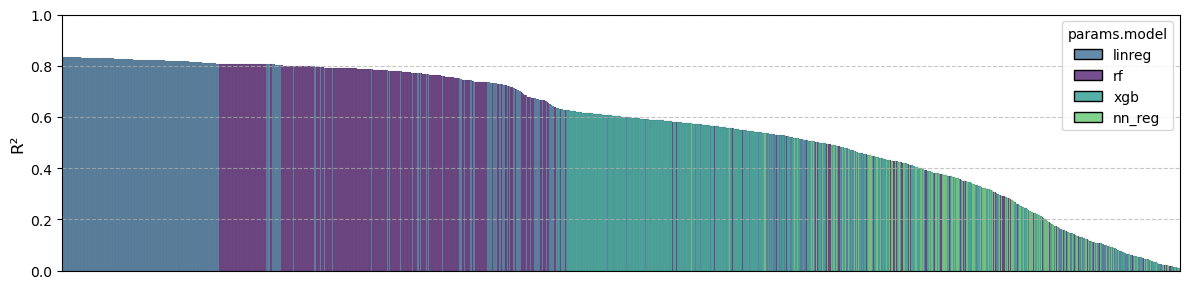

In [61]:
plt.figure(figsize=(12, 3))
sns.histplot(
    data=df_metrics,
    x=df_metrics.index,
    weights=df_metrics["metrics.r2_val"],
    bins=len(df_metrics),  
    hue=df_metrics["params.model"],
    palette=model_colors,
    element="bars",
    multiple="stack"  
)

plt.xlim(df_metrics.index.min(), df_metrics.index.max())
plt.xlabel("")
plt.ylabel("R²", fontsize=12)

# Set y-axis ticks at 0.2 intervals
y_min, y_max = plt.ylim()
plt.yticks(np.arange(0, y_max + 0.2, 0.2))  

plt.xticks([], [])  # Hide x-axis labels
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show legend

plt.tight_layout()
plt.savefig('/home/lfloerl/cloud/lfloerl/Microterroir/Figures/RITME-RH-test-R2-900trials.png', dpi=1000)
plt.show()

/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/scratch/lfloerl/.condaenvs/ri

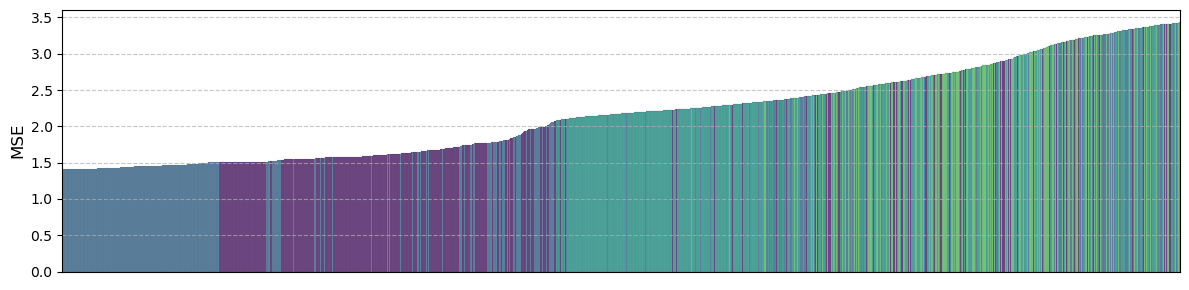

In [62]:
plt.figure(figsize=(12, 3))
sns.histplot(
    data=df_metrics,
    x=df_metrics.index,
    weights=df_metrics["metrics.rmse_val"],
    bins=len(df_metrics),  
    hue=df_metrics["params.model"],
    palette=model_colors,
    element="bars",
    multiple="stack"  
)

plt.xlim(df_metrics.index.min(), df_metrics.index.max())
plt.xlabel("")
plt.ylabel("MSE", fontsize=12)  # Set y-axis label fontsize

plt.xticks([], [])  # Hide x-axis labels
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.legend([], [], frameon=False)

plt.tight_layout()
plt.savefig('/home/lfloerl/cloud/lfloerl/Microterroir/Figures/RITME-RH-test-MSE-900trials.png', dpi=1000)
plt.show()

# Extracting trained best models
Get best models for further usage

The best models are stored in Python dictionary best_model_dict with model_type as keys and TunedModel objects as values. To extract a given best model and perform predictions with it, see below code excerpt:

In [39]:
if path_to_store_best_models is not None:
    print(f"Saving best models to {path_to_store_best_models}...")
    if not os.path.exists(path_to_store_best_models):
        os.makedirs(path_to_store_best_models)

    save_best_models(best_model_dict, path_to_store_best_models)

Saving best models to RH_best_models...


In [12]:
# load
path_to_store_best_models = "RH_best_models"

In [13]:
def load_best_models(output_dir: str):
    best_model = {}
    
    for filename in os.listdir(output_dir):
        if filename.endswith("_best_model.pkl"):
            model_type = filename.replace("_best_model.pkl", "")  # Extract model type from filename
            file_path = os.path.join(output_dir, filename)

            with open(file_path, "rb") as file:
                best_model[model_type] = pickle.load(file)
    
    return best_model  # Returns a dictionary like best_model_dic

best_model_dict = load_best_models(path_to_store_best_models)

In [14]:
# get best model
best_model = best_model_dict["rf"]

In [15]:
best_model.data_config

{'data_aggregation': 'tax_family',
 'data_selection': 'variance_threshold',
 'data_selection_t': 8.424110251130684e-05,
 'data_transform': None,
 'data_alr_denom_idx': None}

In [16]:
# perform prediction with best linreg model
test_predictions = best_model.predict(test, "test")
train_predictions = best_model.predict(train_val, "train")

/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint', 'F575429d162006e5a0fa69e8c2464b6e3', 'F05892301d52d70661ca86b973c3220f5', 'F2d16ef3ff64414bd2fc388f2269312dc', 'Ffba98b4c52003b074014b8b8b36928a0', 'Ffff6c6a08024164ca58caf91aeadbbb6', 'Fc7ce1132bb710149d989858c23643e2b', 'Ff54e7d5f2222803de1afef56a578644c', 'Ff7443d3ac7cabc44c43546d74d25c4c3', 'F7bcc17a1ee29e342e42923e266eb2c01', 'F35fcce839b2ae64e1b696477b6f30519', 'Fe1a3874ca4546d4685ebe861bf6bdbe1', 'F6120bfe52ca62f3189cb156b51196e66', 'F887933d79dd2a0d282c0f4b76e05e4ec', 'Feadfae1ab8fbb3f44bcf2fd1a9c3b3d4', 'F21f65c263f16b6d210a4c420a06cebe6', 'F6dd7e3b974892838de7ae1e9a8597ebf', 'Fff06d7bf1678c3a13bfb952d0ce84439', 'F686a7ec47ab4814bbc28445b35e33c08', 'F750702a151ebabb6b21f2286e7187b05', 'F170882a844a75f7a278d738e82b92f36', 'F2c65a67fa597687bd46351035c378d81',

In [17]:
# get true values 
md_df = pd.read_csv(path_to_md, sep='\t', index_col=0)

# subset to only contain the samples in the test dataset 
md_test = md_df.loc[test.index]
md_train = md_df.loc[train_val.index]

true_values_test = md_test['median_rh'].values
true_values_train = md_train['median_rh'].values

## Plot

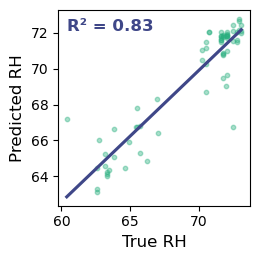

In [23]:
# Create scatterplot
plt.figure(figsize=(2.7, 2.7))
sns.regplot(x=true_values_test, y=test_predictions, ci=None, 
            scatter_kws={'s': 10, 'color': '#29AF7FFF', 'alpha':0.4}, 
            line_kws={'color': '#3F4788FF'})

# Compute R² score 
r2 = r2_score(true_values_test, test_predictions)
r2_text = f"R² = {r2:.2f}" if r2 >= 0 else "R² < 0"

# Adjust text position
y_text_position = np.percentile(test_predictions, 90)
plt.text(np.min(true_values_test), y_text_position, r2_text, 
         fontsize=12, color="#3F4788FF", fontweight='bold')

# Labels
plt.xlabel("True RH", fontsize=12)
plt.ylabel("Predicted RH", fontsize=12)

plt.tight_layout()
plt.savefig('/home/lfloerl/cloud/lfloerl/Microterroir/Figures/RITME-RH-test-best-model.png', dpi=1000)

plt.show()